In [2]:
ls


 Volume in drive C is Windows
 Volume Serial Number is 002A-E055

 Directory of c:\Users\Docker\MultiFidelity-ProcessOpt\1. Code

03/19/2025  01:14 PM    <DIR>          .
03/19/2025  01:14 PM    <DIR>          ..
03/19/2025  01:14 PM    <DIR>          __pycache__
03/19/2025  01:14 PM            90,892 errors.csv
03/19/2025  01:14 PM             1,709 OneColumn.py
03/19/2025  01:17 PM           694,409 RandomSearch_Visualisation.ipynb
03/19/2025  01:14 PM           403,499 results.csv
03/19/2025  01:14 PM            23,795 Rigorous_Design.ipynb
03/19/2025  01:14 PM            14,696 RigorousDesign.py
03/19/2025  01:14 PM            33,851 shortcut_biosteam_v3.ipynb
03/19/2025  01:14 PM            14,240 ShortCutDesign.py
               8 File(s)      1,277,091 bytes
               3 Dir(s)  94,846,562,304 bytes free


In [10]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [1]:
cd ~/MultiFidelity-ProcessOpt/1.\ Code

/users/k23070952/MultiFidelity-ProcessOpt/1. Code


/users/k23070952/CODE/0. SSH files/jvenv/lib/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/users/k23070952/CODE/0. SSH files/jvenv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [1]:
from ShortCutDesign import ShortCutDesign 
from RigorousDesign import RigorousDesign 

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Define the bounds as per the given function
bounds = [
    (10, 50),           # Number of stages in extractor
    (0, 0.9999), (0, 0.9999),  # Light key, heavy key for extract distiller
    (0, 0.9999), (0, 0.9999),  # Light key, heavy key for acetic_acid_purification
    (273, 350),         # Temperature for HX
    (0, 0.9999), (0, 0.9999)   # Light key, heavy key for raffinate distiller
]

# Safe parameter generation
def generate_valid_param(low, high, epsilon=1e-4):
    value = np.random.uniform(low, high)
    return max(min(value, high - epsilon), low + epsilon)


# Example shortcut and rigorous result generation functions
def calculate_shortcut(_init_params):
    # Placeholder for the actual shortcut model computation
    shortcut_model = ShortCutDesign()
    shortcut_results = shortcut_model.shortcut_results(_init_params)
    return shortcut_results

def calculate_rigorous(_init_params):
    shortcut_results = calculate_shortcut(_init_params)
    if shortcut_results['CAPEX'] == 0:
        return (shortcut_results, [0, 0, 0])
    
    if shortcut_results['CAPEX'] is None or np.isnan(shortcut_results['CAPEX']):
        return (shortcut_results, [0, 0, 0])

    RigorousCal = RigorousDesign()
    Rigorous_results = RigorousCal.check_results(_init_params, shortcut_results)
    # Placeholder for the actual rigorous model computation
    return (shortcut_results, Rigorous_results)

# Random search with n iterations
n_iterations = 4000
results = []

error_list = []
error_params = []

# 저장할 파일 이름
results_file = './results_250319.csv'
error_file = './errors_250319.csv'

# 첫 번째 iteration에서는 헤더를 작성하도록 설정
first_results = True
first_errors = True

for _ in tqdm(range(n_iterations)):
    # Generate random parameters within the bounds
    print(f"\n--- Iteration {_+1} Start ---")
    
    try:
        # Generate random parameters with safe boundaries
        params = [
                int(np.random.uniform(low, high)) if idx == 0 else generate_valid_param(low, high)
                for idx, (low, high) in enumerate(bounds)
            ]
        print(f"Generated Parameters: {params}")
        # Calculate shortcut and rigorous results
        shortcut_obj, rigorous_obj = calculate_rigorous(params)
        
        # Combine all results in a single record
        record = params + [
            shortcut_obj['CAPEX'], shortcut_obj['OPEX'], shortcut_obj['AceticAcidWt'], shortcut_obj['boilup_1'], 
            shortcut_obj['SplitRatio'], shortcut_obj['N_stages_1'], shortcut_obj['feed_stage_1'], shortcut_obj['shortcut_time'], 
            rigorous_obj[0], rigorous_obj[1], rigorous_obj[2], rigorous_obj[3]
        ]
        print(f"Results Recorded: {record}")
        results.append(record)

        # 실시간으로 CSV에 저장
        df = pd.DataFrame([record])
        
        # 헤더는 첫 번째 iteration에서만 작성
        df.to_csv(results_file, mode='a', header=first_results, index=False)
        first_results = False
        
    except Exception as e:
        print(f"Error: {e}")
        error_list.append(str(e))
        error_params.append(params)

        # 오류도 실시간으로 CSV에 저장
        error_df = pd.DataFrame([[params, str(e)]], columns=['Params', 'Error'])
        error_df.to_csv(error_file, mode='a', header=first_errors, index=False)
        first_errors = False

    print(f"--- Iteration {_+1} End ---\n")





columns = [
    'Stages', '_Lr1', '_Hr1',
    '_Lr2', '_Hr2', '_T_hex',
    '_Lr3', '_Hr3',
    'Shortcut_CAPEX', 'Shortcut_OPEX', 'Shortcut_AceticAcidWt',
    'Shortcut_BoilupRatio', 'Shortcut_SplitRatio',
    'Shortcut_NumberStages', 'Shortcut_FeedStage',
    'Rigorous_CAPEX', 'Rigorous_OPEX', 'Rigorous_AceticAcidWt'
]


# Create dataframe
results_df = pd.DataFrame(results, columns=columns)

  0%|          | 0/4000 [00:00<?, ?it/s]


--- Iteration 1 Start ---
Generated Parameters: [19, 0.8011597969644566, 0.04878839836360018, 0.18087405085226857, 0.4744628720334076, 314.91244857587964, 0.4883416890582311, 0.09748988889061042]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.8011597969644566, 0.04878839836360018, 0.18087405085226857, 0.4744628720334076, 314.91244857587964, 0.4883416890582311, 0.09748988889061042]


  0%|          | 2/4000 [00:02<1:17:13,  1.16s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[19, 0.8011597969644566, 0.04878839836360018, 0.18087405085226857, 0.4744628720334076, 314.91244857587964, 0.4883416890582311, 0.09748988889061042]
setting model:  {'CAPEX': 2.7971, 'OPEX': 11.0163, 'AceticAcidWt': 0.009615985068542943, 'SplitRatio': 0.01380670611439842, 'boilup_1': 5.895477530575642, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 0.20931121760553129, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 8.584021162841937, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 2.4910004138946533}
10000.0
Error occurred: list index out of range
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 1 End ---


--- Iteration 2 Start ---
Generated Parameters: [

  0%|          | 3/4000 [00:02<46:05,  1.45it/s]  


--- Iteration 3 Start ---
Generated Parameters: [44, 0.26613093780757296, 0.7907974941139739, 0.047490677281849664, 0.8641263160392689, 332.95381133510824, 0.8866836334864167, 0.9168079845371321]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.26613093780757296, 0.7907974941139739, 0.047490677281849664, 0.8641263160392689, 332.95381133510824, 0.8866836334864167, 0.9168079845371321]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[44, 0.26613093780757296, 0.7907974941139739, 0.047490677281849664, 0.8641263160392689, 332.95381133510824, 0.8866836334864167, 0.9168079845371321]
setting model:  {'CAPEX': 0.9972, 'OPEX': 0.4319, 'AceticAcidWt': 0.03515820451974349, 'SplitRatio': 0.013806706114398416, 'boilup_1': 0.33784

  0%|          | 4/4000 [00:03<36:44,  1.81it/s]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[26, 0.2560916184682393, 0.33356886498420046, 0.8114161069536581, 0.6600777865431298, 308.8061577106805, 0.06196695929696733, 0.15466826666266745]
setting model:  {'CAPEX': 1.8465, 'OPEX': 7.3262, 'AceticAcidWt': 0.0783855263279631, 'SplitRatio': 0.013806706114398418, 'boilup_1': 0.5778506163683171, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 4.588303651569752, 'N_stages_2': 14, 'feed_stage_2': 13, 'boilup_3': 4.952687438693553, 'N_stages_3': -1, 'feed_stage_3': 0, 'shortcut_time': 0.31799983978271484}
10000.0
Error occurred: list index out of range
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 4 End ---


--- Iteration 5 Start ---
Generated Parameters: [11

  0%|          | 6/4000 [00:03<23:44,  2.80it/s]

capex_error
Error: list index out of range
--- Iteration 5 End ---


--- Iteration 6 Start ---
Generated Parameters: [30, 0.5339968845213733, 0.8478178070597816, 0.051503818711548854, 0.5296977727879468, 275.0269746572705, 0.16913740874063668, 0.6607648451331481]
 ##### An instance of the 'BlackBox' class  has been initialised!
[30, 0.5339968845213733, 0.8478178070597816, 0.051503818711548854, 0.5296977727879468, 275.0269746572705, 0.16913740874063668, 0.6607648451331481]
capex_error
Error: list index out of range
--- Iteration 6 End ---


--- Iteration 7 Start ---
Generated Parameters: [18, 0.5426832708928523, 0.617984238427599, 0.44196705453912233, 0.9182762571227937, 301.0146350835505, 0.13962607643907954, 0.5329112899298039]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.5426832708928523, 0.617984238427599, 0.44196705453912233, 0.9182762571227937, 301.0146350835505, 0.13962607643907954, 0.5329112899298039]
setting base model
setting model:  {'SplitRatio': 

  0%|          | 7/4000 [00:14<4:02:09,  3.64s/it]

Results Recorded: [18, 0.5426832708928523, 0.617984238427599, 0.44196705453912233, 0.9182762571227937, 301.0146350835505, 0.13962607643907954, 0.5329112899298039, 1.3943, 1.6854, 0.07834795512330778, 1.0021249058051713, 0.01380670611439842, 7, 5, 0.15899991989135742, 2.3733, 1.7665, 0.14962657116805322, 10.221997022628784]
--- Iteration 7 End ---


--- Iteration 8 Start ---
Generated Parameters: [27, 0.4031473484654072, 0.5760616725897355, 0.7618568760308524, 0.4906931412323137, 298.8817381219786, 0.5817355453192103, 0.14685533900703054]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.4031473484654072, 0.5760616725897355, 0.7618568760308524, 0.4906931412323137, 298.8817381219786, 0.5817355453192103, 0.14685533900703054]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

  0%|          | 8/4000 [01:23<27:19:18, 24.64s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   3.75e+07 kmol/hr (20%)
- temperature 1.04e-03 K (0.00028%)
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 8 End ---


--- Iteration 9 Start ---
Generated Parameters: [39, 0.9994037687393437, 0.7563195693630008, 0.5516005013320181, 0.7441111665194465, 330.4852480543128, 0.8610482771001537, 0.09707995541970481]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.9994037687393437, 0.7563195693630008, 0.5516005013320181, 0.7441111665194465, 330.4852480543128, 0.8610482771001537, 0.09707995541970481]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ####

  0%|          | 9/4000 [13:50<277:26:54, 250.27s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   9.85e+01 kmol/hr (1e+02%)
- temperature 4.45e+00 K (1.3%)
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 9 End ---


--- Iteration 10 Start ---
Generated Parameters: [41, 0.9634064717784645, 0.6518719607534927, 0.5404403298266383, 0.8710347577545768, 328.5863435498903, 0.3287305826217085, 0.48426864561563115]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.9634064717784645, 0.6518719607534927, 0.5404403298266383, 0.8710347577545768, 328.5863435498903, 0.3287305826217085, 0.48426864561563115]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
1000

  0%|          | 10/4000 [13:56<193:56:51, 174.99s/it]

Results Recorded: [41, 0.9634064717784645, 0.6518719607534927, 0.5404403298266383, 0.8710347577545768, 328.5863435498903, 0.3287305826217085, 0.48426864561563115, 1.6687, 1.7996, 0.37966127739229616, 7.989834379648669, 0.013806706114398421, 16, 10, 0.20398736000061035, 1.6935, 1.8261, 0.5663850317487171, 6.2109997272491455]
--- Iteration 10 End ---


--- Iteration 11 Start ---
Generated Parameters: [27, 0.8440160426808975, 0.4740253319602008, 0.22190201393933667, 0.34611930553898834, 285.75705473250974, 0.7580424451220933, 0.096048670751599]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.8440160426808975, 0.4740253319602008, 0.22190201393933667, 0.34611930553898834, 285.75705473250974, 0.7580424451220933, 0.096048670751599]


  0%|          | 12/4000 [13:57<93:45:54, 84.64s/it]  

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[27, 0.8440160426808975, 0.4740253319602008, 0.22190201393933667, 0.34611930553898834, 285.75705473250974, 0.7580424451220933, 0.096048670751599]
setting model:  {'CAPEX': 3.1509, 'OPEX': 13.1702, 'AceticAcidWt': 0.04193878202812924, 'SplitRatio': 0.013806706114398425, 'boilup_1': 3.3621606789458856, 'N_stages_1': 9, 'feed_stage_1': 6, 'boilup_2': 0.35539258745494196, 'N_stages_2': -3, 'feed_stage_2': -2, 'boilup_3': 9.20119961829033, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.4089999198913574}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 11 End ---


--- Iteration 12 Start ---
Gene

  0%|          | 13/4000 [13:57<65:24:02, 59.05s/it]


--- Iteration 13 Start ---
Generated Parameters: [34, 0.755649271944564, 0.08979119871087703, 0.7626933929241418, 0.410561930133748, 276.0125848526789, 0.6165085250059348, 0.7564225047612059]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.755649271944564, 0.08979119871087703, 0.7626933929241418, 0.410561930133748, 276.0125848526789, 0.6165085250059348, 0.7564225047612059]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[34, 0.755649271944564, 0.08979119871087703, 0.7626933929241418, 0.410561930133748, 276.0125848526789, 0.6165085250059348, 0.7564225047612059]
setting model:  {'CAPEX': 1.273, 'OPEX': 1.2581, 'AceticAcidWt': 0.0434667355283904, 'SplitRatio': 0.013806706114398425, 'boilup_1': 4.312911863596862, 'N_s

  0%|          | 14/4000 [13:57<45:42:04, 41.28s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[22, 0.5664550086682479, 0.8280675785593158, 0.7128629161908857, 0.11478901570326262, 330.4600860315947, 0.3437994415093084, 0.7894534004811741]
setting model:  {'CAPEX': 1.1974, 'OPEX': 0.825, 'AceticAcidWt': 0.03290374025670358, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.8485236247314742, 'N_stages_1': 10, 'feed_stage_1': 8, 'boilup_2': 2.549719797907528, 'N_stages_2': 0, 'feed_stage_2': 0, 'boilup_3': 0.2753067820070788, 'N_stages_3': 5, 'feed_stage_3': 1, 'shortcut_time': 0.17800021171569824}
10000.0
Error occurred: list index out of range
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 14 End ---


--- Iteration 15 Start ---
Generated Parameters

  0%|          | 15/4000 [14:41<46:38:50, 42.14s/it]

Results Recorded: [32, 0.16957615554317299, 0.8007222678325836, 0.9048506066069999, 0.713610846142237, 301.58212055892096, 0.30060295028412837, 0.9756832119314803, 1.4518, 0.6243, 0.22811467301222793, 0.2190721208231608, 0.01380670611439842, 4, 3, 0.11901259422302246, 5.9769, 0.8515, 0.4074834927350166, 44.012001752853394]
--- Iteration 15 End ---


--- Iteration 16 Start ---
Generated Parameters: [26, 0.04550674000422751, 0.11253836047746442, 0.2763984779645213, 0.6611078321252285, 338.7956862398546, 0.5158427320730608, 0.66240513127079]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.04550674000422751, 0.11253836047746442, 0.2763984779645213, 0.6611078321252285, 338.7956862398546, 0.5158427320730608, 0.66240513127079]
capex_error
Error: list index out of range


  0%|          | 16/4000 [14:41<32:40:21, 29.52s/it]

--- Iteration 16 End ---


--- Iteration 17 Start ---
Generated Parameters: [18, 0.5902516852118109, 0.19533404767671575, 0.18329558151214334, 0.5082282413796692, 335.11018545210413, 0.5964800728503287, 0.8798905055725278]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.5902516852118109, 0.19533404767671575, 0.18329558151214334, 0.5082282413796692, 335.11018545210413, 0.5964800728503287, 0.8798905055725278]


  0%|          | 18/4000 [14:42<16:06:53, 14.57s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[18, 0.5902516852118109, 0.19533404767671575, 0.18329558151214334, 0.5082282413796692, 335.11018545210413, 0.5964800728503287, 0.8798905055725278]
setting model:  {'CAPEX': 0.9248, 'OPEX': 0.6254, 'AceticAcidWt': 0.01877428831608674, 'SplitRatio': 0.013806706114398423, 'boilup_1': 1.8753740416440947, 'N_stages_1': 2, 'feed_stage_1': 2, 'boilup_2': 0.2227325521475668, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 0.15112251065778498, 'N_stages_3': 7, 'feed_stage_3': 1, 'shortcut_time': 0.429995059967041}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 17 End ---


--- Iteration 18 Start ---
Generated Paramete

  0%|          | 19/4000 [14:46<12:43:45, 11.51s/it]

Results Recorded: [41, 0.7826007122320313, 0.9608451346718895, 0.3361360102913816, 0.563489231053774, 318.91203802446086, 0.8416337985070835, 0.44776245498241674, 1.5879, 2.054, 0.07038550449976494, 1.5071826226963694, 0.2546325895611732, 8, 7, 0.1749875545501709, 1.5421, 2.1078, 0.14092784441778827, 4.198011875152588]
--- Iteration 19 End ---


--- Iteration 20 Start ---
Generated Parameters: [41, 0.33885694278602807, 0.038957444600392445, 0.5207175607580483, 0.26544445781664633, 348.58870982097915, 0.6974855103511882, 0.04598411443156316]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.33885694278602807, 0.038957444600392445, 0.5207175607580483, 0.26544445781664633, 348.58870982097915, 0.6974855103511882, 0.04598411443156316]


  0%|          | 20/4000 [14:47<9:16:25,  8.39s/it] 

capex_error
Error: list index out of range
--- Iteration 20 End ---


--- Iteration 21 Start ---
Generated Parameters: [44, 0.5446665659456925, 0.5889902538525149, 0.2622172791018245, 0.6653145660207589, 320.2592651114558, 0.9042136698980313, 0.46853133037452926]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.5446665659456925, 0.5889902538525149, 0.2622172791018245, 0.6653145660207589, 320.2592651114558, 0.9042136698980313, 0.46853133037452926]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[44, 0.5446665659456925, 0.5889902538525149, 0.2622172791018245, 0.6653145660207589, 320.2592651114558, 0.9042136698980313, 0.46853133037452926]
setting model:  {'CAPEX': 1.4768, 'OPEX': 1.8429, 'AceticAcidWt': 0.0492905881106

  1%|          | 21/4000 [14:51<7:33:28,  6.84s/it]

Results Recorded: [44, 0.5446665659456925, 0.5889902538525149, 0.2622172791018245, 0.6653145660207589, 320.2592651114558, 0.9042136698980313, 0.46853133037452926, 1.4768, 1.8429, 0.0492905881106893, 1.0500860394454252, 0.013806706114398418, 6, 5, 0.18199825286865234, 1.4136, 1.8818, 0.11916231430776561, 3.0280001163482666]
--- Iteration 21 End ---


--- Iteration 22 Start ---
Generated Parameters: [15, 0.514946655657902, 0.6984156989480947, 0.4970951592276384, 0.7732814591328259, 337.87856175730553, 0.5523624826302652, 0.8956173875316491]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.514946655657902, 0.6984156989480947, 0.4970951592276384, 0.7732814591328259, 337.87856175730553, 0.5523624826302652, 0.8956173875316491]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

  1%|          | 22/4000 [14:58<7:36:47,  6.89s/it]

Results Recorded: [15, 0.514946655657902, 0.6984156989480947, 0.4970951592276384, 0.7732814591328259, 337.87856175730553, 0.5523624826302652, 0.8956173875316491, 1.2884, 0.5912, 0.07721923750213472, 0.8575632631784055, 0.013806706114398421, 8, 6, 0.11301302909851074, 1.5435, 0.5993, 0.14466254973170753, 6.881012678146362]
--- Iteration 22 End ---


--- Iteration 23 Start ---
Generated Parameters: [44, 0.6366980116193145, 0.3847562590662483, 0.7074416979348204, 0.7079764319806247, 293.379997258599, 0.7945945020935173, 0.660274157778335]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.6366980116193145, 0.3847562590662483, 0.7074416979348204, 0.7079764319806247, 293.379997258599, 0.7945945020935173, 0.660274157778335]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of t

  1%|          | 23/4000 [15:01<6:33:32,  5.94s/it]

Results Recorded: [44, 0.6366980116193145, 0.3847562590662483, 0.7074416979348204, 0.7079764319806247, 293.379997258599, 0.7945945020935173, 0.660274157778335, 1.4694, 1.3578, 0.11430900367575127, 1.731445012449277, 0.013806706114398421, 5, 4, 0.15301227569580078, 1.7318, 1.4435, 0.31484335835816746, 3.549001455307007]
--- Iteration 23 End ---


--- Iteration 24 Start ---
Generated Parameters: [11, 0.9312460197443926, 0.8318086318503239, 0.4072003791538079, 0.3440635190921211, 339.4649559931466, 0.5107388476929514, 0.041127766652876444]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.9312460197443926, 0.8318086318503239, 0.4072003791538079, 0.3440635190921211, 339.4649559931466, 0.5107388476929514, 0.041127766652876444]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

  1%|          | 25/4000 [15:15<6:19:17,  5.73s/it]

Results Recorded: [11, 0.9312460197443926, 0.8318086318503239, 0.4072003791538079, 0.3440635190921211, 339.4649559931466, 0.5107388476929514, 0.041127766652876444, 4.7301, 24.2415, 0.0893561915973718, 3.731212527075357, 0.013806706114398423, 17, 12, 1.2219958305358887, 5.3478, 28.5511, 0.25742016481475416, 11.906012535095215]
--- Iteration 24 End ---


--- Iteration 25 Start ---
Generated Parameters: [49, 0.3936661522089213, 0.0792361710519884, 0.48937882531268845, 0.13973254467013574, 283.9605626048081, 0.9975157452794418, 0.7411838546683199]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.3936661522089213, 0.0792361710519884, 0.48937882531268845, 0.13973254467013574, 283.9605626048081, 0.9975157452794418, 0.7411838546683199]
capex_error
Error: list index out of range
--- Iteration 25 End ---



  1%|          | 26/4000 [15:15<4:27:50,  4.04s/it]


--- Iteration 26 Start ---
Generated Parameters: [46, 0.27063195326789574, 0.11513093602769947, 0.8366737243715476, 0.4519396428995301, 285.20685749777374, 0.48199801400931735, 0.9470499610852199]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.27063195326789574, 0.11513093602769947, 0.8366737243715476, 0.4519396428995301, 285.20685749777374, 0.48199801400931735, 0.9470499610852199]
capex_error
Error: list index out of range
--- Iteration 26 End ---


--- Iteration 27 Start ---
Generated Parameters: [31, 0.39779509682710784, 0.708147314090282, 0.09621450984934339, 0.722122321799576, 302.4874961370478, 0.15761195862357466, 0.4850734836820438]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.39779509682710784, 0.708147314090282, 0.09621450984934339, 0.722122321799576, 302.4874961370478, 0.15761195862357466, 0.4850734836820438]


  1%|          | 27/4000 [15:15<3:10:49,  2.88s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[31, 0.39779509682710784, 0.708147314090282, 0.09621450984934339, 0.722122321799576, 302.4874961370478, 0.15761195862357466, 0.4850734836820438]
setting model:  {'CAPEX': 1.0638, 'OPEX': 1.7351, 'AceticAcidWt': 0.03391899331418318, 'SplitRatio': 0.013806706114398425, 'boilup_1': 0.5875287690948006, 'N_stages_1': 6, 'feed_stage_1': 5, 'boilup_2': 0.11197172281541949, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 1.0450932879062704, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 0.1470022201538086}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 27 End ---


--- Iteration 28 Start ---
Generated Parameter

  1%|          | 28/4000 [15:31<7:29:37,  6.79s/it]

Results Recorded: [43, 0.9821467678445313, 0.6891220921661196, 0.3446858744817792, 0.8281398225202958, 342.10700068598567, 0.5009487731294011, 0.3834808943739284, 1.9416, 2.3583, 0.49588511038601263, 13.047815952314384, 0.013806706114398416, 20, 11, 0.21500015258789062, 1.8608, 2.4312, 0.7196828750990982, 15.68698763847351]
--- Iteration 28 End ---


--- Iteration 29 Start ---
Generated Parameters: [38, 0.4091531424269275, 0.9090002581084831, 0.9838378004302841, 0.11240534736068744, 295.80377859389347, 0.9941235338853773, 0.6961719190183041]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.4091531424269275, 0.9090002581084831, 0.9838378004302841, 0.11240534736068744, 295.80377859389347, 0.9941235338853773, 0.6961719190183041]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

  1%|          | 29/4000 [17:36<46:41:11, 42.32s/it]

Results Recorded: [38, 0.4091531424269275, 0.9090002581084831, 0.9838378004302841, 0.11240534736068744, 295.80377859389347, 0.9941235338853773, 0.6961719190183041, 1.7039, 1.3269, 0.34807227223249065, 0.4336174712198894, 0.013806706114398421, 11, 9, 0.1769866943359375, 2.0692, 1.5248, 0.9988666156908185, 125.0399878025055]
--- Iteration 29 End ---


--- Iteration 30 Start ---
Generated Parameters: [47, 0.4557446295632714, 0.27767121755945784, 0.8601805645564119, 0.7420467209772272, 287.4204138573053, 0.9836686089490277, 0.9918847951099405]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.4557446295632714, 0.27767121755945784, 0.8601805645564119, 0.7420467209772272, 287.4204138573053, 0.9836686089490277, 0.9918847951099405]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

  1%|          | 30/4000 [18:22<47:53:24, 43.43s/it]

Results Recorded: [47, 0.4557446295632714, 0.27767121755945784, 0.8601805645564119, 0.7420467209772272, 287.4204138573053, 0.9836686089490277, 0.9918847951099405, 1.4439, 0.7929, 0.13284760936558015, 1.172145931760459, 0.013806706114398421, 2, 2, 0.1890089511871338, 1.5937, 0.4697, 0.4196610379013947, 45.79599928855896]
--- Iteration 30 End ---


--- Iteration 31 Start ---
Generated Parameters: [31, 0.9040993762577948, 0.6326802153429165, 0.7146478467780456, 0.46730351348611465, 307.6000181709039, 0.8488789017466706, 0.32626644620549106]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.9040993762577948, 0.6326802153429165, 0.7146478467780456, 0.46730351348611465, 307.6000181709039, 0.8488789017466706, 0.32626644620549106]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

  1%|          | 31/4000 [18:29<35:50:45, 32.51s/it]

Results Recorded: [31, 0.9040993762577948, 0.6326802153429165, 0.7146478467780456, 0.46730351348611465, 307.6000181709039, 0.8488789017466706, 0.32626644620549106, 1.9248, 3.3553, 0.2291282755605464, 4.069119730933753, 0.013806706114398421, 13, 8, 0.2709996700286865, 1.8569, 3.4269, 0.5336706802120148, 6.763998985290527]
--- Iteration 31 End ---


--- Iteration 32 Start ---
Generated Parameters: [37, 0.7060465485929319, 0.8272002026082489, 0.9056138319945383, 0.21793752891495122, 323.64858666853036, 0.11237204380880228, 0.7955180350613542]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.7060465485929319, 0.8272002026082489, 0.9056138319945383, 0.21793752891495122, 323.64858666853036, 0.11237204380880228, 0.7955180350613542]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An inst

  1%|          | 32/4000 [18:39<28:26:08, 25.80s/it]

Results Recorded: [37, 0.7060465485929319, 0.8272002026082489, 0.9056138319945383, 0.21793752891495122, 323.64858666853036, 0.11237204380880228, 0.7955180350613542, 1.4033, 0.8474, 0.1888132978273269, 1.2959200406836322, 0.01380670611439842, 12, 9, 0.159987211227417, 1.9622, 0.8562, 0.7286971483717136, 9.957001209259033]
--- Iteration 32 End ---


--- Iteration 33 Start ---
Generated Parameters: [31, 0.03924746628210855, 0.12321572093870341, 0.40944011878285025, 0.9741109642751337, 296.7457326039666, 0.3450853964458453, 0.9865046573882447]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.03924746628210855, 0.12321572093870341, 0.40944011878285025, 0.9741109642751337, 296.7457326039666, 0.3450853964458453, 0.9865046573882447]
capex_error
Error: list index out of range


  1%|          | 33/4000 [18:39<19:58:16, 18.12s/it]

--- Iteration 33 End ---


--- Iteration 34 Start ---
Generated Parameters: [35, 0.1930769007398248, 0.8712004032353511, 0.8588794911383082, 0.2016027900675067, 291.44953831814377, 0.7191838111536457, 0.672902467453118]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.1930769007398248, 0.8712004032353511, 0.8588794911383082, 0.2016027900675067, 291.44953831814377, 0.7191838111536457, 0.672902467453118]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.1930769007398248, 0.8712004032353511, 0.8588794911383082, 0.2016027900675067, 291.44953831814377, 0.7191838111536457, 0.672902467453118]
setting model:  {'CAPEX': 1.4218, 'OPEX': 1.3161, 'AceticAcidWt': 0.07336813789776389, 'SplitRatio': 0.01380670611439842, 'boil

  1%|          | 35/4000 [18:46<11:18:42, 10.27s/it]

Results Recorded: [35, 0.1930769007398248, 0.8712004032353511, 0.8588794911383082, 0.2016027900675067, 291.44953831814377, 0.7191838111536457, 0.672902467453118, 1.4218, 1.3161, 0.07336813789776389, 0.21272872896403697, 0.01380670611439842, 6, 5, 0.14800000190734863, 1.3577, 1.5183, 0.31266215854002233, 6.1659996509552]
--- Iteration 34 End ---


--- Iteration 35 Start ---
Generated Parameters: [16, 0.03022804090590601, 0.2616467590961424, 0.7026178542851549, 0.3173502526429258, 330.31924865487724, 0.9806632233187441, 0.4468009290964199]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.03022804090590601, 0.2616467590961424, 0.7026178542851549, 0.3173502526429258, 330.31924865487724, 0.9806632233187441, 0.4468009290964199]
capex_error
Error: list index out of range
--- Iteration 35 End ---


--- Iteration 36 Start ---
Generated Parameters: [34, 0.21383923242429173, 0.6414018906093473, 0.5987907933501333, 0.9046614516150024, 327.26196076721044, 0.6277978089337477,

  1%|          | 37/4000 [18:51<6:37:56,  6.02s/it] 

Results Recorded: [34, 0.21383923242429173, 0.6414018906093473, 0.5987907933501333, 0.9046614516150024, 327.26196076721044, 0.6277978089337477, 0.32973250799719367, 1.7057, 2.9125, 0.07974815062409135, 0.33637122731387126, 0.013806706114398418, 3, 3, 0.2180006504058838, 1.6768, 2.9421, 0.1514910965610638, 4.227999448776245]
--- Iteration 36 End ---


--- Iteration 37 Start ---
Generated Parameters: [15, 0.1040076985084333, 0.5299414510886578, 0.3343549216729882, 0.19508697328496483, 342.80638980657267, 0.19374676776142136, 0.5493543814543702]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.1040076985084333, 0.5299414510886578, 0.3343549216729882, 0.19508697328496483, 342.80638980657267, 0.19374676776142136, 0.5493543814543702]
capex_error
Error: list index out of range
--- Iteration 37 End ---



  1%|          | 38/4000 [18:51<4:41:39,  4.27s/it]


--- Iteration 38 Start ---
Generated Parameters: [15, 0.06428018964394806, 0.7469273423452155, 0.971554266153467, 0.2329991450988319, 294.3200408393552, 0.21247641108245074, 0.9787284554264241]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.06428018964394806, 0.7469273423452155, 0.971554266153467, 0.2329991450988319, 294.3200408393552, 0.21247641108245074, 0.9787284554264241]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[15, 0.06428018964394806, 0.7469273423452155, 0.971554266153467, 0.2329991450988319, 294.3200408393552, 0.21247641108245074, 0.9787284554264241]
setting model:  {'CAPEX': 1.1559, 'OPEX': 0.6664, 'AceticAcidWt': 0.24990267759853657, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.1155814012017

  1%|          | 39/4000 [18:51<3:20:46,  3.04s/it]

capex_error
Error: list index out of range
--- Iteration 39 End ---


--- Iteration 40 Start ---
Generated Parameters: [38, 0.1811819559203676, 0.2945270188502063, 0.303825015120883, 0.6766628508842708, 336.2145893748964, 0.4542079664216404, 0.9328949677325241]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.1811819559203676, 0.2945270188502063, 0.303825015120883, 0.6766628508842708, 336.2145893748964, 0.4542079664216404, 0.9328949677325241]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[38, 0.1811819559203676, 0.2945270188502063, 0.303825015120883, 0.6766628508842708, 336.2145893748964, 0.4542079664216404, 0.9328949677325241]
setting model:  {'CAPEX': 0.8481, 'OPEX': 0.4612, 'AceticAcidWt': 0.01972275043939277, 

  1%|          | 40/4000 [18:51<2:24:47,  2.19s/it]

--- Iteration 40 End ---


--- Iteration 41 Start ---
Generated Parameters: [38, 0.7534902333284814, 0.49628297641252433, 0.4908945472984297, 0.5456355948142445, 314.6752087183532, 0.5866863731050794, 0.1760729812652458]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.7534902333284814, 0.49628297641252433, 0.4908945472984297, 0.5456355948142445, 314.6752087183532, 0.5866863731050794, 0.1760729812652458]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[38, 0.7534902333284814, 0.49628297641252433, 0.4908945472984297, 0.5456355948142445, 314.6752087183532, 0.5866863731050794, 0.1760729812652458]
setting model:  {'CAPEX': 2.4399, 'OPEX': 6.0424, 'AceticAcidWt': 0.0779762868529938, 'SplitRatio': 0.01380670611439842, 'bo

  1%|          | 41/4000 [19:06<6:24:42,  5.83s/it]

Results Recorded: [38, 0.7534902333284814, 0.49628297641252433, 0.4908945472984297, 0.5456355948142445, 314.6752087183532, 0.5866863731050794, 0.1760729812652458, 2.4399, 6.0424, 0.0779762868529938, 2.2730852111793287, 0.01380670611439842, 8, 6, 0.3209874629974365, 2.4352, 6.3589, 0.22834805392150154, 13.980999946594238]
--- Iteration 41 End ---


--- Iteration 42 Start ---
Generated Parameters: [35, 0.3263527033603594, 0.055849746782656653, 0.3469972960999617, 0.49944370366221674, 279.00307750787516, 0.3441844128821637, 0.10344825245127216]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.3263527033603594, 0.055849746782656653, 0.3469972960999617, 0.49944370366221674, 279.00307750787516, 0.3441844128821637, 0.10344825245127216]


  1%|          | 42/4000 [19:06<4:38:46,  4.23s/it]

capex_error
Error: list index out of range
--- Iteration 42 End ---


--- Iteration 43 Start ---
Generated Parameters: [47, 0.9515403751104358, 0.24127059494553604, 0.3041069208816501, 0.8782239260167224, 323.20771948505154, 0.9474921018697061, 0.6777302156545166]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.9515403751104358, 0.24127059494553604, 0.3041069208816501, 0.8782239260167224, 323.20771948505154, 0.9474921018697061, 0.6777302156545166]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[47, 0.9515403751104358, 0.24127059494553604, 0.3041069208816501, 0.8782239260167224, 323.20771948505154, 0.9474921018697061, 0.6777302156545166]
setting model:  {'CAPEX': 1.5025, 'OPEX': 1.1878, 'AceticAcidWt': 0.1859553073

  1%|          | 43/4000 [19:15<6:11:44,  5.64s/it]

Results Recorded: [47, 0.9515403751104358, 0.24127059494553604, 0.3041069208816501, 0.8782239260167224, 323.20771948505154, 0.9474921018697061, 0.6777302156545166, 1.5025, 1.1878, 0.1859553073282727, 11.50302284487393, 0.013806706114398421, 10, 6, 0.20100045204162598, 1.4502, 1.1945, 0.6510406311094724, 8.711998224258423]
--- Iteration 43 End ---


--- Iteration 44 Start ---
Generated Parameters: [24, 0.9987770936147985, 0.029514155868035453, 0.4076712993669324, 0.7100818862628523, 307.96228758249845, 0.044427483210351795, 0.07760964379485098]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.9987770936147985, 0.029514155868035453, 0.4076712993669324, 0.7100818862628523, 307.96228758249845, 0.044427483210351795, 0.07760964379485098]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### 

  1%|          | 44/4000 [20:32<29:36:08, 26.94s/it]

Error occurred: <MESHDistillation: acetic_acid_purification> tuple.index(x): x not in tuple
capex_error
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 44 End ---


--- Iteration 45 Start ---
Generated Parameters: [15, 0.3931367802094198, 0.5075508313825803, 0.3817851634155886, 0.8144997398222984, 292.39744983488407, 0.7622630120327705, 0.2773305402812271]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.3931367802094198, 0.5075508313825803, 0.3817851634155886, 0.8144997398222984, 292.39744983488407, 0.7622630120327705, 0.2773305402812271]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[15, 0.3931367802094198, 0.5075508313825803, 0.3817851634155886, 0.8144997398222984, 292.397449834884

  1%|          | 45/4000 [20:39<23:08:14, 21.06s/it]

Results Recorded: [15, 0.3931367802094198, 0.5075508313825803, 0.3817851634155886, 0.8144997398222984, 292.39744983488407, 0.7622630120327705, 0.2773305402812271, 1.8551, 3.9662, 0.0491702640942043, 0.7374110133660225, 0.01380670611439842, 4, 3, 0.2430121898651123, 3.0131, 4.1319, 0.11652008650987714, 7.08801531791687]
--- Iteration 45 End ---


--- Iteration 46 Start ---
Generated Parameters: [31, 0.11966023207678046, 0.555545576780961, 0.6385082320209228, 0.8543357823332822, 302.97747670098374, 0.650427660766345, 0.21311459670831104]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.11966023207678046, 0.555545576780961, 0.6385082320209228, 0.8543357823332822, 302.97747670098374, 0.650427660766345, 0.21311459670831104]


  1%|          | 47/4000 [20:39<11:27:02, 10.43s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[31, 0.11966023207678046, 0.555545576780961, 0.6385082320209228, 0.8543357823332822, 302.97747670098374, 0.650427660766345, 0.21311459670831104]
setting model:  {'CAPEX': 2.0188, 'OPEX': 5.107, 'AceticAcidWt': 0.06762285926234024, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.2376883243021157, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 2.0475047027293902, 'N_stages_2': 8, 'feed_stage_2': 8, 'boilup_3': 3.686086226949545, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.23100042343139648}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 46 End ---


--- Iteration 47 Start ---
Generated Parameters: [18, 0.680256

  1%|          | 48/4000 [20:40<8:05:07,  7.37s/it] 

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[33, 0.4478541029352263, 0.2410303796084067, 0.9028538135310087, 0.24020237306292513, 338.0378443400935, 0.9547305147617565, 0.8924485342141826]
setting model:  {'CAPEX': 1.3368, 'OPEX': 0.7357, 'AceticAcidWt': 0.06740862121142761, 'SplitRatio': 0.01380670611439842, 'boilup_1': 1.1313086278716147, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 9.58050697042501, 'N_stages_2': 9, 'feed_stage_2': 8, 'boilup_3': 0.14332904719176168, 'N_stages_3': 11, 'feed_stage_3': 1, 'shortcut_time': 0.19700121879577637}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 48 End ---


--- Iteration 49 Start ---
Generated Parameters: [11, 0.5471

  1%|▏         | 50/4000 [20:40<4:04:50,  3.72s/it]

--- Iteration 49 End ---


--- Iteration 50 Start ---
Generated Parameters: [48, 0.9351029974404913, 0.6789467239544281, 0.25540533469680005, 0.014103206824951775, 319.48288257853966, 0.35038368512742013, 0.6267579613288085]
 ##### An instance of the 'BlackBox' class  has been initialised!
[48, 0.9351029974404913, 0.6789467239544281, 0.25540533469680005, 0.014103206824951775, 319.48288257853966, 0.35038368512742013, 0.6267579613288085]
capex_error
Error: list index out of range
--- Iteration 50 End ---


--- Iteration 51 Start ---
Generated Parameters: [36, 0.10559560821359397, 0.9107084164687642, 0.5165809017731401, 0.15974784539919193, 338.0162453519389, 0.324015755048861, 0.9140422672652857]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.10559560821359397, 0.9107084164687642, 0.5165809017731401, 0.15974784539919193, 338.0162453519389, 0.324015755048861, 0.9140422672652857]


  1%|▏         | 51/4000 [20:40<2:56:29,  2.68s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[36, 0.10559560821359397, 0.9107084164687642, 0.5165809017731401, 0.15974784539919193, 338.0162453519389, 0.324015755048861, 0.9140422672652857]
setting model:  {'CAPEX': 0.836, 'OPEX': 0.4969, 'AceticAcidWt': 0.017561648429797752, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.11428081344345219, 'N_stages_1': 5, 'feed_stage_1': 4, 'boilup_2': 1.060462285664238, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 0.1013003538781407, 'N_stages_3': 6, 'feed_stage_3': 1, 'shortcut_time': 0.23801231384277344}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 51 End ---


--- Iteration 52 Start ---
Generated Parameter

  1%|▏         | 52/4000 [20:41<2:08:02,  1.95s/it]

--- Iteration 52 End ---


--- Iteration 53 Start ---
Generated Parameters: [44, 0.9981780029822234, 0.8700158741202414, 0.3167970113892888, 0.6402257469888099, 339.5079113545877, 0.02199609284307875, 0.6941777634111779]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.9981780029822234, 0.8700158741202414, 0.3167970113892888, 0.6402257469888099, 339.5079113545877, 0.02199609284307875, 0.6941777634111779]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[44, 0.9981780029822234, 0.8700158741202414, 0.3167970113892888, 0.6402257469888099, 339.5079113545877, 0.02199609284307875, 0.6941777634111779]
setting model:  {'CAPEX': 1.2917, 'OPEX': 1.1058, 'AceticAcidWt': 0.9252676709581709, 'SplitRatio': 0.1854329982598388, 'boi

  1%|▏         | 53/4000 [21:16<13:00:16, 11.86s/it]

Error occurred: <ShortcutColumn: raffinate_distiller> Failed to extrapolate integral of liquid heat capacity method 'VDI_TABULAR' between T=298.15 to nan K for component with CASRN '64-19-7'
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 53 End ---


--- Iteration 54 Start ---
Generated Parameters: [41, 0.2888227807017142, 0.38739572119477567, 0.01952322974390741, 0.18172311118222753, 320.44576695558544, 0.1972924471550046, 0.06537826362243182]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.2888227807017142, 0.38739572119477567, 0.01952322974390741, 0.18172311118222753, 320.44576695558544, 0.1972924471550046, 0.06537826362243182]


  1%|▏         | 54/4000 [21:16<9:21:03,  8.53s/it] 

capex_error
Error: list index out of range
--- Iteration 54 End ---


--- Iteration 55 Start ---
Generated Parameters: [10, 0.1533783757341013, 0.10388704385920361, 0.2919257312541298, 0.19435792757570738, 323.2158751653477, 0.027137845540114815, 0.4032477737695067]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.1533783757341013, 0.10388704385920361, 0.2919257312541298, 0.19435792757570738, 323.2158751653477, 0.027137845540114815, 0.4032477737695067]
capex_error
Error: list index out of range


  1%|▏         | 55/4000 [21:17<6:37:33,  6.05s/it]

--- Iteration 55 End ---


--- Iteration 56 Start ---
Generated Parameters: [35, 0.9012060571176733, 0.5129309737821741, 0.747201182615118, 0.601999134420364, 305.9011353238494, 0.6680302053043305, 0.868974629128138]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.9012060571176733, 0.5129309737821741, 0.747201182615118, 0.601999134420364, 305.9011353238494, 0.6680302053043305, 0.868974629128138]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.9012060571176733, 0.5129309737821741, 0.747201182615118, 0.601999134420364, 305.9011353238494, 0.6680302053043305, 0.868974629128138]
setting model:  {'CAPEX': 1.4913, 'OPEX': 0.8242, 'AceticAcidWt': 0.24907484147700265, 'SplitRatio': 0.013806706114398418, 'boilup_1': 4

  1%|▏         | 56/4000 [21:27<8:01:56,  7.33s/it]

Results Recorded: [35, 0.9012060571176733, 0.5129309737821741, 0.747201182615118, 0.601999134420364, 305.9011353238494, 0.6680302053043305, 0.868974629128138, 1.4913, 0.8242, 0.24907484147700265, 4.595481211022518, 0.013806706114398418, 11, 7, 0.09398746490478516, 1.3981, 0.8836, 0.6337681604103039, 10.220022439956665]
--- Iteration 56 End ---


--- Iteration 57 Start ---
Generated Parameters: [47, 0.24285393293627813, 0.7376655519178109, 0.8650630510792782, 0.869501057555088, 320.8001538743369, 0.9143732178018915, 0.22132497131692164]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.24285393293627813, 0.7376655519178109, 0.8650630510792782, 0.869501057555088, 320.8001538743369, 0.9143732178018915, 0.22132497131692164]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance o

  1%|▏         | 58/4000 [21:47<8:39:17,  7.90s/it] 

Results Recorded: [47, 0.24285393293627813, 0.7376655519178109, 0.8650630510792782, 0.869501057555088, 320.8001538743369, 0.9143732178018915, 0.22132497131692164, 2.1559, 4.7003, 0.2335194611662531, 0.3342619223604444, 0.01380670611439842, 5, 4, 0.2720162868499756, 2.8569, 4.9585, 0.35103235612345757, 19.98200011253357]
--- Iteration 57 End ---


--- Iteration 58 Start ---
Generated Parameters: [44, 0.2408150024179397, 0.12908252821290953, 0.7127876529604112, 0.8117898591401613, 297.4448213025502, 0.5605200286279907, 0.5987864187382]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.2408150024179397, 0.12908252821290953, 0.7127876529604112, 0.8117898591401613, 297.4448213025502, 0.5605200286279907, 0.5987864187382]
capex_error
Error: list index out of range
--- Iteration 58 End ---


--- Iteration 59 Start ---
Generated Parameters: [38, 0.9187819296630878, 0.467184670103754, 0.7303771714939195, 0.5783325635233928, 278.30609539131314, 0.6169894326991345, 0.1546367

  1%|▏         | 59/4000 [22:38<22:33:28, 20.61s/it]

Results Recorded: [38, 0.9187819296630878, 0.467184670103754, 0.7303771714939195, 0.5783325635233928, 278.30609539131314, 0.6169894326991345, 0.15463670024111548, 2.6854, 8.3418, 0.24206540057785303, 5.397497865073986, 0.01380670611439842, 12, 7, 0.3219928741455078, 2.6552, 9.0229, 0.6816396830557921, 49.90800094604492]
--- Iteration 59 End ---


--- Iteration 60 Start ---
Generated Parameters: [36, 0.3262747243900254, 0.1877280647430493, 0.3385577768964394, 0.8464490132459417, 285.19355418957537, 0.9044743259103016, 0.08226779230377414]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.3262747243900254, 0.1877280647430493, 0.3385577768964394, 0.8464490132459417, 285.19355418957537, 0.9044743259103016, 0.08226779230377414]


  2%|▏         | 61/4000 [22:38<11:12:22, 10.24s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[36, 0.3262747243900254, 0.1877280647430493, 0.3385577768964394, 0.8464490132459417, 285.19355418957537, 0.9044743259103016, 0.08226779230377414]
setting model:  {'CAPEX': 3.7055, 'OPEX': 15.226, 'AceticAcidWt': 0.021054991214354356, 'SplitRatio': 0.013806706114398423, 'boilup_1': 0.9161358713086291, 'N_stages_1': -2, 'feed_stage_1': -1, 'boilup_2': 0.5520972937932378, 'N_stages_2': 9, 'feed_stage_2': 9, 'boilup_3': 11.275601479022155, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.4850022792816162}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 60 End ---


--- Iteration 61 Start ---
Generated Paramet

  2%|▏         | 62/4000 [22:45<10:14:11,  9.36s/it]

Results Recorded: [28, 0.8843835868436726, 0.74898878047173, 0.5222801443483919, 0.40167374867445804, 286.08546087678474, 0.6707574337407876, 0.7110791138654282, 1.4263, 1.2754, 0.10887537912553681, 2.888886311666704, 0.013806706114398421, 14, 9, 0.1510000228881836, 1.3965, 1.355, 0.2797102280705619, 7.12899923324585]
--- Iteration 62 End ---


--- Iteration 63 Start ---
Generated Parameters: [45, 0.3692246055231948, 0.7813123623725956, 0.30076266034100063, 0.504666730301342, 292.5609809865565, 0.08731838859952737, 0.8560875066528141]
 ##### An instance of the 'BlackBox' class  has been initialised!
[45, 0.3692246055231948, 0.7813123623725956, 0.30076266034100063, 0.504666730301342, 292.5609809865565, 0.08731838859952737, 0.8560875066528141]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of

  2%|▏         | 63/4000 [23:52<29:02:54, 26.56s/it]

Results Recorded: [45, 0.3692246055231948, 0.7813123623725956, 0.30076266034100063, 0.504666730301342, 292.5609809865565, 0.08731838859952737, 0.8560875066528141, 1.0657, 0.6501, 0.034204466078462954, 0.4843452620724225, 0.013806706114398421, 7, 6, 0.09601736068725586, 0.9265, 0.73, 0.0965772315559648, 66.59299492835999]
--- Iteration 63 End ---


--- Iteration 64 Start ---
Generated Parameters: [31, 0.9236554723767493, 0.11920243409535256, 0.3695854836020804, 0.4491766728831754, 283.5885239615422, 0.2676859679251107, 0.39506008996400316]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.9236554723767493, 0.11920243409535256, 0.3695854836020804, 0.4491766728831754, 283.5885239615422, 0.2676859679251107, 0.39506008996400316]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

  2%|▏         | 64/4000 [23:55<21:13:41, 19.42s/it]

Results Recorded: [31, 0.9236554723767493, 0.11920243409535256, 0.3695854836020804, 0.4491766728831754, 283.5885239615422, 0.2676859679251107, 0.39506008996400316, 1.4944, 2.9193, 0.047520762666940414, 10.574730174531227, 0.01380670611439842, 6, 4, 0.15698671340942383, 1.4424, 2.9997, 0.6338589626417398, 2.569000005722046]
--- Iteration 64 End ---


--- Iteration 65 Start ---
Generated Parameters: [42, 0.8163160605477533, 0.5464191644993648, 0.3555855408422452, 0.533187107840165, 301.4994378176369, 0.35681931735216504, 0.23183129793546606]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.8163160605477533, 0.5464191644993648, 0.3555855408422452, 0.533187107840165, 301.4994378176369, 0.35681931735216504, 0.23183129793546606]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

  2%|▏         | 65/4000 [27:30<85:31:13, 78.24s/it]

Results Recorded: [42, 0.8163160605477533, 0.5464191644993648, 0.3555855408422452, 0.533187107840165, 301.4994378176369, 0.35681931735216504, 0.23183129793546606, 1.8795, 4.7772, 0.07264690258272176, 2.731876672358988, 0.013806706114398416, 10, 7, 0.21300053596496582, 1.9124, 5.0598, 0.21525160521430287, 215.2669997215271]
--- Iteration 65 End ---


--- Iteration 66 Start ---
Generated Parameters: [25, 0.40464365947233627, 0.20554067758750388, 0.3300108179237425, 0.909180119248939, 312.33711206454564, 0.1923123882371126, 0.2801071792948441]
 ##### An instance of the 'BlackBox' class  has been initialised!
[25, 0.40464365947233627, 0.20554067758750388, 0.3300108179237425, 0.909180119248939, 312.33711206454564, 0.1923123882371126, 0.2801071792948441]


  2%|▏         | 66/4000 [27:31<59:56:17, 54.85s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[25, 0.40464365947233627, 0.20554067758750388, 0.3300108179237425, 0.909180119248939, 312.33711206454564, 0.1923123882371126, 0.2801071792948441]
setting model:  {'CAPEX': 1.6348, 'OPEX': 3.7189, 'AceticAcidWt': 0.026181482703952846, 'SplitRatio': 0.013806706114398423, 'boilup_1': 1.098803950838605, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 0.5463586226659136, 'N_stages_2': 11, 'feed_stage_2': 11, 'boilup_3': 2.472905096905949, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 0.2519998550415039}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 66 End ---


--- Iteration 67 Start ---
Generated Parameters: [15, 0.32

  2%|▏         | 67/4000 [27:31<42:04:24, 38.51s/it]

capex_error
Error: list index out of range
--- Iteration 67 End ---


--- Iteration 68 Start ---
Generated Parameters: [39, 0.5378031253910299, 0.10027843303983276, 0.15389914286043188, 0.6210374527500793, 275.851532406227, 0.8064188936309318, 0.1265435649372914]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.5378031253910299, 0.10027843303983276, 0.15389914286043188, 0.6210374527500793, 275.851532406227, 0.8064188936309318, 0.1265435649372914]


  2%|▏         | 68/4000 [27:31<29:34:09, 27.07s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[39, 0.5378031253910299, 0.10027843303983276, 0.15389914286043188, 0.6210374527500793, 275.851532406227, 0.8064188936309318, 0.1265435649372914]
setting model:  {'CAPEX': 2.5686, 'OPEX': 10.1821, 'AceticAcidWt': 0.010507321718939162, 'SplitRatio': 0.013806706114398421, 'boilup_1': 2.032340185623088, 'N_stages_1': -1, 'feed_stage_1': 0, 'boilup_2': 0.1736396101538687, 'N_stages_2': 0, 'feed_stage_2': 0, 'boilup_3': 6.900251932111674, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.3600001335144043}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 68 End ---


--- Iteration 69 Start ---
Generated Parameters

  2%|▏         | 69/4000 [27:39<23:11:59, 21.25s/it]

Results Recorded: [41, 0.13076599427228708, 0.8331040264437485, 0.8951672160199028, 0.9874247758554664, 273.3581442111432, 0.4093444439815119, 0.6877301090972974, 1.4656, 1.508, 0.2625404814206708, 0.16650998325132693, 0.01380670611439842, 4, 3, 0.12099981307983398, 8.9089, 1.7974, 0.33221005126441017, 7.515000820159912]
--- Iteration 69 End ---


--- Iteration 70 Start ---
Generated Parameters: [37, 0.141658669422359, 0.1138716168278957, 0.3100333311728939, 0.9566225398936227, 307.40554961096376, 0.06034499425058553, 0.05108083398450199]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.141658669422359, 0.1138716168278957, 0.3100333311728939, 0.9566225398936227, 307.40554961096376, 0.06034499425058553, 0.05108083398450199]


  2%|▏         | 70/4000 [27:48<19:03:35, 17.46s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   2.68e+02 kmol/hr (14%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 70 End ---


--- Iteration 71 Start ---
Generated Parameters: [46, 0.9534053166244008, 0.656184686655952, 0.4611835974979174, 0.44263019260888703, 332.74144908363417, 0.7072594665698952, 0.6991236780145238]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.9534053166244008, 0.656184686655952, 0.4611835974979174, 0.44263019260888703, 332.74144908363417, 0.7072594665698952, 0.6991236780145238]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[46, 0.9534053166244008, 0.6561846866

  2%|▏         | 71/4000 [27:51<14:20:06, 13.13s/it]

Results Recorded: [46, 0.9534053166244008, 0.656184686655952, 0.4611835974979174, 0.44263019260888703, 332.74144908363417, 0.7072594665698952, 0.6991236780145238, 1.4243, 1.0726, 0.2129462926617554, 6.926873572867958, 0.013806706114398421, 16, 10, 0.17600250244140625, 1.4054, 1.0797, 0.538802701135719, 2.8519983291625977]
--- Iteration 71 End ---


--- Iteration 72 Start ---
Generated Parameters: [40, 0.3516781319056441, 0.055691768855298904, 0.7471548927495243, 0.6845824015277028, 343.08937196245137, 0.8556977715616879, 0.803897065439668]
 ##### An instance of the 'BlackBox' class  has been initialised!
[40, 0.3516781319056441, 0.055691768855298904, 0.7471548927495243, 0.6845824015277028, 343.08937196245137, 0.8556977715616879, 0.803897065439668]
capex_error
Error: list index out of range


  2%|▏         | 72/4000 [27:51<10:06:35,  9.27s/it]

--- Iteration 72 End ---


--- Iteration 73 Start ---
Generated Parameters: [46, 0.04886549952240169, 0.8811477592870979, 0.8657416067430136, 0.986244471962364, 289.1810311647019, 0.7157937168097828, 0.9954049425835869]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.04886549952240169, 0.8811477592870979, 0.8657416067430136, 0.986244471962364, 289.1810311647019, 0.7157937168097828, 0.9954049425835869]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[46, 0.04886549952240169, 0.8811477592870979, 0.8657416067430136, 0.986244471962364, 289.1810311647019, 0.7157937168097828, 0.9954049425835869]
setting model:  {'CAPEX': 1.2641, 'OPEX': 0.8272, 'AceticAcidWt': 0.19294478831142353, 'SplitRatio': 0.01380670611439842, 'boil

  2%|▏         | 73/4000 [28:13<14:17:15, 13.10s/it]

Results Recorded: [46, 0.04886549952240169, 0.8811477592870979, 0.8657416067430136, 0.986244471962364, 289.1810311647019, 0.7157937168097828, 0.9954049425835869, 1.2641, 0.8272, 0.19294478831142353, 0.07062370204972487, 0.01380670611439842, 2, 2, 0.08699989318847656, 1.4202, 0.4176, 0.28073538585596036, 21.936001777648926]
--- Iteration 73 End ---


--- Iteration 74 Start ---
Generated Parameters: [41, 0.7146778798121401, 0.8066467131042625, 0.9016274609250942, 0.8574577999328268, 296.63391676606597, 0.7141634214593577, 0.8728425927738334]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.7146778798121401, 0.8066467131042625, 0.9016274609250942, 0.8574577999328268, 296.63391676606597, 0.7141634214593577, 0.8728425927738334]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

  2%|▏         | 74/4000 [29:12<29:18:04, 26.87s/it]

Results Recorded: [41, 0.7146778798121401, 0.8066467131042625, 0.9016274609250942, 0.8574577999328268, 296.63391676606597, 0.7141634214593577, 0.8728425927738334, 1.4902, 0.8631, 0.3831908143652545, 1.2931184827412139, 0.01380670611439842, 12, 9, 0.10199999809265137, 1.7711, 0.982, 0.5446755800428169, 58.87901020050049]
--- Iteration 74 End ---


--- Iteration 75 Start ---
Generated Parameters: [35, 0.4835550108964783, 0.9930709101183107, 0.9426481923370011, 0.6892349745433689, 304.2080123969481, 0.4293608936773306, 0.22923841814164386]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.4835550108964783, 0.9930709101183107, 0.9426481923370011, 0.6892349745433689, 304.2080123969481, 0.4293608936773306, 0.22923841814164386]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance 

  2%|▏         | 76/4000 [31:51<50:45:33, 46.57s/it]

Results Recorded: [35, 0.4835550108964783, 0.9930709101183107, 0.9426481923370011, 0.6892349745433689, 304.2080123969481, 0.4293608936773306, 0.22923841814164386, 2.3779, 4.8768, 0.40680799320675465, 0.49100910979852275, 0.283156657040498, 8, 8, 0.2260122299194336, 7.3162, 5.4812, 0.4865092267976846, 158.5239999294281]
--- Iteration 75 End ---


--- Iteration 76 Start ---
Generated Parameters: [14, 0.46640958262701004, 0.20894055707799217, 0.36005518415774235, 0.31733095278400525, 293.77188696257184, 0.8895777739978954, 0.5252405397243768]
 ##### An instance of the 'BlackBox' class  has been initialised!
[14, 0.46640958262701004, 0.20894055707799217, 0.36005518415774235, 0.31733095278400525, 293.77188696257184, 0.8895777739978954, 0.5252405397243768]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An in

  2%|▏         | 77/4000 [32:12<42:23:26, 38.90s/it]

Results Recorded: [36, 0.5969366476340926, 0.7892651164335971, 0.9781754049638507, 0.7923664877440297, 289.25869236164317, 0.9140586969078139, 0.7289576051749606, 1.6012, 1.2248, 0.7013792559799558, 0.9241037188374344, 0.013806706114398421, 10, 8, 0.14299964904785156, 1.4839, 1.3791, 0.8763902941506582, 20.85001254081726]
--- Iteration 77 End ---


--- Iteration 78 Start ---
Generated Parameters: [24, 0.4009920392745844, 0.9382679448904508, 0.49856614215441086, 0.0030184101217993354, 345.3905420410422, 0.280601321868153, 0.7941820106457005]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.4009920392745844, 0.9382679448904508, 0.49856614215441086, 0.0030184101217993354, 345.3905420410422, 0.280601321868153, 0.7941820106457005]


  2%|▏         | 78/4000 [32:12<29:45:19, 27.31s/it]

capex_error
Error: list index out of range
--- Iteration 78 End ---


--- Iteration 79 Start ---
Generated Parameters: [28, 0.023174549510170693, 0.9763077984957821, 0.08902431436211235, 0.17637498632501974, 315.21941181633326, 0.6436609973226566, 0.018921786919617815]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.023174549510170693, 0.9763077984957821, 0.08902431436211235, 0.17637498632501974, 315.21941181633326, 0.6436609973226566, 0.018921786919617815]


  2%|▏         | 79/4000 [32:16<22:10:36, 20.36s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   3.45e+02 kmol/hr (4.9%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 79 End ---


--- Iteration 80 Start ---
Generated Parameters: [27, 0.8090212898857397, 0.14010852724054693, 0.09858771330978479, 0.9001336610393323, 320.6670985165365, 0.9206679532803472, 0.14667912666299832]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.8090212898857397, 0.14010852724054693, 0.09858771330978479, 0.9001336610393323, 320.6670985165365, 0.9206679532803472, 0.14667912666299832]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[27, 0.8090212898857397, 0.14010

  2%|▏         | 80/4000 [32:28<19:17:03, 17.71s/it]

Results Recorded: [27, 0.8090212898857397, 0.14010852724054693, 0.09858771330978479, 0.9001336610393323, 320.6670985165365, 0.9206679532803472, 0.14667912666299832, 2.6969, 7.4376, 0.04230123868043957, 4.7178039587992755, 0.013806706114398421, 4, 3, 0.46199989318847656, 2.8074, 7.7715, 0.23729671598552995, 11.045999526977539]
--- Iteration 80 End ---


--- Iteration 81 Start ---
Generated Parameters: [18, 0.5663542252807631, 0.4595834763220504, 0.6314861317170062, 0.8476906827637434, 323.7229821651982, 0.8444129613887351, 0.918010712076746]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.5663542252807631, 0.4595834763220504, 0.6314861317170062, 0.8476906827637434, 323.7229821651982, 0.8444129613887351, 0.918010712076746]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

  2%|▏         | 81/4000 [32:37<16:32:32, 15.20s/it]

Results Recorded: [18, 0.5663542252807631, 0.4595834763220504, 0.6314861317170062, 0.8476906827637434, 323.7229821651982, 0.8444129613887351, 0.918010712076746, 1.3323, 0.6518, 0.09829867820415425, 1.2882334908394586, 0.013806706114398421, 5, 4, 0.11901259422302246, 1.338, 0.6568, 0.22117448584060564, 9.192999839782715]
--- Iteration 81 End ---


--- Iteration 82 Start ---
Generated Parameters: [27, 0.41734872320751387, 0.7537877487951394, 0.7904809209639276, 0.582340351480525, 276.96885635532794, 0.7622513704636853, 0.5905898995119782]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.41734872320751387, 0.7537877487951394, 0.7904809209639276, 0.582340351480525, 276.96885635532794, 0.7622513704636853, 0.5905898995119782]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance 

  2%|▏         | 82/4000 [32:39<12:15:38, 11.27s/it]

Error occurred: <MESHDistillation: extract_distiller> divide by zero encountered in divide
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 82 End ---


--- Iteration 83 Start ---
Generated Parameters: [20, 0.075363013487261, 0.8572964995909471, 0.5935027052966391, 0.4950970790166112, 347.55345852357664, 0.5257628808919752, 0.37567854437671483]
 ##### An instance of the 'BlackBox' class  has been initialised!
[20, 0.075363013487261, 0.8572964995909471, 0.5935027052966391, 0.4950970790166112, 347.55345852357664, 0.5257628808919752, 0.37567854437671483]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[20, 0.075363013487261, 0.8572964995909471, 0.5935027052966391, 0.4950970790166112, 347.55345852357664, 0.525762880891

  2%|▏         | 84/4000 [32:43<6:51:23,  6.30s/it] 

Results Recorded: [20, 0.075363013487261, 0.8572964995909471, 0.5935027052966391, 0.4950970790166112, 347.55345852357664, 0.5257628808919752, 0.37567854437671483, 1.4476, 2.2449, 0.05000311406492736, 0.10032349618205369, 0.01380670611439842, 3, 3, 0.2010035514831543, 1.4499, 2.33, 0.11652625293421283, 3.243011474609375]
--- Iteration 83 End ---


--- Iteration 84 Start ---
Generated Parameters: [16, 0.5997340730409876, 0.16469940334513325, 0.5438853867810378, 0.4059825312401092, 317.7114319067229, 0.2526032293883974, 0.6648840456189606]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.5997340730409876, 0.16469940334513325, 0.5438853867810378, 0.4059825312401092, 317.7114319067229, 0.2526032293883974, 0.6648840456189606]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance 

  2%|▏         | 85/4000 [32:43<4:51:06,  4.46s/it]


--- Iteration 85 Start ---
Generated Parameters: [13, 0.4317242625150181, 0.8255780779251881, 0.8487220641252765, 0.006316032478558508, 282.2673207257312, 0.5314711280257761, 0.6734394839682815]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.4317242625150181, 0.8255780779251881, 0.8487220641252765, 0.006316032478558508, 282.2673207257312, 0.5314711280257761, 0.6734394839682815]
capex_error
Error: list index out of range
--- Iteration 85 End ---


--- Iteration 86 Start ---
Generated Parameters: [32, 0.5210876119658682, 0.5140021388675596, 0.007726926987821189, 0.5682155507138256, 312.52868286181666, 0.9694574606764405, 0.7201948244194452]
 ##### An instance of the 'BlackBox' class  has been initialised!
[32, 0.5210876119658682, 0.5140021388675596, 0.007726926987821189, 0.5682155507138256, 312.52868286181666, 0.9694574606764405, 0.7201948244194452]


  2%|▏         | 87/4000 [32:44<2:28:45,  2.28s/it]

capex_error
Error: list index out of range
--- Iteration 86 End ---


--- Iteration 87 Start ---
Generated Parameters: [17, 0.04904531476559453, 0.20242736466654188, 0.12682486513604838, 0.7934942067869621, 294.0787011345477, 0.4139145520214306, 0.5318741411475097]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.04904531476559453, 0.20242736466654188, 0.12682486513604838, 0.7934942067869621, 294.0787011345477, 0.4139145520214306, 0.5318741411475097]
capex_error
Error: list index out of range
--- Iteration 87 End ---


--- Iteration 88 Start ---
Generated Parameters: [26, 0.18370068159077077, 0.88270998437916, 0.47771576628836815, 0.9755665460441835, 339.4135984906965, 0.6045925106762282, 0.5567923813772326]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.18370068159077077, 0.88270998437916, 0.47771576628836815, 0.9755665460441835, 339.4135984906965, 0.6045925106762282, 0.5567923813772326]
setting base model
setting model:  {'SplitRatio'

  2%|▏         | 88/4000 [32:49<3:23:56,  3.13s/it]

Results Recorded: [26, 0.18370068159077077, 0.88270998437916, 0.47771576628836815, 0.9755665460441835, 339.4135984906965, 0.6045925106762282, 0.5567923813772326, 1.3756, 1.4, 0.0729035233044192, 0.19991313176781128, 0.013806706114398421, 6, 5, 0.13299918174743652, 1.5303, 1.3736, 0.12379160153076149, 4.953000545501709]
--- Iteration 88 End ---


--- Iteration 89 Start ---
Generated Parameters: [47, 0.5795384612612362, 0.6057995617345845, 0.038949855539480306, 0.6127243400265716, 317.15673765892626, 0.32500891903622137, 0.412612392513291]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.5795384612612362, 0.6057995617345845, 0.038949855539480306, 0.6127243400265716, 317.15673765892626, 0.32500891903622137, 0.412612392513291]


  2%|▏         | 89/4000 [32:49<2:27:00,  2.26s/it]

capex_error
Error: list index out of range
--- Iteration 89 End ---


--- Iteration 90 Start ---
Generated Parameters: [33, 0.3941359695895974, 0.11727438696082854, 0.6986927297112033, 0.5792326916024605, 333.79092367967286, 0.3442015339324502, 0.5749645607595123]
 ##### An instance of the 'BlackBox' class  has been initialised!
[33, 0.3941359695895974, 0.11727438696082854, 0.6986927297112033, 0.5792326916024605, 333.79092367967286, 0.3442015339324502, 0.5749645607595123]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[33, 0.3941359695895974, 0.11727438696082854, 0.6986927297112033, 0.5792326916024605, 333.79092367967286, 0.3442015339324502, 0.5749645607595123]
setting model:  {'CAPEX': 1.224, 'OPEX': 1.3942, 'AceticAcidWt': 0.02719523097

  2%|▏         | 90/4000 [32:49<1:47:03,  1.64s/it]

--- Iteration 90 End ---


--- Iteration 91 Start ---
Generated Parameters: [24, 0.26627056363548457, 0.7933480438804733, 0.7811970866047937, 0.9218377859660672, 339.09763232300924, 0.4317598227687225, 0.3701668275968608]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.26627056363548457, 0.7933480438804733, 0.7811970866047937, 0.9218377859660672, 339.09763232300924, 0.4317598227687225, 0.3701668275968608]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[24, 0.26627056363548457, 0.7933480438804733, 0.7811970866047937, 0.9218377859660672, 339.09763232300924, 0.4317598227687225, 0.3701668275968608]
setting model:  {'CAPEX': 1.6383, 'OPEX': 2.4827, 'AceticAcidWt': 0.16372658441068064, 'SplitRatio': 0.01380670611439842,

  2%|▏         | 91/4000 [33:09<7:49:18,  7.20s/it]

Results Recorded: [24, 0.26627056363548457, 0.7933480438804733, 0.7811970866047937, 0.9218377859660672, 339.09763232300924, 0.4317598227687225, 0.3701668275968608, 1.6383, 2.4827, 0.16372658441068064, 0.33897274049512377, 0.01380670611439842, 6, 5, 0.17599868774414062, 2.5946, 2.5156, 0.24059822238339376, 19.985999822616577]
--- Iteration 91 End ---


--- Iteration 92 Start ---
Generated Parameters: [47, 0.2582578496339688, 0.5220509122639537, 0.948848874164486, 0.5991475345616248, 288.17954305628837, 0.2337446094478803, 0.9560628965594998]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.2582578496339688, 0.5220509122639537, 0.948848874164486, 0.5991475345616248, 288.17954305628837, 0.2337446094478803, 0.9560628965594998]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

  2%|▏         | 92/4000 [33:50<18:51:50, 17.38s/it]

Results Recorded: [47, 0.2582578496339688, 0.5220509122639537, 0.948848874164486, 0.5991475345616248, 288.17954305628837, 0.2337446094478803, 0.9560628965594998, 1.4105, 0.7089, 0.29137578555553934, 0.4710651806335968, 0.01380670611439842, 2, 2, 0.15900039672851562, 0.9954, 0.3786, 0.7821680890019775, 40.93899989128113]
--- Iteration 92 End ---


--- Iteration 93 Start ---
Generated Parameters: [12, 0.2546105145003556, 0.9365185961146705, 0.5878143214423082, 0.4106588362961614, 313.8160531614572, 0.40251100935931317, 0.983677733515593]
 ##### An instance of the 'BlackBox' class  has been initialised!
[12, 0.2546105145003556, 0.9365185961146705, 0.5878143214423082, 0.4106588362961614, 313.8160531614572, 0.40251100935931317, 0.983677733515593]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of

  2%|▏         | 94/4000 [34:10<13:42:23, 12.63s/it]

Results Recorded: [12, 0.2546105145003556, 0.9365185961146705, 0.5878143214423082, 0.4106588362961614, 313.8160531614572, 0.40251100935931317, 0.983677733515593, 1.2527, 0.4687, 0.04780455221437487, 0.23545407120518183, 0.013806706114398421, 10, 9, 0.2020125389099121, 1.221, 0.4765, 0.12250184896032083, 19.09598731994629]
--- Iteration 93 End ---


--- Iteration 94 Start ---
Generated Parameters: [28, 0.22645331374580208, 0.2814767029917214, 0.7979072653304453, 0.6370889652119515, 336.5270132879191, 0.09091244191954227, 0.5516283755325859]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.22645331374580208, 0.2814767029917214, 0.7979072653304453, 0.6370889652119515, 336.5270132879191, 0.09091244191954227, 0.5516283755325859]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

  2%|▏         | 95/4000 [34:10<9:38:25,  8.89s/it] 


--- Iteration 95 Start ---
Generated Parameters: [47, 0.3140598479564555, 0.8394685078811603, 0.0063526522951020585, 0.49466724038393484, 299.471579591713, 0.1839185850962118, 0.4499816876999854]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.3140598479564555, 0.8394685078811603, 0.0063526522951020585, 0.49466724038393484, 299.471579591713, 0.1839185850962118, 0.4499816876999854]
capex_error
Error: list index out of range
--- Iteration 95 End ---


--- Iteration 96 Start ---
Generated Parameters: [39, 0.019709897140349805, 0.988694275582899, 0.8323564748594957, 0.16923825269094703, 284.9819194554413, 0.6998146915147931, 0.5642711141239021]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.019709897140349805, 0.988694275582899, 0.8323564748594957, 0.16923825269094703, 284.9819194554413, 0.6998146915147931, 0.5642711141239021]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'b

  2%|▏         | 96/4000 [34:15<8:25:14,  7.76s/it]

Results Recorded: [39, 0.019709897140349805, 0.988694275582899, 0.8323564748594957, 0.16923825269094703, 284.9819194554413, 0.6998146915147931, 0.5642711141239021, 1.4085, 1.7993, 0.04962698372155893, 0.01750843066480604, 0.01380670611439842, 7, 6, 0.15900063514709473, 1.4002, 2.1795, 0.23457511429945235, 4.970998287200928]
--- Iteration 96 End ---


--- Iteration 97 Start ---
Generated Parameters: [49, 0.84529879820318, 0.9270598144244571, 0.9391240308149493, 0.29547357456129403, 290.05679407378375, 0.7987712792443008, 0.340147788900827]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.84529879820318, 0.9270598144244571, 0.9391240308149493, 0.29547357456129403, 290.05679407378375, 0.7987712792443008, 0.340147788900827]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance 

  2%|▏         | 98/4000 [34:33<8:09:12,  7.52s/it] 

Results Recorded: [49, 0.84529879820318, 0.9270598144244571, 0.9391240308149493, 0.29547357456129403, 290.05679407378375, 0.7987712792443008, 0.340147788900827, 2.1828, 3.3565, 0.37703584248984473, 1.6032077705482561, 0.013806706114398421, 17, 13, 0.22998666763305664, 1.9982, 3.4997, 0.9199174876091614, 17.198012828826904]
--- Iteration 97 End ---


--- Iteration 98 Start ---
Generated Parameters: [36, 0.9020134517167936, 0.5129620654469568, 0.13743907112961715, 0.5780404565361417, 296.9864909891076, 0.4829955597121037, 0.7917966624121124]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.9020134517167936, 0.5129620654469568, 0.13743907112961715, 0.5780404565361417, 296.9864909891076, 0.4829955597121037, 0.7917966624121124]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

  2%|▏         | 99/4000 [34:33<5:49:03,  5.37s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[16, 0.21354922026398485, 0.4125475631263844, 0.28943202826985354, 0.7146999964783232, 299.1362308567646, 0.9232085775651018, 0.16008702083615445]
setting model:  {'CAPEX': 2.3582, 'OPEX': 6.8983, 'AceticAcidWt': 0.02614931378061222, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.45005474473550666, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 0.4133906584025674, 'N_stages_2': 5, 'feed_stage_2': 5, 'boilup_3': 5.402166290394756, 'N_stages_3': 5, 'feed_stage_3': 1, 'shortcut_time': 0.3230173587799072}
10000.0
Error occurred: list index out of range
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 99 End ---


--- Iteration 100 Start ---
Generated Parameters: [1

  2%|▎         | 100/4000 [34:33<4:08:28,  3.82s/it]

--- Iteration 100 End ---


--- Iteration 101 Start ---
Generated Parameters: [35, 0.555626872421428, 0.21271112722846408, 0.8962158117319883, 0.7743146009574042, 344.8145043399015, 0.6790007843283298, 0.6696075062669148]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.555626872421428, 0.21271112722846408, 0.8962158117319883, 0.7743146009574042, 344.8145043399015, 0.6790007843283298, 0.6696075062669148]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.555626872421428, 0.21271112722846408, 0.8962158117319883, 0.7743146009574042, 344.8145043399015, 0.6790007843283298, 0.6696075062669148]
setting model:  {'CAPEX': 1.5737, 'OPEX': 1.1437, 'AceticAcidWt': 0.19508306560974756, 'SplitRatio': 0.01380670611439842, 'bo

  3%|▎         | 101/4000 [34:57<10:29:45,  9.69s/it]

Results Recorded: [35, 0.555626872421428, 0.21271112722846408, 0.8962158117319883, 0.7743146009574042, 344.8145043399015, 0.6790007843283298, 0.6696075062669148, 1.5737, 1.1437, 0.19508306560974756, 1.6167042176373683, 0.01380670611439842, 2, 2, 0.2210068702697754, 8.9956, 0.7557, 0.720385970641149, 23.146000146865845]
--- Iteration 101 End ---


--- Iteration 102 Start ---
Generated Parameters: [20, 0.6703064606944624, 0.7557432214877662, 0.8619710733043335, 0.7915013974172724, 317.25212396362366, 0.21717112434854352, 0.013789304929018155]
 ##### An instance of the 'BlackBox' class  has been initialised!
[20, 0.6703064606944624, 0.7557432214877662, 0.8619710733043335, 0.7915013974172724, 317.25212396362366, 0.21717112434854352, 0.013789304929018155]


  3%|▎         | 102/4000 [35:01<8:40:02,  8.00s/it] 

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   3.61e+02 kmol/hr (8.1%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 102 End ---


--- Iteration 103 Start ---
Generated Parameters: [40, 0.4825056085675903, 0.4530529629768228, 0.6412692716130629, 0.8867241773866844, 298.15621397480004, 0.6505055504455723, 0.9212433833540984]
 ##### An instance of the 'BlackBox' class  has been initialised!
[40, 0.4825056085675903, 0.4530529629768228, 0.6412692716130629, 0.8867241773866844, 298.15621397480004, 0.6505055504455723, 0.9212433833540984]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[40, 0.4825056085675903, 0.4530529

  3%|▎         | 103/4000 [35:04<7:09:31,  6.61s/it]

Results Recorded: [40, 0.4825056085675903, 0.4530529629768228, 0.6412692716130629, 0.8867241773866844, 298.15621397480004, 0.6505055504455723, 0.9212433833540984, 1.2743, 0.7286, 0.0906292975067793, 1.0168707432315331, 0.013806706114398421, 4, 3, 0.10601353645324707, 2.0916, 0.8321, 0.22026946399001296, 3.2450027465820312]
--- Iteration 103 End ---


--- Iteration 104 Start ---
Generated Parameters: [38, 0.7757809282802767, 0.5234160157513358, 0.8430122182509724, 0.686494670512923, 318.12579145205075, 0.6938589151538807, 0.31857213266834744]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.7757809282802767, 0.5234160157513358, 0.8430122182509724, 0.686494670512923, 318.12579145205075, 0.6938589151538807, 0.31857213266834744]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An inst

  3%|▎         | 104/4000 [35:30<13:29:02, 12.46s/it]

Results Recorded: [38, 0.7757809282802767, 0.5234160157513358, 0.8430122182509724, 0.686494670512923, 318.12579145205075, 0.6938589151538807, 0.31857213266834744, 2.0843, 3.1974, 0.2886293455300282, 2.42009830459644, 0.013806706114398418, 9, 6, 0.27199840545654297, 2.0571, 3.2377, 0.5811961517530745, 25.810986757278442]
--- Iteration 104 End ---


--- Iteration 105 Start ---
Generated Parameters: [40, 0.9164133215541109, 0.8549608829990802, 0.9303637950534416, 0.40866818767493557, 298.3999041703038, 0.19216671260233126, 0.3151071414868758]
 ##### An instance of the 'BlackBox' class  has been initialised!
[40, 0.9164133215541109, 0.8549608829990802, 0.9303637950534416, 0.40866818767493557, 298.3999041703038, 0.19216671260233126, 0.3151071414868758]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

  3%|▎         | 105/4000 [36:25<27:13:38, 25.17s/it]

Results Recorded: [40, 0.9164133215541109, 0.8549608829990802, 0.9303637950534416, 0.40866818767493557, 298.3999041703038, 0.19216671260233126, 0.3151071414868758, 2.091, 3.5533, 0.49884543493387895, 3.0294861501620227, 0.01380670611439842, 17, 12, 0.21499085426330566, 1.939, 3.6682, 0.9481308405126935, 54.581000328063965]
--- Iteration 105 End ---


--- Iteration 106 Start ---
Generated Parameters: [37, 0.8557729926786299, 0.9002591167415431, 0.38894560039125764, 0.8535175795613443, 309.11055692521234, 0.3547440241089272, 0.000743828901547381]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.8557729926786299, 0.9002591167415431, 0.38894560039125764, 0.8535175795613443, 309.11055692521234, 0.3547440241089272, 0.000743828901547381]


  3%|▎         | 107/4000 [36:29<14:19:04, 13.24s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   4.92e+02 kmol/hr (60%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 106 End ---


--- Iteration 107 Start ---
Generated Parameters: [12, 0.012714549864359976, 0.7551651606286038, 0.05880841114311612, 0.43005701349986175, 274.38502570995814, 0.6739665793148841, 0.9389442121943323]
 ##### An instance of the 'BlackBox' class  has been initialised!
[12, 0.012714549864359976, 0.7551651606286038, 0.05880841114311612, 0.43005701349986175, 274.38502570995814, 0.6739665793148841, 0.9389442121943323]
capex_error
Error: list index out of range
--- Iteration 107 End ---


--- Iteration 108 Start ---
Generated Parameters: [28, 0.3006190623385843, 0.49954867814258586, 0.08135725634021278, 0.21630895288566337, 291.6767147525263, 0.994664856493298, 0.25616091584055556]
 ##### An instance of the 'BlackBox' class  has been initi

  3%|▎         | 109/4000 [36:30<7:08:55,  6.61s/it] 

capex_error
Error: list index out of range
--- Iteration 108 End ---


--- Iteration 109 Start ---
Generated Parameters: [18, 0.011989344159856167, 0.10852596692926517, 0.1359607665286282, 0.09912802697282694, 289.6334182740875, 0.4629094692339817, 0.42947622430241644]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.011989344159856167, 0.10852596692926517, 0.1359607665286282, 0.09912802697282694, 289.6334182740875, 0.4629094692339817, 0.42947622430241644]
capex_error
Error: list index out of range
--- Iteration 109 End ---


--- Iteration 110 Start ---
Generated Parameters: [26, 0.7977622134487479, 0.9344583934045714, 0.31209985482299374, 0.6011682355307334, 293.45091217388347, 0.4675262437065954, 0.2853089653881004]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.7977622134487479, 0.9344583934045714, 0.31209985482299374, 0.6011682355307334, 293.45091217388347, 0.4675262437065954, 0.2853089653881004]
setting base model
setting model:  {

  3%|▎         | 110/4000 [36:36<6:57:43,  6.44s/it]

Results Recorded: [26, 0.7977622134487479, 0.9344583934045714, 0.31209985482299374, 0.6011682355307334, 293.45091217388347, 0.4675262437065954, 0.2853089653881004, 2.0276, 3.8554, 0.0696854680985108, 1.2717915952757768, 0.013806706114398425, 17, 14, 0.2270030975341797, 1.8878, 3.9828, 0.13324155595558926, 5.799994230270386]
--- Iteration 110 End ---


--- Iteration 111 Start ---
Generated Parameters: [17, 0.3916483428994262, 0.2406693801145061, 0.910821300441319, 0.6872646728262584, 301.11118404042975, 0.5302812587380311, 0.16140161122044977]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.3916483428994262, 0.2406693801145061, 0.910821300441319, 0.6872646728262584, 301.11118404042975, 0.5302812587380311, 0.16140161122044977]


  3%|▎         | 111/4000 [36:36<4:58:23,  4.60s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[17, 0.3916483428994262, 0.2406693801145061, 0.910821300441319, 0.6872646728262584, 301.11118404042975, 0.5302812587380311, 0.16140161122044977]
setting model:  {'CAPEX': 2.7141, 'OPEX': 7.2113, 'AceticAcidWt': 0.16198339382978516, 'SplitRatio': 0.013806706114398423, 'boilup_1': 1.0091401044748651, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 9.841065880642729, 'N_stages_2': 18, 'feed_stage_2': 16, 'boilup_3': 5.0328231262729, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.28799986839294434}
10000.0
Error occurred: list index out of range
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 111 End ---


--- Iteration 112 Start ---
Generated Paramete

  3%|▎         | 112/4000 [36:47<6:58:27,  6.46s/it]

Results Recorded: [16, 0.21135582139471343, 0.609280639610373, 0.7167304113082757, 0.5659904864237069, 323.83017253167384, 0.9862539818711559, 0.6721351289589482, 1.4134, 1.1468, 0.07800996389965428, 0.34498970827926645, 0.013806706114398423, 2, 2, 0.15298748016357422, 1.0747, 0.8472, 0.20055699475086938, 10.615000009536743]
--- Iteration 112 End ---


--- Iteration 113 Start ---
Generated Parameters: [48, 0.38828137519438877, 0.700909804500989, 0.26736766443037513, 0.8936852446076528, 341.54870720483495, 0.31398406769748594, 0.07844374035627119]
 ##### An instance of the 'BlackBox' class  has been initialised!
[48, 0.38828137519438877, 0.700909804500989, 0.26736766443037513, 0.8936852446076528, 341.54870720483495, 0.31398406769748594, 0.07844374035627119]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 #####

  3%|▎         | 113/4000 [37:29<18:24:42, 17.05s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   2.87e-01 kmol/hr (1.1%)
- temperature 2.72e-05 K (7.8e-06%)
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 113 End ---


--- Iteration 114 Start ---
Generated Parameters: [21, 0.8002727637871228, 0.42732292891813944, 0.8559229355384647, 0.6422870491917722, 288.9198228513615, 0.19226985825009332, 0.3503956266841949]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.8002727637871228, 0.42732292891813944, 0.8559229355384647, 0.6422870491917722, 288.9198228513615, 0.19226985825009332, 0.3503956266841949]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##

  3%|▎         | 114/4000 [38:17<28:24:18, 26.31s/it]

Results Recorded: [21, 0.8002727637871228, 0.42732292891813944, 0.8559229355384647, 0.6422870491917722, 288.9198228513615, 0.19226985825009332, 0.3503956266841949, 1.8418, 3.1081, 0.26407833948952975, 2.9209439790922973, 0.01380670611439842, 8, 5, 0.17999958992004395, 1.7742, 3.3021, 0.7251534899923974, 47.73200035095215]
--- Iteration 114 End ---


--- Iteration 115 Start ---
Generated Parameters: [26, 0.5623729464026699, 0.8426195819475669, 0.37050981393944776, 0.17418560890029208, 300.7457974916987, 0.945015840430388, 0.22926441430621675]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.5623729464026699, 0.8426195819475669, 0.37050981393944776, 0.17418560890029208, 300.7457974916987, 0.945015840430388, 0.22926441430621675]


  3%|▎         | 115/4000 [38:17<19:59:21, 18.52s/it]

capex_error
Error: list index out of range
--- Iteration 115 End ---


--- Iteration 116 Start ---
Generated Parameters: [41, 0.020386983943455495, 0.9754804116947767, 0.3902656374766824, 0.6099356734469423, 333.25765264365594, 0.4261452489788995, 0.11680793267106818]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.020386983943455495, 0.9754804116947767, 0.3902656374766824, 0.6099356734469423, 333.25765264365594, 0.4261452489788995, 0.11680793267106818]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[41, 0.020386983943455495, 0.9754804116947767, 0.3902656374766824, 0.6099356734469423, 333.25765264365594, 0.4261452489788995, 0.11680793267106818]
setting model:  {'CAPEX': 2.4045, 'OPEX': 8.3024, 'AceticAcidWt': 0.03

  3%|▎         | 116/4000 [44:17<130:32:34, 121.00s/it]

Results Recorded: [41, 0.020386983943455495, 0.9754804116947767, 0.3902656374766824, 0.6099356734469423, 333.25765264365594, 0.4261452489788995, 0.11680793267106818, 2.4045, 8.3024, 0.03524195748233585, 0.022263151090084737, 0.013806706114398421, 4, 4, 0.372999906539917, 2.4539, 9.1498, 0.08330806707776565, 359.7169997692108]
--- Iteration 116 End ---


--- Iteration 117 Start ---
Generated Parameters: [17, 0.9392034137191013, 0.992237831952003, 0.9046112376873369, 0.8273564320618155, 296.6651097013709, 0.1507313841160351, 0.33232767380408246]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.9392034137191013, 0.992237831952003, 0.9046112376873369, 0.8273564320618155, 296.6651097013709, 0.1507313841160351, 0.33232767380408246]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

  3%|▎         | 117/4000 [45:28<114:18:02, 105.97s/it]

Results Recorded: [17, 0.9392034137191013, 0.992237831952003, 0.9046112376873369, 0.8273564320618155, 296.6651097013709, 0.1507313841160351, 0.33232767380408246, 2.4595, 3.3242, 0.460582789331155, 1.6193015304791492, 0.01380670611439842, 27, 23, 0.17801284790039062, 2.2944, 3.468, 0.5507354333412716, 70.71298956871033]
--- Iteration 117 End ---


--- Iteration 118 Start ---
Generated Parameters: [40, 0.6335711537640594, 0.4205388186879381, 0.4195056300447838, 0.9678756325691216, 293.84213004337266, 0.9471562537570027, 0.7688625406578716]
 ##### An instance of the 'BlackBox' class  has been initialised!
[40, 0.6335711537640594, 0.4205388186879381, 0.4195056300447838, 0.9678756325691216, 293.84213004337266, 0.9471562537570027, 0.7688625406578716]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

  3%|▎         | 118/4000 [45:40<83:51:56, 77.77s/it]  

Results Recorded: [40, 0.6335711537640594, 0.4205388186879381, 0.4195056300447838, 0.9678756325691216, 293.84213004337266, 0.9471562537570027, 0.7688625406578716, 1.373, 1.0549, 0.07960030291122011, 1.6432562029100182, 0.01380670611439842, 6, 4, 0.1569981575012207, 3.4471, 1.1171, 0.1964078890544462, 11.80699896812439]
--- Iteration 118 End ---


--- Iteration 119 Start ---
Generated Parameters: [35, 0.7723801161941432, 0.5408313337845837, 0.4897398804080429, 0.9158011286154887, 330.26055603802126, 0.3277621760378543, 0.03049623529571397]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.7723801161941432, 0.5408313337845837, 0.4897398804080429, 0.9158011286154887, 330.26055603802126, 0.3277621760378543, 0.03049623529571397]


  3%|▎         | 120/4000 [45:44<41:59:23, 38.96s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   2.47e+02 kmol/hr (11%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 119 End ---


--- Iteration 120 Start ---
Generated Parameters: [32, 0.00468191720677243, 0.6187700598045884, 0.20337853526299499, 0.4582820844638025, 313.30637920630807, 0.762321304566625, 0.7191427659033914]
 ##### An instance of the 'BlackBox' class  has been initialised!
[32, 0.00468191720677243, 0.6187700598045884, 0.20337853526299499, 0.4582820844638025, 313.30637920630807, 0.762321304566625, 0.7191427659033914]
capex_error
Error: list index out of range
--- Iteration 120 End ---


--- Iteration 121 Start ---
Generated Parameters: [35, 0.7328905512691933, 0.7317643214698284, 0.18410578882344364, 0.5861888680227121, 322.10254301503915, 0.30260428297937514, 0.8584484666031506]
 ##### An instance of the 'BlackBox' class  has been initialised

  3%|▎         | 121/4000 [45:44<29:25:25, 27.31s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.7328905512691933, 0.7317643214698284, 0.18410578882344364, 0.5861888680227121, 322.10254301503915, 0.30260428297937514, 0.8584484666031506]
setting model:  {'CAPEX': 1.1513, 'OPEX': 0.6379, 'AceticAcidWt': 0.05583627851701901, 'SplitRatio': 0.013806706114398418, 'boilup_1': 1.5951514374549636, 'N_stages_1': 11, 'feed_stage_1': 8, 'boilup_2': 0.25108797826300716, 'N_stages_2': 0, 'feed_stage_2': 0, 'boilup_3': 0.17182396196967695, 'N_stages_3': 5, 'feed_stage_3': 1, 'shortcut_time': 0.08999156951904297}
10000.0
Error occurred: list index out of range
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 121 End ---


--- Iteration 122 Start ---
Generated Parameters

  3%|▎         | 123/4000 [45:55<16:57:39, 15.75s/it]

Results Recorded: [35, 0.6353607652341168, 0.33435608771843145, 0.7656076754653667, 0.2753084871538298, 275.0041950909658, 0.9504513452668507, 0.1053029324625558, 3.3659, 12.8444, 0.05537791441300021, 1.8371907101615663, 0.013806706114398418, 4, 3, 0.4700045585632324, 3.6195, 13.8437, 0.3976745178159769, 10.547998428344727]
--- Iteration 122 End ---


--- Iteration 123 Start ---
Generated Parameters: [17, 0.19487244500694373, 0.07839594343998826, 0.37890614162167885, 0.3748301852272217, 313.27948263324816, 0.004590817212091919, 0.6354426412602147]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.19487244500694373, 0.07839594343998826, 0.37890614162167885, 0.3748301852272217, 313.27948263324816, 0.004590817212091919, 0.6354426412602147]
capex_error
Error: list index out of range
--- Iteration 123 End ---


--- Iteration 124 Start ---
Generated Parameters: [11, 0.3669732740158259, 0.4836424904838127, 0.14966270724197475, 0.7457176473005154, 311.11593936514765, 0.4

  3%|▎         | 124/4000 [45:56<12:04:07, 11.21s/it]

Results Recorded: [11, 0.3669732740158259, 0.4836424904838127, 0.14966270724197475, 0.7457176473005154, 311.11593936514765, 0.49007462300738097, 0.6699229859424463, 1.0829, 1.0289, 0.031130948931631357, 0.6970277607624898, 0.013806706114398421, 3, 3, 0.18200016021728516, 1.0517, 1.059, 0.08906607195861753, 0.4179997444152832]
--- Iteration 124 End ---


--- Iteration 125 Start ---
Generated Parameters: [31, 0.8403268374713897, 0.7718902606273517, 0.30990360790933386, 0.9504637380257869, 334.62550804948404, 0.8862389586651159, 0.2746393763472382]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.8403268374713897, 0.7718902606273517, 0.30990360790933386, 0.9504637380257869, 334.62550804948404, 0.8862389586651159, 0.2746393763472382]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An

  3%|▎         | 125/4000 [46:05<11:14:40, 10.45s/it]

Results Recorded: [31, 0.8403268374713897, 0.7718902606273517, 0.30990360790933386, 0.9504637380257869, 334.62550804948404, 0.8862389586651159, 0.2746393763472382, 2.0397, 3.607, 0.13964504180932505, 2.3955249948789192, 0.013806706114398423, 13, 10, 0.27201151847839355, 2.7277, 3.7124, 0.18939174706681028, 8.37899923324585]
--- Iteration 125 End ---


--- Iteration 126 Start ---
Generated Parameters: [33, 0.022188174190669836, 0.34233698983527294, 0.34505426907361475, 0.9543221443850882, 339.38432846306216, 0.0693411934777322, 0.1555794252962211]
 ##### An instance of the 'BlackBox' class  has been initialised!
[33, 0.022188174190669836, 0.34233698983527294, 0.34505426907361475, 0.9543221443850882, 339.38432846306216, 0.0693411934777322, 0.1555794252962211]


  3%|▎         | 126/4000 [46:05<8:00:24,  7.44s/it] 

capex_error
Error: list index out of range
--- Iteration 126 End ---


--- Iteration 127 Start ---
Generated Parameters: [40, 0.9593425846294623, 0.6087714077350352, 0.5274426600730667, 0.24444513128768397, 309.1778832917897, 0.01665495783477267, 0.35720470620882433]
 ##### An instance of the 'BlackBox' class  has been initialised!
[40, 0.9593425846294623, 0.6087714077350352, 0.5274426600730667, 0.24444513128768397, 309.1778832917897, 0.01665495783477267, 0.35720470620882433]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[40, 0.9593425846294623, 0.6087714077350352, 0.5274426600730667, 0.24444513128768397, 309.1778832917897, 0.01665495783477267, 0.35720470620882433]
setting model:  {'CAPEX': 1.4141, 'OPEX': 2.8862, 'AceticAcidWt': 0.13568

  3%|▎         | 127/4000 [46:09<6:55:41,  6.44s/it]

Results Recorded: [40, 0.9593425846294623, 0.6087714077350352, 0.5274426600730667, 0.24444513128768397, 309.1778832917897, 0.01665495783477267, 0.35720470620882433, 1.4141, 2.8862, 0.13568749829422136, 7.508979728207206, 0.013806706114398418, 16, 9, 0.18199682235717773, 1.3387, 3.0313, 0.5345550601907845, 3.907012462615967]
--- Iteration 127 End ---


--- Iteration 128 Start ---
Generated Parameters: [34, 0.054436091304585425, 0.8079871086494675, 0.4558589880214725, 0.8029166678842625, 326.88030302437323, 0.00903132985634976, 0.03032312122956525]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.054436091304585425, 0.8079871086494675, 0.4558589880214725, 0.8029166678842625, 326.88030302437323, 0.00903132985634976, 0.03032312122956525]


  3%|▎         | 128/4000 [46:14<6:18:30,  5.87s/it]

Error occurred: <ShortcutColumn: acetic_acid_purification> tuple.index(x): x not in tuple
Error: list index out of range
--- Iteration 128 End ---


--- Iteration 129 Start ---
Generated Parameters: [43, 0.7170522504606411, 0.058615350943982916, 0.6689867477792502, 0.1817959872772786, 331.5288329880766, 0.11563585090872344, 0.4546486202705429]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.7170522504606411, 0.058615350943982916, 0.6689867477792502, 0.1817959872772786, 331.5288329880766, 0.11563585090872344, 0.4546486202705429]


  3%|▎         | 129/4000 [46:14<4:30:06,  4.19s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[43, 0.7170522504606411, 0.058615350943982916, 0.6689867477792502, 0.1817959872772786, 331.5288329880766, 0.11563585090872344, 0.4546486202705429]
setting model:  {'CAPEX': 1.1961, 'OPEX': 1.9475, 'AceticAcidWt': 0.008519812798840544, 'SplitRatio': 0.01380670611439842, 'boilup_1': 3.8111364388384183, 'N_stages_1': -1, 'feed_stage_1': 0, 'boilup_2': 1.9727176893929812, 'N_stages_2': 2, 'feed_stage_2': 2, 'boilup_3': 1.1725565322234737, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 0.2440025806427002}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 129 End ---


--- Iteration 130 Start ---
Generated Par

  3%|▎         | 130/4000 [46:15<3:21:41,  3.13s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[14, 0.02854069364843334, 0.9223647825962882, 0.4198980634475816, 0.16921722995543523, 329.90520907374827, 0.7487335089990871, 0.11384062399665368]
setting model:  {'CAPEX': 2.3767, 'OPEX': 8.5504, 'AceticAcidWt': 0.011776170760794603, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.0408593128894695, 'N_stages_1': 2, 'feed_stage_1': 2, 'boilup_2': 0.7026403225372723, 'N_stages_2': -3, 'feed_stage_2': -2, 'boilup_3': 7.68774192548596, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.6300079822540283}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 130 End ---


--- Iteration 131 Start ---
Generated

  3%|▎         | 131/4000 [46:16<2:42:08,  2.51s/it]

Results Recorded: [22, 0.4181552435308146, 0.441445668859566, 0.14859891160982083, 0.718778149636595, 322.058053886423, 0.833275310375495, 0.2995813619293036, 1.669, 3.1761, 0.030888153994848597, 0.8492020428992663, 0.013806706114398425, 3, 3, 0.27300000190734863, 1.5986, 3.2533, 0.09791459293380249, 0.7960152626037598]
--- Iteration 131 End ---


--- Iteration 132 Start ---
Generated Parameters: [18, 0.5018901493094167, 0.20478232035399424, 0.9620888178807437, 0.6221430124754825, 331.48530940154615, 0.03531821293584642, 0.20384792427684853]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.5018901493094167, 0.20478232035399424, 0.9620888178807437, 0.6221430124754825, 331.48530940154615, 0.03531821293584642, 0.20384792427684853]


  3%|▎         | 132/4000 [46:16<2:00:20,  1.87s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[18, 0.5018901493094167, 0.20478232035399424, 0.9620888178807437, 0.6221430124754825, 331.48530940154615, 0.03531821293584642, 0.20384792427684853]
setting model:  {'CAPEX': 1.8818, 'OPEX': 5.1201, 'AceticAcidWt': 0.2965186130489699, 'SplitRatio': 0.013806706114398425, 'boilup_1': 1.4256603428857237, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 19.602244121162403, 'N_stages_2': 19, 'feed_stage_2': 17, 'boilup_3': 3.625461608718208, 'N_stages_3': -1, 'feed_stage_3': 0, 'shortcut_time': 0.334000825881958}
10000.0
Error occurred: list index out of range
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 132 End ---


--- Iteration 133 Start ---
Generated Parameters: [

  3%|▎         | 133/4000 [47:23<22:49:53, 21.25s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   2.21e+00 kmol/hr (12%)
- temperature 2.70e-02 K (0.0074%)
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 133 End ---


--- Iteration 134 Start ---
Generated Parameters: [28, 0.6394743234196892, 0.1453049360653759, 0.8249047313558125, 0.4248777247261771, 292.94485454951797, 0.09914291516646978, 0.3222461148164508]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.6394743234196892, 0.1453049360653759, 0.8249047313558125, 0.4248777247261771, 292.94485454951797, 0.09914291516646978, 0.3222461148164508]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.

  3%|▎         | 134/4000 [47:23<16:03:22, 14.95s/it]

 ##### An instance of the 'RigorousDesign' class  has been initialised!
[28, 0.6394743234196892, 0.1453049360653759, 0.8249047313558125, 0.4248777247261771, 292.94485454951797, 0.09914291516646978, 0.3222461148164508]
setting model:  {'CAPEX': 1.5697, 'OPEX': 3.5167, 'AceticAcidWt': 0.058480342331905084, 'SplitRatio': 0.013806706114398416, 'boilup_1': 2.471433505641198, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 4.950999033626908, 'N_stages_2': 10, 'feed_stage_2': 9, 'boilup_3': 2.012387204112087, 'N_stages_3': 1, 'feed_stage_3': 1, 'shortcut_time': 0.21900010108947754}
10000.0
Error occurred: list index out of range
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 134 End ---


--- Iteration 135 Start ---
Generated Parameters: [42, 0.8982734543674832, 0.47168723097790266, 0.4117707338375673, 0.6362858501186821, 310.0572981603937, 0.9564553753961301, 0.016191121017945842]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.898273454367

  3%|▎         | 136/4000 [48:23<21:28:44, 20.01s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   3.89e+01 kmol/hr (1e+02%)
- temperature 5.07e-05 K (1.4e-05%)
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 135 End ---


--- Iteration 136 Start ---
Generated Parameters: [42, 0.3689906057665339, 0.14086689178883313, 0.16420358836629795, 0.5854044064606712, 274.3420924187634, 0.08735806165648848, 0.7271163186857388]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.3689906057665339, 0.14086689178883313, 0.16420358836629795, 0.5854044064606712, 274.3420924187634, 0.08735806165648848, 0.7271163186857388]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0

  3%|▎         | 138/4000 [48:24<10:36:08,  9.88s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[34, 0.9458538120320561, 0.11597086864584141, 0.2964573343495829, 0.35994651260561805, 347.1734143889589, 0.548327841439702, 0.6948423790485424]
setting model:  {'CAPEX': 1.1177, 'OPEX': 1.0659, 'AceticAcidWt': 0.05308298511635104, 'SplitRatio': 0.013806706114398418, 'boilup_1': 14.340899021283303, 'N_stages_1': 7, 'feed_stage_1': 4, 'boilup_2': 0.4847387632400281, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 0.4566497321001524, 'N_stages_3': 5, 'feed_stage_3': 1, 'shortcut_time': 0.1889946460723877}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 137 End ---


--- Iteration 138 Start ---
Generated P

  3%|▎         | 139/4000 [48:36<11:30:53, 10.74s/it]

Results Recorded: [43, 0.1665246136558291, 0.9847539661522231, 0.7894251624470392, 0.6639235556027181, 338.9642978753613, 0.24890973421871473, 0.5597241472490915, 1.4289, 1.3872, 0.13040398268564907, 0.14558714954228516, 0.15518376036827722, 6, 6, 0.16898727416992188, 2.475, 1.4507, 0.19095108575016714, 12.540000200271606]
--- Iteration 139 End ---


--- Iteration 140 Start ---
Generated Parameters: [46, 0.2846612663355894, 0.055651826061577495, 0.9538029682726624, 0.013878204887974532, 347.02841356635435, 0.35260843812927334, 0.3115039336697706]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.2846612663355894, 0.055651826061577495, 0.9538029682726624, 0.013878204887974532, 347.02841356635435, 0.35260843812927334, 0.3115039336697706]


  4%|▎         | 141/4000 [48:37<5:44:54,  5.36s/it] 

capex_error
Error: list index out of range
--- Iteration 140 End ---


--- Iteration 141 Start ---
Generated Parameters: [21, 0.3914738110403264, 0.19737926371001763, 0.16642681611612983, 0.4005455893760467, 291.4302617324028, 0.5401071677730662, 0.8070046040747596]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.3914738110403264, 0.19737926371001763, 0.16642681611612983, 0.4005455893760467, 291.4302617324028, 0.5401071677730662, 0.8070046040747596]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[21, 0.3914738110403264, 0.19737926371001763, 0.16642681611612983, 0.4005455893760467, 291.4302617324028, 0.5401071677730662, 0.8070046040747596]
setting model:  {'CAPEX': 0.7953, 'OPEX': 0.8149, 'AceticAcidWt': 0.01002142

  4%|▎         | 143/4000 [48:45<4:37:56,  4.32s/it]

Results Recorded: [13, 0.6013004071958901, 0.3930018350898645, 0.2742068806249871, 0.9429858954450749, 279.68729887380636, 0.6139860969701267, 0.37422561120697356, 1.6297, 2.9811, 0.05454289452580945, 1.5399078554561372, 0.013806706114398423, 5, 4, 0.1660001277923584, 1.7421, 3.1339, 0.14122556110196666, 7.735985994338989]
--- Iteration 142 End ---


--- Iteration 143 Start ---
Generated Parameters: [12, 0.8482662250188999, 0.8399739662994402, 0.2637118625137352, 0.010861710435846378, 274.123150087908, 0.9381649051457818, 0.9257007584213739]
 ##### An instance of the 'BlackBox' class  has been initialised!
[12, 0.8482662250188999, 0.8399739662994402, 0.2637118625137352, 0.010861710435846378, 274.123150087908, 0.9381649051457818, 0.9257007584213739]
capex_error
Error: list index out of range
--- Iteration 143 End ---


--- Iteration 144 Start ---
Generated Parameters: [10, 0.8911305921473098, 0.2667944210496944, 0.9089626461504247, 0.7383341634754826, 316.9334940274982, 0.86999226821865

  4%|▎         | 144/4000 [51:39<59:13:02, 55.29s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   1.26e+00 kmol/hr (0.91%)
- temperature 3.99e-02 K (0.011%)
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 144 End ---


--- Iteration 145 Start ---
Generated Parameters: [24, 0.4333355757615211, 0.26141682980631437, 0.30044652083788076, 0.01587484860430965, 314.58829100212387, 0.8676652339613782, 0.4227124992297929]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.4333355757615211, 0.26141682980631437, 0.30044652083788076, 0.01587484860430965, 314.58829100212387, 0.8676652339613782, 0.4227124992297929]


  4%|▎         | 145/4000 [51:39<41:31:19, 38.78s/it]

capex_error
Error: list index out of range
--- Iteration 145 End ---


--- Iteration 146 Start ---
Generated Parameters: [23, 0.5638643770153509, 0.6730414763260271, 0.2227930799907989, 0.796836713360738, 285.8315116821251, 0.5840398204649375, 0.0315526000748512]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.5638643770153509, 0.6730414763260271, 0.2227930799907989, 0.796836713360738, 285.8315116821251, 0.5840398204649375, 0.0315526000748512]


  4%|▎         | 146/4000 [51:43<30:14:11, 28.24s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   2.85e+02 kmol/hr (7.8%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 146 End ---


--- Iteration 147 Start ---
Generated Parameters: [29, 0.9325951948552427, 0.018253908309619864, 0.8299316405535493, 0.3978343892758159, 292.50527962389697, 0.5448335069456052, 0.22461236832455858]
 ##### An instance of the 'BlackBox' class  has been initialised!
[29, 0.9325951948552427, 0.018253908309619864, 0.8299316405535493, 0.3978343892758159, 292.50527962389697, 0.5448335069456052, 0.22461236832455858]


  4%|▎         | 148/4000 [51:43<14:55:47, 13.95s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[29, 0.9325951948552427, 0.018253908309619864, 0.8299316405535493, 0.3978343892758159, 292.50527962389697, 0.5448335069456052, 0.22461236832455858]
setting model:  {'CAPEX': 2.0119, 'OPEX': 5.2104, 'AceticAcidWt': 0.04594324648978617, 'SplitRatio': 0.013806706114398421, 'boilup_1': 19.462467633907615, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 5.175441242023466, 'N_stages_2': 10, 'feed_stage_2': 9, 'boilup_3': 3.401509741184075, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.2519874572753906}
10000.0
Error occurred: list index out of range
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 147 End ---


--- Iteration 148 Start ---
Generated Parameters: [30,

  4%|▎         | 149/4000 [51:55<14:06:03, 13.18s/it]

Results Recorded: [17, 0.7211872034842083, 0.8361000652447672, 0.7567595453495117, 0.7379207075869941, 325.11535924868423, 0.19100966846041317, 0.49270646651818756, 1.6906, 1.7374, 0.20241644194686947, 1.3240231282822665, 0.01380670611439842, 12, 9, 0.17701268196105957, 2.6865, 1.758, 0.29031910830524665, 11.187000513076782]
--- Iteration 149 End ---


--- Iteration 150 Start ---
Generated Parameters: [18, 0.24789191908003444, 0.467330700076922, 0.7931173812519444, 0.924719362965417, 299.96132258085214, 0.6261530666907135, 0.1509350518336166]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.24789191908003444, 0.467330700076922, 0.7931173812519444, 0.924719362965417, 299.96132258085214, 0.6261530666907135, 0.1509350518336166]


  4%|▍         | 150/4000 [51:55<9:58:12,  9.32s/it] 

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[18, 0.24789191908003444, 0.467330700076922, 0.7931173812519444, 0.924719362965417, 299.96132258085214, 0.6261530666907135, 0.1509350518336166]
setting model:  {'CAPEX': 2.4877, 'OPEX': 7.6446, 'AceticAcidWt': 0.12656602481632154, 'SplitRatio': 0.013806706114398418, 'boilup_1': 0.479972052411111, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 5.1969970862666095, 'N_stages_2': 9, 'feed_stage_2': 9, 'boilup_3': 5.513904573947747, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.29600024223327637}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 150 End ---


--- Iteration 151 Start ---
Generated Parameters: [24, 0.6232

  4%|▍         | 151/4000 [52:04<9:52:21,  9.23s/it]

Results Recorded: [24, 0.6232697470422847, 0.45617915075193144, 0.6947138971087288, 0.576571085338624, 295.74559336851274, 0.9986149548596468, 0.8700277499562742, 1.6667, 0.868, 0.09300330104157455, 1.5282582296357774, 0.013806706114398421, 6, 4, 0.09800100326538086, 3.1613, 0.9592, 0.2806339255440216, 8.912000179290771]
--- Iteration 151 End ---


--- Iteration 152 Start ---
Generated Parameters: [34, 0.09285746849402694, 0.9704567193107435, 0.30134110866277236, 0.36560300316868516, 298.33812771736365, 0.4068885050425799, 0.12696821263042815]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.09285746849402694, 0.9704567193107435, 0.30134110866277236, 0.36560300316868516, 298.33812771736365, 0.4068885050425799, 0.12696821263042815]


  4%|▍         | 152/4000 [52:04<7:01:33,  6.57s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[34, 0.09285746849402694, 0.9704567193107435, 0.30134110866277236, 0.36560300316868516, 298.33812771736365, 0.4068885050425799, 0.12696821263042815]
setting model:  {'CAPEX': 2.2641, 'OPEX': 8.674, 'AceticAcidWt': 0.0188257207186385, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.07656049129407656, 'N_stages_1': 8, 'feed_stage_1': 7, 'boilup_2': 0.4287396991122794, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 6.419053944449349, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 0.3399960994720459}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 152 End ---


--- Iteration 153 Start ---
Generated Paramet

  4%|▍         | 153/4000 [52:18<9:21:53,  8.76s/it]

Results Recorded: [33, 0.9005613428628201, 0.3292117503867216, 0.7786559659819355, 0.5318432524301778, 301.9986978449913, 0.6419344559413308, 0.6267872072027523, 1.4907, 1.4483, 0.23228022338455254, 5.831621669672013, 0.013806706114398423, 9, 5, 0.18098831176757812, 1.8505, 1.4855, 0.8422777669852647, 13.67701244354248]
--- Iteration 153 End ---


--- Iteration 154 Start ---
Generated Parameters: [33, 0.746667812615647, 0.17788760016316987, 0.6666203001495469, 0.09794531558005516, 344.9695920056989, 0.19256220050629783, 0.21112409820144243]
 ##### An instance of the 'BlackBox' class  has been initialised!
[33, 0.746667812615647, 0.17788760016316987, 0.6666203001495469, 0.09794531558005516, 344.9695920056989, 0.19256220050629783, 0.21112409820144243]


  4%|▍         | 154/4000 [52:19<6:45:37,  6.33s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[33, 0.746667812615647, 0.17788760016316987, 0.6666203001495469, 0.09794531558005516, 344.9695920056989, 0.19256220050629783, 0.21112409820144243]
setting model:  {'CAPEX': 1.6361, 'OPEX': 4.5847, 'AceticAcidWt': 0.011745586268157871, 'SplitRatio': 0.013806706114398421, 'boilup_1': 3.3243447207540235, 'N_stages_1': 4, 'feed_stage_1': 3, 'boilup_2': 1.9275071361278644, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 3.5339536103351983, 'N_stages_3': 1, 'feed_stage_3': 1, 'shortcut_time': 0.6189873218536377}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 154 End ---


--- Iteration 155 Start ---
Generated Pa

  4%|▍         | 155/4000 [52:23<5:55:48,  5.55s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   4.71e+02 kmol/hr (48%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 155 End ---


--- Iteration 156 Start ---
Generated Parameters: [29, 0.7713074311294199, 0.5542907383733031, 0.5822770097236679, 0.2902864140102276, 301.9882758766787, 0.0367898131357296, 0.6476617178062831]
 ##### An instance of the 'BlackBox' class  has been initialised!
[29, 0.7713074311294199, 0.5542907383733031, 0.5822770097236679, 0.2902864140102276, 301.9882758766787, 0.0367898131357296, 0.6476617178062831]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[29, 0.7713074311294199, 0.5542907383

  4%|▍         | 156/4000 [52:26<5:13:20,  4.89s/it]

Results Recorded: [29, 0.7713074311294199, 0.5542907383733031, 0.5822770097236679, 0.2902864140102276, 301.9882758766787, 0.0367898131357296, 0.6476617178062831, 1.2793, 1.3053, 0.05848989230856742, 2.2532135390995514, 0.013806706114398418, 9, 6, 0.15600347518920898, 1.2012, 1.3688, 0.2609633766757626, 3.176013946533203]
--- Iteration 156 End ---


--- Iteration 157 Start ---
Generated Parameters: [35, 0.4990355983594677, 0.7904392286672918, 0.760880700983405, 0.584853836470529, 278.99455247416404, 0.28429499390852836, 0.2293650272297212]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.4990355983594677, 0.7904392286672918, 0.760880700983405, 0.584853836470529, 278.99455247416404, 0.28429499390852836, 0.2293650272297212]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

  4%|▍         | 158/4000 [52:57<9:24:17,  8.81s/it] 

Results Recorded: [35, 0.4990355983594677, 0.7904392286672918, 0.760880700983405, 0.584853836470529, 278.99455247416404, 0.28429499390852836, 0.2293650272297212, 2.016, 5.4297, 0.12274757535435717, 0.6948201679415686, 0.013806706114398427, 9, 7, 0.21100211143493652, 2.7748, 5.9272, 0.24771059098825032, 30.17199730873108]
--- Iteration 157 End ---


--- Iteration 158 Start ---
Generated Parameters: [27, 0.11036347748681113, 0.9608574781420116, 0.1389074272735983, 0.545238851291074, 321.6971915253694, 0.45869175249876876, 0.9901914777646276]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.11036347748681113, 0.9608574781420116, 0.1389074272735983, 0.545238851291074, 321.6971915253694, 0.45869175249876876, 0.9901914777646276]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

  4%|▍         | 159/4000 [52:59<7:29:41,  7.02s/it]

Results Recorded: [41, 0.7388468633360269, 0.32143979233728764, 0.6905261270779828, 0.9123776205837287, 292.5196735833186, 0.8726431123948668, 0.6508278530929541, 1.4501, 1.4352, 0.15031270831188276, 2.63699683615714, 0.013806706114398421, 6, 4, 0.16798806190490723, 2.8449, 1.4925, 0.3989965264432697, 2.666987419128418]
--- Iteration 159 End ---


--- Iteration 160 Start ---
Generated Parameters: [13, 0.9087832033007446, 0.2908577830045495, 0.5868954115598841, 0.9707286582221353, 278.39065557383833, 0.7145380197515024, 0.7831489955114976]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.9087832033007446, 0.2908577830045495, 0.5868954115598841, 0.9707286582221353, 278.39065557383833, 0.7145380197515024, 0.7831489955114976]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

  4%|▍         | 160/4000 [53:02<6:08:39,  5.76s/it]

Results Recorded: [13, 0.9087832033007446, 0.2908577830045495, 0.5868954115598841, 0.9707286582221353, 278.39065557383833, 0.7145380197515024, 0.7831489955114976, 1.424, 1.1627, 0.19435399442048878, 6.420407190515385, 0.01380670611439842, 9, 5, 0.09702134132385254, 2.1728, 1.2241, 0.6065685857713855, 2.696014881134033]
--- Iteration 160 End ---


--- Iteration 161 Start ---
Generated Parameters: [25, 0.3196970734476334, 0.5426646173416406, 0.9530415598824352, 0.914499728100826, 294.27593467657715, 0.36231721591478894, 0.22660438139051714]
 ##### An instance of the 'BlackBox' class  has been initialised!
[25, 0.3196970734476334, 0.5426646173416406, 0.9530415598824352, 0.914499728100826, 294.27593467657715, 0.36231721591478894, 0.22660438139051714]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

  4%|▍         | 161/4000 [53:13<7:49:30,  7.34s/it]

Results Recorded: [25, 0.3196970734476334, 0.5426646173416406, 0.9530415598824352, 0.914499728100826, 294.27593467657715, 0.36231721591478894, 0.22660438139051714, 1.9882, 5.1227, 0.43187446108799354, 0.5640804222816631, 0.013806706114398421, 3, 3, 0.2069993019104004, 4.024, 5.529, 0.6652557207620549, 10.794998407363892]
--- Iteration 161 End ---


--- Iteration 162 Start ---
Generated Parameters: [22, 0.5631672172912335, 0.7855036172011195, 0.7843297703018759, 0.08438962527246262, 278.82163981751705, 0.01634007011293923, 0.026678591985370252]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.5631672172912335, 0.7855036172011195, 0.7843297703018759, 0.08438962527246262, 278.82163981751705, 0.01634007011293923, 0.026678591985370252]


  4%|▍         | 162/4000 [53:14<5:42:44,  5.36s/it]

Error occurred: <ShortcutColumn: extract_distiller> failed to find bracket
Error: list index out of range
--- Iteration 162 End ---


--- Iteration 163 Start ---
Generated Parameters: [43, 0.2582336431417272, 0.7808538753891536, 0.5501176731589432, 0.7511586137964672, 306.97767417308467, 0.8385139770631954, 0.20614793343181487]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.2582336431417272, 0.7808538753891536, 0.5501176731589432, 0.7511586137964672, 306.97767417308467, 0.8385139770631954, 0.20614793343181487]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[43, 0.2582336431417272, 0.7808538753891536, 0.5501176731589432, 0.7511586137964672, 306.97767417308467, 0.8385139770631954, 0.20614793343181487]
setting model

  4%|▍         | 163/4000 [53:23<6:45:34,  6.34s/it]

Results Recorded: [43, 0.2582336431417272, 0.7808538753891536, 0.5501176731589432, 0.7511586137964672, 306.97767417308467, 0.8385139770631954, 0.20614793343181487, 2.2303, 5.403, 0.0709305630548376, 0.33279110913477666, 0.013806706114398421, 6, 5, 0.2709996700286865, 2.341, 5.6888, 0.12684370236074802, 8.348000049591064]
--- Iteration 163 End ---


--- Iteration 164 Start ---
Generated Parameters: [30, 0.8561594006559312, 0.5403981490109404, 0.2468988912986508, 0.05107211306043617, 279.5880150268653, 0.7449503760642113, 0.28562051549589573]
 ##### An instance of the 'BlackBox' class  has been initialised!
[30, 0.8561594006559312, 0.5403981490109404, 0.2468988912986508, 0.05107211306043617, 279.5880150268653, 0.7449503760642113, 0.28562051549589573]


  4%|▍         | 165/4000 [53:23<3:24:49,  3.20s/it]

capex_error
Error: list index out of range
--- Iteration 164 End ---


--- Iteration 165 Start ---
Generated Parameters: [22, 0.2011713454163525, 0.6658121210758433, 0.5119850659808091, 0.23771229092307217, 294.4177519021441, 0.19039582947791814, 0.8738252805658602]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.2011713454163525, 0.6658121210758433, 0.5119850659808091, 0.23771229092307217, 294.4177519021441, 0.19039582947791814, 0.8738252805658602]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[22, 0.2011713454163525, 0.6658121210758433, 0.5119850659808091, 0.23771229092307217, 294.4177519021441, 0.19039582947791814, 0.8738252805658602]
setting model:  {'CAPEX': 0.9941, 'OPEX': 0.671, 'AceticAcidWt': 0.019925751

  4%|▍         | 167/4000 [53:23<1:45:54,  1.66s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.14372315355232668, 0.6089001537862084, 0.6535677297040824, 0.09882707321929779, 287.67982845936854, 0.803078313358767, 0.8912244141461227]
setting model:  {'CAPEX': 1.0211, 'OPEX': 0.7559, 'AceticAcidWt': 0.01122606222728217, 'SplitRatio': 0.013806706114398423, 'boilup_1': 0.25678762942393574, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 1.8026984836249107, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 0.1429099839482643, 'N_stages_3': 9, 'feed_stage_3': 1, 'shortcut_time': 0.15199828147888184}
10000.0
Error occurred: list index out of range
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 166 End ---


--- Iteration 167 Start ---
Generated Parameter

  4%|▍         | 168/4000 [53:24<1:19:04,  1.24s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[29, 0.522042877870464, 0.13544619275331748, 0.3314270796451767, 0.3329391929973397, 273.04606149740516, 0.6252511597748653, 0.3660678478516753]
setting model:  {'CAPEX': 1.3322, 'OPEX': 3.2383, 'AceticAcidWt': 0.009240327209569096, 'SplitRatio': 0.013806706114398421, 'boilup_1': 1.7980635501379785, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 0.4689526229431481, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 1.7560214641181275, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.23398804664611816}
10000.0
Error occurred: list index out of range
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 168 End ---


--- Iteration 169 Start ---
Generated Para

  4%|▍         | 169/4000 [53:25<1:20:20,  1.26s/it]

Results Recorded: [13, 0.8176310855012755, 0.09492597517896322, 0.13371957278623833, 0.6927209916419119, 295.5695741570426, 0.05857841249278496, 0.35075851715083456, 1.3216, 3.0091, 0.023520841953433933, 5.548678855821921, 0.013806706114398421, 3, 2, 0.20099973678588867, 1.0888, 2.8517, 0.1845210476218932, 1.0879888534545898]
--- Iteration 169 End ---


--- Iteration 170 Start ---
Generated Parameters: [18, 0.4067832309284957, 0.6045195349637238, 0.4597095743015899, 0.30484127173296155, 282.70404769554534, 0.1082967528413877, 0.5998114469416228]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.4067832309284957, 0.6045195349637238, 0.4597095743015899, 0.30484127173296155, 282.70404769554534, 0.1082967528413877, 0.5998114469416228]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An

  4%|▍         | 170/4000 [53:26<1:18:45,  1.23s/it]

Results Recorded: [18, 0.4067832309284957, 0.6045195349637238, 0.4597095743015899, 0.30484127173296155, 282.70404769554534, 0.1082967528413877, 0.5998114469416228, 1.1105, 1.5274, 0.02563119037243695, 0.6859619155288826, 0.01380670611439842, 5, 4, 0.1629953384399414, 1.0134, 1.6658, 0.11948552468005559, 0.9959983825683594]
--- Iteration 170 End ---


--- Iteration 171 Start ---
Generated Parameters: [19, 0.6636727990682412, 0.3627651449218301, 0.6571971631484764, 0.6560749496653696, 340.7467947028689, 0.5173395536896639, 0.4069338778395348]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.6636727990682412, 0.3627651449218301, 0.6571971631484764, 0.6560749496653696, 340.7467947028689, 0.5173395536896639, 0.4069338778395348]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

  4%|▍         | 171/4000 [53:37<4:24:51,  4.15s/it]

Results Recorded: [19, 0.6636727990682412, 0.3627651449218301, 0.6571971631484764, 0.6560749496653696, 340.7467947028689, 0.5173395536896639, 0.4069338778395348, 1.5847, 2.1953, 0.09750242148429285, 1.9444013732057768, 0.013806706114398418, 5, 4, 0.21698760986328125, 3.4332, 2.2317, 0.29279948336797645, 10.720011234283447]
--- Iteration 171 End ---


--- Iteration 172 Start ---
Generated Parameters: [17, 0.19955687622181212, 0.13766379313051266, 0.9714686022343012, 0.32540500885145013, 340.6052501322755, 0.019126621175431638, 0.3268553788236184]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.19955687622181212, 0.13766379313051266, 0.9714686022343012, 0.32540500885145013, 340.6052501322755, 0.019126621175431638, 0.3268553788236184]


  4%|▍         | 172/4000 [53:37<3:10:58,  2.99s/it]

capex_error
Error: list index out of range
--- Iteration 172 End ---


--- Iteration 173 Start ---
Generated Parameters: [41, 0.43811331066462494, 0.44159635609587156, 0.8285089987212318, 0.6824392853228971, 285.08311828005367, 0.09454464656480442, 0.7298814640333151]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.43811331066462494, 0.44159635609587156, 0.8285089987212318, 0.6824392853228971, 285.08311828005367, 0.09454464656480442, 0.7298814640333151]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[41, 0.43811331066462494, 0.44159635609587156, 0.8285089987212318, 0.6824392853228971, 285.08311828005367, 0.09454464656480442, 0.7298814640333151]
setting model:  {'CAPEX': 1.4172, 'OPEX': 1.2149, 'AceticAcidWt': 0.13

  4%|▍         | 173/4000 [53:52<6:58:07,  6.56s/it]

Results Recorded: [41, 0.43811331066462494, 0.44159635609587156, 0.8285089987212318, 0.6824392853228971, 285.08311828005367, 0.09454464656480442, 0.7298814640333151, 1.4172, 1.2149, 0.1370427087580448, 0.9096233099837328, 0.013806706114398423, 3, 2, 0.14901089668273926, 3.0471, 0.9145, 0.29718309669522647, 14.700012445449829]
--- Iteration 173 End ---


--- Iteration 174 Start ---
Generated Parameters: [18, 0.5048721493861804, 0.9678437456997757, 0.4222775295356638, 0.38585198053366065, 291.1223890421584, 0.04786668985886814, 0.004933320053019619]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.5048721493861804, 0.9678437456997757, 0.4222775295356638, 0.38585198053366065, 291.1223890421584, 0.04786668985886814, 0.004933320053019619]


  4%|▍         | 175/4000 [53:56<4:21:09,  4.10s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   4.61e+02 kmol/hr (73%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 174 End ---


--- Iteration 175 Start ---
Generated Parameters: [33, 0.02048583832667531, 0.7901977163828029, 0.21625567811216112, 0.3469251778059608, 307.9068505169091, 0.3492986177863256, 0.7355945656994247]
 ##### An instance of the 'BlackBox' class  has been initialised!
[33, 0.02048583832667531, 0.7901977163828029, 0.21625567811216112, 0.3469251778059608, 307.9068505169091, 0.3492986177863256, 0.7355945656994247]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[33, 0.02048583832667531, 0.79019

  4%|▍         | 176/4000 [53:57<3:06:21,  2.92s/it]


--- Iteration 176 Start ---
Generated Parameters: [15, 0.027891217151037217, 0.6483929160205854, 0.398194323355205, 0.08755503506551329, 290.0128145848759, 0.444822515122937, 0.3769010262335471]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.027891217151037217, 0.6483929160205854, 0.398194323355205, 0.08755503506551329, 290.0128145848759, 0.444822515122937, 0.3769010262335471]
capex_error
Error: list index out of range
--- Iteration 176 End ---


--- Iteration 177 Start ---
Generated Parameters: [24, 0.7205153936839824, 0.6833272118252431, 0.9540836159272621, 0.3177617336427928, 340.9450663542876, 0.5692997213356397, 0.9971614573103512]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.7205153936839824, 0.6833272118252431, 0.9540836159272621, 0.3177617336427928, 340.9450663542876, 0.5692997213356397, 0.9971614573103512]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup

  4%|▍         | 177/4000 [54:29<12:40:35, 11.94s/it]

Results Recorded: [24, 0.7205153936839824, 0.6833272118252431, 0.9540836159272621, 0.3177617336427928, 340.9450663542876, 0.5692997213356397, 0.9971614573103512, 1.3519, 0.621, 0.39689252408261144, 1.7033257570292242, 0.01380670611439842, 10, 7, 0.1230010986328125, 1.3559, 0.6391, 0.9884895793151872, 32.825998306274414]
--- Iteration 177 End ---


--- Iteration 178 Start ---
Generated Parameters: [28, 0.2926735904981455, 0.8953845426033838, 0.7672479023879942, 0.6874280726910031, 325.0669861873255, 0.9344557565027182, 0.12295770972501446]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.2926735904981455, 0.8953845426033838, 0.7672479023879942, 0.6874280726910031, 325.0669861873255, 0.9344557565027182, 0.12295770972501446]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

  4%|▍         | 178/4000 [54:53<16:16:04, 15.32s/it]

Results Recorded: [28, 0.2926735904981455, 0.8953845426033838, 0.7672479023879942, 0.6874280726910031, 325.0669861873255, 0.9344557565027182, 0.12295770972501446, 3.1366, 8.5895, 0.1407403390957125, 0.3104818012470134, 0.01380670611439842, 9, 8, 0.3750126361846924, 4.6575, 9.3286, 0.2069037182373608, 22.829010486602783]
--- Iteration 178 End ---


--- Iteration 179 Start ---
Generated Parameters: [22, 0.5158866445161517, 0.49771374155268583, 0.9635103855095138, 0.8570402368133182, 335.9602236425472, 0.9978040555756446, 0.4011519768321918]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.5158866445161517, 0.49771374155268583, 0.9635103855095138, 0.8570402368133182, 335.9602236425472, 0.9978040555756446, 0.4011519768321918]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

  4%|▍         | 179/4000 [55:40<26:30:00, 24.97s/it]

Error occurred: <MESHDistillation: extract_distiller> divide by zero encountered in divide
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 179 End ---


--- Iteration 180 Start ---
Generated Parameters: [30, 0.3142991044305967, 0.8275806489745194, 0.7024213113439057, 0.992860087816012, 290.82673172707797, 0.5439441261643302, 0.589481392458174]
 ##### An instance of the 'BlackBox' class  has been initialised!
[30, 0.3142991044305967, 0.8275806489745194, 0.7024213113439057, 0.992860087816012, 290.82673172707797, 0.5439441261643302, 0.589481392458174]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[30, 0.3142991044305967, 0.8275806489745194, 0.7024213113439057, 0.992860087816012, 290.82673172707797, 0.5439441261

  4%|▍         | 180/4000 [55:48<21:02:50, 19.84s/it]

Results Recorded: [30, 0.3142991044305967, 0.8275806489745194, 0.7024213113439057, 0.992860087816012, 290.82673172707797, 0.5439441261643302, 0.589481392458174, 1.5272, 1.6201, 0.13170371822088392, 0.3739192480730406, 0.013806706114398418, 7, 6, 0.15301275253295898, 4.2788, 1.7327, 0.2188428225498814, 7.134998083114624]
--- Iteration 180 End ---


--- Iteration 181 Start ---
Generated Parameters: [43, 0.5026298913883863, 0.9636826680703526, 0.40941116244509446, 0.6985103997806877, 284.5387457311752, 0.5321539626099341, 0.15852196662493315]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.5026298913883863, 0.9636826680703526, 0.40941116244509446, 0.6985103997806877, 284.5387457311752, 0.5321539626099341, 0.15852196662493315]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

  5%|▍         | 181/4000 [56:06<20:34:32, 19.40s/it]

Error occurred: <Mixer: M4> Failed to extrapolate integral of liquid heat capacity method 'VDI_TABULAR' between T=298.15 to nan K for component with CASRN '64-19-7'
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 181 End ---


--- Iteration 182 Start ---
Generated Parameters: [27, 0.0033015408743460434, 0.8772580734155841, 0.4259215405580641, 0.9397444423718821, 282.58614221606956, 0.21221387616933896, 0.9953758018246265]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.0033015408743460434, 0.8772580734155841, 0.4259215405580641, 0.9397444423718821, 282.58614221606956, 0.21221387616933896, 0.9953758018246265]
capex_error
Error: list index out of range
--- Iteration 182 End ---


--- Iteration 183 Start ---
Generated Parameters: [11, 0.5465787090063102, 0.5966498868532621, 0.5347059944512308, 0.7735036694309508, 298.0768572696604, 0.2545488750980993, 0.18510976449248173]
 ##### An instance of the 'BlackBox' class  has been initialise

  5%|▍         | 184/4000 [56:20<10:48:37, 10.20s/it]

Results Recorded: [11, 0.5465787090063102, 0.5966498868532621, 0.5347059944512308, 0.7735036694309508, 298.0768572696604, 0.2545488750980993, 0.18510976449248173, 2.1341, 6.2475, 0.07864751006800945, 1.0382095544596495, 0.01380670611439842, 7, 5, 0.3130006790161133, 4.5768, 6.5861, 0.1604248544774164, 12.794988632202148]
--- Iteration 183 End ---


--- Iteration 184 Start ---
Generated Parameters: [37, 0.43544859676483627, 0.6660826217405302, 0.032642336034121006, 0.4719925792246295, 322.2720915757161, 0.8312287521146368, 0.956169244742495]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.43544859676483627, 0.6660826217405302, 0.032642336034121006, 0.4719925792246295, 322.2720915757161, 0.8312287521146368, 0.956169244742495]
capex_error
Error: list index out of range
--- Iteration 184 End ---


--- Iteration 185 Start ---
Generated Parameters: [24, 0.5523159068028104, 0.6221749534543235, 0.6752956266569753, 0.4436962962146692, 309.6381798726855, 0.53338557082000

  5%|▍         | 185/4000 [56:25<9:20:26,  8.81s/it] 

Results Recorded: [24, 0.5523159068028104, 0.6221749534543235, 0.6752956266569753, 0.4436962962146692, 309.6381798726855, 0.5333855708200085, 0.7734415963725675, 1.3276, 0.9486, 0.07913757995390704, 1.0321898234346372, 0.01380670611439842, 7, 5, 0.1640031337738037, 1.356, 1.0462, 0.22312948237567198, 4.724000930786133]
--- Iteration 185 End ---


--- Iteration 186 Start ---
Generated Parameters: [19, 0.1509873242987244, 0.7204307186772225, 0.4010716818879692, 0.523929568710435, 287.8837670510796, 0.6767226970805403, 0.11876085895863281]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.1509873242987244, 0.7204307186772225, 0.4010716818879692, 0.523929568710435, 287.8837670510796, 0.6767226970805403, 0.11876085895863281]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance o

  5%|▍         | 186/4000 [1:01:02<86:45:27, 81.89s/it]

Results Recorded: [19, 0.1509873242987244, 0.7204307186772225, 0.4010716818879692, 0.523929568710435, 287.8837670510796, 0.6767226970805403, 0.11876085895863281, 2.7725, 9.6427, 0.029953991932189134, 0.22801995826464191, 0.01380670611439842, 3, 3, 0.3470032215118408, 2.8372, 10.6471, 0.09314189535954132, 277.0989842414856]
--- Iteration 186 End ---


--- Iteration 187 Start ---
Generated Parameters: [38, 0.6174447556428477, 0.3144610088248913, 0.204245843580235, 0.448875537489897, 336.86679964127853, 0.047386183639433026, 0.05289378498340398]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.6174447556428477, 0.3144610088248913, 0.204245843580235, 0.448875537489897, 336.86679964127853, 0.047386183639433026, 0.05289378498340398]


  5%|▍         | 188/4000 [1:01:07<45:33:53, 43.03s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   1.51e+02 kmol/hr (9.5%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 187 End ---


--- Iteration 188 Start ---
Generated Parameters: [16, 0.6844937901549449, 0.35679397168224114, 0.09032805976488627, 0.051860229226557045, 275.200609789295, 0.8838334616810899, 0.6948912925613483]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.6844937901549449, 0.35679397168224114, 0.09032805976488627, 0.051860229226557045, 275.200609789295, 0.8838334616810899, 0.6948912925613483]
capex_error
Error: list index out of range
--- Iteration 188 End ---


--- Iteration 189 Start ---
Generated Parameters: [13, 0.012233852545523588, 0.9875981861183772, 0.891575092001967, 0.7810276875502986, 318.54960622709865, 0.05443089541239145, 0.7777792630762781]
 ##### An instance of the 'BlackBox' class  has been initiali

  5%|▍         | 189/4000 [1:01:45<44:02:58, 41.61s/it]

Results Recorded: [13, 0.012233852545523588, 0.9875981861183772, 0.891575092001967, 0.7810276875502986, 318.54960622709865, 0.05443089541239145, 0.7777792630762781, 1.3846, 0.8457, 0.22042826782665487, 0.012605646865073535, 0.013806706114398421, 5, 5, 0.10100007057189941, 7.833, 0.8589, 0.30889084610656403, 38.01100158691406]
--- Iteration 189 End ---


--- Iteration 190 Start ---
Generated Parameters: [17, 0.592961376042407, 0.23859553442009077, 0.5779248302610137, 0.8110757624188396, 325.7927082044987, 0.3306298299490229, 0.32539579084898546]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.592961376042407, 0.23859553442009077, 0.5779248302610137, 0.8110757624188396, 325.7927082044987, 0.3306298299490229, 0.32539579084898546]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

  5%|▍         | 190/4000 [1:02:04<37:04:37, 35.03s/it]

Results Recorded: [17, 0.592961376042407, 0.23859553442009077, 0.5779248302610137, 0.8110757624188396, 325.7927082044987, 0.3306298299490229, 0.32539579084898546, 1.7536, 2.9814, 0.06153743212803281, 1.8008491544085379, 0.013806706114398421, 3, 2, 0.2259979248046875, 1.4409, 2.7217, 0.22075663022999473, 18.89998722076416]
--- Iteration 190 End ---


--- Iteration 191 Start ---
Generated Parameters: [45, 0.020288263964634307, 0.1428117489517096, 0.8566318693730193, 0.8719314437902991, 345.46464817216213, 0.4359252555799345, 0.873144732733494]
 ##### An instance of the 'BlackBox' class  has been initialised!
[45, 0.020288263964634307, 0.1428117489517096, 0.8566318693730193, 0.8719314437902991, 345.46464817216213, 0.4359252555799345, 0.873144732733494]
capex_error
Error: list index out of range


  5%|▍         | 191/4000 [1:02:04<26:12:09, 24.76s/it]

--- Iteration 191 End ---


--- Iteration 192 Start ---
Generated Parameters: [46, 0.8811831332914859, 0.17030912920844177, 0.8404941326153827, 0.22969929433399647, 280.1371618607675, 0.854386754612624, 0.9597360634391833]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.8811831332914859, 0.17030912920844177, 0.8404941326153827, 0.22969929433399647, 280.1371618607675, 0.854386754612624, 0.9597360634391833]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[46, 0.8811831332914859, 0.17030912920844177, 0.8404941326153827, 0.22969929433399647, 280.1371618607675, 0.854386754612624, 0.9597360634391833]
setting model:  {'CAPEX': 1.4275, 'OPEX': 0.8525, 'AceticAcidWt': 0.08578029312978583, 'SplitRatio': 0.013806706114398421,

  5%|▍         | 192/4000 [1:02:13<21:10:23, 20.02s/it]

Results Recorded: [46, 0.8811831332914859, 0.17030912920844177, 0.8404941326153827, 0.22969929433399647, 280.1371618607675, 0.854386754612624, 0.9597360634391833, 1.4275, 0.8525, 0.08578029312978583, 6.622991957429149, 0.013806706114398421, 6, 4, 0.17499995231628418, 1.3398, 0.9301, 0.9231584417613196, 8.551999568939209]
--- Iteration 192 End ---


--- Iteration 193 Start ---
Generated Parameters: [33, 0.5382904750144792, 0.5610842091454997, 0.4527748980976576, 0.8073996206018543, 335.70700999805587, 0.44536852591679993, 0.37486136626216043]
 ##### An instance of the 'BlackBox' class  has been initialised!
[33, 0.5382904750144792, 0.5610842091454997, 0.4527748980976576, 0.8073996206018543, 335.70700999805587, 0.44536852591679993, 0.37486136626216043]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An in

  5%|▍         | 193/4000 [1:02:26<18:53:30, 17.86s/it]

Results Recorded: [33, 0.5382904750144792, 0.5610842091454997, 0.4527748980976576, 0.8073996206018543, 335.70700999805587, 0.44536852591679993, 0.37486136626216043, 1.6328, 2.3517, 0.07277685978723575, 1.066603462876511, 0.01380670611439842, 6, 5, 0.18197989463806152, 1.763, 2.4453, 0.1501047214691026, 12.580011129379272]
--- Iteration 193 End ---


--- Iteration 194 Start ---
Generated Parameters: [20, 0.721038094713061, 0.33139243270489843, 0.4789548642812666, 0.10964510908232868, 319.91388310155867, 0.23350423759239963, 0.2759294862613951]
 ##### An instance of the 'BlackBox' class  has been initialised!
[20, 0.721038094713061, 0.33139243270489843, 0.4789548642812666, 0.10964510908232868, 319.91388310155867, 0.23350423759239963, 0.2759294862613951]


  5%|▍         | 194/4000 [1:02:26<13:21:02, 12.63s/it]

capex_error
Error: list index out of range
--- Iteration 194 End ---


--- Iteration 195 Start ---
Generated Parameters: [36, 0.9208732215338651, 0.6187041987509558, 0.7761662898856722, 0.7890202175897773, 304.7773965537466, 0.6323131202738546, 0.10309911069816796]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.9208732215338651, 0.6187041987509558, 0.7761662898856722, 0.7890202175897773, 304.7773965537466, 0.6323131202738546, 0.10309911069816796]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[36, 0.9208732215338651, 0.6187041987509558, 0.7761662898856722, 0.7890202175897773, 304.7773965537466, 0.6323131202738546, 0.10309911069816796]
setting model:  {'CAPEX': 3.3512, 'OPEX': 11.3574, 'AceticAcidWt': 0.3771842699

  5%|▍         | 196/4000 [1:02:58<13:45:29, 13.02s/it]

Results Recorded: [36, 0.9208732215338651, 0.6187041987509558, 0.7761662898856722, 0.7890202175897773, 304.7773965537466, 0.6323131202738546, 0.10309911069816796, 3.3512, 11.3574, 0.37718426992640164, 4.666022032196723, 0.013806706114398421, 13, 8, 0.3850128650665283, 6.3809, 12.3233, 0.5960386508284353, 31.85800004005432]
--- Iteration 195 End ---


--- Iteration 196 Start ---
Generated Parameters: [23, 0.6929027899096816, 0.043189749294466444, 0.5911217491143896, 0.6184654109074901, 299.69660958491903, 0.3855566265762435, 0.8010260999908705]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.6929027899096816, 0.043189749294466444, 0.5911217491143896, 0.6184654109074901, 299.69660958491903, 0.3855566265762435, 0.8010260999908705]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An 

  5%|▍         | 197/4000 [1:02:59<9:42:58,  9.20s/it] 


--- Iteration 197 Start ---
Generated Parameters: [39, 0.5272585677268584, 0.2309784877218913, 0.24361760074330774, 0.1120800285804043, 324.5529673204118, 0.36688687595719865, 0.3473744471188726]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.5272585677268584, 0.2309784877218913, 0.24361760074330774, 0.1120800285804043, 324.5529673204118, 0.36688687595719865, 0.3473744471188726]
capex_error
Error: list index out of range
--- Iteration 197 End ---


--- Iteration 198 Start ---
Generated Parameters: [17, 0.11702728203855152, 0.8674558056752593, 0.31082870252521566, 0.8604561964290397, 341.1214731086107, 0.5128870713824273, 0.6997138706727846]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.11702728203855152, 0.8674558056752593, 0.31082870252521566, 0.8604561964290397, 341.1214731086107, 0.5128870713824273, 0.6997138706727846]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, '

  5%|▍         | 198/4000 [1:03:10<10:19:56,  9.78s/it]

Results Recorded: [17, 0.11702728203855152, 0.8674558056752593, 0.31082870252521566, 0.8604561964290397, 341.1214731086107, 0.5128870713824273, 0.6997138706727846, 1.1822, 0.8211, 0.045849038390910944, 0.13968383494276126, 0.013806706114398423, 4, 4, 0.1399998664855957, 1.4251, 0.8312, 0.08124880868546008, 10.992998600006104]
--- Iteration 198 End ---


--- Iteration 199 Start ---
Generated Parameters: [46, 0.8529934486536295, 0.9344807305582529, 0.6587654845487682, 0.03491137097832675, 281.2004787404638, 0.027668918747245547, 0.2770161910081745]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.8529934486536295, 0.9344807305582529, 0.6587654845487682, 0.03491137097832675, 281.2004787404638, 0.027668918747245547, 0.2770161910081745]


  5%|▍         | 199/4000 [1:03:10<7:19:18,  6.93s/it] 

capex_error
Error: list index out of range
--- Iteration 199 End ---


--- Iteration 200 Start ---
Generated Parameters: [35, 0.15887405486213102, 0.39770406164046673, 0.6600266174812214, 0.7165992798135877, 342.30323126231116, 0.6810483233491229, 0.2577176232471471]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.15887405486213102, 0.39770406164046673, 0.6600266174812214, 0.7165992798135877, 342.30323126231116, 0.6810483233491229, 0.2577176232471471]


  5%|▌         | 200/4000 [1:03:10<5:12:56,  4.94s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.15887405486213102, 0.39770406164046673, 0.6600266174812214, 0.7165992798135877, 342.30323126231116, 0.6810483233491229, 0.2577176232471471]
setting model:  {'CAPEX': 1.7486, 'OPEX': 3.7407, 'AceticAcidWt': 0.05333146082238255, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.3395870878402856, 'N_stages_1': -1, 'feed_stage_1': 0, 'boilup_2': 2.0898528553143647, 'N_stages_2': 11, 'feed_stage_2': 10, 'boilup_3': 2.9045865088305094, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.2579991817474365}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 200 End ---


--- Iteration 201 Start ---
Generat

  5%|▌         | 201/4000 [1:03:15<5:07:58,  4.86s/it]

Results Recorded: [17, 0.7206036353529555, 0.826399647627413, 0.6946681554158263, 0.9476789435989158, 295.99357351452454, 0.5074367671932039, 0.6672555538842591, 1.4835, 1.3042, 0.18650944271025469, 1.2735645550586447, 0.013806706114398421, 12, 9, 0.13001704216003418, 2.4949, 1.3867, 0.26958383398319075, 4.534997224807739]
--- Iteration 201 End ---


--- Iteration 202 Start ---
Generated Parameters: [46, 0.9583982281224502, 0.9622696956985947, 0.2076267088009832, 0.8446966169537431, 332.76246442208884, 0.04884465301880868, 0.4826976789637369]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.9583982281224502, 0.9622696956985947, 0.2076267088009832, 0.8446966169537431, 332.76246442208884, 0.04884465301880868, 0.4826976789637369]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An in

  5%|▌         | 202/4000 [1:03:22<5:55:10,  5.61s/it]

Results Recorded: [46, 0.9583982281224502, 0.9622696956985947, 0.2076267088009832, 0.8446966169537431, 332.76246442208884, 0.04884465301880868, 0.4826976789637369, 1.8498, 1.7238, 0.15207149529453948, 3.379722835767651, 0.013806706114398423, 24, 19, 0.17301273345947266, 1.7912, 1.7572, 0.20290572961439196, 7.1650002002716064]
--- Iteration 202 End ---


--- Iteration 203 Start ---
Generated Parameters: [31, 0.4060064717032414, 0.716273103449848, 0.1581375826634559, 0.7761968233356054, 296.1512292229612, 0.28469746430506315, 0.2957793363331825]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.4060064717032414, 0.716273103449848, 0.1581375826634559, 0.7761968233356054, 296.1512292229612, 0.28469746430506315, 0.2957793363331825]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

  5%|▌         | 203/4000 [1:03:25<4:59:31,  4.73s/it]

Results Recorded: [31, 0.4060064717032414, 0.716273103449848, 0.1581375826634559, 0.7761968233356054, 296.1512292229612, 0.28469746430506315, 0.2957793363331825, 1.5043, 3.4929, 0.03885688871011013, 0.5950811406991116, 0.01380670611439842, 6, 5, 0.21001219749450684, 1.4819, 3.6, 0.08982211671586039, 2.455986976623535]
--- Iteration 203 End ---


--- Iteration 204 Start ---
Generated Parameters: [29, 0.45644077442535985, 0.7739837654780546, 0.5484076894205946, 0.41673956579875243, 328.5997869530743, 0.3474980707894384, 0.3835044603181308]
 ##### An instance of the 'BlackBox' class  has been initialised!
[29, 0.45644077442535985, 0.7739837654780546, 0.5484076894205946, 0.41673956579875243, 328.5997869530743, 0.3474980707894384, 0.3835044603181308]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

  5%|▌         | 204/4000 [1:03:27<4:05:50,  3.89s/it]

Error occurred: <MESHDistillation: extract_distiller> divide by zero encountered in divide
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 204 End ---


--- Iteration 205 Start ---
Generated Parameters: [16, 0.8010511904664552, 0.09227464357903294, 0.2305943518716756, 0.5602050995867947, 349.91177882816754, 0.4711048594605006, 0.6891526186197993]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.8010511904664552, 0.09227464357903294, 0.2305943518716756, 0.5602050995867947, 349.91177882816754, 0.4711048594605006, 0.6891526186197993]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[16, 0.8010511904664552, 0.09227464357903294, 0.2305943518716756, 0.5602050995867947, 349.91177882816754, 0.471104

  5%|▌         | 205/4000 [1:03:28<3:10:44,  3.02s/it]

Results Recorded: [16, 0.8010511904664552, 0.09227464357903294, 0.2305943518716756, 0.5602050995867947, 349.91177882816754, 0.4711048594605006, 0.6891526186197993, 1.081, 1.0391, 0.022828589965445772, 4.933522006749757, 0.013806706114398423, 2, 2, 0.19201254844665527, 0.7963, 0.6781, 0.1979011715061293, 0.7749993801116943]
--- Iteration 205 End ---


--- Iteration 206 Start ---
Generated Parameters: [17, 0.16298963275129608, 0.40154671431308364, 0.27002344860401567, 0.4262018985151331, 307.8004494802551, 0.3955382917261968, 0.16591612655331403]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.16298963275129608, 0.40154671431308364, 0.27002344860401567, 0.4262018985151331, 307.8004494802551, 0.3955382917261968, 0.16591612655331403]


  5%|▌         | 207/4000 [1:03:28<1:41:23,  1.60s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[17, 0.16298963275129608, 0.40154671431308364, 0.27002344860401567, 0.4262018985151331, 307.8004494802551, 0.3955382917261968, 0.16591612655331403]
setting model:  {'CAPEX': 1.7955, 'OPEX': 6.4045, 'AceticAcidWt': 0.012608003729278727, 'SplitRatio': 0.013806706114398423, 'boilup_1': 0.3660106413021094, 'N_stages_1': -1, 'feed_stage_1': 0, 'boilup_2': 0.35567086435012407, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 4.787700323127769, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 0.2909870147705078}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 206 End ---


--- Iteration 207 Start ---
Generated Par

  5%|▌         | 209/4000 [1:03:30<1:09:32,  1.10s/it]

Results Recorded: [24, 0.6158311640979431, 0.29633136327636606, 0.7787593115173614, 0.12432554559759293, 347.684882565187, 0.6127917307223564, 0.8814008030049962, 1.136, 0.6967, 0.02574735914872891, 1.778089907755337, 0.013806706114398421, 4, 3, 0.24298715591430664, 1.0514, 0.6729, 0.3667453201331894, 1.0679998397827148]
--- Iteration 208 End ---


--- Iteration 209 Start ---
Generated Parameters: [26, 0.41201151657330404, 0.3652147310991597, 0.13472750337829514, 0.40674056687046, 307.38774496845446, 0.12901691121832926, 0.8679264410894861]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.41201151657330404, 0.3652147310991597, 0.13472750337829514, 0.40674056687046, 307.38774496845446, 0.12901691121832926, 0.8679264410894861]
capex_error
Error: list index out of range
--- Iteration 209 End ---


--- Iteration 210 Start ---
Generated Parameters: [32, 0.891464577711636, 0.45242406428984683, 0.284094111352473, 0.5194745766160281, 330.7156637124622, 0.444411364077811

  5%|▌         | 210/4000 [1:03:33<1:52:41,  1.78s/it]

Results Recorded: [32, 0.891464577711636, 0.45242406428984683, 0.284094111352473, 0.5194745766160281, 330.7156637124622, 0.44441136407781184, 0.37534726395540563, 1.5786, 2.4448, 0.09205154600311538, 4.8014017863386504, 0.013806706114398423, 11, 7, 0.2109999656677246, 1.5138, 2.5253, 0.2891320578267094, 3.1499998569488525]
--- Iteration 210 End ---


--- Iteration 211 Start ---
Generated Parameters: [46, 0.4056426314906619, 0.3211682720004452, 0.06403087630628834, 0.6257174699562988, 285.7485782853597, 0.7322243301549501, 0.12735732128184024]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.4056426314906619, 0.3211682720004452, 0.06403087630628834, 0.6257174699562988, 285.7485782853597, 0.7322243301549501, 0.12735732128184024]


  5%|▌         | 211/4000 [1:03:34<1:25:48,  1.36s/it]

capex_error
Error: list index out of range
--- Iteration 211 End ---


--- Iteration 212 Start ---
Generated Parameters: [38, 0.9142049486287833, 0.3832371196263049, 0.18149982491747463, 0.4424415124993384, 322.578120765661, 0.8592583959169061, 0.12609911777145785]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.9142049486287833, 0.3832371196263049, 0.18149982491747463, 0.4424415124993384, 322.578120765661, 0.8592583959169061, 0.12609911777145785]


  5%|▌         | 212/4000 [1:03:34<1:09:14,  1.10s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[38, 0.9142049486287833, 0.3832371196263049, 0.18149982491747463, 0.4424415124993384, 322.578120765661, 0.8592583959169061, 0.12609911777145785]
setting model:  {'CAPEX': 2.7672, 'OPEX': 8.511, 'AceticAcidWt': 0.0780988168509625, 'SplitRatio': 0.013806706114398418, 'boilup_1': 6.173788735065319, 'N_stages_1': 10, 'feed_stage_1': 6, 'boilup_2': 0.3161953058966824, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 7.014839240352989, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.457000732421875}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 212 End ---


--- Iteration 213 Start ---
Generat

  5%|▌         | 214/4000 [1:05:15<22:51:25, 21.73s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   1.35e+01 kmol/hr (40%)
- temperature 9.94e-02 K (0.029%)
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 213 End ---


--- Iteration 214 Start ---
Generated Parameters: [11, 0.03953886240295277, 0.4073981815055594, 0.47553453750484403, 0.039024393847202556, 284.44504196921685, 0.13509680084068942, 0.4334297256074436]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.03953886240295277, 0.4073981815055594, 0.47553453750484403, 0.039024393847202556, 284.44504196921685, 0.13509680084068942, 0.4334297256074436]
capex_error
Error: list index out of range
--- Iteration 214 End ---


--- Iteration 215 Start ---
Generated Parameters: [36, 0.000950316283909529, 0.5528720295009184, 0.18051952346786715, 0.1277126317566672, 307.523441589811

  5%|▌         | 215/4000 [1:05:16<16:13:22, 15.43s/it]

capex_error
Error: list index out of range
--- Iteration 215 End ---


--- Iteration 216 Start ---
Generated Parameters: [25, 0.24400437558853308, 0.019779723368935184, 0.5644448824601221, 0.9827440285698337, 309.4320185435554, 0.24475447990660024, 0.22369222364577793]
 ##### An instance of the 'BlackBox' class  has been initialised!
[25, 0.24400437558853308, 0.019779723368935184, 0.5644448824601221, 0.9827440285698337, 309.4320185435554, 0.24475447990660024, 0.22369222364577793]


  5%|▌         | 216/4000 [1:05:16<11:26:22, 10.88s/it]

capex_error
Error: list index out of range
--- Iteration 216 End ---


--- Iteration 217 Start ---
Generated Parameters: [11, 0.9539129751761026, 0.5899925528080838, 0.6265516931796041, 0.5511450726839916, 302.6147142141142, 0.8484965137870676, 0.5491748607298543]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.9539129751761026, 0.5899925528080838, 0.6265516931796041, 0.5511450726839916, 302.6147142141142, 0.8484965137870676, 0.5491748607298543]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[11, 0.9539129751761026, 0.5899925528080838, 0.6265516931796041, 0.5511450726839916, 302.6147142141142, 0.8484965137870676, 0.5491748607298543]
setting model:  {'CAPEX': 1.6624, 'OPEX': 1.7568, 'AceticAcidWt': 0.29723023630919

  5%|▌         | 217/4000 [1:05:26<11:09:04, 10.61s/it]

Results Recorded: [11, 0.9539129751761026, 0.5899925528080838, 0.6265516931796041, 0.5511450726839916, 302.6147142141142, 0.8484965137870676, 0.5491748607298543, 1.6624, 1.7568, 0.2972302363091985, 7.011308477512974, 0.013806706114398421, 15, 9, 0.16699981689453125, 1.7695, 1.7817, 0.6361251304978394, 9.795000076293945]
--- Iteration 217 End ---


--- Iteration 218 Start ---
Generated Parameters: [23, 0.5067403708593837, 0.5587707537851722, 0.03165556767697119, 0.0690842583219324, 348.9694681587356, 0.9921846191000991, 0.9243573571607613]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.5067403708593837, 0.5587707537851722, 0.03165556767697119, 0.0690842583219324, 348.9694681587356, 0.9921846191000991, 0.9243573571607613]


  5%|▌         | 218/4000 [1:05:26<7:54:23,  7.53s/it] 

capex_error
Error: list index out of range
--- Iteration 218 End ---


--- Iteration 219 Start ---
Generated Parameters: [49, 0.6753399603801036, 0.629689525888463, 0.9950492840472751, 0.48125094929800616, 297.3227456804446, 0.18737336582539296, 0.8058299470589319]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.6753399603801036, 0.629689525888463, 0.9950492840472751, 0.48125094929800616, 297.3227456804446, 0.18737336582539296, 0.8058299470589319]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[49, 0.6753399603801036, 0.629689525888463, 0.9950492840472751, 0.48125094929800616, 297.3227456804446, 0.18737336582539296, 0.8058299470589319]
setting model:  {'CAPEX': 2.1159, 'OPEX': 0.9598, 'AceticAcidWt': 0.87945210992

  6%|▌         | 220/4000 [1:10:15<67:34:37, 64.36s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   9.11e-01 kmol/hr (1.2%)
- temperature 8.27e-02 K (0.023%)
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 219 End ---


--- Iteration 220 Start ---
Generated Parameters: [14, 0.5430838141144103, 0.04409837892095122, 0.4704253182253297, 0.5682038188866315, 299.7212964543154, 0.03235159371143096, 0.464247637749711]
 ##### An instance of the 'BlackBox' class  has been initialised!
[14, 0.5430838141144103, 0.04409837892095122, 0.4704253182253297, 0.5682038188866315, 299.7212964543154, 0.03235159371143096, 0.464247637749711]
capex_error
Error: list index out of range
--- Iteration 220 End ---


--- Iteration 221 Start ---
Generated Parameters: [43, 0.5704451975837339, 0.42535310954688066, 0.6523810067501852, 0.20900061567327557, 288.87348149101973, 0.1

  6%|▌         | 221/4000 [1:10:18<48:09:46, 45.88s/it]

Results Recorded: [43, 0.5704451975837339, 0.42535310954688066, 0.6523810067501852, 0.20900061567327557, 288.87348149101973, 0.14443608484495526, 0.42653045785439553, 1.4049, 2.4298, 0.02841075204907576, 1.3531960563252838, 0.013806706114398423, 5, 4, 0.17099928855895996, 1.279, 2.5583, 0.23129551397796677, 2.577017068862915]
--- Iteration 221 End ---


--- Iteration 222 Start ---
Generated Parameters: [46, 0.8073074733478817, 0.9771636327256695, 0.3433310789389755, 0.2493073678091325, 313.17877860927, 0.056457210487340134, 0.014829193208430558]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.8073074733478817, 0.9771636327256695, 0.3433310789389755, 0.2493073678091325, 313.17877860927, 0.056457210487340134, 0.014829193208430558]


  6%|▌         | 222/4000 [1:10:19<34:02:07, 32.43s/it]

Error occurred: <ShortcutColumn: extract_distiller> failed to find bracket
Error: list index out of range
--- Iteration 222 End ---


--- Iteration 223 Start ---
Generated Parameters: [32, 0.880632749696342, 0.40237775633786854, 0.8712117822310825, 0.612414287186793, 288.2854806060361, 0.02017217180491513, 0.19132527723271678]
 ##### An instance of the 'BlackBox' class  has been initialised!
[32, 0.880632749696342, 0.40237775633786854, 0.8712117822310825, 0.612414287186793, 288.2854806060361, 0.02017217180491513, 0.19132527723271678]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[32, 0.880632749696342, 0.40237775633786854, 0.8712117822310825, 0.612414287186793, 288.2854806060361, 0.02017217180491513, 0.19132527723271678]
setting model:  

  6%|▌         | 223/4000 [1:11:22<43:34:43, 41.54s/it]

Results Recorded: [32, 0.880632749696342, 0.40237775633786854, 0.8712117822310825, 0.612414287186793, 288.2854806060361, 0.02017217180491513, 0.19132527723271678, 1.8506, 6.4126, 0.32763761051306173, 4.528357079500713, 0.013806706114398416, 10, 6, 0.2949833869934082, 1.8012, 6.6882, 0.9295741008500051, 62.467005491256714]
--- Iteration 223 End ---


--- Iteration 224 Start ---
Generated Parameters: [47, 0.008580971515093065, 0.8592284653438691, 0.44459470276671753, 0.6065916079211373, 279.30026143005614, 0.929646404522602, 0.33919641243866405]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.008580971515093065, 0.8592284653438691, 0.44459470276671753, 0.6065916079211373, 279.30026143005614, 0.929646404522602, 0.33919641243866405]


  6%|▌         | 224/4000 [1:11:22<30:34:31, 29.15s/it]

capex_error
Error: list index out of range
--- Iteration 224 End ---


--- Iteration 225 Start ---
Generated Parameters: [47, 0.27825145490721986, 0.7494203605353823, 0.6468183240637474, 0.06211465520772166, 345.9237552698872, 0.13260066497585093, 0.06303634786161445]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.27825145490721986, 0.7494203605353823, 0.6468183240637474, 0.06211465520772166, 345.9237552698872, 0.13260066497585093, 0.06303634786161445]


  6%|▌         | 225/4000 [1:11:23<21:49:46, 20.82s/it]

Error occurred: <ShortcutColumn: extract_distiller> failed to find bracket
Error: list index out of range
--- Iteration 225 End ---


--- Iteration 226 Start ---
Generated Parameters: [10, 0.7685408531855906, 0.5579710139709648, 0.4971684204818961, 0.7527254366117756, 297.1103870407979, 0.5571331738833784, 0.8955002260672694]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.7685408531855906, 0.5579710139709648, 0.4971684204818961, 0.7527254366117756, 297.1103870407979, 0.5571331738833784, 0.8955002260672694]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[10, 0.7685408531855906, 0.5579710139709648, 0.4971684204818961, 0.7527254366117756, 297.1103870407979, 0.5571331738833784, 0.8955002260672694]
setting model:  {'C

  6%|▌         | 227/4000 [1:11:27<11:25:53, 10.91s/it]

Results Recorded: [10, 0.7685408531855906, 0.5579710139709648, 0.4971684204818961, 0.7527254366117756, 297.1103870407979, 0.5571331738833784, 0.8955002260672694, 1.4009, 0.7457, 0.10396181482014183, 2.202658615808979, 0.013806706114398421, 9, 6, 0.09901189804077148, 1.6066, 0.8011, 0.21185492080850638, 2.9600000381469727]
--- Iteration 226 End ---


--- Iteration 227 Start ---
Generated Parameters: [49, 0.4507645875452456, 0.6195285755849322, 0.026039224457552114, 0.6328076911488378, 295.8877755701078, 0.46356583537326423, 0.36525347945247116]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.4507645875452456, 0.6195285755849322, 0.026039224457552114, 0.6328076911488378, 295.8877755701078, 0.46356583537326423, 0.36525347945247116]
capex_error
Error: list index out of range
--- Iteration 227 End ---


--- Iteration 228 Start ---
Generated Parameters: [40, 0.1964404735395341, 0.7824813586099411, 0.5662948118802832, 0.5282618012582977, 343.14819974505735, 0.82536398

  6%|▌         | 228/4000 [1:11:29<8:51:09,  8.45s/it] 

Results Recorded: [40, 0.1964404735395341, 0.7824813586099411, 0.5662948118802832, 0.5282618012582977, 343.14819974505735, 0.8253639823681724, 0.8176554145974084, 1.2094, 0.709, 0.05261687361403242, 0.2561414411558425, 0.013806706114398418, 4, 3, 0.1379995346069336, 1.8257, 0.7218, 0.12309485135669491, 2.556999921798706]
--- Iteration 228 End ---


--- Iteration 229 Start ---
Generated Parameters: [31, 0.26498158565071234, 0.10884391058915738, 0.9606751166331629, 0.7218652643681694, 285.8068267851908, 0.6971638479658657, 0.07092642104120235]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.26498158565071234, 0.10884391058915738, 0.9606751166331629, 0.7218652643681694, 285.8068267851908, 0.6971638479658657, 0.07092642104120235]


  6%|▌         | 230/4000 [1:11:30<4:31:00,  4.31s/it]

capex_error
Error: list index out of range
--- Iteration 229 End ---


--- Iteration 230 Start ---
Generated Parameters: [31, 0.3158347754373025, 0.3999372233832416, 0.0632775602436633, 0.08617440435927472, 337.9032365244234, 0.6134511606557151, 0.8495810843816429]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.3158347754373025, 0.3999372233832416, 0.0632775602436633, 0.08617440435927472, 337.9032365244234, 0.6134511606557151, 0.8495810843816429]
capex_error
Error: list index out of range
--- Iteration 230 End ---


--- Iteration 231 Start ---
Generated Parameters: [15, 0.18935731948189322, 0.12203094594844101, 0.2093879705065235, 0.6614482075640092, 330.1896810682537, 0.5572149167576761, 0.30772719007622296]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.18935731948189322, 0.12203094594844101, 0.2093879705065235, 0.6614482075640092, 330.1896810682537, 0.5572149167576761, 0.30772719007622296]


  6%|▌         | 232/4000 [1:11:31<2:21:39,  2.26s/it]

capex_error
Error: list index out of range
--- Iteration 231 End ---


--- Iteration 232 Start ---
Generated Parameters: [26, 0.6795078578509024, 0.7201838499581196, 0.3311656580098734, 0.1103049957459483, 305.2760649316342, 0.6469940404114157, 0.4159973111866257]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.6795078578509024, 0.7201838499581196, 0.3311656580098734, 0.1103049957459483, 305.2760649316342, 0.6469940404114157, 0.4159973111866257]
capex_error
Error: list index out of range
--- Iteration 232 End ---


--- Iteration 233 Start ---
Generated Parameters: [16, 0.0733485291591526, 0.11874121873022923, 0.8735357897480065, 0.023232439442357478, 311.6609360413912, 0.40273758930279285, 0.15655427334685565]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.0733485291591526, 0.11874121873022923, 0.8735357897480065, 0.023232439442357478, 311.6609360413912, 0.40273758930279285, 0.15655427334685565]


  6%|▌         | 233/4000 [1:11:31<1:45:38,  1.68s/it]

capex_error
Error: list index out of range
--- Iteration 233 End ---


--- Iteration 234 Start ---
Generated Parameters: [31, 0.9462618666859448, 0.7151341994558403, 0.8217184487046993, 0.04938103577989088, 336.6919945197154, 0.8415479565623457, 0.4785439623522443]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.9462618666859448, 0.7151341994558403, 0.8217184487046993, 0.04938103577989088, 336.6919945197154, 0.8415479565623457, 0.4785439623522443]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[31, 0.9462618666859448, 0.7151341994558403, 0.8217184487046993, 0.04938103577989088, 336.6919945197154, 0.8415479565623457, 0.4785439623522443]
setting model:  {'CAPEX': 1.4947, 'OPEX': 1.8988, 'AceticAcidWt': 0.09994579141

  6%|▌         | 234/4000 [1:11:31<1:18:07,  1.24s/it]

--- Iteration 234 End ---


--- Iteration 235 Start ---
Generated Parameters: [18, 0.6580903365287082, 0.34954839501549817, 0.2330634380052649, 0.6717728031942164, 311.4344830931681, 0.8133816662245771, 0.39110437823180283]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.6580903365287082, 0.34954839501549817, 0.2330634380052649, 0.6717728031942164, 311.4344830931681, 0.8133816662245771, 0.39110437823180283]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[18, 0.6580903365287082, 0.34954839501549817, 0.2330634380052649, 0.6717728031942164, 311.4344830931681, 0.8133816662245771, 0.39110437823180283]
setting model:  {'CAPEX': 1.5296, 'OPEX': 2.4916, 'AceticAcidWt': 0.043167892371843236, 'SplitRatio': 0.013806706114398

  6%|▌         | 235/4000 [1:11:33<1:18:49,  1.26s/it]

Results Recorded: [18, 0.6580903365287082, 0.34954839501549817, 0.2330634380052649, 0.6717728031942164, 311.4344830931681, 0.8133816662245771, 0.39110437823180283, 1.5296, 2.4916, 0.043167892371843236, 1.933885063143755, 0.013806706114398423, 5, 4, 0.167999267578125, 1.5275, 2.582, 0.15031526343433033, 1.0969884395599365]
--- Iteration 235 End ---


--- Iteration 236 Start ---
Generated Parameters: [35, 0.6580583457244044, 0.7755273720983014, 0.8323169753050381, 0.17868948095239914, 341.6129157836591, 0.9350208168135735, 0.8563562765882516]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.6580583457244044, 0.7755273720983014, 0.8323169753050381, 0.17868948095239914, 341.6129157836591, 0.9350208168135735, 0.8563562765882516]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

  6%|▌         | 236/4000 [1:11:49<5:54:45,  5.66s/it]

Results Recorded: [35, 0.6580583457244044, 0.7755273720983014, 0.8323169753050381, 0.17868948095239914, 341.6129157836591, 0.9350208168135735, 0.8563562765882516, 1.3474, 0.7658, 0.09203262335878983, 1.2412896818229047, 0.01380670611439842, 11, 8, 0.17599749565124512, 1.4232, 0.762, 0.4404118397298711, 15.7239990234375]
--- Iteration 236 End ---


--- Iteration 237 Start ---
Generated Parameters: [41, 0.2758202519108998, 0.8377837635735036, 0.6695806558784326, 0.41781607681905913, 300.4152827558503, 0.25787504135992667, 0.6669272265870378]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.2758202519108998, 0.8377837635735036, 0.6695806558784326, 0.41781607681905913, 300.4152827558503, 0.25787504135992667, 0.6669272265870378]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

  6%|▌         | 237/4000 [1:11:52<5:20:29,  5.11s/it]

Results Recorded: [41, 0.2758202519108998, 0.8377837635735036, 0.6695806558784326, 0.41781607681905913, 300.4152827558503, 0.25787504135992667, 0.6669272265870378, 1.327, 1.1896, 0.060661539501628, 0.322176535334106, 0.01380670611439842, 7, 6, 0.15700054168701172, 1.2544, 1.3479, 0.16011615639333027, 3.658987283706665]
--- Iteration 237 End ---


--- Iteration 238 Start ---
Generated Parameters: [10, 0.14947783730447295, 0.5137653058612869, 0.04388068420813422, 0.3953992590068691, 335.24981933072036, 0.4009644212034405, 0.3030419278072696]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.14947783730447295, 0.5137653058612869, 0.04388068420813422, 0.3953992590068691, 335.24981933072036, 0.4009644212034405, 0.3030419278072696]


  6%|▌         | 239/4000 [1:11:53<2:45:10,  2.64s/it]

capex_error
Error: list index out of range
--- Iteration 238 End ---


--- Iteration 239 Start ---
Generated Parameters: [47, 0.2997743744778449, 0.035088470598082774, 0.21155609862832989, 0.4582754954231068, 296.24122158302737, 0.27321857051727455, 0.5233662598374169]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.2997743744778449, 0.035088470598082774, 0.21155609862832989, 0.4582754954231068, 296.24122158302737, 0.27321857051727455, 0.5233662598374169]
capex_error
Error: list index out of range
--- Iteration 239 End ---


--- Iteration 240 Start ---
Generated Parameters: [24, 0.39020996059311547, 0.9888056952830401, 0.4905124046889817, 0.6994608544471106, 331.91035093980634, 0.463554446739712, 0.2489345718809284]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.39020996059311547, 0.9888056952830401, 0.4905124046889817, 0.6994608544471106, 331.91035093980634, 0.463554446739712, 0.2489345718809284]
setting base model
setting model:  {'S

  6%|▌         | 240/4000 [1:12:00<4:01:36,  3.86s/it]

Results Recorded: [24, 0.39020996059311547, 0.9888056952830401, 0.4905124046889817, 0.6994608544471106, 331.91035093980634, 0.463554446739712, 0.2489345718809284, 1.8184, 3.8676, 0.06557042856113132, 0.394363169691787, 0.25937557380520687, 7, 7, 0.2740013599395752, 1.9047, 4.0574, 0.10807550560381388, 6.409983158111572]
--- Iteration 240 End ---


--- Iteration 241 Start ---
Generated Parameters: [18, 0.3311101255829215, 0.842271821972402, 0.8939606439111737, 0.9793960988787124, 295.7866281837168, 0.3588371631275992, 0.17999562013235818]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.3311101255829215, 0.842271821972402, 0.8939606439111737, 0.9793960988787124, 295.7866281837168, 0.3588371631275992, 0.17999562013235818]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance 

  6%|▌         | 241/4000 [1:13:34<32:31:11, 31.14s/it]

Results Recorded: [18, 0.3311101255829215, 0.842271821972402, 0.8939606439111737, 0.9793960988787124, 295.7866281837168, 0.3588371631275992, 0.17999562013235818, 2.3588, 6.6302, 0.3081438502898945, 0.386154550216985, 0.013806706114398421, 8, 7, 0.25501251220703125, 3.4683, 7.0711, 0.34955482953851735, 94.54200005531311]
--- Iteration 241 End ---


--- Iteration 242 Start ---
Generated Parameters: [24, 0.6371404154772917, 0.1499405469322547, 0.3517100002369334, 0.9998, 307.48037723206596, 0.4152982963271559, 0.5255547020211501]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.6371404154772917, 0.1499405469322547, 0.3517100002369334, 0.9998, 307.48037723206596, 0.4152982963271559, 0.5255547020211501]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign

  6%|▌         | 242/4000 [1:13:35<22:49:32, 21.87s/it]

--- Iteration 242 End ---


--- Iteration 243 Start ---
Generated Parameters: [45, 0.4034339411681527, 0.14700591402489632, 0.2005478958244592, 0.9707469550237285, 348.9689476658296, 0.8916527314686904, 0.26033054189821336]
 ##### An instance of the 'BlackBox' class  has been initialised!
[45, 0.4034339411681527, 0.14700591402489632, 0.2005478958244592, 0.9707469550237285, 348.9689476658296, 0.8916527314686904, 0.26033054189821336]


  6%|▌         | 243/4000 [1:13:35<16:05:30, 15.42s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[45, 0.4034339411681527, 0.14700591402489632, 0.2005478958244592, 0.9707469550237285, 348.9689476658296, 0.8916527314686904, 0.26033054189821336]
setting model:  {'CAPEX': 1.6385, 'OPEX': 3.6405, 'AceticAcidWt': 0.019920158762286602, 'SplitRatio': 0.01380670611439842, 'boilup_1': 1.1371639928984119, 'N_stages_1': -2, 'feed_stage_1': -1, 'boilup_2': 0.32370140121422836, 'N_stages_2': 6, 'feed_stage_2': 6, 'boilup_3': 2.935710360972912, 'N_stages_3': 5, 'feed_stage_3': 1, 'shortcut_time': 0.34799957275390625}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 243 End ---


--- Iteration 244 Start ---
Generated 

  6%|▌         | 244/4000 [1:13:37<11:45:39, 11.27s/it]

Results Recorded: [10, 0.5401528394638336, 0.46309089276444365, 0.4874434986854008, 0.8407266443298032, 291.4011318955388, 0.8706121314024168, 0.9001590159536342, 1.3899, 0.7543, 0.06766613457351123, 1.1866404751280064, 0.01380670611439842, 5, 4, 0.09099984169006348, 5.023, 0.8266, 0.1583876412483767, 1.4879872798919678]
--- Iteration 244 End ---


--- Iteration 245 Start ---
Generated Parameters: [42, 0.055335946966226575, 0.45832718489170854, 0.9162425046685642, 0.29140226134770325, 338.36008550847293, 0.6797525217090062, 0.5876845511663104]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.055335946966226575, 0.45832718489170854, 0.9162425046685642, 0.29140226134770325, 338.36008550847293, 0.6797525217090062, 0.5876845511663104]
capex_error
Error: list index out of range


  6%|▌         | 245/4000 [1:13:37<8:18:03,  7.96s/it] 

--- Iteration 245 End ---


--- Iteration 246 Start ---
Generated Parameters: [26, 0.15416789199377268, 0.002540708398521616, 0.8182355440980951, 0.7547049986931058, 313.543489338629, 0.878024316175334, 0.211511623837899]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.15416789199377268, 0.002540708398521616, 0.8182355440980951, 0.7547049986931058, 313.543489338629, 0.878024316175334, 0.211511623837899]


  6%|▌         | 246/4000 [1:13:37<5:57:26,  5.71s/it]

capex_error
Error: list index out of range
--- Iteration 246 End ---


--- Iteration 247 Start ---
Generated Parameters: [23, 0.21276799386526632, 0.7753394880965307, 0.9355790616065145, 0.9268876216493797, 334.7913653812622, 0.3832602307846776, 0.8471016554961237]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.21276799386526632, 0.7753394880965307, 0.9355790616065145, 0.9268876216493797, 334.7913653812622, 0.3832602307846776, 0.8471016554961237]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[23, 0.21276799386526632, 0.7753394880965307, 0.9355790616065145, 0.9268876216493797, 334.7913653812622, 0.3832602307846776, 0.8471016554961237]
setting model:  {'CAPEX': 1.2933, 'OPEX': 0.8147, 'AceticAcidWt': 0.36740523660

  6%|▌         | 247/4000 [1:13:43<6:03:39,  5.81s/it]

Results Recorded: [23, 0.21276799386526632, 0.7753394880965307, 0.9355790616065145, 0.9268876216493797, 334.7913653812622, 0.3832602307846776, 0.8471016554961237, 1.2933, 0.8147, 0.367405236602601, 0.27895315046269914, 0.01380670611439842, 5, 4, 0.13298773765563965, 2.2573, 0.7457, 0.5482996519190885, 5.895999908447266]
--- Iteration 247 End ---


--- Iteration 248 Start ---
Generated Parameters: [13, 0.9890593164515619, 0.10895944928192024, 0.76850597908935, 0.10195547863950001, 324.3724750212401, 0.7550108758142221, 0.5491718317849436]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.9890593164515619, 0.10895944928192024, 0.76850597908935, 0.10195547863950001, 324.3724750212401, 0.7550108758142221, 0.5491718317849436]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance 

  6%|▌         | 249/4000 [1:13:48<3:59:41,  3.83s/it]

Results Recorded: [13, 0.9890593164515619, 0.10895944928192024, 0.76850597908935, 0.10195547863950001, 324.3724750212401, 0.7550108758142221, 0.5491718317849436, 1.5131, 1.6136, 0.14277360087615346, 42.715422900567226, 0.013806706114398418, 12, 5, 0.1919872760772705, 1.4627, 1.6107, 0.9999635742679341, 4.283985137939453]
--- Iteration 248 End ---


--- Iteration 249 Start ---
Generated Parameters: [37, 0.5174951494253538, 0.7725455671678554, 0.5038780352539047, 0.25222598082748177, 276.849412605658, 0.7742317387432731, 0.7909823153081537]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.5174951494253538, 0.7725455671678554, 0.5038780352539047, 0.25222598082748177, 276.849412605658, 0.7742317387432731, 0.7909823153081537]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

  6%|▋         | 250/4000 [1:13:48<2:50:58,  2.74s/it]

capex_error
Error: list index out of range
--- Iteration 250 End ---


--- Iteration 251 Start ---
Generated Parameters: [38, 0.16228904397499866, 0.5146154250895622, 0.5073175081089976, 0.9939647217917086, 332.4422826095715, 0.39064428255403283, 0.10528698019664011]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.16228904397499866, 0.5146154250895622, 0.5073175081089976, 0.9939647217917086, 332.4422826095715, 0.39064428255403283, 0.10528698019664011]


  6%|▋         | 251/4000 [1:13:49<2:08:43,  2.06s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[38, 0.16228904397499866, 0.5146154250895622, 0.5073175081089976, 0.9939647217917086, 332.4422826095715, 0.39064428255403283, 0.10528698019664011]
setting model:  {'CAPEX': 2.6557, 'OPEX': 9.9844, 'AceticAcidWt': 0.05300162986330979, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.31292852432232626, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 1.8854799766842782, 'N_stages_2': 11, 'feed_stage_2': 11, 'boilup_3': 7.854498695307887, 'N_stages_3': 1, 'feed_stage_3': 1, 'shortcut_time': 0.4560122489929199}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 251 End ---


--- Iteration 252 Start ---
Generated Parameters: [36, 0

  6%|▋         | 253/4000 [1:13:50<1:15:41,  1.21s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[36, 0.8356326069709964, 0.6421554887848141, 0.5268577281290426, 0.14066314453397316, 322.4412601267718, 0.6414900270541102, 0.06785643334450482]
setting model:  {'CAPEX': 3.9724, 'OPEX': 15.6577, 'AceticAcidWt': 0.03408028288219241, 'SplitRatio': 0.013806706114398423, 'boilup_1': 2.7187261206229536, 'N_stages_1': 11, 'feed_stage_1': 8, 'boilup_2': 1.2512437477792424, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 12.796283836061436, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 0.6600122451782227}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 252 End ---


--- Iteration 253 Start ---
Generat

  6%|▋         | 254/4000 [1:13:50<55:55,  1.12it/s]  


--- Iteration 254 Start ---
Generated Parameters: [28, 0.07669258586403874, 0.03391571190492152, 0.32473273457375096, 0.9898585239086691, 320.153027173382, 0.33903840790971945, 0.7817999707578163]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.07669258586403874, 0.03391571190492152, 0.32473273457375096, 0.9898585239086691, 320.153027173382, 0.33903840790971945, 0.7817999707578163]
capex_error
Error: list index out of range
--- Iteration 254 End ---


--- Iteration 255 Start ---
Generated Parameters: [24, 0.45566318224787683, 0.989758738155601, 0.9428444811435482, 0.3888926398665923, 332.14860893506614, 0.7413150098205752, 0.9786274531066441]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.45566318224787683, 0.989758738155601, 0.9428444811435482, 0.3888926398665923, 332.14860893506614, 0.7413150098205752, 0.9786274531066441]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, '

  6%|▋         | 256/4000 [1:14:05<3:47:08,  3.64s/it]

Results Recorded: [24, 0.45566318224787683, 0.989758738155601, 0.9428444811435482, 0.3888926398665923, 332.14860893506614, 0.7413150098205752, 0.9786274531066441, 1.4233, 0.6171, 0.2919190180948132, 0.5108256871856863, 0.26750199407630204, 8, 8, 0.23700404167175293, 3.5804, 0.7295, 0.6200724502769799, 14.70199990272522]
--- Iteration 255 End ---


--- Iteration 256 Start ---
Generated Parameters: [27, 0.44664080087904984, 0.25176341282333053, 0.716077209028212, 0.8753779655494875, 319.522845651154, 0.30915306956062966, 0.7412749705659896]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.44664080087904984, 0.25176341282333053, 0.716077209028212, 0.8753779655494875, 319.522845651154, 0.30915306956062966, 0.7412749705659896]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

  6%|▋         | 257/4000 [1:14:11<4:42:27,  4.53s/it]

Results Recorded: [15, 0.4861055712167204, 0.25989586314813884, 0.7529174661274829, 0.927306845439034, 339.6041395471566, 0.663430123629544, 0.6076497606174108, 1.3461, 1.3437, 0.1082497222176694, 1.246935766181712, 0.013806706114398421, 2, 2, 0.19600749015808105, 1.7435, 0.9445, 0.35691200447108673, 6.383996248245239]
--- Iteration 257 End ---


--- Iteration 258 Start ---
Generated Parameters: [22, 0.6050472174015421, 0.7664378598043436, 0.8687664033335615, 0.9677571713467349, 295.92391324516757, 0.7166672795264836, 0.10460742346072438]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.6050472174015421, 0.7664378598043436, 0.8687664033335615, 0.9677571713467349, 295.92391324516757, 0.7166672795264836, 0.10460742346072438]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

  6%|▋         | 259/4000 [1:14:19<4:02:40,  3.89s/it]

Results Recorded: [22, 0.6050472174015421, 0.7664378598043436, 0.8687664033335615, 0.9677571713467349, 295.92391324516757, 0.7166672795264836, 0.10460742346072438, 3.4594, 11.5076, 0.3255858929293221, 0.9882280447394596, 0.01380670611439842, 10, 8, 0.41498804092407227, 4.3821, 12.5332, 0.38624345520326875, 7.301000118255615]
--- Iteration 258 End ---


--- Iteration 259 Start ---
Generated Parameters: [31, 0.624871009773425, 0.44591464582166096, 0.11490229709911029, 0.26868492691999607, 319.11375687334413, 0.46303055660357173, 0.73156068237329]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.624871009773425, 0.44591464582166096, 0.11490229709911029, 0.26868492691999607, 319.11375687334413, 0.46303055660357173, 0.73156068237329]
capex_error
Error: list index out of range
--- Iteration 259 End ---


--- Iteration 260 Start ---
Generated Parameters: [24, 0.18588777482925617, 0.559468399215855, 0.2736370973297531, 0.6632841709978062, 291.4558792328593, 0.6079565287

  6%|▋         | 260/4000 [1:14:24<4:07:55,  3.98s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   3.17e+02 kmol/hr (4.7%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 260 End ---


--- Iteration 261 Start ---
Generated Parameters: [44, 0.10383696772154821, 0.20591049990238716, 0.5290130192452992, 0.8689929768870509, 308.93534591243116, 0.6087379420777318, 0.39020622048755393]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.10383696772154821, 0.20591049990238716, 0.5290130192452992, 0.8689929768870509, 308.93534591243116, 0.6087379420777318, 0.39020622048755393]
capex_error
Error: list index out of range


  7%|▋         | 261/4000 [1:14:24<2:57:25,  2.85s/it]

--- Iteration 261 End ---


--- Iteration 262 Start ---
Generated Parameters: [12, 0.5260054925664805, 0.6324295183779117, 0.3383106674517868, 0.5292344873079823, 317.3474454852666, 0.6626674049287683, 0.671027508795912]
 ##### An instance of the 'BlackBox' class  has been initialised!
[12, 0.5260054925664805, 0.6324295183779117, 0.3383106674517868, 0.5292344873079823, 317.3474454852666, 0.6626674049287683, 0.671027508795912]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[12, 0.5260054925664805, 0.6324295183779117, 0.3383106674517868, 0.5292344873079823, 317.3474454852666, 0.6626674049287683, 0.671027508795912]
setting model:  {'CAPEX': 1.3222, 'OPEX': 1.0586, 'AceticAcidWt': 0.04469796477713851, 'SplitRatio': 0.013806706114398423, 'boil

  7%|▋         | 263/4000 [1:14:25<1:46:45,  1.71s/it]

Results Recorded: [12, 0.5260054925664805, 0.6324295183779117, 0.3383106674517868, 0.5292344873079823, 317.3474454852666, 0.6626674049287683, 0.671027508795912, 1.3222, 1.0586, 0.04469796477713851, 0.9461635105993027, 0.013806706114398423, 7, 5, 0.15098834037780762, 1.2395, 1.0664, 0.11925180448385482, 1.076000690460205]
--- Iteration 262 End ---


--- Iteration 263 Start ---
Generated Parameters: [12, 0.968012700878725, 0.5688465677316923, 0.21410395584982364, 0.19653053995478006, 285.2031749140079, 0.03435621120338366, 0.42529407110207884]
 ##### An instance of the 'BlackBox' class  has been initialised!
[12, 0.968012700878725, 0.5688465677316923, 0.21410395584982364, 0.19653053995478006, 285.2031749140079, 0.03435621120338366, 0.42529407110207884]
capex_error
Error: list index out of range
--- Iteration 263 End ---


--- Iteration 264 Start ---
Generated Parameters: [29, 0.5734020848562239, 0.006132279524755657, 0.013954714538837112, 0.6840998717275796, 345.2492182230915, 0.18120913

  7%|▋         | 264/4000 [1:14:25<1:20:40,  1.30s/it]

capex_error
Error: list index out of range
--- Iteration 264 End ---


--- Iteration 265 Start ---
Generated Parameters: [22, 0.2417422295995131, 0.5395256089581327, 0.49479074997587885, 0.6458111511306242, 324.780833615635, 0.05029972712319991, 0.2910399699360294]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.2417422295995131, 0.5395256089581327, 0.49479074997587885, 0.6458111511306242, 324.780833615635, 0.05029972712319991, 0.2910399699360294]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[22, 0.2417422295995131, 0.5395256089581327, 0.49479074997587885, 0.6458111511306242, 324.780833615635, 0.05029972712319991, 0.2910399699360294]
setting model:  {'CAPEX': 1.3871, 'OPEX': 3.2517, 'AceticAcidWt': 0.04026460607

  7%|▋         | 265/4000 [1:16:50<45:47:12, 44.13s/it]

Results Recorded: [22, 0.2417422295995131, 0.5395256089581327, 0.49479074997587885, 0.6458111511306242, 324.780833615635, 0.05029972712319991, 0.2910399699360294, 1.3871, 3.2517, 0.0402646060787994, 0.4266532424728971, 0.01380670611439842, 2, 2, 0.24900174140930176, 1.1673, 3.1496, 0.10966428296718578, 143.81198692321777]
--- Iteration 265 End ---


--- Iteration 266 Start ---
Generated Parameters: [15, 0.3232955439966366, 0.14480138614198979, 0.3356418052163199, 0.024919894009027874, 336.72752952137523, 0.5208498636139225, 0.628308111915514]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.3232955439966366, 0.14480138614198979, 0.3356418052163199, 0.024919894009027874, 336.72752952137523, 0.5208498636139225, 0.628308111915514]


  7%|▋         | 266/4000 [1:16:50<32:07:06, 30.97s/it]

capex_error
Error: list index out of range
--- Iteration 266 End ---


--- Iteration 267 Start ---
Generated Parameters: [19, 0.3396548087313605, 0.5824056052279186, 0.39723644502668604, 0.7642222302767202, 305.50804609268295, 0.9286134574744197, 0.28348939333284023]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.3396548087313605, 0.5824056052279186, 0.39723644502668604, 0.7642222302767202, 305.50804609268295, 0.9286134574744197, 0.28348939333284023]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[19, 0.3396548087313605, 0.5824056052279186, 0.39723644502668604, 0.7642222302767202, 305.50804609268295, 0.9286134574744197, 0.28348939333284023]
setting model:  {'CAPEX': 1.8481, 'OPEX': 3.7431, 'AceticAcidWt': 0.05083

  7%|▋         | 267/4000 [1:16:56<24:32:41, 23.67s/it]

Results Recorded: [19, 0.3396548087313605, 0.5824056052279186, 0.39723644502668604, 0.7642222302767202, 305.50804609268295, 0.9286134574744197, 0.28348939333284023, 1.8481, 3.7431, 0.0508341449355264, 0.5723890246264859, 0.01380670611439842, 4, 3, 0.27900123596191406, 2.8628, 3.9046, 0.11149191090571742, 6.3480002880096436]
--- Iteration 267 End ---


--- Iteration 268 Start ---
Generated Parameters: [11, 0.34002257833034494, 0.5377455438279035, 0.20093752672887458, 0.32552109088852776, 329.48412280521956, 0.15380660823986886, 0.0049841217984667955]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.34002257833034494, 0.5377455438279035, 0.20093752672887458, 0.32552109088852776, 329.48412280521956, 0.15380660823986886, 0.0049841217984667955]


  7%|▋         | 269/4000 [1:17:02<13:08:50, 12.69s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   4.59e+02 kmol/hr (11%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 268 End ---


--- Iteration 269 Start ---
Generated Parameters: [23, 0.661268002420982, 0.44057134865511455, 0.015976035270123132, 0.9112184876800777, 335.31025118244224, 0.04765796312170187, 0.8891905209024549]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.661268002420982, 0.44057134865511455, 0.015976035270123132, 0.9112184876800777, 335.31025118244224, 0.04765796312170187, 0.8891905209024549]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[23, 0.661268002420982, 0.440

  7%|▋         | 270/4000 [1:17:04<9:55:13,  9.57s/it] 

Results Recorded: [12, 0.884066030068543, 0.3886538283589667, 0.629220049726761, 0.28818756907824666, 318.4223118811217, 0.07482990720562717, 0.6396511664852323, 1.2922, 1.2267, 0.0886610053201848, 4.8795040281321125, 0.013806706114398421, 10, 6, 0.19700288772583008, 1.2877, 1.2237, 0.48708406456137265, 2.099013090133667]
--- Iteration 270 End ---


--- Iteration 271 Start ---
Generated Parameters: [21, 0.9310545511667507, 0.07204910148745587, 0.33289863598177794, 0.23132295809878048, 277.29213086236604, 0.9249426390683707, 0.669073042477175]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.9310545511667507, 0.07204910148745587, 0.33289863598177794, 0.23132295809878048, 277.29213086236604, 0.9249426390683707, 0.669073042477175]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

  7%|▋         | 271/4000 [1:17:04<7:00:26,  6.77s/it]

--- Iteration 271 End ---


--- Iteration 272 Start ---
Generated Parameters: [12, 0.24396417812030355, 0.480475274149775, 0.03424628047014055, 0.8396103479741948, 329.0458070025252, 0.7237201981585092, 0.302190707122026]
 ##### An instance of the 'BlackBox' class  has been initialised!
[12, 0.24396417812030355, 0.480475274149775, 0.03424628047014055, 0.8396103479741948, 329.0458070025252, 0.7237201981585092, 0.302190707122026]


  7%|▋         | 272/4000 [1:17:04<4:59:20,  4.82s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[12, 0.24396417812030355, 0.480475274149775, 0.03424628047014055, 0.8396103479741948, 329.0458070025252, 0.7237201981585092, 0.302190707122026]
setting model:  {'CAPEX': 1.3536, 'OPEX': 2.966, 'AceticAcidWt': 0.024395963184183113, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.4621521603265883, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 0.03712439331983547, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 2.34979863124719, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.24801421165466309}
10000.0
Error occurred: list index out of range
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 272 End ---


--- Iteration 273 Start ---
Generated Paramet

  7%|▋         | 273/4000 [1:17:09<4:47:48,  4.63s/it]

Results Recorded: [37, 0.9523426138412, 0.7054387105629619, 0.7393453585502641, 0.9339120594079059, 344.2014572170263, 0.7219748699551715, 0.9719103183239629, 1.4464, 0.5755, 0.4489333671056478, 6.482106296373916, 0.013806706114398421, 16, 11, 0.18400001525878906, 1.5878, 0.5794, 0.7316704701840465, 3.998999834060669]
--- Iteration 273 End ---


--- Iteration 274 Start ---
Generated Parameters: [47, 0.3309167789611029, 0.3766845891775644, 0.8933286255823943, 0.41314966047018187, 319.63714909708574, 0.656268240972557, 0.5073873631094254]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.3309167789611029, 0.3766845891775644, 0.8933286255823943, 0.41314966047018187, 319.63714909708574, 0.656268240972557, 0.5073873631094254]


  7%|▋         | 274/4000 [1:17:09<3:27:15,  3.34s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[47, 0.3309167789611029, 0.3766845891775644, 0.8933286255823943, 0.41314966047018187, 319.63714909708574, 0.656268240972557, 0.5073873631094254]
setting model:  {'CAPEX': 1.5018, 'OPEX': 1.7697, 'AceticAcidWt': 0.12162899048947136, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.6910388170493905, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 8.28240718405771, 'N_stages_2': 12, 'feed_stage_2': 10, 'boilup_3': 0.9993599345947543, 'N_stages_3': 5, 'feed_stage_3': 1, 'shortcut_time': 0.28099989891052246}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 274 End ---


--- Iteration 275 Start ---
Generated Parameters: [48, 0.04

  7%|▋         | 276/4000 [1:17:09<1:46:57,  1.72s/it]

capex_error
Error: list index out of range
--- Iteration 275 End ---


--- Iteration 276 Start ---
Generated Parameters: [34, 0.5952768111096142, 0.464571580681694, 0.0732779704561922, 0.3793533499797926, 295.19914109218234, 0.9135339380671098, 0.9083281891605485]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.5952768111096142, 0.464571580681694, 0.0732779704561922, 0.3793533499797926, 295.19914109218234, 0.9135339380671098, 0.9083281891605485]
capex_error
Error: list index out of range
--- Iteration 276 End ---


--- Iteration 277 Start ---
Generated Parameters: [26, 0.89722716524885, 0.30048249365807017, 0.5887732405728668, 0.14393213025173623, 290.2771983925624, 0.6309673326034883, 0.17910130792023035]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.89722716524885, 0.30048249365807017, 0.5887732405728668, 0.14393213025173623, 290.2771983925624, 0.6309673326034883, 0.17910130792023035]


  7%|▋         | 278/4000 [1:17:10<1:01:16,  1.01it/s]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[26, 0.89722716524885, 0.30048249365807017, 0.5887732405728668, 0.14393213025173623, 290.2771983925624, 0.6309673326034883, 0.17910130792023035]
setting model:  {'CAPEX': 2.2875, 'OPEX': 6.7541, 'AceticAcidWt': 0.03680793431503061, 'SplitRatio': 0.01380670611439842, 'boilup_1': 5.876688150547796, 'N_stages_1': 9, 'feed_stage_1': 5, 'boilup_2': 1.5508473807750245, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 4.51913626091336, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.3810131549835205}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 277 End ---


--- Iteration 278 Start ---
Generated Paramet

  7%|▋         | 279/4000 [1:17:10<47:57,  1.29it/s]  

capex_error
Error: list index out of range
--- Iteration 279 End ---


--- Iteration 280 Start ---
Generated Parameters: [18, 0.6666591713925206, 0.5838794627004085, 0.928683936390686, 0.8619482080036085, 307.487833825422, 0.8396242348972363, 0.014825575249044256]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.6666591713925206, 0.5838794627004085, 0.928683936390686, 0.8619482080036085, 307.487833825422, 0.8396242348972363, 0.014825575249044256]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[18, 0.6666591713925206, 0.5838794627004085, 0.928683936390686, 0.8619482080036085, 307.487833825422, 0.8396242348972363, 0.014825575249044256]
setting model:  {'CAPEX': 13.5804, 'OPEX': 56.5591, 'AceticAcidWt': 0.439534423724

  7%|▋         | 281/4000 [1:17:23<3:09:52,  3.06s/it]

Results Recorded: [18, 0.6666591713925206, 0.5838794627004085, 0.928683936390686, 0.8619482080036085, 307.487833825422, 0.8396242348972363, 0.014825575249044256, 13.5804, 56.5591, 0.43953442372435647, 1.5152536817888198, 0.013806706114398423, 8, 6, 1.078012228012085, 36.2678, 87.9048, 0.009304846044316542, 11.441999912261963]
--- Iteration 280 End ---


--- Iteration 281 Start ---
Generated Parameters: [43, 0.03048433015087453, 0.6347853767443389, 0.3761909550024664, 0.6201520275438589, 320.81653395537893, 0.7223968206387672, 0.672880930936077]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.03048433015087453, 0.6347853767443389, 0.3761909550024664, 0.6201520275438589, 320.81653395537893, 0.7223968206387672, 0.672880930936077]
capex_error
Error: list index out of range
--- Iteration 281 End ---


--- Iteration 282 Start ---
Generated Parameters: [22, 0.3441468190408203, 0.23720185920069123, 0.49291004350501155, 0.018522466406391828, 283.93545569449344, 0.130204

  7%|▋         | 282/4000 [1:17:23<2:16:18,  2.20s/it]

capex_error
Error: list index out of range
--- Iteration 282 End ---


--- Iteration 283 Start ---
Generated Parameters: [35, 0.9507291580593885, 0.47986252497679743, 0.3175993594853122, 0.4466252894799789, 335.2568281278626, 0.19416711937848824, 0.8547504674053624]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.9507291580593885, 0.47986252497679743, 0.3175993594853122, 0.4466252894799789, 335.2568281278626, 0.19416711937848824, 0.8547504674053624]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.9507291580593885, 0.47986252497679743, 0.3175993594853122, 0.4466252894799789, 335.2568281278626, 0.19416711937848824, 0.8547504674053624]
setting model:  {'CAPEX': 1.2236, 'OPEX': 0.7162, 'AceticAcidWt': 0.14670507

  7%|▋         | 284/4000 [1:17:25<1:36:38,  1.56s/it]

Results Recorded: [35, 0.9507291580593885, 0.47986252497679743, 0.3175993594853122, 0.4466252894799789, 335.2568281278626, 0.19416711937848824, 0.8547504674053624, 1.2236, 0.7162, 0.14670507115929574, 8.257825455101301, 0.013806706114398418, 13, 8, 0.1559886932373047, 1.1524, 0.7221, 0.4900155621648887, 1.9139997959136963]
--- Iteration 283 End ---


--- Iteration 284 Start ---
Generated Parameters: [22, 0.8832420910171024, 0.9524175168610834, 0.024221632829069573, 0.3200133821768176, 282.70941030125556, 0.12245214613975508, 0.640508550861548]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.8832420910171024, 0.9524175168610834, 0.024221632829069573, 0.3200133821768176, 282.70941030125556, 0.12245214613975508, 0.640508550861548]
capex_error
Error: list index out of range
--- Iteration 284 End ---


--- Iteration 285 Start ---
Generated Parameters: [44, 0.1631448015450533, 0.030871499726954587, 0.5386692535792522, 0.32650621602305246, 294.64828062312455, 0.881594

  7%|▋         | 285/4000 [1:17:26<1:20:54,  1.31s/it]

capex_error
Error: list index out of range
--- Iteration 285 End ---


--- Iteration 286 Start ---
Generated Parameters: [26, 0.12906958976496988, 0.5380132065779392, 0.056017257030911684, 0.18869177010955995, 278.2178555783139, 0.14504873843127403, 0.019320069891773227]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.12906958976496988, 0.5380132065779392, 0.056017257030911684, 0.18869177010955995, 278.2178555783139, 0.14504873843127403, 0.019320069891773227]


  7%|▋         | 286/4000 [1:17:26<1:04:36,  1.04s/it]

Error occurred: <ShortcutColumn: acetic_acid_purification> tuple.index(x): x not in tuple
Error: list index out of range
--- Iteration 286 End ---


--- Iteration 287 Start ---
Generated Parameters: [35, 0.8197262924975749, 0.3199666391401425, 0.17403265571998594, 0.4135729517278666, 335.41392088658824, 0.15686346908049864, 0.3669874340139374]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.8197262924975749, 0.3199666391401425, 0.17403265571998594, 0.4135729517278666, 335.41392088658824, 0.15686346908049864, 0.3669874340139374]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.8197262924975749, 0.3199666391401425, 0.17403265571998594, 0.4135729517278666, 335.41392088658824, 0.15686346908049864, 0.3669874340139

  7%|▋         | 287/4000 [1:17:27<49:16,  1.26it/s]  

--- Iteration 287 End ---


--- Iteration 288 Start ---
Generated Parameters: [40, 0.45237389184526866, 0.20092561764540362, 0.1582414250706234, 0.847168143793705, 343.7388788414878, 0.9829104289866516, 0.23679773883739838]
 ##### An instance of the 'BlackBox' class  has been initialised!
[40, 0.45237389184526866, 0.20092561764540362, 0.1582414250706234, 0.847168143793705, 343.7388788414878, 0.9829104289866516, 0.23679773883739838]


  7%|▋         | 288/4000 [1:17:27<45:11,  1.37it/s]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[40, 0.45237389184526866, 0.20092561764540362, 0.1582414250706234, 0.847168143793705, 343.7388788414878, 0.9829104289866516, 0.23679773883739838]
setting model:  {'CAPEX': 1.7905, 'OPEX': 4.1661, 'AceticAcidWt': 0.02403702626509959, 'SplitRatio': 0.013806706114398418, 'boilup_1': 1.2211407921370052, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 0.19094117393711302, 'N_stages_2': 5, 'feed_stage_2': 5, 'boilup_3': 3.3742280836752343, 'N_stages_3': 7, 'feed_stage_3': 1, 'shortcut_time': 0.5470046997070312}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 288 End ---


--- Iteration 289 Start ---
Generated Parameters: [19, 0.

  7%|▋         | 290/4000 [1:17:28<28:40,  2.16it/s]

capex_error
Error: list index out of range
--- Iteration 289 End ---


--- Iteration 290 Start ---
Generated Parameters: [30, 0.4804208531243543, 0.18618364310514535, 0.2445308327616714, 0.2654134790697157, 319.71877759651295, 0.7460067519695496, 0.7514124817270188]
 ##### An instance of the 'BlackBox' class  has been initialised!
[30, 0.4804208531243543, 0.18618364310514535, 0.2445308327616714, 0.2654134790697157, 319.71877759651295, 0.7460067519695496, 0.7514124817270188]
capex_error
Error: list index out of range
--- Iteration 290 End ---


--- Iteration 291 Start ---
Generated Parameters: [27, 0.3462445545525788, 0.38288935624000214, 0.47790597309179783, 0.3581940449505284, 292.9213052072016, 0.6428728744982625, 0.8550146335934586]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.3462445545525788, 0.38288935624000214, 0.47790597309179783, 0.3581940449505284, 292.9213052072016, 0.6428728744982625, 0.8550146335934586]
setting base model
setting model:  {'Split

  7%|▋         | 291/4000 [1:17:29<40:52,  1.51it/s]

Results Recorded: [27, 0.3462445545525788, 0.38288935624000214, 0.47790597309179783, 0.3581940449505284, 292.9213052072016, 0.6428728744982625, 0.8550146335934586, 1.0736, 0.7747, 0.021722339022854985, 0.738748329070329, 0.013806706114398425, 2, 2, 0.11101341247558594, 0.844, 0.5534, 0.12488383000143191, 0.989008903503418]
--- Iteration 291 End ---


--- Iteration 292 Start ---
Generated Parameters: [35, 0.02901501634488063, 0.7018233800626537, 0.9240824358348207, 0.12315287820570299, 286.9828153722841, 0.8092692287176613, 0.07683219034979721]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.02901501634488063, 0.7018233800626537, 0.9240824358348207, 0.12315287820570299, 286.9828153722841, 0.8092692287176613, 0.07683219034979721]


  7%|▋         | 292/4000 [1:17:29<38:53,  1.59it/s]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.02901501634488063, 0.7018233800626537, 0.9240824358348207, 0.12315287820570299, 286.9828153722841, 0.8092692287176613, 0.07683219034979721]
setting model:  {'CAPEX': 3.6808, 'OPEX': 16.4429, 'AceticAcidWt': 0.058152973410168216, 'SplitRatio': 0.013806706114398416, 'boilup_1': 0.07424588041348384, 'N_stages_1': -3, 'feed_stage_1': -1, 'boilup_2': 12.419119045088554, 'N_stages_2': 7, 'feed_stage_2': 6, 'boilup_3': 11.765543845764316, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.5250129699707031}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 292 End ---


--- Iteration 293 Start ---
Generated Pa

  7%|▋         | 293/4000 [1:17:34<2:02:54,  1.99s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   3.53e+02 kmol/hr (26%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 293 End ---


--- Iteration 294 Start ---
Generated Parameters: [30, 0.5943341476309064, 0.9243789269818975, 0.5610369730465792, 0.5276661101595109, 292.9808811730328, 0.40824047105914063, 0.27006445935748197]
 ##### An instance of the 'BlackBox' class  has been initialised!
[30, 0.5943341476309064, 0.9243789269818975, 0.5610369730465792, 0.5276661101595109, 292.9808811730328, 0.40824047105914063, 0.27006445935748197]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[30, 0.5943341476309064, 0.924378

  7%|▋         | 294/4000 [1:17:41<3:21:03,  3.26s/it]

Results Recorded: [30, 0.5943341476309064, 0.9243789269818975, 0.5610369730465792, 0.5276661101595109, 292.9808811730328, 0.40824047105914063, 0.27006445935748197, 1.8475, 4.1397, 0.07315928312624108, 0.7831451513028698, 0.12024070351719283, 6, 5, 0.2349998950958252, 1.9093, 4.3711, 0.15355241753418558, 5.950987339019775]
--- Iteration 294 End ---


--- Iteration 295 Start ---
Generated Parameters: [44, 0.5866180629226004, 0.32866327350141067, 0.2617743744927517, 0.8242866579699833, 299.6621260681814, 0.7832436987884275, 0.5723341046545922]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.5866180629226004, 0.32866327350141067, 0.2617743744927517, 0.8242866579699833, 299.6621260681814, 0.7832436987884275, 0.5723341046545922]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

  7%|▋         | 295/4000 [1:17:44<3:15:38,  3.17s/it]

Results Recorded: [44, 0.5866180629226004, 0.32866327350141067, 0.2617743744927517, 0.8242866579699833, 299.6621260681814, 0.7832436987884275, 0.5723341046545922, 1.3763, 1.5475, 0.04462751824399777, 1.5912271118942931, 0.01380670611439842, 4, 3, 0.19500112533569336, 1.7644, 1.5915, 0.14162941779714255, 2.7499873638153076]
--- Iteration 295 End ---


--- Iteration 296 Start ---
Generated Parameters: [46, 0.26095262442369943, 0.8407480284013564, 0.23263134605615732, 0.6491197986552899, 335.1374534166108, 0.6381373198106023, 0.7960967260228703]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.26095262442369943, 0.8407480284013564, 0.23263134605615732, 0.6491197986552899, 335.1374534166108, 0.6381373198106023, 0.7960967260228703]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An in

  7%|▋         | 296/4000 [1:17:50<4:10:46,  4.06s/it]

Results Recorded: [46, 0.26095262442369943, 0.8407480284013564, 0.23263134605615732, 0.6491197986552899, 335.1374534166108, 0.6381373198106023, 0.7960967260228703, 1.0705, 0.6438, 0.037180263524763765, 0.30508738249430867, 0.013806706114398416, 7, 6, 0.1250002384185791, 0.9907, 0.6653, 0.08397410345806591, 6.00300407409668]
--- Iteration 296 End ---


--- Iteration 297 Start ---
Generated Parameters: [33, 0.6695917504999634, 0.6178023647351925, 0.5806365972451557, 0.733454252166898, 337.12336824957526, 0.43132742439453137, 0.12729472758477292]
 ##### An instance of the 'BlackBox' class  has been initialised!
[33, 0.6695917504999634, 0.6178023647351925, 0.5806365972451557, 0.733454252166898, 337.12336824957526, 0.43132742439453137, 0.12729472758477292]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

  7%|▋         | 298/4000 [1:17:58<3:51:47,  3.76s/it]

Results Recorded: [33, 0.6695917504999634, 0.6178023647351925, 0.5806365972451557, 0.733454252166898, 337.12336824957526, 0.43132742439453137, 0.12729472758477292, 2.6307, 8.0693, 0.10871516186318475, 1.5019454762559372, 0.01380670611439842, 8, 6, 0.3989989757537842, 3.3994, 8.6705, 0.2116375148644188, 7.7440125942230225]
--- Iteration 297 End ---


--- Iteration 298 Start ---
Generated Parameters: [23, 0.6875023095750226, 0.6365404505146267, 0.7849095801363614, 0.02321234931995961, 297.642366068124, 0.20180723565249917, 0.7279901703459853]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.6875023095750226, 0.6365404505146267, 0.7849095801363614, 0.02321234931995961, 297.642366068124, 0.20180723565249917, 0.7279901703459853]
capex_error
Error: list index out of range
--- Iteration 298 End ---


--- Iteration 299 Start ---
Generated Parameters: [13, 0.8666442429858383, 0.4942942629760182, 0.7928976704169134, 0.41462018065188694, 323.0094195636261, 0.48476443511667

  7%|▋         | 299/4000 [1:18:27<11:36:54, 11.30s/it]

Results Recorded: [13, 0.8666442429858383, 0.4942942629760182, 0.7928976704169134, 0.41462018065188694, 323.0094195636261, 0.484764435116676, 0.36639079243414807, 1.8115, 2.5915, 0.20952118238293355, 3.876533669398516, 0.013806706114398423, 10, 7, 0.19301247596740723, 1.6621, 2.6729, 0.6859345920203181, 28.681999683380127]
--- Iteration 299 End ---


--- Iteration 300 Start ---
Generated Parameters: [49, 0.3671182350980973, 0.1779354609581362, 0.8863368885339261, 0.05069579799938261, 275.52207874781715, 0.7222983729790378, 0.4872983844211663]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.3671182350980973, 0.1779354609581362, 0.8863368885339261, 0.05069579799938261, 275.52207874781715, 0.7222983729790378, 0.4872983844211663]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An in

  8%|▊         | 300/4000 [1:18:27<8:11:40,  7.97s/it] 

--- Iteration 300 End ---


--- Iteration 301 Start ---
Generated Parameters: [21, 0.2928054763801141, 0.09554582928334883, 0.7404833222813744, 0.840259870914065, 314.32132923796047, 0.4266476293187349, 0.013665932493498461]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.2928054763801141, 0.09554582928334883, 0.7404833222813744, 0.840259870914065, 314.32132923796047, 0.4266476293187349, 0.013665932493498461]


  8%|▊         | 301/4000 [1:18:28<5:56:38,  5.78s/it]

Error occurred: <ShortcutColumn: acetic_acid_purification> tuple.index(x): x not in tuple
Error: list index out of range
--- Iteration 301 End ---


--- Iteration 302 Start ---
Generated Parameters: [46, 0.07054774847426894, 0.5046305089691675, 0.4837068624710433, 0.7274749546743667, 323.1736493130353, 0.9179265166691791, 0.2494471451641545]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.07054774847426894, 0.5046305089691675, 0.4837068624710433, 0.7274749546743667, 323.1736493130353, 0.9179265166691791, 0.2494471451641545]


  8%|▊         | 302/4000 [1:18:28<4:15:08,  4.14s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[46, 0.07054774847426894, 0.5046305089691675, 0.4837068624710433, 0.7274749546743667, 323.1736493130353, 0.9179265166691791, 0.2494471451641545]
setting model:  {'CAPEX': 1.7506, 'OPEX': 3.936, 'AceticAcidWt': 0.037221017658653606, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.17020850686614292, 'N_stages_1': -3, 'feed_stage_1': -1, 'boilup_2': 0.9894160262276352, 'N_stages_2': 9, 'feed_stage_2': 9, 'boilup_3': 3.1144048051305253, 'N_stages_3': 6, 'feed_stage_3': 1, 'shortcut_time': 0.2640082836151123}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 302 End ---


--- Iteration 303 Start ---
Generated Par

  8%|▊         | 303/4000 [1:18:32<4:00:07,  3.90s/it]

Results Recorded: [47, 0.10049925946495104, 0.957789874419953, 0.4826513904925452, 0.38789481494844835, 298.3160835753749, 0.7331299411890819, 0.28609601358616765, 1.7626, 3.667, 0.032721090465071934, 0.08926889245248508, 0.013806706114398418, 8, 7, 0.22800159454345703, 1.6697, 3.8844, 0.09796135637224651, 3.080995559692383]
--- Iteration 303 End ---


--- Iteration 304 Start ---
Generated Parameters: [33, 0.7128106914986516, 0.26461481933769837, 0.42183606755298236, 0.9839765011528911, 298.1895663537944, 0.15064426948561851, 0.969899907956801]
 ##### An instance of the 'BlackBox' class  has been initialised!
[33, 0.7128106914986516, 0.26461481933769837, 0.42183606755298236, 0.9839765011528911, 298.1895663537944, 0.15064426948561851, 0.969899907956801]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An 

  8%|▊         | 304/4000 [1:18:36<4:10:54,  4.07s/it]

Results Recorded: [33, 0.7128106914986516, 0.26461481933769837, 0.42183606755298236, 0.9839765011528911, 298.1895663537944, 0.15064426948561851, 0.969899907956801, 1.1477, 0.637, 0.07068520791679793, 2.597520070484217, 0.013806706114398421, 5, 4, 0.1740126609802246, 1.7878, 0.6853, 0.2677235936239278, 4.289987325668335]
--- Iteration 304 End ---


--- Iteration 305 Start ---
Generated Parameters: [10, 0.26886955029776255, 0.6254107480016317, 0.8325279746189008, 0.5198585672761962, 348.4943871025587, 0.3786834055807181, 0.7107094028924978]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.26886955029776255, 0.6254107480016317, 0.8325279746189008, 0.5198585672761962, 348.4943871025587, 0.3786834055807181, 0.7107094028924978]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

  8%|▊         | 305/4000 [1:18:40<4:14:18,  4.13s/it]

Results Recorded: [10, 0.26886955029776255, 0.6254107480016317, 0.8325279746189008, 0.5198585672761962, 348.4943871025587, 0.3786834055807181, 0.7107094028924978, 1.3183, 0.9735, 0.12330803378205898, 0.42008493379626605, 0.013806706114398421, 3, 3, 0.1960132122039795, 2.345, 0.9532, 0.29656259838912685, 4.045000076293945]
--- Iteration 305 End ---


--- Iteration 306 Start ---
Generated Parameters: [28, 0.6823163613997656, 0.01616983458094772, 0.1097479136747236, 0.053388266537228606, 320.3593941277402, 0.26857900874257196, 0.4708672039629748]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.6823163613997656, 0.01616983458094772, 0.1097479136747236, 0.053388266537228606, 320.3593941277402, 0.26857900874257196, 0.4708672039629748]
capex_error
Error: list index out of range


  8%|▊         | 306/4000 [1:18:41<3:02:37,  2.97s/it]

--- Iteration 306 End ---


--- Iteration 307 Start ---
Generated Parameters: [29, 0.9099557357811867, 0.15786255764509077, 0.33199633852613425, 0.9931570148541473, 319.3792280439713, 0.9780351602403703, 0.1971701545817825]
 ##### An instance of the 'BlackBox' class  has been initialised!
[29, 0.9099557357811867, 0.15786255764509077, 0.33199633852613425, 0.9931570148541473, 319.3792280439713, 0.9780351602403703, 0.1971701545817825]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[29, 0.9099557357811867, 0.15786255764509077, 0.33199633852613425, 0.9931570148541473, 319.3792280439713, 0.9780351602403703, 0.1971701545817825]
setting model:  {'CAPEX': 2.332, 'OPEX': 5.5737, 'AceticAcidWt': 0.12108267441549571, 'SplitRatio': 0.01380670611439842

  8%|▊         | 307/4000 [1:18:53<5:51:02,  5.70s/it]

Results Recorded: [29, 0.9099557357811867, 0.15786255764509077, 0.33199633852613425, 0.9931570148541473, 319.3792280439713, 0.9780351602403703, 0.1971701545817825, 2.332, 5.5737, 0.12108267441549571, 8.595147281563158, 0.013806706114398421, 7, 4, 0.36999964714050293, 2.7348, 5.716, 0.583575658595038, 11.701002597808838]
--- Iteration 307 End ---


--- Iteration 308 Start ---
Generated Parameters: [13, 0.3302173285858571, 0.10206884628929982, 0.9011010818283801, 0.3594555545944695, 328.99422622008524, 0.8411595347364161, 0.3489826450369851]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.3302173285858571, 0.10206884628929982, 0.9011010818283801, 0.3594555545944695, 328.99422622008524, 0.8411595347364161, 0.3489826450369851]


  8%|▊         | 309/4000 [1:18:53<2:58:45,  2.91s/it]

capex_error
Error: list index out of range
--- Iteration 308 End ---


--- Iteration 309 Start ---
Generated Parameters: [34, 0.0857523938571664, 0.5828869070419499, 0.3862834302215651, 0.3347676128609516, 279.4800242076608, 0.6859839946375941, 0.7478021963863779]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.0857523938571664, 0.5828869070419499, 0.3862834302215651, 0.3347676128609516, 279.4800242076608, 0.6859839946375941, 0.7478021963863779]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[34, 0.0857523938571664, 0.5828869070419499, 0.3862834302215651, 0.3347676128609516, 279.4800242076608, 0.6859839946375941, 0.7478021963863779]
setting model:  {'CAPEX': 0.9269, 'OPEX': 0.9721, 'AceticAcidWt': 0.01723859640436

  8%|▊         | 310/4000 [1:18:53<2:09:46,  2.11s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[22, 0.45783567508164286, 0.6456882616285132, 0.4195151695117626, 0.15738821665668307, 313.28678914458504, 0.6246607405818647, 0.5157456026302151]
setting model:  {'CAPEX': 1.2383, 'OPEX': 1.6136, 'AceticAcidWt': 0.015667801811033544, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.7628850241271746, 'N_stages_1': 6, 'feed_stage_1': 5, 'boilup_2': 0.7323669267877244, 'N_stages_2': -3, 'feed_stage_2': -2, 'boilup_3': 0.9649420694067492, 'N_stages_3': 5, 'feed_stage_3': 1, 'shortcut_time': 0.2239997386932373}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 310 End ---


--- Iteration 311 Start ---
Generated P

  8%|▊         | 311/4000 [1:19:09<6:12:32,  6.06s/it]

Results Recorded: [14, 0.9722146027330267, 0.7483140983982064, 0.9456472285877248, 0.1939372313483138, 328.1831436799323, 0.05508079592372631, 0.21085971552458338, 2.1046, 4.7598, 0.646836320981635, 8.48249537662889, 0.01380670611439842, 19, 11, 0.2559990882873535, 2.0245, 5.1005, 0.9999475354329321, 14.103012323379517]
--- Iteration 311 End ---


--- Iteration 312 Start ---
Generated Parameters: [44, 0.3927568778833609, 0.950781365898594, 0.9287658073376266, 0.9444418755356283, 334.6750893567944, 0.33151323138883515, 0.6051262029822815]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.3927568778833609, 0.950781365898594, 0.9287658073376266, 0.9444418755356283, 334.6750893567944, 0.33151323138883515, 0.6051262029822815]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance 

  8%|▊         | 312/4000 [1:20:12<23:44:47, 23.18s/it]

Results Recorded: [44, 0.3927568778833609, 0.950781365898594, 0.9287658073376266, 0.9444418755356283, 334.6750893567944, 0.33151323138883515, 0.6051262029822815, 1.4535, 1.3823, 0.4062685394438274, 0.4221389422794513, 0.10673304989334802, 6, 6, 0.14300036430358887, 1.375, 1.3566, 0.5183831006826581, 62.964011430740356]
--- Iteration 312 End ---


--- Iteration 313 Start ---
Generated Parameters: [21, 0.7179184894121058, 0.052984986563160974, 0.24473165838294691, 0.2676645887281609, 302.5689483126372, 0.35152430046552025, 0.3104919063929684]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.7179184894121058, 0.052984986563160974, 0.24473165838294691, 0.2676645887281609, 302.5689483126372, 0.35152430046552025, 0.3104919063929684]


  8%|▊         | 314/4000 [1:20:12<11:44:54, 11.47s/it]

capex_error
Error: list index out of range
--- Iteration 313 End ---


--- Iteration 314 Start ---
Generated Parameters: [16, 0.6602724897709357, 0.21371531122951454, 0.09410514054151392, 0.015931960005866604, 319.9265227254807, 0.41107885809240796, 0.7510206527182245]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.6602724897709357, 0.21371531122951454, 0.09410514054151392, 0.015931960005866604, 319.9265227254807, 0.41107885809240796, 0.7510206527182245]
capex_error
Error: list index out of range
--- Iteration 314 End ---


--- Iteration 315 Start ---
Generated Parameters: [22, 0.30886176152253597, 0.23627541338708968, 0.49245157284813157, 0.006216279108056047, 321.17422901580346, 0.6150606567696955, 0.18870763272628543]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.30886176152253597, 0.23627541338708968, 0.49245157284813157, 0.006216279108056047, 321.17422901580346, 0.6150606567696955, 0.18870763272628543]


  8%|▊         | 315/4000 [1:20:13<8:20:02,  8.14s/it] 

capex_error
Error: list index out of range
--- Iteration 315 End ---


--- Iteration 316 Start ---
Generated Parameters: [35, 0.4267989706317229, 0.35297866001108646, 0.5664002484182586, 0.26007600916831153, 285.2535243503191, 0.7233047381089708, 0.5441935703328509]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.4267989706317229, 0.35297866001108646, 0.5664002484182586, 0.26007600916831153, 285.2535243503191, 0.7233047381089708, 0.5441935703328509]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.4267989706317229, 0.35297866001108646, 0.5664002484182586, 0.26007600916831153, 285.2535243503191, 0.7233047381089708, 0.5441935703328509]
setting model:  {'CAPEX': 1.3005, 'OPEX': 1.8585, 'AceticAcidWt': 0.02122289

  8%|▊         | 317/4000 [1:20:14<4:29:21,  4.39s/it]

Results Recorded: [35, 0.4267989706317229, 0.35297866001108646, 0.5664002484182586, 0.26007600916831153, 285.2535243503191, 0.7233047381089708, 0.5441935703328509, 1.3005, 1.8585, 0.02122289896332692, 0.9768226694352063, 0.01380670611439842, 2, 2, 0.18200016021728516, 1.0094, 1.6419, 0.15334429726368354, 1.4610002040863037]
--- Iteration 316 End ---


--- Iteration 317 Start ---
Generated Parameters: [27, 0.17109418154725983, 0.702278157816235, 0.057535762493729214, 0.1975300055348204, 293.73268418275194, 0.5870330120149101, 0.43933738547675283]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.17109418154725983, 0.702278157816235, 0.057535762493729214, 0.1975300055348204, 293.73268418275194, 0.5870330120149101, 0.43933738547675283]
capex_error
Error: list index out of range
--- Iteration 317 End ---


--- Iteration 318 Start ---
Generated Parameters: [38, 0.9107250959171678, 0.38838753743712556, 0.9155252464363218, 0.8041701064813719, 283.4155239440529, 0.509064

  8%|▊         | 319/4000 [1:20:15<2:24:40,  2.36s/it]

Error occurred: <ShortcutColumn: acetic_acid_purification> tuple.index(x): x not in tuple
Error: list index out of range
--- Iteration 318 End ---


--- Iteration 319 Start ---
Generated Parameters: [21, 0.041826117075236605, 0.593822235284047, 0.6688252896973791, 0.41502164501242833, 288.84249568957654, 0.35907115987878574, 0.6537505749860331]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.041826117075236605, 0.593822235284047, 0.6688252896973791, 0.41502164501242833, 288.84249568957654, 0.35907115987878574, 0.6537505749860331]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[21, 0.041826117075236605, 0.593822235284047, 0.6688252896973791, 0.41502164501242833, 288.84249568957654, 0.35907115987878574, 0.6537505749

  8%|▊         | 321/4000 [1:20:16<1:15:15,  1.23s/it]

capex_error
Error: list index out of range
--- Iteration 320 End ---


--- Iteration 321 Start ---
Generated Parameters: [23, 0.18065563458416384, 0.1198126111646689, 0.928066005705612, 0.3341268104893354, 322.6555625126743, 0.24742794382423935, 0.9998]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.18065563458416384, 0.1198126111646689, 0.928066005705612, 0.3341268104893354, 322.6555625126743, 0.24742794382423935, 0.9998]
capex_error
Error: list index out of range
--- Iteration 321 End ---


--- Iteration 322 Start ---
Generated Parameters: [47, 0.20819768732467747, 0.13179527737113528, 0.010379365595679929, 0.29483347724108416, 286.72875330807125, 0.8998273925758518, 0.7466493524645581]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.20819768732467747, 0.13179527737113528, 0.010379365595679929, 0.29483347724108416, 286.72875330807125, 0.8998273925758518, 0.7466493524645581]


  8%|▊         | 322/4000 [1:20:16<55:58,  1.10it/s]  

capex_error
Error: list index out of range
--- Iteration 322 End ---


--- Iteration 323 Start ---
Generated Parameters: [16, 0.8089678740074597, 0.6763652449151389, 0.4299122758424716, 0.5729783368325004, 293.14829900727403, 0.2597939306375087, 0.8476006882867113]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.8089678740074597, 0.6763652449151389, 0.4299122758424716, 0.5729783368325004, 293.14829900727403, 0.2597939306375087, 0.8476006882867113]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[16, 0.8089678740074597, 0.6763652449151389, 0.4299122758424716, 0.5729783368325004, 293.14829900727403, 0.2597939306375087, 0.8476006882867113]
setting model:  {'CAPEX': 1.3442, 'OPEX': 0.8107, 'AceticAcidWt': 0.08765599891

  8%|▊         | 324/4000 [1:20:18<58:55,  1.04it/s]  

Results Recorded: [16, 0.8089678740074597, 0.6763652449151389, 0.4299122758424716, 0.5729783368325004, 293.14829900727403, 0.2597939306375087, 0.8476006882867113, 1.3442, 0.8107, 0.08765599891786939, 2.219958126779151, 0.013806706114398421, 11, 8, 0.08900022506713867, 1.2896, 0.8659, 0.19871217768715768, 2.067999839782715]
--- Iteration 323 End ---


--- Iteration 324 Start ---
Generated Parameters: [39, 0.8230107274465037, 0.5265118649111938, 0.2085628165180743, 0.021152026410808704, 286.20684262694743, 0.8940776263473369, 0.9159354333221049]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.8230107274465037, 0.5265118649111938, 0.2085628165180743, 0.021152026410808704, 286.20684262694743, 0.8940776263473369, 0.9159354333221049]
capex_error
Error: list index out of range
--- Iteration 324 End ---


--- Iteration 325 Start ---
Generated Parameters: [18, 0.5126907450973789, 0.6434205556125743, 0.33684554110242365, 0.49081957506230844, 345.49555166006866, 0.4095672

  8%|▊         | 325/4000 [1:20:19<1:05:39,  1.07s/it]

Results Recorded: [18, 0.5126907450973789, 0.6434205556125743, 0.33684554110242365, 0.49081957506230844, 345.49555166006866, 0.409567282204609, 0.6559765890951749, 1.2197, 1.0164, 0.04197398031928316, 0.9090445087654683, 0.01380670611439842, 7, 5, 0.16299915313720703, 1.1255, 1.0244, 0.12013243081360116, 1.145000696182251]
--- Iteration 325 End ---


--- Iteration 326 Start ---
Generated Parameters: [27, 0.46522085030734156, 0.2024035536018473, 0.9557277908098359, 0.16991829693127417, 308.2925884412819, 0.4334447606473455, 0.9689392430260211]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.46522085030734156, 0.2024035536018473, 0.9557277908098359, 0.16991829693127417, 308.2925884412819, 0.4334447606473455, 0.9689392430260211]


  8%|▊         | 326/4000 [1:20:20<50:53,  1.20it/s]  

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[27, 0.46522085030734156, 0.2024035536018473, 0.9557277908098359, 0.16991829693127417, 308.2925884412819, 0.4334447606473455, 0.9689392430260211]
setting model:  {'CAPEX': 1.1488, 'OPEX': 0.6803, 'AceticAcidWt': 0.0910477643421738, 'SplitRatio': 0.013806706114398421, 'boilup_1': 1.3065301049355043, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 22.029774592069373, 'N_stages_2': 11, 'feed_stage_2': 9, 'boilup_3': 0.04119965176656785, 'N_stages_3': 9, 'feed_stage_3': 2, 'shortcut_time': 0.23899555206298828}
10000.0
Error occurred: list index out of range
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 326 End ---


--- Iteration 327 Start ---
Generated Parameters:

  8%|▊         | 327/4000 [1:20:20<39:54,  1.53it/s]

--- Iteration 327 End ---


--- Iteration 328 Start ---
Generated Parameters: [43, 0.7789483840010442, 0.37328536464783874, 0.26769176890787116, 0.23197107296742528, 310.7259546695869, 0.6613351785738361, 0.36284023616586236]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.7789483840010442, 0.37328536464783874, 0.26769176890787116, 0.23197107296742528, 310.7259546695869, 0.6613351785738361, 0.36284023616586236]


  8%|▊         | 328/4000 [1:20:20<32:33,  1.88it/s]

capex_error
Error: list index out of range
--- Iteration 328 End ---


--- Iteration 329 Start ---
Generated Parameters: [31, 0.4169831144174976, 0.49037874027516054, 0.8484838422902541, 0.299621568273806, 347.2751215228991, 0.3276256765801369, 0.036311256038538776]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.4169831144174976, 0.49037874027516054, 0.8484838422902541, 0.299621568273806, 347.2751215228991, 0.3276256765801369, 0.036311256038538776]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[31, 0.4169831144174976, 0.49037874027516054, 0.8484838422902541, 0.299621568273806, 347.2751215228991, 0.3276256765801369, 0.036311256038538776]
setting model:  {'CAPEX': 2.9616, 'OPEX': 22.7394, 'AceticAcidWt': 0.0599091

  8%|▊         | 329/4000 [1:20:40<6:34:33,  6.45s/it]

Error occurred: <ShortcutColumn: raffinate_distiller> Failed to extrapolate integral of liquid heat capacity method 'VDI_TABULAR' between T=298.15 to nan K for component with CASRN '64-19-7'
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 329 End ---


--- Iteration 330 Start ---
Generated Parameters: [44, 0.14099116964669653, 0.7901121382122763, 0.9490974721346399, 0.06113202203658135, 319.5387804342381, 0.2878955315822784, 0.5676608262833466]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.14099116964669653, 0.7901121382122763, 0.9490974721346399, 0.06113202203658135, 319.5387804342381, 0.2878955315822784, 0.5676608262833466]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[44, 0.1409911696

  8%|▊         | 331/4000 [1:20:45<4:11:21,  4.11s/it]

Results Recorded: [44, 0.14099116964669653, 0.7901121382122763, 0.9490974721346399, 0.06113202203658135, 319.5387804342381, 0.2878955315822784, 0.5676608262833466, 1.3971, 1.4985, 0.06041103223671546, 0.18963573256977576, 0.013806706114398421, 3, 3, 0.18898749351501465, 1.4231, 1.4996, 0.6432250040871614, 4.104000091552734]
--- Iteration 330 End ---


--- Iteration 331 Start ---
Generated Parameters: [47, 0.18993392424421182, 0.3782678921595359, 0.5925877739969192, 0.7057246401418946, 309.11303343465255, 0.9218674415599427, 0.9146078079862787]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.18993392424421182, 0.3782678921595359, 0.5925877739969192, 0.7057246401418946, 309.11303343465255, 0.9218674415599427, 0.9146078079862787]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

  8%|▊         | 332/4000 [1:20:46<3:11:37,  3.13s/it]

Error occurred: <ShortcutColumn: acetic_acid_purification> tuple.index(x): x not in tuple
Error: list index out of range
--- Iteration 332 End ---


--- Iteration 333 Start ---
Generated Parameters: [17, 0.9507486138906946, 0.4215248636838565, 0.2582077548015291, 0.25081341094827747, 288.90476111223484, 0.6404044997195172, 0.3611872476347035]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.9507486138906946, 0.4215248636838565, 0.2582077548015291, 0.25081341094827747, 288.90476111223484, 0.6404044997195172, 0.3611872476347035]


  8%|▊         | 333/4000 [1:20:46<2:18:48,  2.27s/it]

capex_error
Error: list index out of range
--- Iteration 333 End ---


--- Iteration 334 Start ---
Generated Parameters: [10, 0.615764092420475, 0.4709989339161495, 0.48038645163127464, 0.8819018195711102, 328.23223148871006, 0.6253799830805045, 0.7744814302797209]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.615764092420475, 0.4709989339161495, 0.48038645163127464, 0.8819018195711102, 328.23223148871006, 0.6253799830805045, 0.7744814302797209]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[10, 0.615764092420475, 0.4709989339161495, 0.48038645163127464, 0.8819018195711102, 328.23223148871006, 0.6253799830805045, 0.7744814302797209]
setting model:  {'CAPEX': 1.3386, 'OPEX': 0.8511, 'AceticAcidWt': 0.08549903824

  8%|▊         | 334/4000 [1:20:49<2:35:51,  2.55s/it]

Results Recorded: [10, 0.615764092420475, 0.4709989339161495, 0.48038645163127464, 0.8819018195711102, 328.23223148871006, 0.6253799830805045, 0.7744814302797209, 1.3386, 0.8511, 0.08549903824177989, 1.4806397318692974, 0.013806706114398421, 6, 5, 0.16100001335144043, 2.3735, 0.8506, 0.17542037912779845, 3.0200002193450928]
--- Iteration 334 End ---


--- Iteration 335 Start ---
Generated Parameters: [13, 0.1498952741847013, 0.9371107590326114, 0.45691466846727086, 0.19940929309092656, 324.1929567909529, 0.7077989720648644, 0.2847505676830001]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.1498952741847013, 0.9371107590326114, 0.45691466846727086, 0.19940929309092656, 324.1929567909529, 0.7077989720648644, 0.2847505676830001]


  8%|▊         | 335/4000 [1:20:50<1:54:20,  1.87s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[13, 0.1498952741847013, 0.9371107590326114, 0.45691466846727086, 0.19940929309092656, 324.1929567909529, 0.7077989720648644, 0.2847505676830001]
setting model:  {'CAPEX': 1.5952, 'OPEX': 3.3143, 'AceticAcidWt': 0.01788785327874806, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.14119412204071752, 'N_stages_1': 8, 'feed_stage_1': 7, 'boilup_2': 0.8356503282183829, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 2.5475366019636714, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.2590000629425049}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 335 End ---


--- Iteration 336 Start ---
Ge

  8%|▊         | 336/4000 [1:21:07<6:34:57,  6.47s/it]

Results Recorded: [31, 0.6229945486623251, 0.9814182726082477, 0.6168540409218521, 0.7391545972682858, 300.51238223769, 0.11475922119767544, 0.43841720711345716, 1.5381, 2.2589, 0.10312419211570625, 0.7896673736891046, 0.2712311859385328, 8, 7, 0.1379997730255127, 1.5048, 2.4763, 0.15514590206369164, 17.032999753952026]
--- Iteration 336 End ---


--- Iteration 337 Start ---
Generated Parameters: [13, 0.8077903941854286, 0.5970041590229065, 0.0013251692070563883, 0.11688073209024274, 334.91556553234, 0.6380470631865295, 0.005803472748280863]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.8077903941854286, 0.5970041590229065, 0.0013251692070563883, 0.11688073209024274, 334.91556553234, 0.6380470631865295, 0.005803472748280863]


  8%|▊         | 337/4000 [1:21:08<4:54:55,  4.83s/it]

Error occurred: <ShortcutColumn: extract_distiller> failed to find bracket
Error: list index out of range
--- Iteration 337 End ---


--- Iteration 338 Start ---
Generated Parameters: [13, 0.9322013685795143, 0.9923842844097323, 0.9109656070345831, 0.8698105354902352, 321.02550639746585, 0.9110962688524257, 0.5735930684847365]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.9322013685795143, 0.9923842844097323, 0.9109656070345831, 0.8698105354902352, 321.02550639746585, 0.9110962688524257, 0.5735930684847365]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[13, 0.9322013685795143, 0.9923842844097323, 0.9109656070345831, 0.8698105354902352, 321.02550639746585, 0.9110962688524257, 0.5735930684847365]
setting model:  

  8%|▊         | 338/4000 [1:21:29<9:59:50,  9.83s/it]

Results Recorded: [13, 0.9322013685795143, 0.9923842844097323, 0.9109656070345831, 0.8698105354902352, 321.02550639746585, 0.9110962688524257, 0.5735930684847365, 2.356, 1.5259, 0.5048942449742099, 1.7052271467951923, 0.013806706114398421, 27, 24, 0.1600024700164795, 1.9251, 1.5173, 0.5978054253131332, 21.305997371673584]
--- Iteration 338 End ---


--- Iteration 339 Start ---
Generated Parameters: [30, 0.9836268165687112, 0.047133677139427274, 0.46324550436980844, 0.3354808939516339, 329.22989954490913, 0.6794323815809241, 0.3749315246274122]
 ##### An instance of the 'BlackBox' class  has been initialised!
[30, 0.9836268165687112, 0.047133677139427274, 0.46324550436980844, 0.3354808939516339, 329.22989954490913, 0.6794323815809241, 0.3749315246274122]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An

  8%|▊         | 339/4000 [1:21:33<8:10:17,  8.04s/it]

Results Recorded: [30, 0.9836268165687112, 0.047133677139427274, 0.46324550436980844, 0.3354808939516339, 329.22989954490913, 0.6794323815809241, 0.3749315246274122, 1.6221, 2.6156, 0.0786194733170709, 44.788238572323166, 0.013806706114398423, 8, 4, 0.26601266860961914, 1.596, 2.621, 0.9987171106615593, 3.564000368118286]
--- Iteration 339 End ---


--- Iteration 340 Start ---
Generated Parameters: [28, 0.3439017029989493, 0.838749103296708, 0.608517555057409, 0.4678248884617942, 275.283450735911, 0.9453490536037613, 0.2730210946327898]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.3439017029989493, 0.838749103296708, 0.608517555057409, 0.4678248884617942, 275.283450735911, 0.9453490536037613, 0.2730210946327898]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of t

  8%|▊         | 340/4000 [1:21:50<10:56:11, 10.76s/it]

Results Recorded: [28, 0.3439017029989493, 0.838749103296708, 0.608517555057409, 0.4678248884617942, 275.283450735911, 0.9453490536037613, 0.2730210946327898, 1.9977, 4.5556, 0.06095522741520775, 0.4018288039030448, 0.01380670611439842, 8, 6, 0.21500372886657715, 1.9437, 4.8666, 0.14340288009834956, 16.87199902534485]
--- Iteration 340 End ---


--- Iteration 341 Start ---
Generated Parameters: [16, 0.5550993040745336, 0.8649603416378252, 0.9507041490303467, 0.9169222425224536, 315.296596823075, 0.5956062319295721, 0.37880210081121585]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.5550993040745336, 0.8649603416378252, 0.9507041490303467, 0.9169222425224536, 315.296596823075, 0.5956062319295721, 0.37880210081121585]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of

  9%|▊         | 341/4000 [1:27:41<114:33:46, 112.72s/it]

Error occurred: <MESHDistillation: extract_distiller> divide by zero encountered in divide
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 341 End ---


--- Iteration 342 Start ---
Generated Parameters: [45, 0.9134040922611278, 0.7149237367965922, 0.16899697802714966, 0.002569047228354448, 337.22525854871037, 0.7936414496889901, 0.4176353562783164]
 ##### An instance of the 'BlackBox' class  has been initialised!
[45, 0.9134040922611278, 0.7149237367965922, 0.16899697802714966, 0.002569047228354448, 337.22525854871037, 0.7936414496889901, 0.4176353562783164]


  9%|▊         | 342/4000 [1:27:41<80:15:08, 78.98s/it]  

capex_error
Error: list index out of range
--- Iteration 342 End ---


--- Iteration 343 Start ---
Generated Parameters: [11, 0.6091003356168534, 0.6718374989445148, 0.44878301352144134, 0.7118131426556673, 281.1927355497328, 0.4483038842194493, 0.5283343374666587]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.6091003356168534, 0.6718374989445148, 0.44878301352144134, 0.7118131426556673, 281.1927355497328, 0.4483038842194493, 0.5283343374666587]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[11, 0.6091003356168534, 0.6718374989445148, 0.44878301352144134, 0.7118131426556673, 281.1927355497328, 0.4483038842194493, 0.5283343374666587]
setting model:  {'CAPEX': 1.4871, 'OPEX': 1.9013, 'AceticAcidWt': 0.07341672958

  9%|▊         | 343/4000 [1:27:45<57:26:26, 56.55s/it]

Results Recorded: [11, 0.6091003356168534, 0.6718374989445148, 0.44878301352144134, 0.7118131426556673, 281.1927355497328, 0.4483038842194493, 0.5283343374666587, 1.4871, 1.9013, 0.07341672958703324, 1.1268562032266671, 0.01380670611439842, 8, 6, 0.14801287651062012, 1.4246, 2.0136, 0.14371785452017738, 4.023999452590942]
--- Iteration 343 End ---


--- Iteration 344 Start ---
Generated Parameters: [31, 0.972170102391384, 0.38513261326353815, 0.9367100595454376, 0.7418419358924437, 281.6811700350211, 0.13897917915053365, 0.6914414716118837]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.972170102391384, 0.38513261326353815, 0.9367100595454376, 0.7418419358924437, 281.6811700350211, 0.13897917915053365, 0.6914414716118837]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

  9%|▊         | 344/4000 [1:28:01<44:50:30, 44.15s/it]

Results Recorded: [31, 0.972170102391384, 0.38513261326353815, 0.9367100595454376, 0.7418419358924437, 281.6811700350211, 0.13897917915053365, 0.6914414716118837, 1.882, 1.3791, 0.7745485962902082, 12.270826567056451, 0.01380670611439842, 14, 7, 0.15299510955810547, 3.1063, 1.4322, 0.9999961015420125, 15.07200026512146]
--- Iteration 344 End ---


--- Iteration 345 Start ---
Generated Parameters: [23, 0.09204058299957887, 0.8757203916914245, 0.8934219962586538, 0.6209672845163059, 344.3309423347663, 0.6195524828679455, 0.6645591793505742]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.09204058299957887, 0.8757203916914245, 0.8934219962586538, 0.6209672845163059, 344.3309423347663, 0.6195524828679455, 0.6645591793505742]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

  9%|▊         | 346/4000 [1:28:30<28:15:35, 27.84s/it]

Results Recorded: [23, 0.09204058299957887, 0.8757203916914245, 0.8934219962586538, 0.6209672845163059, 344.3309423347663, 0.6195524828679455, 0.6645591793505742, 1.4016, 1.1076, 0.2100486529647865, 0.1118534645131202, 0.013806706114398421, 4, 4, 0.18000054359436035, 7.0278, 1.1037, 0.35390939132718685, 29.110999584197998]
--- Iteration 345 End ---


--- Iteration 346 Start ---
Generated Parameters: [37, 0.9162512462004474, 0.26859587479167857, 0.03763635735573664, 0.2119117580904139, 294.1152078956197, 0.7145339806817026, 0.7480514207521749]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.9162512462004474, 0.26859587479167857, 0.03763635735573664, 0.2119117580904139, 294.1152078956197, 0.7145339806817026, 0.7480514207521749]
capex_error
Error: list index out of range
--- Iteration 346 End ---


--- Iteration 347 Start ---
Generated Parameters: [34, 0.7690228384024644, 0.32724571705133854, 0.07313627218394708, 0.40998024917373294, 301.97267801467416, 0.31958364

  9%|▊         | 348/4000 [1:28:30<13:55:03, 13.72s/it]

capex_error
Error: list index out of range
--- Iteration 347 End ---


--- Iteration 348 Start ---
Generated Parameters: [10, 0.4202639795772336, 0.975157192519982, 0.5375382398813843, 0.13293343100465305, 307.9267401703571, 0.29227356321558945, 0.9901902548534418]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.4202639795772336, 0.975157192519982, 0.5375382398813843, 0.13293343100465305, 307.9267401703571, 0.29227356321558945, 0.9901902548534418]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[10, 0.4202639795772336, 0.975157192519982, 0.5375382398813843, 0.13293343100465305, 307.9267401703571, 0.29227356321558945, 0.9901902548534418]
setting model:  {'CAPEX': 0.9314, 'OPEX': 0.5238, 'AceticAcidWt': 0.01824438553

  9%|▊         | 349/4000 [1:28:31<9:47:46,  9.66s/it] 

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[44, 0.68582912997381, 0.837455436820451, 0.40283079167193314, 0.3072307563852524, 299.2152852285279, 0.7044766039711589, 0.7995903301057217]
setting model:  {'CAPEX': 1.2715, 'OPEX': 0.8857, 'AceticAcidWt': 0.04246895277566687, 'SplitRatio': 0.013806706114398418, 'boilup_1': 1.1346643038021555, 'N_stages_1': 12, 'feed_stage_1': 9, 'boilup_2': 0.7284141749502288, 'N_stages_2': 0, 'feed_stage_2': 0, 'boilup_3': 0.2715126543126101, 'N_stages_3': 7, 'feed_stage_3': 1, 'shortcut_time': 0.14899992942810059}
10000.0
Error occurred: list index out of range
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 349 End ---


--- Iteration 350 Start ---
Generated Parameters: [33

  9%|▉         | 350/4000 [1:28:31<6:55:13,  6.83s/it]

--- Iteration 350 End ---


--- Iteration 351 Start ---
Generated Parameters: [31, 0.4911885526806031, 0.1998142152538312, 0.3300424425570207, 0.8431078261620342, 320.8822453174983, 0.9602261987866905, 0.14699447583066297]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.4911885526806031, 0.1998142152538312, 0.3300424425570207, 0.8431078261620342, 320.8822453174983, 0.9602261987866905, 0.14699447583066297]


  9%|▉         | 351/4000 [1:28:31<4:58:55,  4.92s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[31, 0.4911885526806031, 0.1998142152538312, 0.3300424425570207, 0.8431078261620342, 320.8822453174983, 0.9602261987866905, 0.14699447583066297]
setting model:  {'CAPEX': 2.7221, 'OPEX': 7.3252, 'AceticAcidWt': 0.0313846352475278, 'SplitRatio': 0.013806706114398421, 'boilup_1': 1.402879724016682, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 0.5224825355593443, 'N_stages_2': 9, 'feed_stage_2': 9, 'boilup_3': 6.008696017239136, 'N_stages_3': 6, 'feed_stage_3': 1, 'shortcut_time': 0.42498779296875}
10000.0
Error occurred: list index out of range
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 351 End ---


--- Iteration 352 Start ---
Generated Parameters: 

  9%|▉         | 352/4000 [1:28:32<3:39:20,  3.61s/it]

Error occurred: <ShortcutColumn: acetic_acid_purification> tuple.index(x): x not in tuple
Error: list index out of range
--- Iteration 352 End ---


--- Iteration 353 Start ---
Generated Parameters: [34, 0.43384344568739824, 0.257044885986783, 0.23674798795046764, 0.21375042877319703, 333.8064960620818, 0.2181825672952874, 0.19419054048909498]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.43384344568739824, 0.257044885986783, 0.23674798795046764, 0.21375042877319703, 333.8064960620818, 0.2181825672952874, 0.19419054048909498]


  9%|▉         | 353/4000 [1:28:33<2:52:44,  2.84s/it]

capex_error
Error: list index out of range
--- Iteration 353 End ---


--- Iteration 354 Start ---
Generated Parameters: [32, 0.8903245995633918, 0.4479781721513576, 0.5070654009411567, 0.7389122056355798, 273.3780657619997, 0.6436820165087054, 0.37798777563910535]
 ##### An instance of the 'BlackBox' class  has been initialised!
[32, 0.8903245995633918, 0.4479781721513576, 0.5070654009411567, 0.7389122056355798, 273.3780657619997, 0.6436820165087054, 0.37798777563910535]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[32, 0.8903245995633918, 0.4479781721513576, 0.5070654009411567, 0.7389122056355798, 273.3780657619997, 0.6436820165087054, 0.37798777563910535]
setting model:  {'CAPEX': 1.7535, 'OPEX': 3.1368, 'AceticAcidWt': 0.14980356739

  9%|▉         | 354/4000 [1:28:38<3:38:22,  3.59s/it]

Results Recorded: [32, 0.8903245995633918, 0.4479781721513576, 0.5070654009411567, 0.7389122056355798, 273.3780657619997, 0.6436820165087054, 0.37798777563910535, 1.7535, 3.1368, 0.14980356739445927, 4.457779771669648, 0.013806706114398421, 10, 6, 0.1559891700744629, 2.0265, 3.2833, 0.3617396280553488, 5.169994354248047]
--- Iteration 354 End ---


--- Iteration 355 Start ---
Generated Parameters: [22, 0.8011535487616948, 0.3761041992765564, 0.6714186410851046, 0.33344673703264677, 291.68338875322655, 0.5946817965382998, 0.012750674067770246]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.8011535487616948, 0.3761041992765564, 0.6714186410851046, 0.33344673703264677, 291.68338875322655, 0.5946817965382998, 0.012750674067770246]


  9%|▉         | 355/4000 [1:28:43<4:06:49,  4.06s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   7.43e+01 kmol/hr (2.2%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 355 End ---


--- Iteration 356 Start ---
Generated Parameters: [34, 0.31120965266498857, 0.3973312202148956, 0.28218958722722864, 0.3611841661515092, 324.18372231547494, 0.9827836171673667, 0.41770254688933073]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.31120965266498857, 0.3973312202148956, 0.28218958722722864, 0.3611841661515092, 324.18372231547494, 0.9827836171673667, 0.41770254688933073]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[34, 0.31120965266498857, 0.

  9%|▉         | 356/4000 [1:28:44<2:57:06,  2.92s/it]

--- Iteration 356 End ---


--- Iteration 357 Start ---
Generated Parameters: [29, 0.7489877659076709, 0.5183266241461758, 0.27408724174111304, 0.8027985341198545, 339.04860330951476, 0.7384453073897962, 0.8425878102385298]
 ##### An instance of the 'BlackBox' class  has been initialised!
[29, 0.7489877659076709, 0.5183266241461758, 0.27408724174111304, 0.8027985341198545, 339.04860330951476, 0.7384453073897962, 0.8425878102385298]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[29, 0.7489877659076709, 0.5183266241461758, 0.27408724174111304, 0.8027985341198545, 339.04860330951476, 0.7384453073897962, 0.8425878102385298]
setting model:  {'CAPEX': 1.2355, 'OPEX': 0.706, 'AceticAcidWt': 0.07848700445310873, 'SplitRatio': 0.01380670611439841

  9%|▉         | 357/4000 [1:28:49<3:47:41,  3.75s/it]

Results Recorded: [29, 0.7489877659076709, 0.5183266241461758, 0.27408724174111304, 0.8027985341198545, 339.04860330951476, 0.7384453073897962, 0.8425878102385298, 1.2355, 0.706, 0.07848700445310873, 2.225331450446275, 0.013806706114398418, 8, 6, 0.13200068473815918, 1.284, 0.7149, 0.1699986285652675, 5.544012784957886]
--- Iteration 357 End ---


--- Iteration 358 Start ---
Generated Parameters: [25, 0.9928802226290308, 0.4380893152726518, 0.0444671922831435, 0.0800845669008145, 348.4743489325643, 0.38027224167317913, 0.11919826253444939]
 ##### An instance of the 'BlackBox' class  has been initialised!
[25, 0.9928802226290308, 0.4380893152726518, 0.0444671922831435, 0.0800845669008145, 348.4743489325643, 0.38027224167317913, 0.11919826253444939]


  9%|▉         | 358/4000 [1:28:50<2:58:47,  2.95s/it]

capex_error
Error: list index out of range
--- Iteration 358 End ---


--- Iteration 359 Start ---
Generated Parameters: [42, 0.11344462551667166, 0.2816333311674691, 0.1494877306246453, 0.8427140041401668, 310.57947541096604, 0.8660895363891987, 0.17670308656370198]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.11344462551667166, 0.2816333311674691, 0.1494877306246453, 0.8427140041401668, 310.57947541096604, 0.8660895363891987, 0.17670308656370198]


  9%|▉         | 359/4000 [1:28:51<2:10:54,  2.16s/it]

capex_error
Error: list index out of range
--- Iteration 359 End ---


--- Iteration 360 Start ---
Generated Parameters: [20, 0.47498294507211425, 0.08518008259549877, 0.9664396245870757, 0.46421274809711366, 340.3501532237185, 0.2725099771640543, 0.5940594052514744]
 ##### An instance of the 'BlackBox' class  has been initialised!
[20, 0.47498294507211425, 0.08518008259549877, 0.9664396245870757, 0.46421274809711366, 340.3501532237185, 0.2725099771640543, 0.5940594052514744]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0


  9%|▉         | 360/4000 [1:28:51<1:35:44,  1.58s/it]

 ##### An instance of the 'RigorousDesign' class  has been initialised!
[20, 0.47498294507211425, 0.08518008259549877, 0.9664396245870757, 0.46421274809711366, 340.3501532237185, 0.2725099771640543, 0.5940594052514744]
setting model:  {'CAPEX': 1.3333, 'OPEX': 1.3618, 'AceticAcidWt': 0.15630943999463226, 'SplitRatio': 0.01380670611439842, 'boilup_1': 1.5539242317755415, 'N_stages_1': -3, 'feed_stage_1': -1, 'boilup_2': 28.497782978580048, 'N_stages_2': 17, 'feed_stage_2': 15, 'boilup_3': 0.6853461255583154, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.1970052719116211}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 360 End ---


--- Iteration 361 Start ---
Generated Parameters: [14, 0.14795597873528027, 0.36184536373354576, 0.3971806661442615, 0.09044343014636028, 311.4481106933112, 0.22176420736738706, 0.3177134846042468]
 ##### An instance of the 'BlackBox' class  has been initialised!
[14, 

  9%|▉         | 361/4000 [1:28:51<1:11:19,  1.18s/it]

capex_error
Error: list index out of range
--- Iteration 361 End ---


--- Iteration 362 Start ---
Generated Parameters: [39, 0.7390551242403107, 0.42566021118399505, 0.985439419431782, 0.9395875060608041, 338.59195338583925, 0.6476442412100945, 0.9668871199611843]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.7390551242403107, 0.42566021118399505, 0.985439419431782, 0.9395875060608041, 338.59195338583925, 0.6476442412100945, 0.9668871199611843]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[39, 0.7390551242403107, 0.42566021118399505, 0.985439419431782, 0.9395875060608041, 338.59195338583925, 0.6476442412100945, 0.9668871199611843]
setting model:  {'CAPEX': 1.4083, 'OPEX': 0.6303, 'AceticAcidWt': 0.80864630096

  9%|▉         | 363/4000 [1:31:20<32:12:16, 31.88s/it]

Results Recorded: [39, 0.7390551242403107, 0.42566021118399505, 0.985439419431782, 0.9395875060608041, 338.59195338583925, 0.6476442412100945, 0.9668871199611843, 1.4083, 0.6303, 0.8086463009661414, 2.379708042924897, 0.01380670611439842, 7, 5, 0.19598388671875, 1.3591, 0.6026, 0.9582102539888673, 148.55298233032227]
--- Iteration 362 End ---


--- Iteration 363 Start ---
Generated Parameters: [49, 0.11229658591647201, 0.6982952533042731, 0.5611316342975823, 0.6755066194349661, 328.3797129158592, 0.3905730485764948, 0.6024814731128524]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.11229658591647201, 0.6982952533042731, 0.5611316342975823, 0.6755066194349661, 328.3797129158592, 0.3905730485764948, 0.6024814731128524]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance o

  9%|▉         | 364/4000 [1:31:20<22:37:33, 22.40s/it]

--- Iteration 364 End ---


--- Iteration 365 Start ---
Generated Parameters: [34, 0.46039176942553217, 0.0069355521331061565, 0.8344952982547964, 0.034487163646033075, 278.17444066808287, 0.8206642918869422, 0.34964415430074686]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.46039176942553217, 0.0069355521331061565, 0.8344952982547964, 0.034487163646033075, 278.17444066808287, 0.8206642918869422, 0.34964415430074686]


  9%|▉         | 365/4000 [1:31:21<15:54:45, 15.76s/it]

capex_error
Error: list index out of range
--- Iteration 365 End ---


--- Iteration 366 Start ---
Generated Parameters: [37, 0.4304807183301851, 0.4367771371792572, 0.045108945138668206, 0.25494733143138676, 274.6426229849133, 0.7741591589978816, 0.028312762185547492]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.4304807183301851, 0.4367771371792572, 0.045108945138668206, 0.25494733143138676, 274.6426229849133, 0.7741591589978816, 0.028312762185547492]


  9%|▉         | 367/4000 [1:31:22<8:01:47,  7.96s/it] 

capex_error
Error: list index out of range
--- Iteration 366 End ---


--- Iteration 367 Start ---
Generated Parameters: [38, 0.39455623594483613, 0.06811980156472912, 0.9383112638480148, 0.857940673874794, 296.95741500350346, 0.16945427609536307, 0.7219697799706726]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.39455623594483613, 0.06811980156472912, 0.9383112638480148, 0.857940673874794, 296.95741500350346, 0.16945427609536307, 0.7219697799706726]
capex_error
Error: list index out of range
--- Iteration 367 End ---


--- Iteration 368 Start ---
Generated Parameters: [34, 0.6110002335039908, 0.5739607790626684, 0.6850566296169561, 0.005143965554190036, 332.03018843418505, 0.023883652608764447, 0.7301075153778025]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.6110002335039908, 0.5739607790626684, 0.6850566296169561, 0.005143965554190036, 332.03018843418505, 0.023883652608764447, 0.7301075153778025]


  9%|▉         | 369/4000 [1:31:22<4:02:13,  4.00s/it]

capex_error
Error: list index out of range
--- Iteration 368 End ---


--- Iteration 369 Start ---
Generated Parameters: [38, 0.06966257823346939, 0.22761759406803536, 0.1955026302173192, 0.07177929784509889, 310.22717349983026, 0.11500633795238807, 0.5127775132001268]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.06966257823346939, 0.22761759406803536, 0.1955026302173192, 0.07177929784509889, 310.22717349983026, 0.11500633795238807, 0.5127775132001268]
capex_error
Error: list index out of range
--- Iteration 369 End ---


--- Iteration 370 Start ---
Generated Parameters: [37, 0.28809112381525753, 0.6367417017192538, 0.30608850284435063, 0.8510464910310143, 301.2233985445643, 0.5526892714306979, 0.35887690590438154]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.28809112381525753, 0.6367417017192538, 0.30608850284435063, 0.8510464910310143, 301.2233985445643, 0.5526892714306979, 0.35887690590438154]
setting base model
setting model: 

  9%|▉         | 370/4000 [1:31:28<4:31:07,  4.48s/it]

Results Recorded: [37, 0.28809112381525753, 0.6367417017192538, 0.30608850284435063, 0.8510464910310143, 301.2233985445643, 0.5526892714306979, 0.35887690590438154, 1.5898, 2.6657, 0.04463209079286487, 0.45261710982000053, 0.013806706114398423, 4, 3, 0.14600157737731934, 1.6248, 2.8488, 0.09689801434211152, 5.431015491485596]
--- Iteration 370 End ---


--- Iteration 371 Start ---
Generated Parameters: [43, 0.44046640282095106, 0.15076557213602504, 0.8762257543551053, 0.9086517026069755, 334.54448743315857, 0.5329307184290913, 0.544012056505513]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.44046640282095106, 0.15076557213602504, 0.8762257543551053, 0.9086517026069755, 334.54448743315857, 0.5329307184290913, 0.544012056505513]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An

  9%|▉         | 371/4000 [1:31:28<3:13:57,  3.21s/it]

--- Iteration 371 End ---


--- Iteration 372 Start ---
Generated Parameters: [15, 0.1847373036222164, 0.6314834348443433, 0.4939351370331988, 0.0047792577545485914, 298.79582910675674, 0.46439778477830884, 0.13569156634954904]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.1847373036222164, 0.6314834348443433, 0.4939351370331988, 0.0047792577545485914, 298.79582910675674, 0.46439778477830884, 0.13569156634954904]


  9%|▉         | 373/4000 [1:31:28<1:43:38,  1.71s/it]

capex_error
Error: list index out of range
--- Iteration 372 End ---


--- Iteration 373 Start ---
Generated Parameters: [24, 0.3471829140739713, 0.1575765809178146, 0.6269982527264805, 0.3487219926338246, 322.735326607031, 0.16324551321624445, 0.5646750417148548]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.3471829140739713, 0.1575765809178146, 0.6269982527264805, 0.3487219926338246, 322.735326607031, 0.16324551321624445, 0.5646750417148548]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[24, 0.3471829140739713, 0.1575765809178146, 0.6269982527264805, 0.3487219926338246, 322.735326607031, 0.16324551321624445, 0.5646750417148548]
setting model:  {'CAPEX': 1.1266, 'OPEX': 1.4202, 'AceticAcidWt': 0.01535312351112

  9%|▉         | 374/4000 [1:31:29<1:16:03,  1.26s/it]


--- Iteration 374 Start ---
Generated Parameters: [40, 0.07039417109918893, 0.18820333303734404, 0.8361566811813846, 0.7874070920633829, 289.83257777138505, 0.1967320314643972, 0.4374428521490063]
 ##### An instance of the 'BlackBox' class  has been initialised!
[40, 0.07039417109918893, 0.18820333303734404, 0.8361566811813846, 0.7874070920633829, 289.83257777138505, 0.1967320314643972, 0.4374428521490063]
capex_error
Error: list index out of range
--- Iteration 374 End ---


--- Iteration 375 Start ---
Generated Parameters: [42, 0.575114597627105, 0.40510083472223946, 0.9618393559980519, 0.698877334118143, 336.4253623747353, 0.24829676157541009, 0.36984982238652736]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.575114597627105, 0.40510083472223946, 0.9618393559980519, 0.698877334118143, 336.4253623747353, 0.24829676157541009, 0.36984982238652736]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, '

  9%|▉         | 375/4000 [1:35:34<74:55:30, 74.41s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   1.85e+00 kmol/hr (1.2%)
- temperature 9.91e-03 K (0.0028%)
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 375 End ---


--- Iteration 376 Start ---
Generated Parameters: [46, 0.8473838805010065, 0.17674565241287593, 0.5905723081157683, 0.24687433709424342, 280.72964760041623, 0.8967480474571093, 0.12697009190495034]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.8473838805010065, 0.17674565241287593, 0.5905723081157683, 0.24687433709424342, 280.72964760041623, 0.8967480474571093, 0.12697009190495034]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000

  9%|▉         | 376/4000 [1:35:41<54:34:43, 54.22s/it]

Results Recorded: [46, 0.8473838805010065, 0.17674565241287593, 0.5905723081157683, 0.24687433709424342, 280.72964760041623, 0.8967480474571093, 0.12697009190495034, 2.8363, 10.3515, 0.034594336380952204, 5.346632913149219, 0.01380670611439842, 5, 3, 0.3690001964569092, 2.8862, 11.0859, 0.48989923458815404, 6.713000535964966]
--- Iteration 376 End ---


--- Iteration 377 Start ---
Generated Parameters: [32, 0.5803654390158272, 0.9302077530853002, 0.6781710098291793, 0.9012700062975858, 312.09346851390086, 0.9039232711990769, 0.8749787325004408]
 ##### An instance of the 'BlackBox' class  has been initialised!
[32, 0.5803654390158272, 0.9302077530853002, 0.6781710098291793, 0.9012700062975858, 312.09346851390086, 0.9039232711990769, 0.8749787325004408]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

  9%|▉         | 377/4000 [1:35:45<39:19:25, 39.07s/it]

Results Recorded: [32, 0.5803654390158272, 0.9302077530853002, 0.6781710098291793, 0.9012700062975858, 312.09346851390086, 0.9039232711990769, 0.8749787325004408, 1.382, 0.8129, 0.135903049270028, 0.7658114045755273, 0.13048141127922028, 6, 5, 0.11397933959960938, 1.867, 0.968, 0.20771224962706528, 3.6029887199401855]
--- Iteration 377 End ---


--- Iteration 378 Start ---
Generated Parameters: [38, 0.4955534818823134, 0.011033601997760151, 0.7540691600079071, 0.07938818357267229, 286.3974201317468, 0.8160623078448824, 0.08523433679189103]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.4955534818823134, 0.011033601997760151, 0.7540691600079071, 0.07938818357267229, 286.3974201317468, 0.8160623078448824, 0.08523433679189103]


  9%|▉         | 379/4000 [1:35:45<19:27:09, 19.34s/it]

capex_error
Error: list index out of range
--- Iteration 378 End ---


--- Iteration 379 Start ---
Generated Parameters: [43, 0.5458127773386837, 0.7961779448014463, 0.2773584607528888, 0.07857995850498982, 321.422108614617, 0.28333055407729946, 0.7489209994180164]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.5458127773386837, 0.7961779448014463, 0.2773584607528888, 0.07857995850498982, 321.422108614617, 0.28333055407729946, 0.7489209994180164]
capex_error
Error: list index out of range
--- Iteration 379 End ---


--- Iteration 380 Start ---
Generated Parameters: [42, 0.8705964180718758, 0.7822720103591271, 0.6539537607279767, 0.4453790369707025, 318.4461419377554, 0.6857626257884404, 0.07912961437499894]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.8705964180718758, 0.7822720103591271, 0.6539537607279767, 0.4453790369707025, 318.4461419377554, 0.6857626257884404, 0.07912961437499894]
setting base model
setting model:  {'SplitRati

 10%|▉         | 380/4000 [1:36:30<26:58:22, 26.82s/it]

Error occurred: <Mixer: M4> Failed to extrapolate integral of liquid heat capacity method 'VDI_TABULAR' between T=298.15 to nan K for component with CASRN '64-19-7'
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 380 End ---


--- Iteration 381 Start ---
Generated Parameters: [24, 0.7978201711964141, 0.6420454182697312, 0.5448334286908568, 0.5165725349107184, 348.2708349966196, 0.8543784591292973, 0.49920334330939015]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.7978201711964141, 0.6420454182697312, 0.5448334286908568, 0.5165725349107184, 348.2708349966196, 0.8543784591292973, 0.49920334330939015]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[24, 0.7978201711964141, 0.64204541826

 10%|▉         | 381/4000 [1:36:33<19:50:04, 19.73s/it]

Results Recorded: [24, 0.7978201711964141, 0.6420454182697312, 0.5448334286908568, 0.5165725349107184, 348.2708349966196, 0.8543784591292973, 0.49920334330939015, 1.5555, 1.7163, 0.11848325795978226, 2.4311258373869404, 0.01380670611439842, 11, 8, 0.1919996738433838, 1.4685, 1.6985, 0.2581616399893738, 2.964986562728882]
--- Iteration 381 End ---


--- Iteration 382 Start ---
Generated Parameters: [34, 0.5639071266811536, 0.9478248163884879, 0.6912348709388187, 0.16815925473881022, 311.72584742062537, 0.7774830832706839, 0.0012313169055189607]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.5639071266811536, 0.9478248163884879, 0.6912348709388187, 0.16815925473881022, 311.72584742062537, 0.7774830832706839, 0.0012313169055189607]


 10%|▉         | 382/4000 [1:36:38<15:27:56, 15.39s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   2.09e+02 kmol/hr (11%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 382 End ---


--- Iteration 383 Start ---
Generated Parameters: [19, 0.6506613784123801, 0.46205180388794265, 0.046771615295151406, 0.4558054122502158, 322.6639221498781, 0.4953480862429171, 0.08894103072595182]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.6506613784123801, 0.46205180388794265, 0.046771615295151406, 0.4558054122502158, 322.6639221498781, 0.4953480862429171, 0.08894103072595182]


 10%|▉         | 384/4000 [1:36:39<7:43:49,  7.70s/it] 

capex_error
Error: list index out of range
--- Iteration 383 End ---


--- Iteration 384 Start ---
Generated Parameters: [16, 0.2732072229380274, 0.14508106960034417, 0.6115622744411848, 0.2649033304122784, 318.07220353585524, 0.9814334701713008, 0.8313845851144624]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.2732072229380274, 0.14508106960034417, 0.6115622744411848, 0.2649033304122784, 318.07220353585524, 0.9814334701713008, 0.8313845851144624]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[16, 0.2732072229380274, 0.14508106960034417, 0.6115622744411848, 0.2649033304122784, 318.07220353585524, 0.9814334701713008, 0.8313845851144624]
setting model:  {'CAPEX': 1.1026, 'OPEX': 0.8026, 'AceticAcidWt': 0.00974717

 10%|▉         | 385/4000 [1:36:39<5:27:40,  5.44s/it]


--- Iteration 385 Start ---
Generated Parameters: [37, 0.2398247468604456, 0.08359704156469759, 0.5556448740749695, 0.48309426942895417, 276.34061037028266, 0.9711294782824066, 0.46921250055672764]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.2398247468604456, 0.08359704156469759, 0.5556448740749695, 0.48309426942895417, 276.34061037028266, 0.9711294782824066, 0.46921250055672764]
capex_error
Error: list index out of range
--- Iteration 385 End ---


--- Iteration 386 Start ---
Generated Parameters: [21, 0.3507123254328084, 0.41728917681317057, 0.8931845975233792, 0.5439152228600415, 295.7733944283653, 0.25728618432354394, 0.6056628833143064]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.3507123254328084, 0.41728917681317057, 0.8931845975233792, 0.5439152228600415, 295.7733944283653, 0.25728618432354394, 0.6056628833143064]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 

 10%|▉         | 387/4000 [1:36:47<4:22:22,  4.36s/it]

Results Recorded: [21, 0.3507123254328084, 0.41728917681317057, 0.8931845975233792, 0.5439152228600415, 295.7733944283653, 0.25728618432354394, 0.6056628833143064, 1.4633, 1.5136, 0.15660506477605868, 0.7181004223865501, 0.013806706114398421, 2, 2, 0.16698718070983887, 1.2068, 1.1781, 0.495417931275851, 7.683001756668091]
--- Iteration 386 End ---


--- Iteration 387 Start ---
Generated Parameters: [23, 0.6244768734551602, 0.35617864067653693, 0.07328030352175975, 0.7382313421196873, 284.5386133705573, 0.9272113109485186, 0.813995162911799]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.6244768734551602, 0.35617864067653693, 0.07328030352175975, 0.7382313421196873, 284.5386133705573, 0.9272113109485186, 0.813995162911799]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

 10%|▉         | 388/4000 [1:36:47<3:07:48,  3.12s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[33, 0.6540286857504565, 0.10222534126247268, 0.82247927316583, 0.10980159057262955, 329.91364123511335, 0.6894555148863252, 0.6792633824472055]
setting model:  {'CAPEX': 1.2041, 'OPEX': 1.155, 'AceticAcidWt': 0.01389853162591463, 'SplitRatio': 0.013806706114398421, 'boilup_1': 2.694385152348317, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 4.58890075449418, 'N_stages_2': 3, 'feed_stage_2': 3, 'boilup_3': 0.49690826144179967, 'N_stages_3': 6, 'feed_stage_3': 1, 'shortcut_time': 0.19299888610839844}
10000.0
Error occurred: list index out of range
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 388 End ---


--- Iteration 389 Start ---
Generated Parameters: [25, 0.7

 10%|▉         | 389/4000 [1:36:48<2:17:42,  2.29s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[25, 0.7111909806959792, 0.10118640557834567, 0.49479074941226303, 0.10847365984543958, 343.2788002279834, 0.4178839776753874, 0.9157599919327674]
setting model:  {'CAPEX': 0.8175, 'OPEX': 0.6185, 'AceticAcidWt': 0.005305989740056228, 'SplitRatio': 0.013806706114398421, 'boilup_1': 3.2853127168973804, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 0.9090224019112517, 'N_stages_2': -3, 'feed_stage_2': -2, 'boilup_3': 0.1014216836110152, 'N_stages_3': 7, 'feed_stage_3': 1, 'shortcut_time': 0.31799983978271484}
10000.0
Error occurred: list index out of range
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 389 End ---


--- Iteration 390 Start ---
Generated Paramete

 10%|▉         | 390/4000 [1:37:01<5:38:50,  5.63s/it]

Results Recorded: [35, 0.6988387974129836, 0.48311623284594674, 0.8784873735456307, 0.5354486818661239, 302.3368370464811, 0.2485668612106296, 0.3765898786130912, 1.7781, 2.764, 0.2341097908556187, 1.8890486889908364, 0.013806706114398421, 7, 5, 0.16299986839294434, 3.7655, 2.9349, 0.6908198980453274, 13.248002052307129]
--- Iteration 390 End ---


--- Iteration 391 Start ---
Generated Parameters: [22, 0.022307639420186706, 0.9859213209866295, 0.5710363820214769, 0.6964480593230477, 304.2137474056782, 0.27675794511263574, 0.2713779848392949]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.022307639420186706, 0.9859213209866295, 0.5710363820214769, 0.6964480593230477, 304.2137474056782, 0.27675794511263574, 0.2713779848392949]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An in

 10%|▉         | 391/4000 [1:37:19<9:17:24,  9.27s/it]

Results Recorded: [22, 0.022307639420186706, 0.9859213209866295, 0.5710363820214769, 0.6964480593230477, 304.2137474056782, 0.27675794511263574, 0.2713779848392949, 1.7366, 3.8607, 0.060567686071562425, 0.02041759503135931, 0.013806706114398423, 6, 6, 0.2319955825805664, 1.8983, 4.142, 0.1074460931911908, 17.49498677253723]
--- Iteration 391 End ---


--- Iteration 392 Start ---
Generated Parameters: [24, 0.03591519161212734, 0.3121084319246197, 0.4947356822022988, 0.2993559606430367, 311.36919039440033, 0.7358554938299113, 0.06833357766432643]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.03591519161212734, 0.3121084319246197, 0.4947356822022988, 0.2993559606430367, 311.36919039440033, 0.7358554938299113, 0.06833357766432643]


 10%|▉         | 392/4000 [1:37:19<6:41:53,  6.68s/it]

capex_error
Error: list index out of range
--- Iteration 392 End ---


--- Iteration 393 Start ---
Generated Parameters: [43, 0.9662651363127714, 0.05070935526504987, 0.4464181698359109, 0.4452868266715747, 332.7859635159774, 0.8904669851394211, 0.3197678402809052]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.9662651363127714, 0.05070935526504987, 0.4464181698359109, 0.4452868266715747, 332.7859635159774, 0.8904669851394211, 0.3197678402809052]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[43, 0.9662651363127714, 0.05070935526504987, 0.4464181698359109, 0.4452868266715747, 332.7859635159774, 0.8904669851394211, 0.3197678402809052]
setting model:  {'CAPEX': 1.7745, 'OPEX': 3.1829, 'AceticAcidWt': 0.06553934506

 10%|▉         | 393/4000 [1:37:24<6:06:43,  6.10s/it]

Results Recorded: [43, 0.9662651363127714, 0.05070935526504987, 0.4464181698359109, 0.4452868266715747, 332.7859635159774, 0.8904669851394211, 0.3197678402809052, 1.7745, 3.1829, 0.06553934506184282, 26.036737408710987, 0.013806706114398421, 6, 3, 0.30201220512390137, 1.7739, 3.1997, 0.9814792336202324, 4.4150002002716064]
--- Iteration 393 End ---


--- Iteration 394 Start ---
Generated Parameters: [15, 0.40984146272933597, 0.006591181876192723, 0.27763085822638905, 0.28126784481096273, 326.0453594165147, 0.8736503818608148, 0.09158397115739755]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.40984146272933597, 0.006591181876192723, 0.27763085822638905, 0.28126784481096273, 326.0453594165147, 0.8736503818608148, 0.09158397115739755]


 10%|▉         | 394/4000 [1:37:25<4:29:47,  4.49s/it]

capex_error
Error: list index out of range
--- Iteration 394 End ---


--- Iteration 395 Start ---
Generated Parameters: [25, 0.3045602080653976, 0.7891896201250931, 0.5954133061788062, 0.4497470816604367, 328.36157633210956, 0.1623790083357783, 0.15055726301600644]
 ##### An instance of the 'BlackBox' class  has been initialised!
[25, 0.3045602080653976, 0.7891896201250931, 0.5954133061788062, 0.4497470816604367, 328.36157633210956, 0.1623790083357783, 0.15055726301600644]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[25, 0.3045602080653976, 0.7891896201250931, 0.5954133061788062, 0.4497470816604367, 328.36157633210956, 0.1623790083357783, 0.15055726301600644]
setting model:  {'CAPEX': 2.0033, 'OPEX': 6.6118, 'AceticAcidWt': 0.04920682

 10%|▉         | 395/4000 [1:37:31<4:51:00,  4.84s/it]

Results Recorded: [25, 0.3045602080653976, 0.7891896201250931, 0.5954133061788062, 0.4497470816604367, 328.36157633210956, 0.1623790083357783, 0.15055726301600644, 2.0033, 6.6118, 0.04920682220621991, 0.3899977949926313, 0.01380670611439842, 6, 5, 0.30900001525878906, 2.1463, 7.2331, 0.13959729393933912, 5.338000774383545]
--- Iteration 395 End ---


--- Iteration 396 Start ---
Generated Parameters: [13, 0.549077277373414, 0.6020563318137033, 0.7112122166591476, 0.6169107832954255, 327.6261812547393, 0.17931323836194016, 0.9180539668632748]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.549077277373414, 0.6020563318137033, 0.7112122166591476, 0.6169107832954255, 327.6261812547393, 0.17931323836194016, 0.9180539668632748]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

 10%|▉         | 397/4000 [1:37:38<4:00:12,  4.00s/it]

Results Recorded: [13, 0.549077277373414, 0.6020563318137033, 0.7112122166591476, 0.6169107832954255, 327.6261812547393, 0.17931323836194016, 0.9180539668632748, 1.268, 0.6003, 0.10714787091559758, 1.0536138780999924, 0.01380670611439842, 7, 5, 0.12001252174377441, 1.7538, 0.6052, 0.24392709693651488, 7.336987495422363]
--- Iteration 396 End ---


--- Iteration 397 Start ---
Generated Parameters: [10, 0.30722945295717846, 0.5127948591737593, 0.5748217353256387, 0.12746144979341137, 298.44183026025166, 0.6617420157921208, 0.7468044560926997]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.30722945295717846, 0.5127948591737593, 0.5748217353256387, 0.12746144979341137, 298.44183026025166, 0.6617420157921208, 0.7468044560926997]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

 10%|▉         | 398/4000 [1:37:39<2:58:28,  2.97s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[10, 0.3714406635131424, 0.17841314988606338, 0.720778569039542, 0.07745798502452189, 285.34287605871646, 0.9415444687546601, 0.05101433500415038]
setting model:  {'CAPEX': 5.2833, 'OPEX': 23.993, 'AceticAcidWt': 0.005232374237354425, 'SplitRatio': 0.013806706114398421, 'boilup_1': 1.0641053336265984, 'N_stages_1': -1, 'feed_stage_1': 0, 'boilup_2': 2.397878028240511, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 18.811078646232836, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.5470016002655029}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 398 End ---


--- Iteration 399 Start ---
Generated Param

 10%|▉         | 399/4000 [1:37:43<3:13:01,  3.22s/it]

Error occurred: <MESHDistillation: extract_distiller> divide by zero encountered in divide
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 399 End ---


--- Iteration 400 Start ---
Generated Parameters: [45, 0.1303209485649462, 0.281280784359133, 0.32085942470004286, 0.7931790851131209, 289.84506513527214, 0.9263404919282967, 0.24590036729401696]
 ##### An instance of the 'BlackBox' class  has been initialised!
[45, 0.1303209485649462, 0.281280784359133, 0.32085942470004286, 0.7931790851131209, 289.84506513527214, 0.9263404919282967, 0.24590036729401696]


 10%|█         | 400/4000 [1:37:43<2:19:59,  2.33s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[45, 0.1303209485649462, 0.281280784359133, 0.32085942470004286, 0.7931790851131209, 289.84506513527214, 0.9263404919282967, 0.24590036729401696]
setting model:  {'CAPEX': 1.7673, 'OPEX': 4.4683, 'AceticAcidWt': 0.01994062616100721, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.3669316045168937, 'N_stages_1': -3, 'feed_stage_1': -1, 'boilup_2': 0.49631537414704147, 'N_stages_2': 7, 'feed_stage_2': 7, 'boilup_3': 3.1852010752330195, 'N_stages_3': 6, 'feed_stage_3': 1, 'shortcut_time': 0.23000025749206543}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 400 End ---


--- Iteration 401 Start ---
Generat

 10%|█         | 401/4000 [1:37:52<4:20:43,  4.35s/it]

Results Recorded: [28, 0.9195493627298696, 0.8016065989878401, 0.19337405197301352, 0.8884812066361373, 329.919476201652, 0.362181521590027, 0.3400280004435613, 1.8638, 2.7819, 0.15401257214617925, 3.67717228575411, 0.013806706114398418, 16, 11, 0.19899964332580566, 2.2264, 2.8325, 0.21148620007175317, 8.821991443634033]
--- Iteration 401 End ---


--- Iteration 402 Start ---
Generated Parameters: [46, 0.6650793815232219, 0.5054478457456206, 0.27519841789972266, 0.4063834628027611, 292.9925849187753, 0.7065252409460132, 0.3351772941243352]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.6650793815232219, 0.5054478457456206, 0.27519841789972266, 0.4063834628027611, 292.9925849187753, 0.7065252409460132, 0.3351772941243352]


 10%|█         | 403/4000 [1:37:52<2:14:33,  2.24s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[46, 0.6650793815232219, 0.5054478457456206, 0.27519841789972266, 0.4063834628027611, 292.9925849187753, 0.7065252409460132, 0.3351772941243352]
setting model:  {'CAPEX': 1.5814, 'OPEX': 3.2193, 'AceticAcidWt': 0.03487375343695977, 'SplitRatio': 0.01380670611439842, 'boilup_1': 1.6427522530210998, 'N_stages_1': 7, 'feed_stage_1': 5, 'boilup_2': 0.4034382157882542, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 2.0218737435717578, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.2389965057373047}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 402 End ---


--- Iteration 403 Start ---
Generated Parameter

 10%|█         | 404/4000 [1:37:53<1:37:19,  1.62s/it]


--- Iteration 404 Start ---
Generated Parameters: [32, 0.10949816046778149, 0.22715084299441185, 0.6649808296743863, 0.8806486488597558, 328.1263121055099, 0.5325229421810036, 0.6767066165239366]
 ##### An instance of the 'BlackBox' class  has been initialised!
[32, 0.10949816046778149, 0.22715084299441185, 0.6649808296743863, 0.8806486488597558, 328.1263121055099, 0.5325229421810036, 0.6767066165239366]
capex_error
Error: list index out of range
--- Iteration 404 End ---


--- Iteration 405 Start ---
Generated Parameters: [16, 0.9355221479117408, 0.3984144157506143, 0.32042252880347954, 0.7232878569737581, 332.114756431508, 0.0972583054834911, 0.43405707869951987]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.9355221479117408, 0.3984144157506143, 0.32042252880347954, 0.7232878569737581, 332.114756431508, 0.0972583054834911, 0.43405707869951987]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'bo

 10%|█         | 405/4000 [1:37:58<2:37:39,  2.63s/it]

Results Recorded: [16, 0.9355221479117408, 0.3984144157506143, 0.32042252880347954, 0.7232878569737581, 332.114756431508, 0.0972583054834911, 0.43405707869951987, 1.5465, 2.0396, 0.1592705462758215, 7.494447435852664, 0.013806706114398421, 12, 7, 0.19098782539367676, 1.5465, 2.0665, 0.442762046876944, 4.766000509262085]
--- Iteration 405 End ---


--- Iteration 406 Start ---
Generated Parameters: [35, 0.5253863487386203, 0.036010737925968955, 0.5988129344098511, 0.11631022052731407, 281.26532727923825, 0.9018885853528625, 0.2806369106431322]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.5253863487386203, 0.036010737925968955, 0.5988129344098511, 0.11631022052731407, 281.26532727923825, 0.9018885853528625, 0.2806369106431322]


 10%|█         | 407/4000 [1:37:58<1:23:36,  1.40s/it]

capex_error
Error: list index out of range
--- Iteration 406 End ---


--- Iteration 407 Start ---
Generated Parameters: [26, 0.5508821945166672, 0.5642272526386368, 0.1687385357895845, 0.3285459667131335, 279.0299760952, 0.16452907409265063, 0.6999061679116674]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.5508821945166672, 0.5642272526386368, 0.1687385357895845, 0.3285459667131335, 279.0299760952, 0.16452907409265063, 0.6999061679116674]
capex_error
Error: list index out of range
--- Iteration 407 End ---


--- Iteration 408 Start ---
Generated Parameters: [21, 0.5489201203951273, 0.9661232832221299, 0.16730813579267137, 0.26305120556158545, 293.4721015491863, 0.08506426845614481, 0.9780112117625125]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.5489201203951273, 0.9661232832221299, 0.16730813579267137, 0.26305120556158545, 293.4721015491863, 0.08506426845614481, 0.9780112117625125]


 10%|█         | 409/4000 [1:37:58<46:40,  1.28it/s]  

capex_error
Error: list index out of range
--- Iteration 408 End ---


--- Iteration 409 Start ---
Generated Parameters: [42, 0.19415885784562814, 0.265735556946017, 0.9100219416053714, 0.6780168374013467, 302.9533946164219, 0.6380606877485342, 0.7336119741309326]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.19415885784562814, 0.265735556946017, 0.9100219416053714, 0.6780168374013467, 302.9533946164219, 0.6380606877485342, 0.7336119741309326]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[42, 0.19415885784562814, 0.265735556946017, 0.9100219416053714, 0.6780168374013467, 302.9533946164219, 0.6380606877485342, 0.7336119741309326]
setting model:  {'CAPEX': 1.3929, 'OPEX': 1.1269, 'AceticAcidWt': 0.13962381611996

 10%|█         | 410/4000 [1:38:02<1:32:10,  1.54s/it]

Results Recorded: [16, 0.10684298018492643, 0.791429940926266, 0.1436622310352791, 0.8948707459549639, 298.2201727687595, 0.22872375174338458, 0.36448283839538254, 1.3778, 2.46, 0.03273049989681327, 0.15394701012450163, 0.01380670611439842, 3, 3, 0.1360001564025879, 1.333, 2.5853, 0.06911849153150355, 3.1579976081848145]
--- Iteration 410 End ---


--- Iteration 411 Start ---
Generated Parameters: [23, 0.6694104692630373, 0.6404043673845179, 0.27895216584694943, 0.93231619689546, 275.8732097747031, 0.16582761489682518, 0.6932357210966208]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.6694104692630373, 0.6404043673845179, 0.27895216584694943, 0.93231619689546, 275.8732097747031, 0.16582761489682518, 0.6932357210966208]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

 10%|█         | 412/4000 [1:38:04<1:19:03,  1.32s/it]

Results Recorded: [23, 0.6694104692630373, 0.6404043673845179, 0.27895216584694943, 0.93231619689546, 275.8732097747031, 0.16582761489682518, 0.6932357210966208, 1.3255, 1.2346, 0.07327125025359445, 1.4003122382441466, 0.013806706114398423, 9, 7, 0.14799833297729492, 1.3631, 1.3127, 0.1359742487101946, 2.2769999504089355]
--- Iteration 411 End ---


--- Iteration 412 Start ---
Generated Parameters: [43, 0.4899254588069101, 0.24658143522277615, 0.476275020393213, 0.6170957532619403, 316.68150715921246, 0.14461586451769542, 0.8022865859167356]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.4899254588069101, 0.24658143522277615, 0.476275020393213, 0.6170957532619403, 316.68150715921246, 0.14461586451769542, 0.8022865859167356]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

 10%|█         | 413/4000 [1:38:04<57:43,  1.04it/s]  

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[42, 0.32031720214555387, 0.3089442308199985, 0.3393120232139062, 0.5623120615734489, 294.5320756272467, 0.38469045573299604, 0.8565774100505698]
setting model:  {'CAPEX': 1.0072, 'OPEX': 0.7092, 'AceticAcidWt': 0.021412629006048005, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.7460435426013649, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 0.511706855513746, 'N_stages_2': 3, 'feed_stage_2': 3, 'boilup_3': 0.17712605596015976, 'N_stages_3': 6, 'feed_stage_3': 1, 'shortcut_time': 0.09800028800964355}
10000.0
Error occurred: list index out of range
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 413 End ---


--- Iteration 414 Start ---
Generated Parameters: [

 10%|█         | 415/4000 [1:38:14<2:25:21,  2.43s/it]

Results Recorded: [24, 0.8998346376737875, 0.44610185205209035, 0.7222904908499486, 0.9981490828767053, 304.86583589746857, 0.9529113419920252, 0.34309580941857, 2.0033, 3.2371, 0.3415408264585917, 4.9618185685932, 0.01380670611439842, 11, 7, 0.2290019989013672, 5.4162, 3.2909, 0.6039788072332484, 8.869994401931763]
--- Iteration 414 End ---


--- Iteration 415 Start ---
Generated Parameters: [45, 0.4229830030786178, 0.2844173316020172, 0.3954095083265281, 0.0986638185924885, 297.77577106181303, 0.3766627313604373, 0.8376244625198328]
 ##### An instance of the 'BlackBox' class  has been initialised!
[45, 0.4229830030786178, 0.2844173316020172, 0.3954095083265281, 0.0986638185924885, 297.77577106181303, 0.3766627313604373, 0.8376244625198328]
capex_error
Error: list index out of range
--- Iteration 415 End ---


--- Iteration 416 Start ---
Generated Parameters: [35, 0.12555440602130563, 0.36146220189297346, 0.34476610927388596, 0.45640990291473177, 303.1273705555419, 0.7301255756313668,

 10%|█         | 416/4000 [1:38:14<1:45:57,  1.77s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.12555440602130563, 0.36146220189297346, 0.34476610927388596, 0.45640990291473177, 303.1273705555419, 0.7301255756313668, 0.4201801567571678]
setting model:  {'CAPEX': 1.226, 'OPEX': 2.1831, 'AceticAcidWt': 0.015035318459564153, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.31483925769047916, 'N_stages_1': -2, 'feed_stage_1': -1, 'boilup_2': 0.5134855027690388, 'N_stages_2': 1, 'feed_stage_2': 1, 'boilup_3': 1.4203334755132104, 'N_stages_3': 5, 'feed_stage_3': 1, 'shortcut_time': 0.19998788833618164}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 416 End ---


--- Iteration 417 Start ---
Generated

 10%|█         | 417/4000 [1:38:22<3:37:12,  3.64s/it]

Results Recorded: [13, 0.9241768735247736, 0.7095536392837112, 0.8617241978735218, 0.9483429356558792, 316.2611605448166, 0.2713867700941121, 0.8379103530858177, 1.4916, 0.7987, 0.5221456157626448, 4.3183961365435, 0.013806706114398421, 15, 10, 0.12299990653991699, 2.4475, 0.7957, 0.7410002369852495, 7.839988946914673]
--- Iteration 417 End ---


--- Iteration 418 Start ---
Generated Parameters: [49, 0.7332552431937405, 0.7618233944375948, 0.7381463210769521, 0.354366976695211, 346.6408220648912, 0.35667561288317823, 0.6207707494757261]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.7332552431937405, 0.7618233944375948, 0.7381463210769521, 0.354366976695211, 346.6408220648912, 0.35667561288317823, 0.6207707494757261]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance o

 10%|█         | 418/4000 [1:38:28<4:18:16,  4.33s/it]

Results Recorded: [49, 0.7332552431937405, 0.7618233944375948, 0.7381463210769521, 0.354366976695211, 346.6408220648912, 0.35667561288317823, 0.6207707494757261, 1.4089, 1.2129, 0.12443619779378794, 1.6316056650974666, 0.013806706114398421, 11, 8, 0.2150096893310547, 1.3372, 1.2174, 0.33095298421990066, 5.69599986076355]
--- Iteration 418 End ---


--- Iteration 419 Start ---
Generated Parameters: [12, 0.7441150852982068, 0.5741147642544383, 0.21303798413027722, 0.7125928040133475, 280.45435057634126, 0.4939566183584067, 0.7790083699857402]
 ##### An instance of the 'BlackBox' class  has been initialised!
[12, 0.7441150852982068, 0.5741147642544383, 0.21303798413027722, 0.7125928040133475, 280.45435057634126, 0.4939566183584067, 0.7790083699857402]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An inst

 10%|█         | 420/4000 [1:38:30<2:28:55,  2.50s/it]

Results Recorded: [12, 0.7441150852982068, 0.5741147642544383, 0.21303798413027722, 0.7125928040133475, 280.45435057634126, 0.4939566183584067, 0.7790083699857402, 1.2419, 1.0184, 0.06322013672884974, 1.9519063311235845, 0.013806706114398418, 9, 6, 0.14799976348876953, 1.2264, 1.0619, 0.1418080223626857, 1.4300014972686768]
--- Iteration 419 End ---


--- Iteration 420 Start ---
Generated Parameters: [23, 0.10344097110693533, 0.04240538675731204, 0.4593471029705939, 0.39058940657909796, 287.18535237606073, 0.5467770330522402, 0.826420208889264]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.10344097110693533, 0.04240538675731204, 0.4593471029705939, 0.39058940657909796, 287.18535237606073, 0.5467770330522402, 0.826420208889264]
capex_error
Error: list index out of range
--- Iteration 420 End ---


--- Iteration 421 Start ---
Generated Parameters: [33, 0.9468160933287879, 0.44146934389664294, 0.3176198525622972, 0.32523787697859785, 329.4453793941507, 0.8754594

 11%|█         | 421/4000 [1:38:30<1:48:27,  1.82s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[33, 0.9468160933287879, 0.44146934389664294, 0.3176198525622972, 0.32523787697859785, 329.4453793941507, 0.8754594459971247, 0.4443588119901076]
setting model:  {'CAPEX': 1.5684, 'OPEX': 2.0889, 'AceticAcidWt': 0.11509613006887716, 'SplitRatio': 0.013806706114398423, 'boilup_1': 8.169644951108175, 'N_stages_1': 13, 'feed_stage_1': 7, 'boilup_2': 0.6889607732848344, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 1.3059163105526705, 'N_stages_3': 6, 'feed_stage_3': 1, 'shortcut_time': 0.1979994773864746}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 421 End ---


--- Iteration 422 Start ---
Generated Pa

 11%|█         | 422/4000 [1:38:30<1:19:06,  1.33s/it]

--- Iteration 422 End ---


--- Iteration 423 Start ---
Generated Parameters: [44, 0.28899602754704234, 0.8718245984495898, 0.9357654733156316, 0.21660854843690636, 307.3253716925748, 0.6631112861322214, 0.6006986321742952]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.28899602754704234, 0.8718245984495898, 0.9357654733156316, 0.21660854843690636, 307.3253716925748, 0.6631112861322214, 0.6006986321742952]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[44, 0.28899602754704234, 0.8718245984495898, 0.9357654733156316, 0.21660854843690636, 307.3253716925748, 0.6631112861322214, 0.6006986321742952]
setting model:  {'CAPEX': 1.5235, 'OPEX': 1.5086, 'AceticAcidWt': 0.17465178205721424, 'SplitRatio': 0.0138067061143984

 11%|█         | 423/4000 [1:38:47<5:58:03,  6.01s/it]

Results Recorded: [44, 0.28899602754704234, 0.8718245984495898, 0.9357654733156316, 0.21660854843690636, 307.3253716925748, 0.6631112861322214, 0.6006986321742952, 1.5235, 1.5086, 0.17465178205721424, 0.3188122823034113, 0.013806706114398416, 8, 7, 0.15999889373779297, 1.4213, 1.7156, 0.6771630150410648, 16.740012884140015]
--- Iteration 423 End ---


--- Iteration 424 Start ---
Generated Parameters: [39, 0.038466828420565306, 0.9816429610936902, 0.14053549072703111, 0.9974181602635344, 346.2940409360559, 0.8956314269966962, 0.8144470556753415]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.038466828420565306, 0.9816429610936902, 0.14053549072703111, 0.9974181602635344, 346.2940409360559, 0.8956314269966962, 0.8144470556753415]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An

 11%|█         | 424/4000 [1:39:00<8:02:36,  8.10s/it]

Results Recorded: [39, 0.038466828420565306, 0.9816429610936902, 0.14053549072703111, 0.9974181602635344, 346.2940409360559, 0.8956314269966962, 0.8144470556753415, 1.1296, 0.5816, 0.039457686145638535, 0.033463594468683175, 0.013806706114398421, 7, 7, 0.10599899291992188, 1.0994, 0.5785, 0.07035067783698835, 12.847987413406372]
--- Iteration 424 End ---


--- Iteration 425 Start ---
Generated Parameters: [38, 0.2828445589754275, 0.15031250055542483, 0.1690073571650288, 0.5825028114362917, 289.250487615128, 0.8645859388060325, 0.9186911318586184]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.2828445589754275, 0.15031250055542483, 0.1690073571650288, 0.5825028114362917, 289.250487615128, 0.8645859388060325, 0.9186911318586184]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An 

 11%|█         | 426/4000 [1:39:00<4:01:46,  4.06s/it]

--- Iteration 425 End ---


--- Iteration 426 Start ---
Generated Parameters: [36, 0.19578468942717037, 0.5452919853980528, 0.5795440863555422, 0.1957634401484189, 319.2854734264883, 0.5234775362202768, 0.8721028805375547]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.19578468942717037, 0.5452919853980528, 0.5795440863555422, 0.1957634401484189, 319.2854734264883, 0.5234775362202768, 0.8721028805375547]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[36, 0.19578468942717037, 0.5452919853980528, 0.5795440863555422, 0.1957634401484189, 319.2854734264883, 0.5234775362202768, 0.8721028805375547]
setting model:  {'CAPEX': 1.0268, 'OPEX': 0.6422, 'AceticAcidWt': 0.01774937254984375, 'SplitRatio': 0.01380670611439842, 

 11%|█         | 427/4000 [1:39:09<5:30:23,  5.55s/it]

Results Recorded: [18, 0.8600534526002976, 0.9462298989205203, 0.6428890498367653, 0.550411352847615, 278.36502635171297, 0.45230489652337097, 0.10655766774109957, 3.3625, 12.4103, 0.12772770443672188, 1.5281439051036463, 0.01380670611439842, 19, 15, 0.38901281356811523, 3.6112, 13.4124, 0.23077384595871825, 8.610987424850464]
--- Iteration 427 End ---


--- Iteration 428 Start ---
Generated Parameters: [46, 0.6079092206176416, 0.11857147577138978, 0.8787185502909577, 0.4082461243202964, 281.45608649026383, 0.059676258265327256, 0.3126964421537948]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.6079092206176416, 0.11857147577138978, 0.8787185502909577, 0.4082461243202964, 281.45608649026383, 0.059676258265327256, 0.3126964421537948]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ###

 11%|█         | 428/4000 [1:39:10<3:56:08,  3.97s/it]

--- Iteration 428 End ---


--- Iteration 429 Start ---
Generated Parameters: [11, 0.6833910442776369, 0.831488469197253, 0.0778156603332371, 0.008707050113113816, 338.8446247203438, 0.7103363823668387, 0.6229977452771337]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.6833910442776369, 0.831488469197253, 0.0778156603332371, 0.008707050113113816, 338.8446247203438, 0.7103363823668387, 0.6229977452771337]
capex_error
Error: list index out of range


 11%|█         | 429/4000 [1:39:10<2:49:05,  2.84s/it]

--- Iteration 429 End ---


--- Iteration 430 Start ---
Generated Parameters: [13, 0.45167306237851573, 0.16053016694859898, 0.2444146294767176, 0.30573481568134936, 338.41449626276375, 0.5814543643975705, 0.9093028871378699]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.45167306237851573, 0.16053016694859898, 0.2444146294767176, 0.30573481568134936, 338.41449626276375, 0.5814543643975705, 0.9093028871378699]


 11%|█         | 430/4000 [1:39:10<2:03:28,  2.08s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[13, 0.45167306237851573, 0.16053016694859898, 0.2444146294767176, 0.30573481568134936, 338.41449626276375, 0.5814543643975705, 0.9093028871378699]
setting model:  {'CAPEX': 0.7323, 'OPEX': 0.5603, 'AceticAcidWt': 0.008315939360165081, 'SplitRatio': 0.013806706114398421, 'boilup_1': 1.2968425800755106, 'N_stages_1': -1, 'feed_stage_1': 0, 'boilup_2': 0.30503009788784224, 'N_stages_2': -3, 'feed_stage_2': -2, 'boilup_3': 0.11328540640299191, 'N_stages_3': 7, 'feed_stage_3': 1, 'shortcut_time': 0.2560000419616699}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 430 End ---


--- Iteration 431 Start ---
Generated 

 11%|█         | 432/4000 [1:40:19<15:24:08, 15.54s/it]

Error occurred: <Mixer: M4> Failed to extrapolate integral of liquid heat capacity method 'VDI_TABULAR' between T=298.15 to nan K for component with CASRN '64-19-7'
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 431 End ---


--- Iteration 432 Start ---
Generated Parameters: [42, 0.03200950486330754, 0.03196345216063626, 0.9962309360817933, 0.4361084564553924, 307.15480780929545, 0.23465235490944555, 0.4068487502001127]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.03200950486330754, 0.03196345216063626, 0.9962309360817933, 0.4361084564553924, 307.15480780929545, 0.23465235490944555, 0.4068487502001127]
capex_error
Error: list index out of range
--- Iteration 432 End ---


--- Iteration 433 Start ---
Generated Parameters: [25, 0.6615821930416574, 0.9085833335525794, 0.616600594776975, 0.12238287002876336, 334.09127146456217, 0.2637025772493416, 0.262002707712997]
 ##### An instance of the 'BlackBox' class  has been initialised!
[25, 0.

 11%|█         | 433/4000 [1:40:20<10:53:06, 10.99s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[25, 0.6615821930416574, 0.9085833335525794, 0.616600594776975, 0.12238287002876336, 334.09127146456217, 0.2637025772493416, 0.262002707712997]
setting model:  {'CAPEX': 1.5878, 'OPEX': 3.7401, 'AceticAcidWt': 0.027194532513303823, 'SplitRatio': 0.1050439098522557, 'boilup_1': 1.0599033686661163, 'N_stages_1': 7, 'feed_stage_1': 6, 'boilup_2': 1.6784396403859758, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 2.7222954391474428, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 0.320009708404541}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 433 End ---


--- Iteration 434 Start ---
Generated Parame

 11%|█         | 434/4000 [1:40:22<8:29:57,  8.58s/it] 

Results Recorded: [26, 0.9852130016213602, 0.7911211600341124, 0.6911950297628259, 0.28439331413697033, 285.52345033404686, 0.7787682328511096, 0.8895942824414725, 1.393, 0.9434, 0.41362237698589044, 11.232896672780369, 0.05060127916701481, 13, 7, 0.09100031852722168, 1.3281, 1.0066, 0.9771824559790264, 2.8530125617980957]
--- Iteration 434 End ---


--- Iteration 435 Start ---
Generated Parameters: [24, 0.04284172794409472, 0.8447659819002757, 0.06561901180755478, 0.42592989038943824, 297.448973004632, 0.47923959961156803, 0.0020406988739911764]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.04284172794409472, 0.8447659819002757, 0.06561901180755478, 0.42592989038943824, 297.448973004632, 0.47923959961156803, 0.0020406988739911764]


 11%|█         | 436/4000 [1:40:26<4:57:30,  5.01s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   4.81e+02 kmol/hr (7.3%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 435 End ---


--- Iteration 436 Start ---
Generated Parameters: [24, 0.07060922677566894, 0.30714142811974243, 0.530934719900565, 0.11450208878121544, 289.90047265828736, 0.8615176714881737, 0.8908121347076389]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.07060922677566894, 0.30714142811974243, 0.530934719900565, 0.11450208878121544, 289.90047265828736, 0.8615176714881737, 0.8908121347076389]
capex_error
Error: list index out of range
--- Iteration 436 End ---


--- Iteration 437 Start ---
Generated Parameters: [21, 0.03250468834372762, 0.6248222879097534, 0.9024543807101547, 0.7783645170671791, 332.27082717952226, 0.7441552488005893, 0.9552250360121379]
 ##### An instance of the 'BlackBox' class  has been initialis

 11%|█         | 437/4000 [1:40:26<3:30:51,  3.55s/it]

capex_error
Error: list index out of range
--- Iteration 437 End ---


--- Iteration 438 Start ---
Generated Parameters: [44, 0.030570369339417862, 0.6326376951410949, 0.14899793193192043, 0.8488270990473311, 329.4860042933998, 0.11565647439465618, 0.20628253230250038]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.030570369339417862, 0.6326376951410949, 0.14899793193192043, 0.8488270990473311, 329.4860042933998, 0.11565647439465618, 0.20628253230250038]


 11%|█         | 438/4000 [1:40:27<2:33:27,  2.58s/it]

capex_error
Error: list index out of range
--- Iteration 438 End ---


--- Iteration 439 Start ---
Generated Parameters: [47, 0.8981775202692219, 0.4002245110797161, 0.7654195406158179, 0.5148280579888111, 330.2066387275188, 0.47725536908317356, 0.22871403211126917]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.8981775202692219, 0.4002245110797161, 0.7654195406158179, 0.5148280579888111, 330.2066387275188, 0.47725536908317356, 0.22871403211126917]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[47, 0.8981775202692219, 0.4002245110797161, 0.7654195406158179, 0.5148280579888111, 330.2066387275188, 0.47725536908317356, 0.22871403211126917]
setting model:  {'CAPEX': 2.1105, 'OPEX': 4.4177, 'AceticAcidWt': 0.23615659

 11%|█         | 439/4000 [1:40:49<8:18:42,  8.40s/it]

Results Recorded: [47, 0.8981775202692219, 0.4002245110797161, 0.7654195406158179, 0.5148280579888111, 330.2066387275188, 0.47725536908317356, 0.22871403211126917, 2.1105, 4.4177, 0.23615659460971855, 5.380736172815173, 0.01380670611439842, 10, 6, 0.29601335525512695, 2.0347, 4.6431, 0.7761854051180723, 21.656012773513794]
--- Iteration 439 End ---


--- Iteration 440 Start ---
Generated Parameters: [36, 0.6611014623367927, 0.11647151456958377, 0.3709899129192681, 0.6808136322152717, 281.7512684163311, 0.036172142497146835, 0.6902345865379972]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.6611014623367927, 0.11647151456958377, 0.3709899129192681, 0.6808136322152717, 281.7512684163311, 0.036172142497146835, 0.6902345865379972]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An 

 11%|█         | 440/4000 [1:40:49<5:52:30,  5.94s/it]

--- Iteration 440 End ---


--- Iteration 441 Start ---
Generated Parameters: [24, 0.8976843509434322, 0.5296049230041182, 0.3013945786555009, 0.675831281561341, 309.4766520304253, 0.3468452947320621, 0.7245547271259184]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.8976843509434322, 0.5296049230041182, 0.3013945786555009, 0.675831281561341, 309.4766520304253, 0.3468452947320621, 0.7245547271259184]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[24, 0.8976843509434322, 0.5296049230041182, 0.3013945786555009, 0.675831281561341, 309.4766520304253, 0.3468452947320621, 0.7245547271259184]
setting model:  {'CAPEX': 1.3734, 'OPEX': 1.0582, 'AceticAcidWt': 0.12010762270057583, 'SplitRatio': 0.013806706114398418, 'boil

 11%|█         | 441/4000 [1:40:51<4:40:57,  4.74s/it]

Results Recorded: [24, 0.8976843509434322, 0.5296049230041182, 0.3013945786555009, 0.675831281561341, 309.4766520304253, 0.3468452947320621, 0.7245547271259184, 1.3734, 1.0582, 0.12010762270057583, 4.409620187511406, 0.013806706114398418, 12, 8, 0.15000009536743164, 1.3766, 1.0861, 0.27581206297230526, 1.7530157566070557]
--- Iteration 441 End ---


--- Iteration 442 Start ---
Generated Parameters: [36, 0.6806458772737083, 0.9841998024003985, 0.3146013573552183, 0.30696192741558886, 348.7502999218956, 0.6351776156418774, 0.9263375388673916]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.6806458772737083, 0.9841998024003985, 0.3146013573552183, 0.30696192741558886, 348.7502999218956, 0.6351776156418774, 0.9263375388673916]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

 11%|█         | 442/4000 [1:40:51<3:20:13,  3.38s/it]

--- Iteration 442 End ---


--- Iteration 443 Start ---
Generated Parameters: [28, 0.6635270447712404, 0.5775619949145119, 0.48477566521760257, 0.5473932261123304, 341.0303726341924, 0.8216823509567016, 0.31845764682660394]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.6635270447712404, 0.5775619949145119, 0.48477566521760257, 0.5473932261123304, 341.0303726341924, 0.8216823509567016, 0.31845764682660394]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[28, 0.6635270447712404, 0.5775619949145119, 0.48477566521760257, 0.5473932261123304, 341.0303726341924, 0.8216823509567016, 0.31845764682660394]
setting model:  {'CAPEX': 1.7797, 'OPEX': 3.006, 'AceticAcidWt': 0.07517422581655642, 'SplitRatio': 0.01380670611439842

 11%|█         | 444/4000 [1:40:54<2:21:29,  2.39s/it]

Results Recorded: [28, 0.6635270447712404, 0.5775619949145119, 0.48477566521760257, 0.5473932261123304, 341.0303726341924, 0.8216823509567016, 0.31845764682660394, 1.7797, 3.006, 0.07517422581655642, 1.5572997982196712, 0.01380670611439842, 8, 6, 0.2560138702392578, 1.7838, 3.0499, 0.18369013013134244, 2.9480109214782715]
--- Iteration 443 End ---


--- Iteration 444 Start ---
Generated Parameters: [44, 0.0479788706527093, 0.2634511589514177, 0.8296035910536436, 0.8976081750979054, 276.7982411534489, 0.8564219163711593, 0.6440724730859776]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.0479788706527093, 0.2634511589514177, 0.8296035910536436, 0.8976081750979054, 276.7982411534489, 0.8564219163711593, 0.6440724730859776]
capex_error
Error: list index out of range
--- Iteration 444 End ---


--- Iteration 445 Start ---
Generated Parameters: [44, 0.03564161780112971, 0.12316404409749095, 0.06882081016522906, 0.54968115538929, 327.31890843599103, 0.139918122146116

 11%|█         | 445/4000 [1:40:55<1:43:45,  1.75s/it]

capex_error
Error: list index out of range
--- Iteration 445 End ---


--- Iteration 446 Start ---
Generated Parameters: [20, 0.8206863448171957, 0.05429504573133117, 0.9417354205822253, 0.20215315154951916, 337.408681471235, 0.18317631310039495, 0.12177000764067555]
 ##### An instance of the 'BlackBox' class  has been initialised!
[20, 0.8206863448171957, 0.05429504573133117, 0.9417354205822253, 0.20215315154951916, 337.408681471235, 0.18317631310039495, 0.12177000764067555]


 11%|█         | 446/4000 [1:40:55<1:26:51,  1.47s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[20, 0.8206863448171957, 0.05429504573133117, 0.9417354205822253, 0.20215315154951916, 337.408681471235, 0.18317631310039495, 0.12177000764067555]
setting model:  {'CAPEX': 2.2257, 'OPEX': 8.5357, 'AceticAcidWt': 0.06762592975982246, 'SplitRatio': 0.013806706114398421, 'boilup_1': 6.244707085168116, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 16.910222863523984, 'N_stages_2': 10, 'feed_stage_2': 9, 'boilup_3': 6.489241925807928, 'N_stages_3': 0, 'feed_stage_3': 0, 'shortcut_time': 0.7550101280212402}
10000.0
Error occurred: list index out of range
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 446 End ---


--- Iteration 447 Start ---
Generated Parame

 11%|█         | 447/4000 [1:40:56<1:04:35,  1.09s/it]

--- Iteration 447 End ---


--- Iteration 448 Start ---
Generated Parameters: [41, 0.38204214452840246, 0.9970024596470468, 0.5168650716826042, 0.5869687458405999, 326.1023827194483, 0.7501768849496789, 0.468329292761515]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.38204214452840246, 0.9970024596470468, 0.5168650716826042, 0.5869687458405999, 326.1023827194483, 0.7501768849496789, 0.468329292761515]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[41, 0.38204214452840246, 0.9970024596470468, 0.5168650716826042, 0.5869687458405999, 326.1023827194483, 0.7501768849496789, 0.468329292761515]
setting model:  {'CAPEX': 1.4677, 'OPEX': 1.8225, 'AceticAcidWt': 0.060489360674128315, 'SplitRatio': 0.2852412369599911, 'bo

 11%|█         | 449/4000 [1:41:06<2:44:33,  2.78s/it]

Results Recorded: [41, 0.38204214452840246, 0.9970024596470468, 0.5168650716826042, 0.5869687458405999, 326.1023827194483, 0.7501768849496789, 0.468329292761515, 1.4677, 1.8225, 0.060489360674128315, 0.35131066656219107, 0.2852412369599911, 9, 9, 0.16401171684265137, 1.3857, 1.8934, 0.10655377316314248, 10.218012571334839]
--- Iteration 448 End ---


--- Iteration 449 Start ---
Generated Parameters: [35, 0.6282384545165846, 0.16060592650404037, 0.24237469375308573, 0.10148361197231383, 317.8599147642743, 0.4204124423329617, 0.5740796247359586]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.6282384545165846, 0.16060592650404037, 0.24237469375308573, 0.10148361197231383, 317.8599147642743, 0.4204124423329617, 0.5740796247359586]
capex_error
Error: list index out of range
--- Iteration 449 End ---


--- Iteration 450 Start ---
Generated Parameters: [24, 0.3561493546669476, 0.9730586544530289, 0.5367034429591161, 0.6392766504070156, 329.7491657213187, 0.3301053789

 11%|█▏        | 451/4000 [1:41:13<2:45:12,  2.79s/it]

Results Recorded: [24, 0.3561493546669476, 0.9730586544530289, 0.5367034429591161, 0.6392766504070156, 329.7491657213187, 0.3301053789712311, 0.4728134488252728, 1.4106, 1.7454, 0.067205205035485, 0.3633919815242235, 0.1887972099219875, 6, 6, 0.176987886428833, 1.4406, 1.7982, 0.1170435010452255, 6.411003828048706]
--- Iteration 450 End ---


--- Iteration 451 Start ---
Generated Parameters: [14, 0.3422226642502838, 0.520044456361123, 0.3329175886166957, 0.382207953123579, 305.863379169866, 0.9566871386135185, 0.8535726349751008]
 ##### An instance of the 'BlackBox' class  has been initialised!
[14, 0.3422226642502838, 0.520044456361123, 0.3329175886166957, 0.382207953123579, 305.863379169866, 0.9566871386135185, 0.8535726349751008]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'Rig

 11%|█▏        | 452/4000 [1:41:22<4:37:49,  4.70s/it]

Results Recorded: [43, 0.7594418607626684, 0.13660017789488133, 0.7130381610175597, 0.22909395409991873, 278.84979087933726, 0.5599224754955826, 0.1238664560190425, 2.6257, 10.605, 0.025077723621143272, 3.880663971810576, 0.013806706114398418, 3, 2, 0.3660125732421875, 2.5039, 11.2215, 0.32407363985324167, 8.753999710083008]
--- Iteration 452 End ---


--- Iteration 453 Start ---
Generated Parameters: [13, 0.18113428834596382, 0.6354530807675906, 0.481671941576428, 0.08827094235979975, 318.20083607300717, 0.5789284824767329, 0.331409972851961]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.18113428834596382, 0.6354530807675906, 0.481671941576428, 0.08827094235979975, 318.20083607300717, 0.5789284824767329, 0.331409972851961]


 11%|█▏        | 453/4000 [1:41:23<3:19:45,  3.38s/it]

capex_error
Error: list index out of range
--- Iteration 453 End ---


--- Iteration 454 Start ---
Generated Parameters: [28, 0.26103279062562484, 0.7719714044341688, 0.8991446522483431, 0.4044625301422661, 314.73852846023937, 0.8771466710665097, 0.7881833409660677]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.26103279062562484, 0.7719714044341688, 0.8991446522483431, 0.4044625301422661, 314.73852846023937, 0.8771466710665097, 0.7881833409660677]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[28, 0.26103279062562484, 0.7719714044341688, 0.8991446522483431, 0.4044625301422661, 314.73852846023937, 0.8771466710665097, 0.7881833409660677]
setting model:  {'CAPEX': 1.446, 'OPEX': 0.9234, 'AceticAcidWt': 0.174202518

 11%|█▏        | 454/4000 [1:41:40<7:23:55,  7.51s/it]

Results Recorded: [28, 0.26103279062562484, 0.7719714044341688, 0.8991446522483431, 0.4044625301422661, 314.73852846023937, 0.8771466710665097, 0.7881833409660677, 1.446, 0.9234, 0.17420251823974783, 0.34168684531923, 0.013806706114398421, 5, 4, 0.1789870262145996, 2.9325, 0.9311, 0.4511499439918195, 16.949012517929077]
--- Iteration 454 End ---


--- Iteration 455 Start ---
Generated Parameters: [42, 0.061118883659650215, 0.8770884644026348, 0.6000683470058065, 0.34690410599467925, 337.95297103017253, 0.5909680800576907, 0.5909982118435586]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.061118883659650215, 0.8770884644026348, 0.6000683470058065, 0.34690410599467925, 337.95297103017253, 0.5909680800576907, 0.5909982118435586]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

 11%|█▏        | 455/4000 [1:41:42<5:51:55,  5.96s/it]

Results Recorded: [42, 0.061118883659650215, 0.8770884644026348, 0.6000683470058065, 0.34690410599467925, 337.95297103017253, 0.5909680800576907, 0.5909982118435586, 1.2011, 1.2316, 0.03860886289576411, 0.0816469108589341, 0.01380670611439842, 3, 3, 0.1919994354248047, 1.1653, 1.2491, 0.11732035948648108, 2.111999988555908]
--- Iteration 455 End ---


--- Iteration 456 Start ---
Generated Parameters: [18, 0.36465141851500976, 0.8757753029972651, 0.2938928509942721, 0.6938172870074263, 326.4315202419287, 0.28570063890488456, 0.3506496993651394]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.36465141851500976, 0.8757753029972651, 0.2938928509942721, 0.6938172870074263, 326.4315202419287, 0.28570063890488456, 0.3506496993651394]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

 11%|█▏        | 456/4000 [1:41:52<7:00:54,  7.13s/it]

Results Recorded: [18, 0.36465141851500976, 0.8757753029972651, 0.2938928509942721, 0.6938172870074263, 326.4315202419287, 0.28570063890488456, 0.3506496993651394, 1.5483, 2.4383, 0.04578461572386885, 0.40928500462407524, 0.013806706114398418, 9, 8, 0.1830124855041504, 1.4876, 2.5639, 0.09184692156532602, 9.646986722946167]
--- Iteration 456 End ---


--- Iteration 457 Start ---
Generated Parameters: [44, 0.9321730763133416, 0.3010261319435552, 0.8248233979626614, 0.8351526165279525, 309.1998546980189, 0.8358121923273162, 0.0280756098333074]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.9321730763133416, 0.3010261319435552, 0.8248233979626614, 0.8351526165279525, 309.1998546980189, 0.8358121923273162, 0.0280756098333074]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

 11%|█▏        | 457/4000 [1:42:34<17:29:03, 17.77s/it]

Error occurred: <MESHDistillation: acetic_acid_purification> tuple.index(x): x not in tuple
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 457 End ---


--- Iteration 458 Start ---
Generated Parameters: [24, 0.6070446763129629, 0.7341942630358645, 0.608230931701826, 0.4560224653399924, 349.21692523282104, 0.5379744903887397, 0.7906582809872399]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.6070446763129629, 0.7341942630358645, 0.608230931701826, 0.4560224653399924, 349.21692523282104, 0.5379744903887397, 0.7906582809872399]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[24, 0.6070446763129629, 0.7341942630358645, 0.608230931701826, 0.4560224653399924, 349.21692523282104, 0.5379744

 11%|█▏        | 459/4000 [1:42:42<10:08:37, 10.31s/it]

Results Recorded: [24, 0.6070446763129629, 0.7341942630358645, 0.608230931701826, 0.4560224653399924, 349.21692523282104, 0.5379744903887397, 0.7906582809872399, 1.2737, 0.7944, 0.08159507947968499, 1.1082774438508916, 0.01380670611439842, 9, 7, 0.16500020027160645, 1.2891, 0.7818, 0.1970535465550262, 7.166997909545898]
--- Iteration 458 End ---


--- Iteration 459 Start ---
Generated Parameters: [28, 0.5108219703541205, 0.6331143612955638, 0.34000837242196946, 0.247682795083871, 347.9221882168413, 0.008648107056624258, 0.3769900610880386]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.5108219703541205, 0.6331143612955638, 0.34000837242196946, 0.247682795083871, 347.9221882168413, 0.008648107056624258, 0.3769900610880386]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

 12%|█▏        | 460/4000 [1:42:42<7:12:15,  7.33s/it] 

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[45, 0.8501985970550893, 0.27379821915726754, 0.2292933497942891, 0.5249197103730243, 282.4897550669243, 0.2732593960090467, 0.1828532073792337]
setting model:  {'CAPEX': 1.9333, 'OPEX': 7.0376, 'AceticAcidWt': 0.044921326989712546, 'SplitRatio': 0.013806706114398423, 'boilup_1': 4.570278345085305, 'N_stages_1': 7, 'feed_stage_1': 5, 'boilup_2': 0.31867308323729154, 'N_stages_2': 0, 'feed_stage_2': 0, 'boilup_3': 4.184241861088152, 'N_stages_3': 1, 'feed_stage_3': 1, 'shortcut_time': 0.31600022315979004}
10000.0
Error occurred: list index out of range
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 460 End ---


--- Iteration 461 Start ---
Generated Parameters: [22, 

 12%|█▏        | 462/4000 [1:43:02<7:32:25,  7.67s/it] 

Results Recorded: [22, 0.8156277194402922, 0.2946186558864215, 0.49364643520586915, 0.9618850769133629, 332.664971971286, 0.6517913671193752, 0.099271425555144, 3.3205, 10.6019, 0.1188305810392624, 3.805323760926955, 0.01380670611439842, 7, 5, 0.4739999771118164, 3.8447, 11.5435, 0.36668918324942607, 18.739001512527466]
--- Iteration 461 End ---


--- Iteration 462 Start ---
Generated Parameters: [17, 0.6782266550632023, 0.6650631061961445, 0.5890147950024496, 0.05601668493859388, 292.74448606734524, 0.047381512139371244, 0.8689470324004177]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.6782266550632023, 0.6650631061961445, 0.5890147950024496, 0.05601668493859388, 292.74448606734524, 0.047381512139371244, 0.8689470324004177]
capex_error
Error: list index out of range
--- Iteration 462 End ---


--- Iteration 463 Start ---
Generated Parameters: [13, 0.3985859143390253, 0.5796542762167776, 0.9477053121362703, 0.49587867375191186, 343.37764455970216, 0.387478622

 12%|█▏        | 463/4000 [1:44:12<26:05:06, 26.55s/it]

Results Recorded: [13, 0.3985859143390253, 0.5796542762167776, 0.9477053121362703, 0.49587867375191186, 343.37764455970216, 0.3874786223861442, 0.07025006797139442, 3.7214, 14.5926, 0.30519836227215724, 0.6878311647659012, 0.01380670611439842, 5, 4, 0.9909846782684326, 3.872, 16.2655, 0.8395360390037124, 69.58099794387817]
--- Iteration 463 End ---


--- Iteration 464 Start ---
Generated Parameters: [36, 0.49608794685599894, 0.2098939394752856, 0.19575068468499685, 0.6656700825003046, 291.17212116846366, 0.4159447150950316, 0.1325166257169471]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.49608794685599894, 0.2098939394752856, 0.19575068468499685, 0.6656700825003046, 291.17212116846366, 0.4159447150950316, 0.1325166257169471]


 12%|█▏        | 464/4000 [1:44:13<18:22:31, 18.71s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[36, 0.49608794685599894, 0.2098939394752856, 0.19575068468499685, 0.6656700825003046, 291.17212116846366, 0.4159447150950316, 0.1325166257169471]
setting model:  {'CAPEX': 2.351, 'OPEX': 8.8624, 'AceticAcidWt': 0.017803558894973807, 'SplitRatio': 0.013806706114398421, 'boilup_1': 1.4438985442357546, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 0.23930967889499344, 'N_stages_2': 2, 'feed_stage_2': 2, 'boilup_3': 6.118979948693332, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 0.36999940872192383}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 464 End ---


--- Iteration 465 Start ---
Generated Parameters: [44, 0

 12%|█▏        | 465/4000 [1:44:25<16:34:04, 16.87s/it]

Results Recorded: [44, 0.5316191945154266, 0.48385480654585583, 0.9024963515056298, 0.6976032592807313, 323.53283818729295, 0.6018718256144219, 0.2680636299287996, 2.2229, 3.816, 0.2761641959140335, 1.13250464722915, 0.013806706114398421, 5, 4, 0.2219998836517334, 5.2636, 3.9186, 0.6288704653807674, 12.342012643814087]
--- Iteration 465 End ---


--- Iteration 466 Start ---
Generated Parameters: [18, 0.44127391010738304, 0.7448098713556919, 0.4547325599722988, 0.29477607968483915, 320.65511046584044, 0.9598364209291144, 0.625380107551169]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.44127391010738304, 0.7448098713556919, 0.4547325599722988, 0.29477607968483915, 320.65511046584044, 0.9598364209291144, 0.625380107551169]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

 12%|█▏        | 466/4000 [1:44:27<11:58:38, 12.20s/it]

Results Recorded: [18, 0.44127391010738304, 0.7448098713556919, 0.4547325599722988, 0.29477607968483915, 320.65511046584044, 0.9598364209291144, 0.625380107551169, 1.2825, 1.2335, 0.033674236405315326, 0.6458871622525145, 0.01380670611439842, 7, 5, 0.20400071144104004, 1.1317, 1.2382, 0.11841355862649251, 1.074012041091919]
--- Iteration 466 End ---


--- Iteration 467 Start ---
Generated Parameters: [26, 0.019551805697509365, 0.1402774311649767, 0.9235272770523746, 0.8566690589549458, 331.9259309335628, 0.8635996000750839, 0.1783098063247152]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.019551805697509365, 0.1402774311649767, 0.9235272770523746, 0.8566690589549458, 331.9259309335628, 0.8635996000750839, 0.1783098063247152]


 12%|█▏        | 467/4000 [1:44:27<8:31:16,  8.68s/it] 

capex_error
Error: list index out of range
--- Iteration 467 End ---


--- Iteration 468 Start ---
Generated Parameters: [42, 0.9534542340345818, 0.13234992363348205, 0.8823368443337075, 0.9022818678321002, 319.30099776930984, 0.8487040159983147, 0.2862800169646655]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.9534542340345818, 0.13234992363348205, 0.8823368443337075, 0.9022818678321002, 319.30099776930984, 0.8487040159983147, 0.2862800169646655]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[42, 0.9534542340345818, 0.13234992363348205, 0.8823368443337075, 0.9022818678321002, 319.30099776930984, 0.8487040159983147, 0.2862800169646655]
setting model:  {'CAPEX': 1.9966, 'OPEX': 3.6713, 'AceticAcidWt': 0.50033616

 12%|█▏        | 468/4000 [1:44:36<8:40:58,  8.85s/it]

Results Recorded: [42, 0.9534542340345818, 0.13234992363348205, 0.8823368443337075, 0.9022818678321002, 319.30099776930984, 0.8487040159983147, 0.2862800169646655, 1.9966, 3.6713, 0.5003361600351953, 14.934810874963283, 0.013806706114398423, 8, 4, 0.3020000457763672, 2.1519, 3.7503, 0.9963666088665883, 8.913989543914795]
--- Iteration 468 End ---


--- Iteration 469 Start ---
Generated Parameters: [21, 0.58068559682018, 0.4252736735385896, 0.8999490387972404, 0.6629687780881104, 277.3243255613489, 0.20064838225073361, 0.2985273219883333]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.58068559682018, 0.4252736735385896, 0.8999490387972404, 0.6629687780881104, 277.3243255613489, 0.20064838225073361, 0.2985273219883333]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance o

 12%|█▏        | 469/4000 [1:46:28<38:54:27, 39.67s/it]

Results Recorded: [21, 0.58068559682018, 0.4252736735385896, 0.8999490387972404, 0.6629687780881104, 277.3243255613489, 0.20064838225073361, 0.2985273219883333, 1.9525, 4.2342, 0.2389288937136373, 1.3941925097982522, 0.013806706114398421, 5, 4, 0.21298503875732422, 10.9419, 4.4667, 0.6661367983975905, 111.33801078796387]
--- Iteration 469 End ---


--- Iteration 470 Start ---
Generated Parameters: [35, 0.45405189981110733, 0.4464509623865718, 0.30521201734534964, 0.18436979316411362, 336.7600451212923, 0.7854114447149605, 0.9074645049183885]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.45405189981110733, 0.4464509623865718, 0.30521201734534964, 0.18436979316411362, 336.7600451212923, 0.7854114447149605, 0.9074645049183885]


 12%|█▏        | 471/4000 [1:46:28<19:09:53, 19.55s/it]

capex_error
Error: list index out of range
--- Iteration 470 End ---


--- Iteration 471 Start ---
Generated Parameters: [42, 0.32346406959950025, 0.2702206470361217, 0.8839358284177766, 0.5449155131336927, 298.23929399908104, 0.132035056896495, 0.5314718534115849]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.32346406959950025, 0.2702206470361217, 0.8839358284177766, 0.5449155131336927, 298.23929399908104, 0.132035056896495, 0.5314718534115849]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[42, 0.32346406959950025, 0.2702206470361217, 0.8839358284177766, 0.5449155131336927, 298.23929399908104, 0.132035056896495, 0.5314718534115849]
setting model:  {'CAPEX': 1.4257, 'OPEX': 1.8168, 'AceticAcidWt': 0.10516474470

 12%|█▏        | 472/4000 [1:46:29<13:29:37, 13.77s/it]

capex_error
Error: list index out of range
--- Iteration 472 End ---


--- Iteration 473 Start ---
Generated Parameters: [18, 0.6152291440063858, 0.3119481794096416, 0.08504578127028731, 0.6358714475757226, 318.3059912475445, 0.10536086634157966, 0.5549970435817042]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.6152291440063858, 0.3119481794096416, 0.08504578127028731, 0.6358714475757226, 318.3059912475445, 0.10536086634157966, 0.5549970435817042]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[18, 0.6152291440063858, 0.3119481794096416, 0.08504578127028731, 0.6358714475757226, 318.3059912475445, 0.10536086634157966, 0.5549970435817042]
setting model:  {'CAPEX': 0.9794, 'OPEX': 1.3938, 'AceticAcidWt': 0.02761502

 12%|█▏        | 473/4000 [1:46:29<9:30:14,  9.70s/it] 

--- Iteration 473 End ---


--- Iteration 474 Start ---
Generated Parameters: [48, 0.40610695048490514, 0.763909549100959, 0.31593184825346876, 0.7312451859485751, 281.86660279069434, 0.8414169766973708, 0.47206643618410965]
 ##### An instance of the 'BlackBox' class  has been initialised!
[48, 0.40610695048490514, 0.763909549100959, 0.31593184825346876, 0.7312451859485751, 281.86660279069434, 0.8414169766973708, 0.47206643618410965]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[48, 0.40610695048490514, 0.763909549100959, 0.31593184825346876, 0.7312451859485751, 281.86660279069434, 0.8414169766973708, 0.47206643618410965]
setting model:  {'CAPEX': 1.4727, 'OPEX': 2.134, 'AceticAcidWt': 0.05032824131154354, 'SplitRatio': 0.01380670611439

 12%|█▏        | 474/4000 [1:46:38<9:14:47,  9.44s/it]

Results Recorded: [48, 0.40610695048490514, 0.763909549100959, 0.31593184825346876, 0.7312451859485751, 281.86660279069434, 0.8414169766973708, 0.47206643618410965, 1.4727, 2.134, 0.05032824131154354, 0.5543967274033851, 0.013806706114398421, 7, 6, 0.15799999237060547, 1.6808, 2.2611, 0.10318289795869108, 8.651987552642822]
--- Iteration 474 End ---


--- Iteration 475 Start ---
Generated Parameters: [11, 0.4680347883743884, 0.14398073986772025, 0.33855860190196047, 0.747607668386642, 349.70787766410825, 0.7958301894804726, 0.250659557843418]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.4680347883743884, 0.14398073986772025, 0.33855860190196047, 0.747607668386642, 349.70787766410825, 0.7958301894804726, 0.250659557843418]


 12%|█▏        | 475/4000 [1:46:38<6:36:09,  6.74s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[11, 0.4680347883743884, 0.14398073986772025, 0.33855860190196047, 0.747607668386642, 349.70787766410825, 0.7958301894804726, 0.250659557843418]
setting model:  {'CAPEX': 1.6962, 'OPEX': 3.807, 'AceticAcidWt': 0.02061111407432146, 'SplitRatio': 0.013806706114398421, 'boilup_1': 1.3758295691968512, 'N_stages_1': -1, 'feed_stage_1': 0, 'boilup_2': 0.5290196132934136, 'N_stages_2': 6, 'feed_stage_2': 6, 'boilup_3': 3.0506568079166856, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.4129922389984131}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 475 End ---


--- Iteration 476 Start ---
Generated Parame

 12%|█▏        | 476/4000 [1:46:49<7:46:10,  7.94s/it]

Results Recorded: [38, 0.8491121512667421, 0.25433399057999684, 0.8778152427765663, 0.6553128490843582, 279.02489003829373, 0.11200973210909133, 0.732319291893799, 1.5209, 1.2757, 0.28126237688213696, 4.676113284546664, 0.013806706114398416, 7, 4, 0.14299774169921875, 1.3707, 1.364, 0.9695620050444909, 10.553999423980713]
--- Iteration 476 End ---


--- Iteration 477 Start ---
Generated Parameters: [43, 0.7321335093229158, 0.619945733878373, 0.7623675308677227, 0.6676742692403117, 280.9955215592675, 0.8964914777512365, 0.23933285873444363]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.7321335093229158, 0.619945733878373, 0.7623675308677227, 0.6676742692403117, 280.9955215592675, 0.8964914777512365, 0.23933285873444363]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

 12%|█▏        | 477/4000 [1:48:06<28:03:11, 28.67s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   1.78e+00 kmol/hr (10%)
- temperature 7.17e-04 K (0.00021%)
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 477 End ---


--- Iteration 478 Start ---
Generated Parameters: [18, 0.28568867955405963, 0.1434028679851612, 0.21489954219905474, 0.6537855686106065, 307.2225796884104, 0.9188473445545685, 0.8958979447387604]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.28568867955405963, 0.1434028679851612, 0.21489954219905474, 0.6537855686106065, 307.2225796884104, 0.9188473445545685, 0.8958979447387604]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000

 12%|█▏        | 478/4000 [1:48:06<19:41:42, 20.13s/it]

--- Iteration 478 End ---


--- Iteration 479 Start ---
Generated Parameters: [24, 0.6686931100533909, 0.5747300129860756, 0.9717068784891355, 0.7215818020085379, 322.70978554359965, 0.24728249775644384, 0.5364929050974218]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.6686931100533909, 0.5747300129860756, 0.9717068784891355, 0.7215818020085379, 322.70978554359965, 0.24728249775644384, 0.5364929050974218]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[24, 0.6686931100533909, 0.5747300129860756, 0.9717068784891355, 0.7215818020085379, 322.70978554359965, 0.24728249775644384, 0.5364929050974218]
setting model:  {'CAPEX': 1.9733, 'OPEX': 1.596, 'AceticAcidWt': 0.6454892033836447, 'SplitRatio': 0.013806706114398421

 12%|█▏        | 479/4000 [1:48:28<20:06:14, 20.56s/it]

Results Recorded: [24, 0.6686931100533909, 0.5747300129860756, 0.9717068784891355, 0.7215818020085379, 322.70978554359965, 0.24728249775644384, 0.5364929050974218, 1.9733, 1.596, 0.6454892033836447, 1.5670891906640083, 0.013806706114398421, 8, 6, 0.17398762702941895, 2.2398, 1.6025, 1.0, 21.34599995613098]
--- Iteration 479 End ---


--- Iteration 480 Start ---
Generated Parameters: [49, 0.8808006923856024, 0.5916477420512704, 0.6305250753408326, 0.8507732975331053, 322.1940861347238, 0.467302737242051, 0.8840732500291699]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.8808006923856024, 0.5916477420512704, 0.6305250753408326, 0.8507732975331053, 322.1940861347238, 0.467302737242051, 0.8840732500291699]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'Rigorous

 12%|█▏        | 480/4000 [1:48:36<16:25:32, 16.80s/it]

Results Recorded: [49, 0.8808006923856024, 0.5916477420512704, 0.6305250753408326, 0.8507732975331053, 322.1940861347238, 0.467302737242051, 0.8840732500291699, 1.4229, 0.6923, 0.22032294011980658, 3.719866506692165, 0.01380670611439842, 12, 8, 0.11798763275146484, 1.2619, 0.7158, 0.3913764669481779, 7.892012357711792]
--- Iteration 480 End ---


--- Iteration 481 Start ---
Generated Parameters: [21, 0.5649287527844868, 0.4682642242866741, 0.5207490169837937, 0.2047336053131932, 295.7156091820001, 0.6388360322563226, 0.6350404110050607]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.5649287527844868, 0.4682642242866741, 0.5207490169837937, 0.2047336053131932, 295.7156091820001, 0.6388360322563226, 0.6350404110050607]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance o

 12%|█▏        | 481/4000 [1:48:36<11:33:27, 11.82s/it]

--- Iteration 481 End ---


--- Iteration 482 Start ---
Generated Parameters: [48, 0.9555151559644557, 0.8858434044342695, 0.7831345931935774, 0.26573802753994824, 330.74131435881685, 0.5079966556076494, 0.42770930033350446]
 ##### An instance of the 'BlackBox' class  has been initialised!
[48, 0.9555151559644557, 0.8858434044342695, 0.7831345931935774, 0.26573802753994824, 330.74131435881685, 0.5079966556076494, 0.42770930033350446]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[48, 0.9555151559644557, 0.8858434044342695, 0.7831345931935774, 0.26573802753994824, 330.74131435881685, 0.5079966556076494, 0.42770930033350446]
setting model:  {'CAPEX': 1.6185, 'OPEX': 2.2079, 'AceticAcidWt': 0.2920344127583255, 'SplitRatio': 0.17822697504684

 12%|█▏        | 482/4000 [1:48:46<11:05:17, 11.35s/it]

Results Recorded: [48, 0.9555151559644557, 0.8858434044342695, 0.7831345931935774, 0.26573802753994824, 330.74131435881685, 0.5079966556076494, 0.42770930033350446, 1.6185, 2.2079, 0.2920344127583255, 5.89752528609826, 0.17822697504684165, 9, 6, 0.18601226806640625, 1.6049, 2.2574, 0.881045787870613, 10.023001909255981]
--- Iteration 482 End ---


--- Iteration 483 Start ---
Generated Parameters: [44, 0.6654066631100519, 0.4481970057251715, 0.8965091066082124, 0.019370875251010635, 300.7040384561696, 0.2607809221858322, 0.25961987414950977]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.6654066631100519, 0.4481970057251715, 0.8965091066082124, 0.019370875251010635, 300.7040384561696, 0.2607809221858322, 0.25961987414950977]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0


 12%|█▏        | 483/4000 [1:48:46<7:50:41,  8.03s/it] 

 ##### An instance of the 'RigorousDesign' class  has been initialised!
[44, 0.6654066631100519, 0.4481970057251715, 0.8965091066082124, 0.019370875251010635, 300.7040384561696, 0.2607809221858322, 0.25961987414950977]
setting model:  {'CAPEX': 1.6076, 'OPEX': 4.3824, 'AceticAcidWt': 0.011727177107285533, 'SplitRatio': 0.013806706114398421, 'boilup_1': 1.7624724840145845, 'N_stages_1': 6, 'feed_stage_1': 4, 'boilup_2': 8.346806206338268, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 2.7440204124336214, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 0.2459869384765625}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 483 End ---


--- Iteration 484 Start ---
Generated Parameters: [26, 0.42410857170427696, 0.13098134972422956, 0.9574817195740032, 0.2128780921286572, 325.9548735588568, 0.8936976033955774, 0.78968369248168]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.424

 12%|█▏        | 484/4000 [1:48:47<5:33:27,  5.69s/it]

 ##### An instance of the 'RigorousDesign' class  has been initialised!
[26, 0.42410857170427696, 0.13098134972422956, 0.9574817195740032, 0.2128780921286572, 325.9548735588568, 0.8936976033955774, 0.78968369248168]
setting model:  {'CAPEX': 1.2708, 'OPEX': 0.9458, 'AceticAcidWt': 0.08390071963649921, 'SplitRatio': 0.013806706114398423, 'boilup_1': 1.2530126804060564, 'N_stages_1': -2, 'feed_stage_1': -1, 'boilup_2': 23.511557390230468, 'N_stages_2': 12, 'feed_stage_2': 11, 'boilup_3': 0.29388958519006475, 'N_stages_3': 8, 'feed_stage_3': 1, 'shortcut_time': 0.19498825073242188}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 484 End ---


--- Iteration 485 Start ---
Generated Parameters: [29, 0.2782146770567471, 0.7030872707690902, 0.5506796538370343, 0.9116672787074968, 321.67819697565835, 0.9606603464079013, 0.9646669363817635]
 ##### An instance of the 'BlackBox' class  has been initialised!
[29, 

 12%|█▏        | 485/4000 [1:48:49<4:32:47,  4.66s/it]

Results Recorded: [29, 0.2782146770567471, 0.7030872707690902, 0.5506796538370343, 0.9116672787074968, 321.67819697565835, 0.9606603464079013, 0.9646669363817635, 1.512, 0.5695, 0.07224203842914377, 0.4006397207594232, 0.01380670611439842, 5, 4, 0.12798762321472168, 1.4889, 0.567, 0.14388890784716835, 2.0910120010375977]
--- Iteration 485 End ---


--- Iteration 486 Start ---
Generated Parameters: [13, 0.603433185453216, 0.877378588424329, 0.5882360199142252, 0.16467820939436353, 286.260312686143, 0.745123099801299, 0.22305826515275146]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.603433185453216, 0.877378588424329, 0.5882360199142252, 0.16467820939436353, 286.260312686143, 0.745123099801299, 0.22305826515275146]


 12%|█▏        | 486/4000 [1:48:49<3:15:52,  3.34s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[13, 0.603433185453216, 0.877378588424329, 0.5882360199142252, 0.16467820939436353, 286.260312686143, 0.745123099801299, 0.22305826515275146]
setting model:  {'CAPEX': 2.0199, 'OPEX': 5.3921, 'AceticAcidWt': 0.029448107671254733, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.8060097482311909, 'N_stages_1': 12, 'feed_stage_1': 9, 'boilup_2': 1.4781709726398575, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 3.520175527414891, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.24500012397766113}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 486 End ---


--- Iteration 487 Start ---
Gener

 12%|█▏        | 487/4000 [1:48:57<4:30:21,  4.62s/it]

Results Recorded: [29, 0.6803904353927, 0.9467828098917738, 0.3758008133342483, 0.8569490068716569, 321.69333208614813, 0.8292748713097144, 0.7568208573763892, 1.3745, 0.9053, 0.08333740757209246, 1.075448054461203, 0.2062015557328196, 7, 6, 0.1400003433227539, 2.3174, 0.94, 0.12809070328260086, 7.423987150192261]
--- Iteration 487 End ---


--- Iteration 488 Start ---
Generated Parameters: [46, 0.374089592967849, 0.2457259176627529, 0.8688280504090095, 0.34312216529835704, 275.42996622765105, 0.2449853196820092, 0.4178349776167935]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.374089592967849, 0.2457259176627529, 0.8688280504090095, 0.34312216529835704, 275.42996622765105, 0.2449853196820092, 0.4178349776167935]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of t

 12%|█▏        | 488/4000 [1:48:57<3:12:59,  3.30s/it]

--- Iteration 488 End ---


--- Iteration 489 Start ---
Generated Parameters: [32, 0.8474539124985168, 0.5997988533211539, 0.45377250601799934, 0.5232637264981144, 308.3443236031459, 0.33494830658086017, 0.8675004791726876]
 ##### An instance of the 'BlackBox' class  has been initialised!
[32, 0.8474539124985168, 0.5997988533211539, 0.45377250601799934, 0.5232637264981144, 308.3443236031459, 0.33494830658086017, 0.8675004791726876]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[32, 0.8474539124985168, 0.5997988533211539, 0.45377250601799934, 0.5232637264981144, 308.3443236031459, 0.33494830658086017, 0.8675004791726876]
setting model:  {'CAPEX': 1.283, 'OPEX': 0.7593, 'AceticAcidWt': 0.09672190012114752, 'SplitRatio': 0.01380670611439842

 12%|█▏        | 489/4000 [1:49:00<3:11:35,  3.27s/it]

Results Recorded: [32, 0.8474539124985168, 0.5997988533211539, 0.45377250601799934, 0.5232637264981144, 308.3443236031459, 0.33494830658086017, 0.8675004791726876, 1.283, 0.7593, 0.09672190012114752, 2.9921415475841386, 0.01380670611439842, 11, 7, 0.10899949073791504, 1.2157, 0.811, 0.25093056145518555, 3.089012622833252]
--- Iteration 489 End ---


--- Iteration 490 Start ---
Generated Parameters: [40, 0.9051052999688906, 0.5975573696990288, 0.8863696478845869, 0.10350668062191523, 276.8267937148834, 0.6544069009469254, 0.433059272690137]
 ##### An instance of the 'BlackBox' class  has been initialised!
[40, 0.9051052999688906, 0.5975573696990288, 0.8863696478845869, 0.10350668062191523, 276.8267937148834, 0.6544069009469254, 0.433059272690137]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

 12%|█▏        | 490/4000 [1:49:09<4:47:12,  4.91s/it]

Results Recorded: [40, 0.9051052999688906, 0.5975573696990288, 0.8863696478845869, 0.10350668062191523, 276.8267937148834, 0.6544069009469254, 0.433059272690137, 1.7505, 2.7155, 0.1360334343914546, 4.073390606742252, 0.013806706114398423, 13, 8, 0.18299388885498047, 1.6905, 2.8506, 0.8802195616003257, 8.516999959945679]
--- Iteration 490 End ---


--- Iteration 491 Start ---
Generated Parameters: [11, 0.920544009267957, 0.07149525206008765, 0.6761892755970186, 0.5273851521186442, 303.1066763590668, 0.4213128238524309, 0.32186904805769734]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.920544009267957, 0.07149525206008765, 0.6761892755970186, 0.5273851521186442, 303.1066763590668, 0.4213128238524309, 0.32186904805769734]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

 12%|█▏        | 491/4000 [1:49:19<6:25:27,  6.59s/it]

Results Recorded: [11, 0.920544009267957, 0.07149525206008765, 0.6761892755970186, 0.5273851521186442, 303.1066763590668, 0.4213128238524309, 0.32186904805769734, 1.7502, 3.4554, 0.07712708343403991, 12.11734645092993, 0.013806706114398423, 5, 3, 0.2609994411468506, 1.6868, 3.4861, 0.9377417086667075, 10.226999044418335]
--- Iteration 491 End ---


--- Iteration 492 Start ---
Generated Parameters: [14, 0.38728969979626227, 0.05559185333925781, 0.78821613222705, 0.7336847767636632, 340.57917726582417, 0.49335117646811605, 0.37697664687210614]
 ##### An instance of the 'BlackBox' class  has been initialised!
[14, 0.38728969979626227, 0.05559185333925781, 0.78821613222705, 0.7336847767636632, 340.57917726582417, 0.49335117646811605, 0.37697664687210614]


 12%|█▏        | 492/4000 [1:49:20<4:35:54,  4.72s/it]

capex_error
Error: list index out of range
--- Iteration 492 End ---


--- Iteration 493 Start ---
Generated Parameters: [38, 0.13387147776382566, 0.9436288166237589, 0.507821676127877, 0.35003295255206257, 343.4026812631628, 0.7759405949383985, 0.5820598983382905]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.13387147776382566, 0.9436288166237589, 0.507821676127877, 0.35003295255206257, 343.4026812631628, 0.7759405949383985, 0.5820598983382905]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[38, 0.13387147776382566, 0.9436288166237589, 0.507821676127877, 0.35003295255206257, 343.4026812631628, 0.7759405949383985, 0.5820598983382905]
setting model:  {'CAPEX': 1.2969, 'OPEX': 1.2398, 'AceticAcidWt': 0.03519181638

 12%|█▏        | 494/4000 [1:49:37<5:43:24,  5.88s/it]

Results Recorded: [38, 0.13387147776382566, 0.9436288166237589, 0.507821676127877, 0.35003295255206257, 343.4026812631628, 0.7759405949383985, 0.5820598983382905, 1.2969, 1.2398, 0.03519181638863635, 0.12592062229124273, 0.013806706114398416, 8, 7, 0.19700050354003906, 1.2076, 1.2549, 0.1039425634771143, 16.479012727737427]
--- Iteration 493 End ---


--- Iteration 494 Start ---
Generated Parameters: [44, 0.9324882164443553, 0.8242091591817525, 0.045377601368692205, 0.8099736984326925, 291.058173829508, 0.5013821285526291, 0.6255341311763498]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.9324882164443553, 0.8242091591817525, 0.045377601368692205, 0.8099736984326925, 291.058173829508, 0.5013821285526291, 0.6255341311763498]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

 12%|█▏        | 496/4000 [1:49:41<3:38:52,  3.75s/it]

Results Recorded: [22, 0.5248593286322074, 0.46524838436260074, 0.5222335194863573, 0.39987663486685504, 287.1695269511364, 0.16398650889446476, 0.1813494752248766, 1.9853, 6.9225, 0.0345009702398525, 1.132917259360961, 0.01380670611439842, 5, 4, 0.2980175018310547, 1.9715, 7.3621, 0.1661472147412873, 3.57399845123291]
--- Iteration 495 End ---


--- Iteration 496 Start ---
Generated Parameters: [13, 0.0747722371451718, 0.20658779301510427, 0.1134270340732988, 0.9275488297515141, 316.14766786675915, 0.1425725628167973, 0.6608653493865109]
 ##### An instance of the 'BlackBox' class  has been initialised!
[13, 0.0747722371451718, 0.20658779301510427, 0.1134270340732988, 0.9275488297515141, 316.14766786675915, 0.1425725628167973, 0.6608653493865109]
capex_error
Error: list index out of range
--- Iteration 496 End ---


--- Iteration 497 Start ---
Generated Parameters: [20, 0.07361856759095683, 0.3145018066021273, 0.0759593310118058, 0.2439033427881568, 273.9940195423337, 0.711994894653162

 12%|█▏        | 498/4000 [1:49:41<1:52:55,  1.93s/it]

capex_error
Error: list index out of range
--- Iteration 497 End ---


--- Iteration 498 Start ---
Generated Parameters: [32, 0.9660821857051576, 0.6161442006300202, 0.20756766108428978, 0.06506722904684237, 293.8300229299566, 0.901143515350695, 0.803486947307193]
 ##### An instance of the 'BlackBox' class  has been initialised!
[32, 0.9660821857051576, 0.6161442006300202, 0.20756766108428978, 0.06506722904684237, 293.8300229299566, 0.901143515350695, 0.803486947307193]
capex_error
Error: list index out of range
--- Iteration 498 End ---


--- Iteration 499 Start ---
Generated Parameters: [21, 0.7707908967849373, 0.5210772646915548, 0.6670548089332841, 0.1983111104201492, 299.62805567955706, 0.7832113416648572, 0.5600791101994214]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.7707908967849373, 0.5210772646915548, 0.6670548089332841, 0.1983111104201492, 299.62805567955706, 0.7832113416648572, 0.5600791101994214]
setting base model
setting model:  {'SplitRatio'

 12%|█▏        | 499/4000 [1:49:44<2:14:20,  2.30s/it]

Results Recorded: [21, 0.7707908967849373, 0.5210772646915548, 0.6670548089332841, 0.1983111104201492, 299.62805567955706, 0.7832113416648572, 0.5600791101994214, 1.4651, 1.7056, 0.054703228853842156, 2.3406328714392397, 0.013806706114398423, 9, 6, 1.5390002727508545, 1.349, 1.761, 0.317022617428451, 1.5920131206512451]
--- Iteration 499 End ---


--- Iteration 500 Start ---
Generated Parameters: [35, 0.12948957240420159, 0.5361951573216605, 0.17495332268910765, 0.3181550837337055, 306.49611362751483, 0.5702256389458136, 0.297115153974819]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.12948957240420159, 0.5361951573216605, 0.17495332268910765, 0.3181550837337055, 306.49611362751483, 0.5702256389458136, 0.297115153974819]
capex_error
Error: list index out of range


 12%|█▎        | 500/4000 [1:49:45<1:37:42,  1.67s/it]

--- Iteration 500 End ---


--- Iteration 501 Start ---
Generated Parameters: [42, 0.6638108877485935, 0.37700623271935796, 0.42712492567361854, 0.2939118571366486, 332.2057864975185, 0.6397817748905433, 0.40419869595199925]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.6638108877485935, 0.37700623271935796, 0.42712492567361854, 0.2939118571366486, 332.2057864975185, 0.6397817748905433, 0.40419869595199925]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0


 13%|█▎        | 501/4000 [1:49:45<1:12:48,  1.25s/it]

 ##### An instance of the 'RigorousDesign' class  has been initialised!
[42, 0.6638108877485935, 0.37700623271935796, 0.42712492567361854, 0.2939118571366486, 332.2057864975185, 0.6397817748905433, 0.40419869595199925]
setting model:  {'CAPEX': 1.4611, 'OPEX': 2.2208, 'AceticAcidWt': 0.029490693811797346, 'SplitRatio': 0.013806706114398421, 'boilup_1': 1.9131195222423163, 'N_stages_1': 5, 'feed_stage_1': 4, 'boilup_2': 0.759167019158093, 'N_stages_2': 0, 'feed_stage_2': 0, 'boilup_3': 1.5019791626111356, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.2089829444885254}
10000.0
Error occurred: list index out of range
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 501 End ---


--- Iteration 502 Start ---
Generated Parameters: [20, 0.8411043834334361, 0.9209800207981724, 0.33858880018660137, 0.45524092784026254, 282.9408113427114, 0.9128953672756805, 0.16317797572406184]
 ##### An instance of the 'BlackBox' class  has been initialised!
[20, 0.

 13%|█▎        | 503/4000 [1:50:33<10:28:15, 10.78s/it]

Results Recorded: [20, 0.8411043834334361, 0.9209800207981724, 0.33858880018660137, 0.45524092784026254, 282.9408113427114, 0.9128953672756805, 0.16317797572406184, 2.72, 7.7081, 0.06812077933436433, 1.5711369165495068, 0.013806706114398423, 17, 13, 0.2889995574951172, 2.6535, 8.2549, 0.14567677505752905, 47.825987100601196]
--- Iteration 502 End ---


--- Iteration 503 Start ---
Generated Parameters: [12, 0.19707990845199866, 0.7270587526598971, 0.07930942210586737, 0.48466436000421037, 286.1228170198591, 0.8220121225125532, 0.49881157193829734]
 ##### An instance of the 'BlackBox' class  has been initialised!
[12, 0.19707990845199866, 0.7270587526598971, 0.07930942210586737, 0.48466436000421037, 286.1228170198591, 0.8220121225125532, 0.49881157193829734]
capex_error
Error: list index out of range
--- Iteration 503 End ---



 13%|█▎        | 504/4000 [1:50:33<7:21:31,  7.58s/it] 


--- Iteration 504 Start ---
Generated Parameters: [12, 0.13372433571135522, 0.5068170305541236, 0.09895241782934444, 0.2831795440555429, 283.7499466613434, 0.04364485529886537, 0.8255435266551054]
 ##### An instance of the 'BlackBox' class  has been initialised!
[12, 0.13372433571135522, 0.5068170305541236, 0.09895241782934444, 0.2831795440555429, 283.7499466613434, 0.04364485529886537, 0.8255435266551054]
capex_error
Error: list index out of range
--- Iteration 504 End ---


--- Iteration 505 Start ---
Generated Parameters: [46, 0.5806460498191442, 0.08005569902753192, 0.6215089351813301, 0.3867761569644936, 345.0500619824026, 0.6378649894877667, 0.6562188762239972]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.5806460498191442, 0.08005569902753192, 0.6215089351813301, 0.3867761569644936, 345.0500619824026, 0.6378649894877667, 0.6562188762239972]


 13%|█▎        | 505/4000 [1:50:33<5:13:31,  5.38s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[46, 0.5806460498191442, 0.08005569902753192, 0.6215089351813301, 0.3867761569644936, 345.0500619824026, 0.6378649894877667, 0.6562188762239972]
setting model:  {'CAPEX': 1.0989, 'OPEX': 1.1469, 'AceticAcidWt': 0.015529227540862073, 'SplitRatio': 0.013806706114398423, 'boilup_1': 2.1631361266970845, 'N_stages_1': -2, 'feed_stage_1': -1, 'boilup_2': 1.6675642154999046, 'N_stages_2': 5, 'feed_stage_2': 5, 'boilup_3': 0.5467725636839293, 'N_stages_3': 6, 'feed_stage_3': 1, 'shortcut_time': 0.21799945831298828}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 505 End ---


--- Iteration 506 Start ---
Generated Pa

 13%|█▎        | 506/4000 [1:50:34<3:54:05,  4.02s/it]

capex_error
Error: list index out of range
--- Iteration 506 End ---


--- Iteration 507 Start ---
Generated Parameters: [20, 0.5583308926959134, 0.6335840793980126, 0.17082208098867352, 0.12140828172643246, 283.52616321593183, 0.9086088504787845, 0.9866812535508703]
 ##### An instance of the 'BlackBox' class  has been initialised!
[20, 0.5583308926959134, 0.6335840793980126, 0.17082208098867352, 0.12140828172643246, 283.52616321593183, 0.9086088504787845, 0.9866812535508703]


 13%|█▎        | 507/4000 [1:50:35<2:48:36,  2.90s/it]

Error occurred: <ShortcutColumn: raffinate_distiller> divide by zero encountered in divide
Error: list index out of range
--- Iteration 507 End ---


--- Iteration 508 Start ---
Generated Parameters: [16, 0.9438753975493355, 0.9077230673704024, 0.2893373892218927, 0.898010118318472, 347.31572298903257, 0.6902766725298185, 0.8390415579408451]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.9438753975493355, 0.9077230673704024, 0.2893373892218927, 0.898010118318472, 347.31572298903257, 0.6902766725298185, 0.8390415579408451]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[16, 0.9438753975493355, 0.9077230673704024, 0.2893373892218927, 0.898010118318472, 347.31572298903257, 0.6902766725298185, 0.8390415579408451]
set

 13%|█▎        | 508/4000 [1:50:41<3:56:02,  4.06s/it]

Results Recorded: [16, 0.9438753975493355, 0.9077230673704024, 0.2893373892218927, 0.898010118318472, 347.31572298903257, 0.6902766725298185, 0.8390415579408451, 1.3177, 0.804, 0.18003777958770562, 4.83999715972676, 0.21022665082125855, 9, 7, 0.15599703788757324, 1.9095, 0.8083, 0.2769412981566702, 6.577995777130127]
--- Iteration 508 End ---


--- Iteration 509 Start ---
Generated Parameters: [36, 0.6816697510923927, 0.25449013813658744, 0.014097111345363367, 0.017626467125071647, 290.3090699087104, 0.7423849146992553, 0.06754506975552768]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.6816697510923927, 0.25449013813658744, 0.014097111345363367, 0.017626467125071647, 290.3090699087104, 0.7423849146992553, 0.06754506975552768]


 13%|█▎        | 509/4000 [1:50:42<2:54:34,  3.00s/it]

capex_error
Error: list index out of range
--- Iteration 509 End ---


--- Iteration 510 Start ---
Generated Parameters: [45, 0.5200059110994866, 0.3754921936715144, 0.3172981927014865, 0.08036326536502372, 293.4451185221887, 0.8470652067440515, 0.41647046987088243]
 ##### An instance of the 'BlackBox' class  has been initialised!
[45, 0.5200059110994866, 0.3754921936715144, 0.3172981927014865, 0.08036326536502372, 293.4451185221887, 0.8470652067440515, 0.41647046987088243]


 13%|█▎        | 510/4000 [1:50:42<2:06:59,  2.18s/it]

capex_error
Error: list index out of range
--- Iteration 510 End ---


--- Iteration 511 Start ---
Generated Parameters: [28, 0.43133418089650477, 0.3037768635452317, 0.8793939520780307, 0.5279777764193292, 326.94192958690644, 0.7238458885430772, 0.3365766498422594]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.43133418089650477, 0.3037768635452317, 0.8793939520780307, 0.5279777764193292, 326.94192958690644, 0.7238458885430772, 0.3365766498422594]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[28, 0.43133418089650477, 0.3037768635452317, 0.8793939520780307, 0.5279777764193292, 326.94192958690644, 0.7238458885430772, 0.3365766498422594]
setting model:  {'CAPEX': 1.8926, 'OPEX': 2.9703, 'AceticAcidWt': 0.13267096

 13%|█▎        | 512/4000 [1:51:17<8:11:44,  8.46s/it] 

Results Recorded: [28, 0.43133418089650477, 0.3037768635452317, 0.8793939520780307, 0.5279777764193292, 326.94192958690644, 0.7238458885430772, 0.3365766498422594, 1.8926, 2.9703, 0.1326709623350414, 1.0158819392584697, 0.013806706114398423, 2, 2, 0.2770066261291504, 3.9245, 2.6421, 0.5456933626305899, 34.60702586174011]
--- Iteration 511 End ---


--- Iteration 512 Start ---
Generated Parameters: [27, 0.7912609045811335, 0.10914817565090931, 0.657404950321754, 0.14645137377861708, 273.8777404048394, 0.11047267282148947, 0.7918228445980409]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.7912609045811335, 0.10914817565090931, 0.657404950321754, 0.14645137377861708, 273.8777404048394, 0.11047267282148947, 0.7918228445980409]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An inst

 13%|█▎        | 513/4000 [1:51:18<5:50:18,  6.03s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[15, 0.5904516420645965, 0.11431824968683373, 0.5208499647301181, 0.5076418928493699, 303.4358523428511, 0.8803228145090131, 0.18624136512059672]
setting model:  {'CAPEX': 2.2242, 'OPEX': 6.2279, 'AceticAcidWt': 0.021166511534961418, 'SplitRatio': 0.01380670611439842, 'boilup_1': 2.2260704616611298, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 1.1082924525460442, 'N_stages_2': 5, 'feed_stage_2': 5, 'boilup_3': 4.480137265243268, 'N_stages_3': 5, 'feed_stage_3': 1, 'shortcut_time': 0.3219773769378662}
10000.0
Error occurred: list index out of range
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 513 End ---


--- Iteration 514 Start ---
Generated Parameters: [3

 13%|█▎        | 514/4000 [1:51:18<4:09:50,  4.30s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[36, 0.0639431109524916, 0.6743152537904423, 0.6391145481812768, 0.9030637959791714, 276.979220089016, 0.7626369793259973, 0.2325547508598075]
setting model:  {'CAPEX': 1.8908, 'OPEX': 5.324, 'AceticAcidWt': 0.07448843845594978, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.13202975635180222, 'N_stages_1': -1, 'feed_stage_1': 0, 'boilup_2': 2.3645915355795797, 'N_stages_2': 8, 'feed_stage_2': 8, 'boilup_3': 3.347450146202236, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.21700215339660645}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 514 End ---


--- Iteration 515 Start ---
Generated Para

 13%|█▎        | 515/4000 [1:51:35<7:46:48,  8.04s/it]

Results Recorded: [31, 0.33859209688123226, 0.487782482422955, 0.9620292533626346, 0.8449372750494195, 331.49426902164635, 0.8136117697963625, 0.5939284908707196, 1.4738, 1.4348, 0.47603136880602653, 0.6234459796440838, 0.01380670611439842, 3, 3, 0.18989014625549316, 3.4678, 1.4108, 0.6862120494738401, 16.537987232208252]
--- Iteration 515 End ---


--- Iteration 516 Start ---
Generated Parameters: [35, 0.9797374366073037, 0.23014281803253034, 0.5141120239527187, 0.5826885386103522, 348.0607821835112, 0.7925990067149705, 0.23319368250286251]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.9797374366073037, 0.23014281803253034, 0.5141120239527187, 0.5826885386103522, 348.0607821835112, 0.7925990067149705, 0.23319368250286251]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

 13%|█▎        | 516/4000 [1:57:10<102:50:44, 106.27s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   5.88e+00 kmol/hr (57%)
- temperature 1.19e+01 K (3.2%)
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 516 End ---


--- Iteration 517 Start ---
Generated Parameters: [19, 0.718047869567461, 0.8365779818659994, 0.43852812837649735, 0.4486798209436525, 336.53413896439804, 0.46461146377179713, 0.1008765975800737]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.718047869567461, 0.8365779818659994, 0.43852812837649735, 0.4486798209436525, 336.53413896439804, 0.46461146377179713, 0.1008765975800737]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##

 13%|█▎        | 518/4000 [1:57:39<56:14:01, 58.14s/it]  

Results Recorded: [19, 0.718047869567461, 0.8365779818659994, 0.43852812837649735, 0.4486798209436525, 336.53413896439804, 0.46461146377179713, 0.1008765975800737, 3.021, 10.1873, 0.06232991699720745, 1.3058628891513078, 0.013806706114398423, 12, 9, 0.47300004959106445, 3.0621, 11.1246, 0.15584506988726587, 28.20101547241211]
--- Iteration 517 End ---


--- Iteration 518 Start ---
Generated Parameters: [29, 0.6102028299348259, 0.018768738675142563, 0.8602797560883368, 0.6626173817456332, 276.2328090480292, 0.015934972836624026, 0.832290993455547]
 ##### An instance of the 'BlackBox' class  has been initialised!
[29, 0.6102028299348259, 0.018768738675142563, 0.8602797560883368, 0.6626173817456332, 276.2328090480292, 0.015934972836624026, 0.832290993455547]
capex_error
Error: list index out of range
--- Iteration 518 End ---


--- Iteration 519 Start ---
Generated Parameters: [11, 0.20477496610602255, 0.6843681964931049, 0.5138964842502173, 0.14748834349621678, 318.8603922421891, 0.60655

 13%|█▎        | 519/4000 [1:57:39<39:23:09, 40.73s/it]

 ##### An instance of the 'RigorousDesign' class  has been initialised!
[11, 0.20477496610602255, 0.6843681964931049, 0.5138964842502173, 0.14748834349621678, 318.8603922421891, 0.6065582501716417, 0.9752193189563977]
setting model:  {'CAPEX': 0.9394, 'OPEX': 0.4758, 'AceticAcidWt': 0.013611560211120349, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.3068607853146964, 'N_stages_1': 3, 'feed_stage_1': 3, 'boilup_2': 1.028770480649274, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 0.037904397012710866, 'N_stages_3': 11, 'feed_stage_3': 2, 'shortcut_time': 0.07998418807983398}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 519 End ---


--- Iteration 520 Start ---
Generated Parameters: [47, 0.09162020427627156, 0.43961028048203227, 0.24142708376051109, 0.32541796077927626, 341.87656979143804, 0.4757963051944494, 0.7368281144874104]
 ##### An instance of the 'BlackBox' class  has been initialis

 13%|█▎        | 520/4000 [1:57:39<27:37:36, 28.58s/it]

--- Iteration 520 End ---


--- Iteration 521 Start ---
Generated Parameters: [47, 0.5328129319461417, 0.2582573727790767, 0.27407611819626776, 0.5125039330452562, 288.89991228063644, 0.47391171172853647, 0.5045528565650468]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.5328129319461417, 0.2582573727790767, 0.27407611819626776, 0.5125039330452562, 288.89991228063644, 0.47391171172853647, 0.5045528565650468]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[47, 0.5328129319461417, 0.2582573727790767, 0.27407611819626776, 0.5125039330452562, 288.89991228063644, 0.47391171172853647, 0.5045528565650468]
setting model:  {'CAPEX': 1.2546, 'OPEX': 1.8759, 'AceticAcidWt': 0.021731514690527885, 'SplitRatio': 0.013806706114

 13%|█▎        | 522/4000 [1:57:42<14:03:04, 14.54s/it]

Results Recorded: [47, 0.5328129319461417, 0.2582573727790767, 0.27407611819626776, 0.5125039330452562, 288.89991228063644, 0.47391171172853647, 0.5045528565650468, 1.2546, 1.8759, 0.021731514690527885, 1.4949945170715153, 0.013806706114398421, 2, 2, 0.155015230178833, 1.0177, 1.7, 0.11599776464737835, 2.1009976863861084]
--- Iteration 521 End ---


--- Iteration 522 Start ---
Generated Parameters: [44, 0.11811162495678629, 0.3122480141001275, 0.7280111251606869, 0.4638927766904266, 290.8130288019279, 0.41368762170365386, 0.41827496794390334]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.11811162495678629, 0.3122480141001275, 0.7280111251606869, 0.4638927766904266, 290.8130288019279, 0.41368762170365386, 0.41827496794390334]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

 13%|█▎        | 523/4000 [1:57:42<9:55:44, 10.28s/it] 

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[37, 0.18263580517412198, 0.2880167610975307, 0.9750055610186161, 0.3416002876144823, 315.1787811171405, 0.6216425215273744, 0.2230635014633498]
setting model:  {'CAPEX': 2.1509, 'OPEX': 4.6976, 'AceticAcidWt': 0.2424134494705343, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.44758609458004744, 'N_stages_1': -2, 'feed_stage_1': -1, 'boilup_2': 32.692106322411476, 'N_stages_2': 17, 'feed_stage_2': 14, 'boilup_3': 3.470100247852384, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.2890002727508545}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 523 End ---


--- Iteration 524 Start ---
Generated Parame

 13%|█▎        | 524/4000 [1:58:52<27:04:00, 28.03s/it]

Results Recorded: [17, 0.7337798955736458, 0.4114679311475664, 0.9052120562978134, 0.41332754946424033, 315.4860778962598, 0.23630582666417296, 0.1185552564020441, 2.5095, 9.0346, 0.22582753449083864, 2.328467218767949, 0.01380670611439842, 7, 5, 0.375, 2.8782, 9.7846, 0.0037109972814502678, 69.05099964141846]
--- Iteration 524 End ---


--- Iteration 525 Start ---
Generated Parameters: [31, 0.7022170126609634, 0.45509723524016205, 0.5020506437433778, 0.13360467988617772, 308.9516228554969, 0.25294394691026234, 0.7322138419864572]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.7022170126609634, 0.45509723524016205, 0.5020506437433778, 0.13360467988617772, 308.9516228554969, 0.25294394691026234, 0.7322138419864572]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of t

 13%|█▎        | 525/4000 [1:58:52<19:00:17, 19.69s/it]

--- Iteration 525 End ---


--- Iteration 526 Start ---
Generated Parameters: [42, 0.9055017281748772, 0.10593471988914768, 0.39337308517263253, 0.5898720211834902, 292.7807555361007, 0.8342895938888467, 0.9691955924837123]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.9055017281748772, 0.10593471988914768, 0.39337308517263253, 0.5898720211834902, 292.7807555361007, 0.8342895938888467, 0.9691955924837123]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[42, 0.9055017281748772, 0.10593471988914768, 0.39337308517263253, 0.5898720211834902, 292.7807555361007, 0.8342895938888467, 0.9691955924837123]
setting model:  {'CAPEX': 1.3916, 'OPEX': 0.7293, 'AceticAcidWt': 0.050660491887313835, 'SplitRatio': 0.013806706114398

 13%|█▎        | 526/4000 [1:58:54<13:55:29, 14.43s/it]

Results Recorded: [42, 0.9055017281748772, 0.10593471988914768, 0.39337308517263253, 0.5898720211834902, 292.7807555361007, 0.8342895938888467, 0.9691955924837123, 1.3916, 0.7293, 0.050660491887313835, 9.368916338290987, 0.01380670611439842, 5, 3, 0.13298749923706055, 1.7089, 0.7582, 0.5823264938300179, 2.0020132064819336]
--- Iteration 526 End ---


--- Iteration 527 Start ---
Generated Parameters: [31, 0.6122329435525306, 0.49571368032568014, 0.6367539815320553, 0.6976080445411618, 297.20452552828067, 0.902621391556698, 0.382024309978531]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.6122329435525306, 0.49571368032568014, 0.6367539815320553, 0.6976080445411618, 297.20452552828067, 0.902621391556698, 0.382024309978531]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

 13%|█▎        | 527/4000 [1:59:00<11:24:13, 11.82s/it]

Results Recorded: [31, 0.6122329435525306, 0.49571368032568014, 0.6367539815320553, 0.6976080445411618, 297.20452552828067, 0.902621391556698, 0.382024309978531, 1.7837, 2.7584, 0.10316430608353552, 1.4140253695689675, 0.013806706114398418, 6, 4, 0.15401244163513184, 2.6911, 2.9147, 0.23250977869734066, 5.552999973297119]
--- Iteration 527 End ---


--- Iteration 528 Start ---
Generated Parameters: [46, 0.8684867403241753, 0.16905556819506415, 0.41054755986961905, 0.9398156988311444, 328.871214171393, 0.4792711942760046, 0.41745269883468006]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.8684867403241753, 0.16905556819506415, 0.41054755986961905, 0.9398156988311444, 328.871214171393, 0.4792711942760046, 0.41745269883468006]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

 13%|█▎        | 528/4000 [1:59:06<9:43:51, 10.09s/it] 

Results Recorded: [46, 0.8684867403241753, 0.16905556819506415, 0.41054755986961905, 0.9398156988311444, 328.871214171393, 0.4792711942760046, 0.41745269883468006, 1.5607, 2.2023, 0.09565516457331968, 6.199124001150002, 0.013806706114398425, 6, 4, 0.19499993324279785, 1.7888, 2.2358, 0.4562019925477143, 5.829000234603882]
--- Iteration 528 End ---


--- Iteration 529 Start ---
Generated Parameters: [33, 0.929180471673848, 0.15186521040518883, 0.3422967243160679, 0.7247232167792484, 303.70586613629825, 0.45456414321254607, 0.8542201500836076]
 ##### An instance of the 'BlackBox' class  has been initialised!
[33, 0.929180471673848, 0.15186521040518883, 0.3422967243160679, 0.7247232167792484, 303.70586613629825, 0.45456414321254607, 0.8542201500836076]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

 13%|█▎        | 529/4000 [1:59:09<7:44:13,  8.02s/it]

Results Recorded: [33, 0.929180471673848, 0.15186521040518883, 0.3422967243160679, 0.7247232167792484, 303.70586613629825, 0.45456414321254607, 0.8542201500836076, 1.2729, 0.851, 0.09214796447309362, 10.333654623479719, 0.013806706114398421, 7, 4, 0.14701271057128906, 1.3142, 0.8686, 0.6229383290183109, 3.034012794494629]
--- Iteration 529 End ---


--- Iteration 530 Start ---
Generated Parameters: [39, 0.24413925394064795, 0.980672847745333, 0.8686947689703205, 0.06969127895596333, 298.0358575828218, 0.6681498517703821, 0.8926547817898693]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.24413925394064795, 0.980672847745333, 0.8686947689703205, 0.06969127895596333, 298.0358575828218, 0.6681498517703821, 0.8926547817898693]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

 13%|█▎        | 530/4000 [1:59:11<6:03:52,  6.29s/it]

Results Recorded: [39, 0.24413925394064795, 0.980672847745333, 0.8686947689703205, 0.06969127895596333, 298.0358575828218, 0.6681498517703821, 0.8926547817898693, 1.241, 0.8117, 0.031472054057815474, 0.2174521711599294, 0.17979198484000689, 6, 6, 0.1489870548248291, 1.0868, 1.1318, 0.25218335599375935, 2.074000120162964]
--- Iteration 530 End ---


--- Iteration 531 Start ---
Generated Parameters: [18, 0.7623774894776433, 0.6820554723323324, 0.6097461498916834, 0.8584671701169272, 324.6760176743566, 0.2415221744394463, 0.24376664636761616]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.7623774894776433, 0.6820554723323324, 0.6097461498916834, 0.8584671701169272, 324.6760176743566, 0.2415221744394463, 0.24376664636761616]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

 13%|█▎        | 531/4000 [2:00:00<18:20:01, 19.03s/it]

Error occurred: <MESHDistillation: extract_distiller> divide by zero encountered in divide
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 531 End ---


--- Iteration 532 Start ---
Generated Parameters: [38, 0.4626669567184639, 0.4411785592121317, 0.5803020588610078, 0.20056765687985517, 274.99118282131764, 0.3164691217824045, 0.014558417295910609]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.4626669567184639, 0.4411785592121317, 0.5803020588610078, 0.20056765687985517, 274.99118282131764, 0.3164691217824045, 0.014558417295910609]


 13%|█▎        | 532/4000 [2:00:01<13:12:43, 13.71s/it]

capex_error
Error: list index out of range
--- Iteration 532 End ---


--- Iteration 533 Start ---
Generated Parameters: [22, 0.575703159971147, 0.08290952812344746, 0.7317677725542773, 0.940838704100615, 283.48434398099926, 0.0021865873271674392, 0.6946497988322884]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.575703159971147, 0.08290952812344746, 0.7317677725542773, 0.940838704100615, 283.48434398099926, 0.0021865873271674392, 0.6946497988322884]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[22, 0.575703159971147, 0.08290952812344746, 0.7317677725542773, 0.940838704100615, 283.48434398099926, 0.0021865873271674392, 0.6946497988322884]
setting model:  {'CAPEX': 0.9619, 'OPEX': 1.3859, 'AceticAcidWt': 0.04818

 13%|█▎        | 533/4000 [2:00:01<9:18:22,  9.66s/it] 

--- Iteration 533 End ---


--- Iteration 534 Start ---
Generated Parameters: [33, 0.6443177274245808, 0.36532981298400197, 0.917922146027846, 0.1772653818900659, 301.5723011064688, 0.797079701745819, 0.4539447280865547]
 ##### An instance of the 'BlackBox' class  has been initialised!
[33, 0.6443177274245808, 0.36532981298400197, 0.917922146027846, 0.1772653818900659, 301.5723011064688, 0.797079701745819, 0.4539447280865547]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[33, 0.6443177274245808, 0.36532981298400197, 0.917922146027846, 0.1772653818900659, 301.5723011064688, 0.797079701745819, 0.4539447280865547]
setting model:  {'CAPEX': 1.617, 'OPEX': 2.2831, 'AceticAcidWt': 0.11381292582817612, 'SplitRatio': 0.01380670611439842, 'boilup

 13%|█▎        | 534/4000 [2:01:02<24:01:23, 24.95s/it]

Results Recorded: [33, 0.6443177274245808, 0.36532981298400197, 0.917922146027846, 0.1772653818900659, 301.5723011064688, 0.797079701745819, 0.4539447280865547, 1.617, 2.2831, 0.11381292582817612, 1.8158489838716154, 0.01380670611439842, 5, 4, 0.17800092697143555, 1.9777, 2.3894, 0.8942228224516069, 60.420998096466064]
--- Iteration 534 End ---


--- Iteration 535 Start ---
Generated Parameters: [23, 0.3054187398764007, 0.9123317350728497, 0.8186403369753252, 0.44796504385007463, 342.7747581870941, 0.46550040554265393, 0.8489370839298118]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.3054187398764007, 0.9123317350728497, 0.8186403369753252, 0.44796504385007463, 342.7747581870941, 0.46550040554265393, 0.8489370839298118]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

 13%|█▎        | 535/4000 [2:01:23<22:53:11, 23.78s/it]

Results Recorded: [23, 0.3054187398764007, 0.9123317350728497, 0.8186403369753252, 0.44796504385007463, 342.7747581870941, 0.46550040554265393, 0.8489370839298118, 1.3223, 0.6985, 0.12220386380469374, 0.3203168993084353, 0.013806706114398421, 9, 8, 0.15001320838928223, 1.9679, 0.7023, 0.26531667601158354, 20.860012531280518]
--- Iteration 535 End ---


--- Iteration 536 Start ---
Generated Parameters: [19, 0.09692712582721985, 0.8690432341170448, 0.9759351625309571, 0.45289787483412985, 306.5116555434335, 0.5283543273151308, 0.506746393246982]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.09692712582721985, 0.8690432341170448, 0.9759351625309571, 0.45289787483412985, 306.5116555434335, 0.5283543273151308, 0.506746393246982]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An in

 13%|█▎        | 536/4000 [2:05:13<82:14:14, 85.47s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   3.99e+00 kmol/hr (2.8%)
- temperature 1.23e-02 K (0.0035%)
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 536 End ---


--- Iteration 537 Start ---
Generated Parameters: [16, 0.2968249619425108, 0.4977392900783719, 0.9479876794419384, 0.11129723828871979, 290.245061212115, 0.9806250829256746, 0.44080923794706406]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.2968249619425108, 0.4977392900783719, 0.9479876794419384, 0.11129723828871979, 290.245061212115, 0.9806250829256746, 0.44080923794706406]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0

 13%|█▎        | 537/4000 [2:05:21<60:04:43, 62.46s/it]

Results Recorded: [16, 0.2968249619425108, 0.4977392900783719, 0.9479876794419384, 0.11129723828871979, 290.245061212115, 0.9806250829256746, 0.44080923794706406, 1.6097, 2.4946, 0.08982724890921227, 0.5509213263826453, 0.01380670611439842, 2, 2, 0.18699979782104492, 1.3231, 2.1761, 0.8736479453992008, 8.549988985061646]
--- Iteration 537 End ---


--- Iteration 538 Start ---
Generated Parameters: [15, 0.2721426639176881, 0.8043396212438856, 0.2543293544655132, 0.1063750880380657, 329.167675816309, 0.9778956057828664, 0.5753976862823537]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.2721426639176881, 0.8043396212438856, 0.2543293544655132, 0.1063750880380657, 329.167675816309, 0.9778956057828664, 0.5753976862823537]


 13%|█▎        | 538/4000 [2:05:22<42:06:12, 43.78s/it]

capex_error
Error: list index out of range
--- Iteration 538 End ---


--- Iteration 539 Start ---
Generated Parameters: [29, 0.6450217383402899, 0.5191932777200466, 0.6745531755047239, 0.19807919853274117, 348.7416341732884, 0.9274479799029668, 0.27089717270913793]
 ##### An instance of the 'BlackBox' class  has been initialised!
[29, 0.6450217383402899, 0.5191932777200466, 0.6745531755047239, 0.19807919853274117, 348.7416341732884, 0.9274479799029668, 0.27089717270913793]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[29, 0.6450217383402899, 0.5191932777200466, 0.6745531755047239, 0.19807919853274117, 348.7416341732884, 0.9274479799029668, 0.27089717270913793]
setting model:  {'CAPEX': 1.8593, 'OPEX': 3.6643, 'AceticAcidWt': 0.04659170

 13%|█▎        | 539/4000 [2:05:28<31:16:23, 32.53s/it]

Results Recorded: [29, 0.6450217383402899, 0.5191932777200466, 0.6745531755047239, 0.19807919853274117, 348.7416341732884, 0.9274479799029668, 0.27089717270913793, 1.8593, 3.6643, 0.0465917038156882, 1.5715824625532318, 0.013806706114398423, 7, 5, 0.5949985980987549, 1.7966, 3.7125, 0.2636258026139462, 5.649998426437378]
--- Iteration 539 End ---


--- Iteration 540 Start ---
Generated Parameters: [11, 0.9455244218852917, 0.03938523735409994, 0.7304982625865438, 0.2396398164373807, 297.66757835894407, 0.28767684050034276, 0.44555558129430745]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.9455244218852917, 0.03938523735409994, 0.7304982625865438, 0.2396398164373807, 297.66757835894407, 0.28767684050034276, 0.44555558129430745]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An 

 14%|█▎        | 540/4000 [2:05:30<22:31:35, 23.44s/it]

Results Recorded: [11, 0.9455244218852917, 0.03938523735409994, 0.7304982625865438, 0.2396398164373807, 297.66757835894407, 0.28767684050034276, 0.44555558129430745, 1.4539, 2.3337, 0.037081733398272865, 19.280998909336944, 0.013806706114398421, 4, 3, 0.19499993324279785, 1.4837, 2.3663, 0.9277192690229829, 2.003000020980835]
--- Iteration 540 End ---


--- Iteration 541 Start ---
Generated Parameters: [17, 0.7378080873179562, 0.6379648460798424, 0.3856464559996936, 0.39182505897868397, 273.8653075562331, 0.2433718114802321, 0.40338373003339034]
 ##### An instance of the 'BlackBox' class  has been initialised!
[17, 0.7378080873179562, 0.6379648460798424, 0.3856464559996936, 0.39182505897868397, 273.8653075562331, 0.2433718114802321, 0.40338373003339034]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An

 14%|█▎        | 542/4000 [2:05:32<11:31:32, 12.00s/it]

Results Recorded: [17, 0.7378080873179562, 0.6379648460798424, 0.3856464559996936, 0.39182505897868397, 273.8653075562331, 0.2433718114802321, 0.40338373003339034, 1.5506, 2.8135, 0.0473987278971221, 1.7554235894777312, 0.013806706114398421, 10, 7, 0.16199994087219238, 1.4283, 2.9516, 0.158476013582795, 2.0200014114379883]
--- Iteration 541 End ---


--- Iteration 542 Start ---
Generated Parameters: [24, 0.38164995809972524, 0.7519829302649588, 0.29177449252638854, 0.02451631174639357, 277.2751522899827, 0.8220490029228642, 0.6551725528495018]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.38164995809972524, 0.7519829302649588, 0.29177449252638854, 0.02451631174639357, 277.2751522899827, 0.8220490029228642, 0.6551725528495018]
capex_error
Error: list index out of range
--- Iteration 542 End ---


--- Iteration 543 Start ---
Generated Parameters: [30, 0.1734988853564214, 0.9052513109935735, 0.2507492847336326, 0.36461314181566745, 303.6034382135399, 0.991572271

 14%|█▎        | 544/4000 [2:05:33<5:43:48,  5.97s/it] 

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[30, 0.1734988853564214, 0.9052513109935735, 0.2507492847336326, 0.36461314181566745, 303.6034382135399, 0.9915722713835773, 0.8653499168921239]
setting model:  {'CAPEX': 1.1558, 'OPEX': 0.6116, 'AceticAcidWt': 0.022353134376314462, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.17718821371063972, 'N_stages_1': 7, 'feed_stage_1': 6, 'boilup_2': 0.3453210530227059, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 0.18176868533607035, 'N_stages_3': 12, 'feed_stage_3': 1, 'shortcut_time': 0.10500001907348633}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 543 End ---


--- Iteration 544 Start ---
Genera

 14%|█▎        | 545/4000 [2:05:36<4:58:58,  5.19s/it]

Results Recorded: [12, 0.321430218889917, 0.5018441194018388, 0.39815912835883616, 0.6921475593830799, 310.73599532553317, 0.14829264048389973, 0.3171457696859998, 1.5213, 3.1921, 0.03771657765826939, 0.5918485785916177, 0.013806706114398425, 3, 3, 0.28299975395202637, 1.9389, 3.3184, 0.10992036486400493, 3.0670006275177]
--- Iteration 545 End ---


--- Iteration 546 Start ---
Generated Parameters: [10, 0.8654085562662648, 0.07416221906035937, 0.4153867786764941, 0.9357234906145829, 327.8203573476849, 0.4131309551910057, 0.5075602541550716]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.8654085562662648, 0.07416221906035937, 0.4153867786764941, 0.9357234906145829, 327.8203573476849, 0.4131309551910057, 0.5075602541550716]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

 14%|█▎        | 546/4000 [2:05:41<4:50:23,  5.04s/it]

Results Recorded: [10, 0.8654085562662648, 0.07416221906035937, 0.4153867786764941, 0.9357234906145829, 327.8203573476849, 0.4131309551910057, 0.5075602541550716, 1.3714, 1.7263, 0.05524757859144604, 7.625481109301146, 0.013806706114398421, 3, 2, 0.2220001220703125, 1.3658, 1.358, 0.43750066848380836, 4.44800329208374]
--- Iteration 546 End ---


--- Iteration 547 Start ---
Generated Parameters: [30, 0.6180289395634764, 0.8493537576208641, 0.8094156672310753, 0.41733702753796503, 290.1129274779584, 0.5755206183628363, 0.4107607969268289]
 ##### An instance of the 'BlackBox' class  has been initialised!
[30, 0.6180289395634764, 0.8493537576208641, 0.8094156672310753, 0.41733702753796503, 290.1129274779584, 0.5755206183628363, 0.4107607969268289]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

 14%|█▎        | 547/4000 [2:06:05<10:25:37, 10.87s/it]

Results Recorded: [30, 0.6180289395634764, 0.8493537576208641, 0.8094156672310753, 0.41733702753796503, 290.1129274779584, 0.5755206183628363, 0.4107607969268289, 1.8137, 2.5645, 0.14284952273714718, 0.8915213069222677, 0.013806706114398418, 11, 9, 0.16199612617492676, 2.1431, 2.7414, 0.33186642380737935, 24.278001070022583]
--- Iteration 547 End ---


--- Iteration 548 Start ---
Generated Parameters: [42, 0.7626659398910935, 0.5770641351536918, 0.41182197854725394, 0.31907569187172635, 292.28848683173464, 0.4182556082699737, 0.22510230570538825]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.7626659398910935, 0.5770641351536918, 0.41182197854725394, 0.31907569187172635, 292.28848683173464, 0.4182556082699737, 0.22510230570538825]


 14%|█▎        | 548/4000 [2:06:06<7:22:35,  7.69s/it] 

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[42, 0.7626659398910935, 0.5770641351536918, 0.41182197854725394, 0.31907569187172635, 292.28848683173464, 0.4182556082699737, 0.22510230570538825]
setting model:  {'CAPEX': 1.9226, 'OPEX': 5.0353, 'AceticAcidWt': 0.04348743242603661, 'SplitRatio': 0.013806706114398421, 'boilup_1': 2.102175647453027, 'N_stages_1': 9, 'feed_stage_1': 6, 'boilup_2': 0.747356968612003, 'N_stages_2': 0, 'feed_stage_2': 0, 'boilup_3': 3.3431106848404766, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.23101234436035156}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 548 End ---


--- Iteration 549 Start ---
Generated Parameters: [36, 0.

 14%|█▎        | 549/4000 [2:06:16<8:11:49,  8.55s/it]

Results Recorded: [36, 0.689989984505645, 0.8291110993461844, 0.6747881647572435, 0.20735756579221923, 299.54355373557314, 0.874669542384621, 0.8448424657528932, 1.3474, 0.8729, 0.052686311940957874, 1.1680871506221957, 0.013806706114398421, 12, 9, 0.10400009155273438, 1.196, 0.9779, 0.22994296203091147, 10.42500114440918]
--- Iteration 549 End ---


--- Iteration 550 Start ---
Generated Parameters: [49, 0.42874220870754853, 0.752266158326331, 0.1854207610787647, 0.7010182943913859, 286.8254293351133, 0.8308648467665687, 0.5952932969939325]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.42874220870754853, 0.752266158326331, 0.1854207610787647, 0.7010182943913859, 286.8254293351133, 0.8308648467665687, 0.5952932969939325]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

 14%|█▍        | 550/4000 [2:06:18<6:16:45,  6.55s/it]

Results Recorded: [49, 0.42874220870754853, 0.752266158326331, 0.1854207610787647, 0.7010182943913859, 286.8254293351133, 0.8308648467665687, 0.5952932969939325, 1.2195, 1.4454, 0.04142558672116349, 0.6044187414165617, 0.013806706114398421, 7, 6, 0.15199971199035645, 1.1426, 1.5191, 0.09306438761326578, 1.7100000381469727]
--- Iteration 550 End ---


--- Iteration 551 Start ---
Generated Parameters: [45, 0.6351392604526285, 0.25987713626060943, 0.7189495001951042, 0.9608364195642745, 338.67175950394767, 0.6487189997857042, 0.6899394779151382]
 ##### An instance of the 'BlackBox' class  has been initialised!
[45, 0.6351392604526285, 0.25987713626060943, 0.7189495001951042, 0.9608364195642745, 338.67175950394767, 0.6487189997857042, 0.6899394779151382]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An in

 14%|█▍        | 551/4000 [2:06:37<9:44:25, 10.17s/it]

Results Recorded: [45, 0.6351392604526285, 0.25987713626060943, 0.7189495001951042, 0.9608364195642745, 338.67175950394767, 0.6487189997857042, 0.6899394779151382, 1.2713, 1.1124, 0.12666019825885488, 1.9854011144345882, 0.013806706114398421, 3, 2, 0.1830000877380371, 1.7046, 0.7209, 0.4219326293679754, 18.393000841140747]
--- Iteration 551 End ---


--- Iteration 552 Start ---
Generated Parameters: [16, 0.31733308564217155, 0.4614688436400625, 0.9155163199622077, 0.6654061558756953, 294.586370315089, 0.9369743094717519, 0.4018233034652404]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.31733308564217155, 0.4614688436400625, 0.9155163199622077, 0.6654061558756953, 294.586370315089, 0.9369743094717519, 0.4018233034652404]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

 14%|█▍        | 552/4000 [2:07:01<13:41:45, 14.30s/it]

Results Recorded: [16, 0.31733308564217155, 0.4614688436400625, 0.9155163199622077, 0.6654061558756953, 294.586370315089, 0.9369743094717519, 0.4018233034652404, 1.8817, 2.6898, 0.23758052788304268, 0.6142012181411435, 0.013806706114398423, 2, 2, 0.18499970436096191, 5.7084, 2.4322, 0.5794335981773644, 23.73201608657837]
--- Iteration 552 End ---


--- Iteration 553 Start ---
Generated Parameters: [16, 0.6785488582565415, 0.7478420069591076, 0.7980565513222653, 0.7761914042628432, 321.8152109624595, 0.9982991953216553, 0.9787620488938931]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.6785488582565415, 0.7478420069591076, 0.7980565513222653, 0.7761914042628432, 321.8152109624595, 0.9982991953216553, 0.9787620488938931]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

 14%|█▍        | 553/4000 [2:07:26<16:52:36, 17.63s/it]

Results Recorded: [16, 0.6785488582565415, 0.7478420069591076, 0.7980565513222653, 0.7761914042628432, 321.8152109624595, 0.9982991953216553, 0.9787620488938931, 1.5843, 0.6148, 0.2076469639853309, 1.3097041495233848, 0.01380670611439842, 10, 8, 0.13799834251403809, 3.4077, 0.63, 0.34353891936785197, 25.22401261329651]
--- Iteration 553 End ---


--- Iteration 554 Start ---
Generated Parameters: [22, 0.797742267787325, 0.7736880372432023, 0.8664161112317914, 0.41614947454311085, 279.8841002298798, 0.2032910057012276, 0.8001153308380643]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.797742267787325, 0.7736880372432023, 0.8664161112317914, 0.41614947454311085, 279.8841002298798, 0.2032910057012276, 0.8001153308380643]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance o

 14%|█▍        | 554/4000 [2:07:32<13:24:51, 14.01s/it]

Results Recorded: [22, 0.797742267787325, 0.7736880372432023, 0.8664161112317914, 0.41614947454311085, 279.8841002298798, 0.2032910057012276, 0.8001153308380643, 1.4406, 1.0642, 0.2331638840724546, 1.800966746959748, 0.013806706114398421, 12, 9, 0.0989999771118164, 1.2757, 1.233, 0.5966278072045096, 5.460988759994507]
--- Iteration 554 End ---


--- Iteration 555 Start ---
Generated Parameters: [39, 0.7062399401117007, 0.3410498725994388, 0.6619581544543826, 0.2593346023423264, 307.7896828349533, 0.4879626482723038, 0.09756611436586364]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.7062399401117007, 0.3410498725994388, 0.6619581544543826, 0.2593346023423264, 307.7896828349533, 0.4879626482723038, 0.09756611436586364]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance 

 14%|█▍        | 555/4000 [2:07:58<17:00:11, 17.77s/it]

Error occurred: <Mixer: M4> Failed to extrapolate integral of liquid heat capacity method 'VDI_TABULAR' between T=298.15 to nan K for component with CASRN '64-19-7'
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 555 End ---


--- Iteration 556 Start ---
Generated Parameters: [36, 0.3980697532698139, 0.35066263943751397, 0.6628897141619532, 0.5027583076443346, 325.39747054296436, 0.3619179169456459, 0.5647032038142739]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.3980697532698139, 0.35066263943751397, 0.6628897141619532, 0.5027583076443346, 325.39747054296436, 0.3619179169456459, 0.5647032038142739]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[36, 0.3980697532698139, 0.35066263943

 14%|█▍        | 556/4000 [2:08:07<14:34:01, 15.23s/it]

Results Recorded: [36, 0.3980697532698139, 0.35066263943751397, 0.6628897141619532, 0.5027583076443346, 325.39747054296436, 0.3619179169456459, 0.5647032038142739, 1.3458, 1.4309, 0.04892168092682386, 0.876812542755759, 0.01380670611439842, 2, 2, 0.17200064659118652, 2.1265, 1.1269, 0.20097492183974666, 9.100000143051147]
--- Iteration 556 End ---


--- Iteration 557 Start ---
Generated Parameters: [40, 0.4300018948111012, 0.7301719160481978, 0.31073837789999714, 0.17230898943800352, 340.11817867800426, 0.7394581302238309, 0.7250238079074148]
 ##### An instance of the 'BlackBox' class  has been initialised!
[40, 0.4300018948111012, 0.7301719160481978, 0.31073837789999714, 0.17230898943800352, 340.11817867800426, 0.7394581302238309, 0.7250238079074148]
capex_error
Error: list index out of range


 14%|█▍        | 557/4000 [2:08:08<10:15:31, 10.73s/it]

--- Iteration 557 End ---


--- Iteration 558 Start ---
Generated Parameters: [22, 0.7907830617044969, 0.556215737958007, 0.8172865136220742, 0.17526613696918614, 320.94008268026664, 0.06348732756640228, 0.7291315336055384]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.7907830617044969, 0.556215737958007, 0.8172865136220742, 0.17526613696918614, 320.94008268026664, 0.06348732756640228, 0.7291315336055384]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[22, 0.7907830617044969, 0.556215737958007, 0.8172865136220742, 0.17526613696918614, 320.94008268026664, 0.06348732756640228, 0.7291315336055384]
setting model:  {'CAPEX': 1.2855, 'OPEX': 0.9914, 'AceticAcidWt': 0.09304312772708481, 'SplitRatio': 0.0138067061143984

 14%|█▍        | 558/4000 [2:08:11<8:16:06,  8.65s/it] 

Results Recorded: [22, 0.7907830617044969, 0.556215737958007, 0.8172865136220742, 0.17526613696918614, 320.94008268026664, 0.06348732756640228, 0.7291315336055384, 1.2855, 0.9914, 0.09304312772708481, 2.491012417654422, 0.01380670611439842, 9, 6, 0.1779956817626953, 1.2831, 0.9908, 0.5871807865617615, 3.5940120220184326]
--- Iteration 558 End ---


--- Iteration 559 Start ---
Generated Parameters: [28, 0.9181156968460765, 0.021512117641399615, 0.9935424331881566, 0.7171724123265254, 308.86047067588686, 0.30418660861734226, 0.9763118843184663]
 ##### An instance of the 'BlackBox' class  has been initialised!
[28, 0.9181156968460765, 0.021512117641399615, 0.9935424331881566, 0.7171724123265254, 308.86047067588686, 0.30418660861734226, 0.9763118843184663]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}


 14%|█▍        | 559/4000 [2:08:12<5:51:04,  6.12s/it]

10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[28, 0.9181156968460765, 0.021512117641399615, 0.9935424331881566, 0.7171724123265254, 308.86047067588686, 0.30418660861734226, 0.9763118843184663]
setting model:  {'CAPEX': 1.8197, 'OPEX': 0.6734, 'AceticAcidWt': 0.6938649413305952, 'SplitRatio': 0.01380670611439842, 'boilup_1': 15.629987908957052, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 44.6602739735188, 'N_stages_2': 27, 'feed_stage_2': 22, 'boilup_3': 0.0305776109560991, 'N_stages_3': 8, 'feed_stage_3': 2, 'shortcut_time': 0.18900036811828613}
10000.0
Error occurred: list index out of range
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 559 End ---


--- Iteration 560 Start ---
Generated Parameters: [38, 0.30926282140935657, 0.9111220922208455, 0.3377690802210017, 0.21791392189625144, 338.6926132503509, 0.5293800378911282, 0.15604640479836765]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.309

 14%|█▍        | 560/4000 [2:08:12<4:18:55,  4.52s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[38, 0.30926282140935657, 0.9111220922208455, 0.3377690802210017, 0.21791392189625144, 338.6926132503509, 0.5293800378911282, 0.15604640479836765]
setting model:  {'CAPEX': 2.1091, 'OPEX': 6.1396, 'AceticAcidWt': 0.016347304222577214, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.31480485726124197, 'N_stages_1': 9, 'feed_stage_1': 8, 'boilup_2': 0.519641868827862, 'N_stages_2': -3, 'feed_stage_2': -2, 'boilup_3': 5.2393876056735875, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.7249891757965088}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'ShortcutColumn' object has no attribute '_inlet_cost'
--- Iteration 560 End ---


--- Iteration 561 Start ---
Generated

 14%|█▍        | 561/4000 [2:08:13<3:06:37,  3.26s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[48, 0.8462272772495844, 0.8102877145848495, 0.4213976266815738, 0.3134905403336881, 290.78552328185145, 0.321807428583258, 0.20896319140700212]
setting model:  {'CAPEX': 2.0118, 'OPEX': 5.6919, 'AceticAcidWt': 0.058484767621539584, 'SplitRatio': 0.01380670611439842, 'boilup_1': 2.1343359606212418, 'N_stages_1': 14, 'feed_stage_1': 10, 'boilup_2': 0.8201330965509499, 'N_stages_2': 0, 'feed_stage_2': 0, 'boilup_3': 3.617692272037124, 'N_stages_3': 2, 'feed_stage_3': 1, 'shortcut_time': 0.269014835357666}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 561 End ---


--- Iteration 562 Start ---
Generated Parameters: [42, 0.32

 14%|█▍        | 562/4000 [2:08:13<2:16:26,  2.38s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[42, 0.32250022448840726, 0.782407501351406, 0.43896336388827867, 0.17562971400508132, 331.74233116359744, 0.7023810974395497, 0.3445349750258462]
setting model:  {'CAPEX': 1.4051, 'OPEX': 2.6417, 'AceticAcidWt': 0.017069233404072716, 'SplitRatio': 0.013806706114398421, 'boilup_1': 0.42120722762001983, 'N_stages_1': 6, 'feed_stage_1': 5, 'boilup_2': 0.7851056884897926, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 1.939666251013739, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.29598450660705566}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 562 End ---


--- Iteration 563 Start ---
Genera

 14%|█▍        | 564/4000 [2:08:21<2:46:14,  2.90s/it]

Results Recorded: [42, 0.7626109291997242, 0.8506904149893717, 0.4087029455481574, 0.9387168032215499, 292.5812924925586, 0.24994487043980093, 0.3062342775278843, 1.8103, 3.6068, 0.11104474831904802, 1.3958342765493905, 0.013806706114398421, 13, 10, 0.19700026512145996, 2.0641, 3.7342, 0.16688263201069856, 7.7539989948272705]
--- Iteration 563 End ---


--- Iteration 564 Start ---
Generated Parameters: [18, 0.8137206837405268, 0.33302760743027, 0.1362549255663619, 0.45641380265757037, 322.50884272279205, 0.32211546225765375, 0.5975792831528869]
 ##### An instance of the 'BlackBox' class  has been initialised!
[18, 0.8137206837405268, 0.33302760743027, 0.1362549255663619, 0.45641380265757037, 322.50884272279205, 0.32211546225765375, 0.5975792831528869]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

 14%|█▍        | 565/4000 [2:08:21<1:59:26,  2.09s/it]


--- Iteration 565 Start ---
Generated Parameters: [38, 0.08130837179815353, 0.34137583907177577, 0.3251084411984363, 0.9498978756734404, 325.82620449846866, 0.36130514241717604, 0.9651672232385559]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.08130837179815353, 0.34137583907177577, 0.3251084411984363, 0.9498978756734404, 325.82620449846866, 0.36130514241717604, 0.9651672232385559]
capex_error
Error: list index out of range
--- Iteration 565 End ---


--- Iteration 566 Start ---
Generated Parameters: [31, 0.5838353235103443, 0.21579529867900735, 0.427834574326639, 0.33151696735713915, 279.06226022161997, 0.18746669738100968, 0.3414724779349328]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.5838353235103443, 0.21579529867900735, 0.427834574326639, 0.33151696735713915, 279.06226022161997, 0.18746669738100968, 0.3414724779349328]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1'

 14%|█▍        | 566/4000 [2:08:25<2:17:28,  2.40s/it]

Results Recorded: [31, 0.5838353235103443, 0.21579529867900735, 0.427834574326639, 0.33151696735713915, 279.06226022161997, 0.18746669738100968, 0.3414724779349328, 1.4523, 3.4829, 0.01639724442004224, 1.857797276566643, 0.013806706114398418, 2, 2, 0.2240002155303955, 1.1519, 3.3321, 0.1277576647283867, 2.886997699737549]
--- Iteration 566 End ---


--- Iteration 567 Start ---
Generated Parameters: [11, 0.37089122606657604, 0.925164158865369, 0.8904567388202833, 0.06682534897835647, 291.4460440540205, 0.2697414463354728, 0.7320572500661335]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.37089122606657604, 0.925164158865369, 0.8904567388202833, 0.06682534897835647, 291.4460440540205, 0.2697414463354728, 0.7320572500661335]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An insta

 14%|█▍        | 567/4000 [2:08:32<3:43:48,  3.91s/it]

Results Recorded: [11, 0.37089122606657604, 0.925164158865369, 0.8904567388202833, 0.06682534897835647, 291.4460440540205, 0.2697414463354728, 0.7320572500661335, 1.3426, 1.1404, 0.03962405749088242, 0.36472298526269165, 0.013806706114398423, 11, 9, 0.1589984893798828, 1.2357, 1.3157, 0.32654841611623686, 7.249000310897827]
--- Iteration 567 End ---


--- Iteration 568 Start ---
Generated Parameters: [44, 0.8404824882549693, 0.4914083582092026, 0.623363143698251, 0.8371586876118233, 275.83238812175557, 0.058059640375558594, 0.6687354598860596]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.8404824882549693, 0.4914083582092026, 0.623363143698251, 0.8371586876118233, 275.83238812175557, 0.058059640375558594, 0.6687354598860596]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

 14%|█▍        | 569/4000 [2:08:41<3:36:39,  3.79s/it]

Results Recorded: [44, 0.8404824882549693, 0.4914083582092026, 0.623363143698251, 0.8371586876118233, 275.83238812175557, 0.058059640375558594, 0.6687354598860596, 1.3865, 1.4395, 0.16754782114204095, 3.1898347735263473, 0.013806706114398423, 10, 7, 0.14100074768066406, 1.2801, 1.5409, 0.35253792242797477, 8.499995231628418]
--- Iteration 568 End ---


--- Iteration 569 Start ---
Generated Parameters: [10, 0.03670878551051156, 0.5565847709838585, 0.9320545739037164, 0.10192116723096531, 307.1789355449262, 0.8565079403055994, 0.8288354486428872]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.03670878551051156, 0.5565847709838585, 0.9320545739037164, 0.10192116723096531, 307.1789355449262, 0.8565079403055994, 0.8288354486428872]
capex_error
Error: list index out of range
--- Iteration 569 End ---


--- Iteration 570 Start ---
Generated Parameters: [43, 0.04646314347770375, 0.08159839386176726, 0.7693215348825012, 0.8214103100814941, 293.5915395448836, 0.92673407

 14%|█▍        | 570/4000 [2:08:41<2:34:53,  2.71s/it]

capex_error
Error: list index out of range
--- Iteration 570 End ---


--- Iteration 571 Start ---
Generated Parameters: [16, 0.20518650706121208, 0.12318631413466105, 0.003611470163197173, 0.11520266158270162, 286.29323736416745, 0.06970756146756697, 0.008350870414330358]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.20518650706121208, 0.12318631413466105, 0.003611470163197173, 0.11520266158270162, 286.29323736416745, 0.06970756146756697, 0.008350870414330358]


 14%|█▍        | 571/4000 [2:08:41<1:53:47,  1.99s/it]

Error occurred: <ShortcutColumn: acetic_acid_purification> tuple.index(x): x not in tuple
Error: list index out of range
--- Iteration 571 End ---


--- Iteration 572 Start ---
Generated Parameters: [41, 0.3113540997591062, 0.3618497225607744, 0.6117405926115776, 0.8113343949434926, 306.5709185388428, 0.38658455261205465, 0.2429662551415522]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.3113540997591062, 0.3618497225607744, 0.6117405926115776, 0.8113343949434926, 306.5709185388428, 0.38658455261205465, 0.2429662551415522]


 14%|█▍        | 572/4000 [2:08:42<1:24:14,  1.47s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[41, 0.3113540997591062, 0.3618497225607744, 0.6117405926115776, 0.8113343949434926, 306.5709185388428, 0.38658455261205465, 0.2429662551415522]
setting model:  {'CAPEX': 1.891, 'OPEX': 4.4688, 'AceticAcidWt': 0.055724068866441115, 'SplitRatio': 0.013806706114398423, 'boilup_1': 0.6733485769510026, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 1.7230711360571767, 'N_stages_2': 13, 'feed_stage_2': 12, 'boilup_3': 3.036133231805423, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.22600054740905762}
10000.0
Error occurred: list index out of range
Error: 'MESHDistillation' object has no attribute '_inlet_cost'
--- Iteration 572 End ---


--- Iteration 573 Start ---
Generated Parameters: 

 14%|█▍        | 573/4000 [2:08:43<1:24:15,  1.48s/it]

Error occurred: <ShortcutColumn: acetic_acid_purification> tuple.index(x): x not in tuple
Error: list index out of range
--- Iteration 573 End ---


--- Iteration 574 Start ---
Generated Parameters: [46, 0.6619980874616318, 0.6341474680608272, 0.3486827407512549, 0.3022013283133606, 315.4812636650643, 0.08387984176662279, 0.017744258277972182]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.6619980874616318, 0.6341474680608272, 0.3486827407512549, 0.3022013283133606, 315.4812636650643, 0.08387984176662279, 0.017744258277972182]


 14%|█▍        | 574/4000 [2:08:46<1:56:14,  2.04s/it]

Error occurred: <ShortcutColumn: extract_distiller> divide by zero encountered in divide
Error: list index out of range
--- Iteration 574 End ---


--- Iteration 575 Start ---
Generated Parameters: [14, 0.09216857447252587, 0.30585277243323605, 0.5129897295803708, 0.966924404669676, 322.12658038442953, 0.6825339784663178, 0.01288486108818684]
 ##### An instance of the 'BlackBox' class  has been initialised!
[14, 0.09216857447252587, 0.30585277243323605, 0.5129897295803708, 0.966924404669676, 322.12658038442953, 0.6825339784663178, 0.01288486108818684]


 14%|█▍        | 575/4000 [2:08:48<1:56:05,  2.03s/it]

Error occurred: <ShortcutColumn: acetic_acid_purification> tuple.index(x): x not in tuple
Error: list index out of range
--- Iteration 575 End ---


--- Iteration 576 Start ---
Generated Parameters: [42, 0.2350502739300512, 0.27451882324643273, 0.5421445027771772, 0.5331213255066568, 335.94028984554217, 0.9131328333255224, 0.9913204721544313]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.2350502739300512, 0.27451882324643273, 0.5421445027771772, 0.5331213255066568, 335.94028984554217, 0.9131328333255224, 0.9913204721544313]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[42, 0.2350502739300512, 0.27451882324643273, 0.5421445027771772, 0.5331213255066568, 335.94028984554217, 0.9131328333255224, 0.9913204721544313

 14%|█▍        | 576/4000 [2:08:49<1:25:11,  1.49s/it]

--- Iteration 576 End ---


--- Iteration 577 Start ---
Generated Parameters: [38, 0.9910450566991672, 0.12709464206634805, 0.6024004698600011, 0.15478037403156236, 340.7186031210649, 0.3885250663656373, 0.38539942683138234]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.9910450566991672, 0.12709464206634805, 0.6024004698600011, 0.15478037403156236, 340.7186031210649, 0.3885250663656373, 0.38539942683138234]


 14%|█▍        | 577/4000 [2:08:49<1:04:56,  1.14s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[38, 0.9910450566991672, 0.12709464206634805, 0.6024004698600011, 0.15478037403156236, 340.7186031210649, 0.3885250663656373, 0.38539942683138234]
setting model:  {'CAPEX': 1.6023, 'OPEX': 2.4404, 'AceticAcidWt': 0.16788104022547765, 'SplitRatio': 0.013806706114398421, 'boilup_1': 46.779713879411325, 'N_stages_1': 13, 'feed_stage_1': 6, 'boilup_2': 2.3135291508915103, 'N_stages_2': 0, 'feed_stage_2': 0, 'boilup_3': 1.5863117827132012, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.26600050926208496}
10000.0
Error occurred: list index out of range
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 577 End ---


--- Iteration 578 Start ---
Generated Par

 14%|█▍        | 579/4000 [2:09:09<4:27:54,  4.70s/it]

Results Recorded: [46, 0.6382947437072954, 0.2521596917912111, 0.8220248296693549, 0.7587433571499183, 335.1675939356807, 0.09743461513434026, 0.4002592399345176, 1.5988, 2.2609, 0.14558989751822177, 2.0316628092734965, 0.01380670611439842, 3, 2, 0.1698474884033203, 1.7238, 1.9572, 0.5023059663173568, 19.27400016784668]
--- Iteration 578 End ---


--- Iteration 579 Start ---
Generated Parameters: [27, 0.1840456418748585, 0.06856623415991575, 0.0798129203081938, 0.8250131547271882, 283.40744413000266, 0.23739476189256342, 0.7476810072171147]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.1840456418748585, 0.06856623415991575, 0.0798129203081938, 0.8250131547271882, 283.40744413000266, 0.23739476189256342, 0.7476810072171147]
capex_error
Error: list index out of range
--- Iteration 579 End ---


--- Iteration 580 Start ---
Generated Parameters: [32, 0.5359907712135383, 0.4949719996287804, 0.6063340568001686, 0.35325846004885675, 283.9982781868808, 0.640775515045

 14%|█▍        | 580/4000 [2:09:14<4:41:18,  4.94s/it]

Results Recorded: [32, 0.5359907712135383, 0.4949719996287804, 0.6063340568001686, 0.35325846004885675, 283.9982781868808, 0.6407755150455531, 0.25458891948766404, 1.9151, 4.786, 0.04353301538330435, 1.1300910226995866, 0.013806706114398421, 5, 4, 0.2509896755218506, 1.887, 5.0787, 0.19472459634108916, 5.207011699676514]
--- Iteration 580 End ---


--- Iteration 581 Start ---
Generated Parameters: [20, 0.31834459026550943, 0.7468182547750375, 0.48545093421862945, 0.6940315102997553, 290.3216397808145, 0.7192261572047884, 0.5731739092625521]
 ##### An instance of the 'BlackBox' class  has been initialised!
[20, 0.31834459026550943, 0.7468182547750375, 0.48545093421862945, 0.6940315102997553, 290.3216397808145, 0.7192261572047884, 0.5731739092625521]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An inst

 15%|█▍        | 581/4000 [2:09:21<5:09:57,  5.44s/it]

Results Recorded: [20, 0.31834459026550943, 0.7468182547750375, 0.48545093421862945, 0.6940315102997553, 290.3216397808145, 0.7192261572047884, 0.5731739092625521, 1.39, 1.5328, 0.058781750267741385, 0.43267657999472786, 0.013806706114398421, 6, 5, 0.16199946403503418, 1.206, 1.6404, 0.117870169994414, 6.426989555358887]
--- Iteration 581 End ---


--- Iteration 582 Start ---
Generated Parameters: [37, 0.5913731778474519, 0.26186062922776854, 0.16647159630859015, 0.4922867530245257, 291.3955334077728, 0.020044129042367805, 0.25049453692941953]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.5913731778474519, 0.26186062922776854, 0.16647159630859015, 0.4922867530245257, 291.3955334077728, 0.020044129042367805, 0.25049453692941953]


 15%|█▍        | 583/4000 [2:09:21<2:38:30,  2.78s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[37, 0.5913731778474519, 0.26186062922776854, 0.16647159630859015, 0.4922867530245257, 291.3955334077728, 0.020044129042367805, 0.25049453692941953]
setting model:  {'CAPEX': 1.1976, 'OPEX': 4.4615, 'AceticAcidWt': 0.017930369188129493, 'SplitRatio': 0.013806706114398423, 'boilup_1': 1.766893422547324, 'N_stages_1': 3, 'feed_stage_1': 2, 'boilup_2': 0.19996195123532473, 'N_stages_2': -2, 'feed_stage_2': -1, 'boilup_3': 2.790248409225158, 'N_stages_3': -1, 'feed_stage_3': 0, 'shortcut_time': 0.22899603843688965}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 582 End ---


--- Iteration 583 Start ---
Generated P

 15%|█▍        | 584/4000 [2:09:21<1:53:47,  2.00s/it]


--- Iteration 584 Start ---
Generated Parameters: [19, 0.6345231968031803, 0.4509099627083115, 0.11870374625026167, 0.21383501676443073, 326.65535353236, 0.19736580353608, 0.8070763882979827]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.6345231968031803, 0.4509099627083115, 0.11870374625026167, 0.21383501676443073, 326.65535353236, 0.19736580353608, 0.8070763882979827]
capex_error
Error: list index out of range
--- Iteration 584 End ---


--- Iteration 585 Start ---
Generated Parameters: [25, 0.05649329328711486, 0.5950838534983948, 0.7042077640776173, 0.34359795512712826, 276.47673006812823, 0.47202913851238565, 0.6817845081317704]
 ##### An instance of the 'BlackBox' class  has been initialised!
[25, 0.05649329328711486, 0.5950838534983948, 0.7042077640776173, 0.34359795512712826, 276.47673006812823, 0.47202913851238565, 0.6817845081317704]


 15%|█▍        | 585/4000 [2:09:22<1:22:54,  1.46s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[25, 0.05649329328711486, 0.5950838534983948, 0.7042077640776173, 0.34359795512712826, 276.47673006812823, 0.47202913851238565, 0.6817845081317704]
setting model:  {'CAPEX': 1.0869, 'OPEX': 1.3167, 'AceticAcidWt': 0.03618125243233279, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.13659903930708023, 'N_stages_1': -2, 'feed_stage_1': -1, 'boilup_2': 2.4316494443464522, 'N_stages_2': 6, 'feed_stage_2': 6, 'boilup_3': 0.4817225572389635, 'N_stages_3': 5, 'feed_stage_3': 1, 'shortcut_time': 0.15200090408325195}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MixerSettler' object has no attribute '_inlet_cost'
--- Iteration 585 End ---


--- Iteration 586 Start ---
Generated 

 15%|█▍        | 586/4000 [2:09:27<2:37:12,  2.76s/it]

Results Recorded: [39, 0.24717631431040207, 0.5029915676936324, 0.5430288635978601, 0.6691056086870646, 312.08140965754615, 0.8879413759274515, 0.7909771486459083, 1.2022, 0.8709, 0.048856322582685546, 0.4549691115636417, 0.013806706114398421, 2, 2, 0.14600014686584473, 1.9052, 0.6403, 0.13085618885139608, 5.63899827003479]
--- Iteration 586 End ---


--- Iteration 587 Start ---
Generated Parameters: [36, 0.25396421028580796, 0.15874643797206395, 0.2203155467820361, 0.2263196561312264, 320.11328843250607, 0.18245243571133135, 0.02942711407828753]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.25396421028580796, 0.15874643797206395, 0.2203155467820361, 0.2263196561312264, 320.11328843250607, 0.18245243571133135, 0.02942711407828753]


 15%|█▍        | 587/4000 [2:09:28<1:58:44,  2.09s/it]

Error occurred: <ShortcutColumn: acetic_acid_purification> tuple.index(x): x not in tuple
Error: list index out of range
--- Iteration 587 End ---


--- Iteration 588 Start ---
Generated Parameters: [26, 0.38816802188047067, 0.09103233005716113, 0.9869866746027258, 0.3182007452277331, 273.17097238941176, 0.527521871434804, 0.608430580024868]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.38816802188047067, 0.09103233005716113, 0.9869866746027258, 0.3182007452277331, 273.17097238941176, 0.527521871434804, 0.608430580024868]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[26, 0.38816802188047067, 0.09103233005716113, 0.9869866746027258, 0.3182007452277331, 273.17097238941176, 0.527521871434804, 0.608430580024868]
s

 15%|█▍        | 588/4000 [2:09:28<1:26:37,  1.52s/it]

--- Iteration 588 End ---


--- Iteration 589 Start ---
Generated Parameters: [39, 0.7676876423095718, 0.4105015165972947, 0.5155822309208905, 0.3022028367152223, 288.96211222944504, 0.8942861312563897, 0.262920764069198]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.7676876423095718, 0.4105015165972947, 0.5155822309208905, 0.3022028367152223, 288.96211222944504, 0.8942861312563897, 0.262920764069198]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[39, 0.7676876423095718, 0.4105015165972947, 0.5155822309208905, 0.3022028367152223, 288.96211222944504, 0.8942861312563897, 0.262920764069198]
setting model:  {'CAPEX': 1.9991, 'OPEX': 4.4519, 'AceticAcidWt': 0.04707838298008791, 'SplitRatio': 0.01380670611439842, 'bo

 15%|█▍        | 589/4000 [2:09:32<2:03:01,  2.16s/it]

Results Recorded: [39, 0.7676876423095718, 0.4105015165972947, 0.5155822309208905, 0.3022028367152223, 288.96211222944504, 0.8942861312563897, 0.262920764069198, 1.9991, 4.4519, 0.04707838298008791, 2.6198758747254014, 0.01380670611439842, 7, 5, 0.26399755477905273, 1.8992, 4.6115, 0.2591993602641788, 3.369011878967285]
--- Iteration 589 End ---


--- Iteration 590 Start ---
Generated Parameters: [10, 0.8300841929835637, 0.36809807753946727, 0.954840902422343, 0.5528244999995453, 325.1679375881113, 0.5344453072794206, 0.5052277845191527]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.8300841929835637, 0.36809807753946727, 0.954840902422343, 0.5528244999995453, 325.1679375881113, 0.5344453072794206, 0.5052277845191527]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance 

 15%|█▍        | 590/4000 [2:12:19<48:51:23, 51.58s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
streams {extract_distiller-2, acetic_acid_purification-0, splitter-1, settler-1} after 200 loops:
- flow rate   2.84e+00 kmol/hr (7.3%)
- temperature 6.05e-02 K (0.017%)
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 590 End ---


--- Iteration 591 Start ---
Generated Parameters: [20, 0.606097754628069, 0.4473752761253704, 0.3883309725363818, 0.6820222881991194, 304.72497737324267, 0.1196134781664711, 0.5246012076204363]
 ##### An instance of the 'BlackBox' class  has been initialised!
[20, 0.606097754628069, 0.4473752761253704, 0.3883309725363818, 0.6820222881991194, 304.72497737324267, 0.1196134781664711, 0.5246012076204363]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An

 15%|█▍        | 591/4000 [2:12:24<35:51:02, 37.86s/it]

Results Recorded: [20, 0.606097754628069, 0.4473752761253704, 0.3883309725363818, 0.6820222881991194, 304.72497737324267, 0.1196134781664711, 0.5246012076204363, 1.3543, 1.7071, 0.05324424536175989, 1.4676182516950462, 0.01380670611439842, 6, 4, 0.16000032424926758, 1.4504, 1.7691, 0.1537339544899139, 5.659000396728516]
--- Iteration 591 End ---


--- Iteration 592 Start ---
Generated Parameters: [31, 0.33198662978712634, 0.8074772700684477, 0.5989523971304686, 0.812788509699551, 275.62732252436916, 0.2551119614411302, 0.2707648442066921]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.33198662978712634, 0.8074772700684477, 0.5989523971304686, 0.812788509699551, 275.62732252436916, 0.2551119614411302, 0.2707648442066921]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

 15%|█▍        | 592/4000 [2:12:30<26:33:07, 28.05s/it]

Error occurred: <MESHDistillation: extract_distiller> divide by zero encountered in divide
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 592 End ---


--- Iteration 593 Start ---
Generated Parameters: [22, 0.36642566536686555, 0.8431541357592364, 0.19583766280123316, 0.7328793579649027, 305.5055101116008, 0.9606385917183919, 0.12133253671784956]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.36642566536686555, 0.8431541357592364, 0.19583766280123316, 0.7328793579649027, 305.5055101116008, 0.9606385917183919, 0.12133253671784956]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[22, 0.36642566536686555, 0.8431541357592364, 0.19583766280123316, 0.7328793579649027, 305.5055101116

 15%|█▍        | 593/4000 [2:12:32<19:20:09, 20.43s/it]

Results Recorded: [22, 0.36642566536686555, 0.8431541357592364, 0.19583766280123316, 0.7328793579649027, 305.5055101116008, 0.9606385917183919, 0.12133253671784956, 2.8199, 9.018, 0.04303089355855371, 0.4345659153648655, 0.013806706114398423, 8, 7, 0.34199953079223633, 2.8539, 9.8343, 0.08538025947075975, 2.290012836456299]
--- Iteration 593 End ---


--- Iteration 594 Start ---
Generated Parameters: [24, 0.8779894752634411, 0.2713411105345244, 0.5898670601899103, 0.4004479294410778, 314.03697110775477, 0.47586305317912897, 0.09635138442152162]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.8779894752634411, 0.2713411105345244, 0.5898670601899103, 0.4004479294410778, 314.03697110775477, 0.47586305317912897, 0.09635138442152162]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An

 15%|█▍        | 594/4000 [2:12:43<16:33:30, 17.50s/it]

Results Recorded: [24, 0.8779894752634411, 0.2713411105345244, 0.5898670601899103, 0.4004479294410778, 314.03697110775477, 0.47586305317912897, 0.09635138442152162, 3.2084, 11.2308, 0.0784939018827923, 5.477715022757639, 0.013806706114398418, 8, 5, 0.44701290130615234, 3.1341, 12.2576, 0.005255569866583241, 10.191012859344482]
--- Iteration 594 End ---


--- Iteration 595 Start ---
Generated Parameters: [10, 0.9124337475093627, 0.20641903282242965, 0.3042389725300359, 0.8145147400265182, 313.8612290488933, 0.07805651679064234, 0.43347121132374644]
 ##### An instance of the 'BlackBox' class  has been initialised!
[10, 0.9124337475093627, 0.20641903282242965, 0.3042389725300359, 0.8145147400265182, 313.8612290488933, 0.07805651679064234, 0.43347121132374644]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 #####

 15%|█▍        | 595/4000 [2:12:47<12:43:10, 13.45s/it]

Results Recorded: [10, 0.9124337475093627, 0.20641903282242965, 0.3042389725300359, 0.8145147400265182, 313.8612290488933, 0.07805651679064234, 0.43347121132374644, 1.4685, 2.121, 0.09814262152443251, 7.898584270357244, 0.013806706114398421, 8, 5, 0.1690049171447754, 1.4801, 2.1454, 0.44409126776998076, 3.7939910888671875]
--- Iteration 595 End ---


--- Iteration 596 Start ---
Generated Parameters: [35, 0.12009138265096915, 0.3405671569206816, 0.35959137771196836, 0.8428952064469092, 349.92102877160255, 0.654422304809358, 0.26354451886348584]
 ##### An instance of the 'BlackBox' class  has been initialised!
[35, 0.12009138265096915, 0.3405671569206816, 0.35959137771196836, 0.8428952064469092, 349.92102877160255, 0.654422304809358, 0.26354451886348584]


 15%|█▍        | 597/4000 [2:12:48<6:22:47,  6.75s/it] 

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[35, 0.12009138265096915, 0.3405671569206816, 0.35959137771196836, 0.8428952064469092, 349.92102877160255, 0.654422304809358, 0.26354451886348584]
setting model:  {'CAPEX': 1.5478, 'OPEX': 3.4942, 'AceticAcidWt': 0.025624551005233035, 'SplitRatio': 0.013806706114398418, 'boilup_1': 0.2982199953941673, 'N_stages_1': -3, 'feed_stage_1': -1, 'boilup_2': 0.6050655133082736, 'N_stages_2': 9, 'feed_stage_2': 9, 'boilup_3': 2.811815274169741, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.46000003814697266}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 596 End ---


--- Iteration 597 Start ---
Generated Para

 15%|█▍        | 598/4000 [2:12:48<4:30:53,  4.78s/it]


--- Iteration 598 Start ---
Generated Parameters: [19, 0.537908368520893, 0.8025930873654719, 0.030634974869770428, 0.5836586370311079, 348.06072832704535, 0.42944275470550897, 0.6405302397900196]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.537908368520893, 0.8025930873654719, 0.030634974869770428, 0.5836586370311079, 348.06072832704535, 0.42944275470550897, 0.6405302397900196]
capex_error
Error: list index out of range
--- Iteration 598 End ---


--- Iteration 599 Start ---
Generated Parameters: [29, 0.9254160020559014, 0.43618111740200793, 0.2768024112115895, 0.6612870922978168, 316.6282715609816, 0.47239634170836486, 0.6250342582245886]
 ##### An instance of the 'BlackBox' class  has been initialised!
[29, 0.9254160020559014, 0.43618111740200793, 0.2768024112115895, 0.6612870922978168, 316.6282715609816, 0.47239634170836486, 0.6250342582245886]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7,

 15%|█▍        | 599/4000 [2:12:50<3:48:39,  4.03s/it]

Results Recorded: [29, 0.9254160020559014, 0.43618111740200793, 0.2768024112115895, 0.6612870922978168, 316.6282715609816, 0.47239634170836486, 0.6250342582245886, 1.4683, 1.2821, 0.1356436982687865, 6.300698412369427, 0.013806706114398416, 12, 7, 0.180999755859375, 1.4277, 1.2901, 0.3690453761764737, 2.0909981727600098]
--- Iteration 599 End ---


--- Iteration 600 Start ---
Generated Parameters: [38, 0.4176047988254562, 0.9273026257470426, 0.7378202858953078, 0.47900575280733504, 316.9239903808519, 0.46319580167309937, 0.3007817031770706]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.4176047988254562, 0.9273026257470426, 0.7378202858953078, 0.47900575280733504, 316.9239903808519, 0.46319580167309937, 0.3007817031770706]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An inst

 15%|█▌        | 600/4000 [2:13:06<7:13:52,  7.66s/it]

Results Recorded: [38, 0.4176047988254562, 0.9273026257470426, 0.7378202858953078, 0.47900575280733504, 316.9239903808519, 0.46319580167309937, 0.3007817031770706, 1.9136, 3.3161, 0.09987788251350721, 0.43103560539849434, 0.01380670611439842, 11, 9, 0.4080007076263428, 2.5547, 3.3849, 0.20366318695413596, 15.671987295150757]
--- Iteration 600 End ---


--- Iteration 601 Start ---
Generated Parameters: [11, 0.31169823241843886, 0.010649310445885607, 0.16241878191964712, 0.6972838864209041, 289.42062263651883, 0.42009336916937773, 0.2168571723759013]
 ##### An instance of the 'BlackBox' class  has been initialised!
[11, 0.31169823241843886, 0.010649310445885607, 0.16241878191964712, 0.6972838864209041, 289.42062263651883, 0.42009336916937773, 0.2168571723759013]
capex_error
Error: list index out of range


 15%|█▌        | 601/4000 [2:13:06<5:07:36,  5.43s/it]

--- Iteration 601 End ---


--- Iteration 602 Start ---
Generated Parameters: [16, 0.831430585412537, 0.78037925426254, 0.44082303824186264, 0.8827579606385612, 285.20427111335425, 0.5711395785148323, 0.43330849539346905]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.831430585412537, 0.78037925426254, 0.44082303824186264, 0.8827579606385612, 285.20427111335425, 0.5711395785148323, 0.43330849539346905]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[16, 0.831430585412537, 0.78037925426254, 0.44082303824186264, 0.8827579606385612, 285.20427111335425, 0.5711395785148323, 0.43330849539346905]
setting model:  {'CAPEX': 1.7207, 'OPEX': 2.4971, 'AceticAcidWt': 0.13539264965646738, 'SplitRatio': 0.013806706114398421, 'b

 15%|█▌        | 602/4000 [2:13:11<4:54:27,  5.20s/it]

Results Recorded: [16, 0.831430585412537, 0.78037925426254, 0.44082303824186264, 0.8827579606385612, 285.20427111335425, 0.5711395785148323, 0.43330849539346905, 1.7207, 2.4971, 0.13539264965646738, 2.0665674831199046, 0.013806706114398421, 13, 9, 0.14498639106750488, 1.9332, 2.6159, 0.18891036872725558, 4.4869866371154785]
--- Iteration 602 End ---


--- Iteration 603 Start ---
Generated Parameters: [44, 0.4648114290321079, 0.8980196926781037, 0.38025794349183895, 0.40530473839644554, 327.65648506872424, 0.7030877230126252, 0.39351950363311666]
 ##### An instance of the 'BlackBox' class  has been initialised!
[44, 0.4648114290321079, 0.8980196926781037, 0.38025794349183895, 0.40530473839644554, 327.65648506872424, 0.7030877230126252, 0.39351950363311666]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### 

 15%|█▌        | 603/4000 [2:13:34<10:01:57, 10.63s/it]

Results Recorded: [44, 0.4648114290321079, 0.8980196926781037, 0.38025794349183895, 0.40530473839644554, 327.65648506872424, 0.7030877230126252, 0.39351950363311666, 1.5514, 2.2114, 0.039559793852458246, 0.5391781628464872, 0.013806706114398423, 11, 9, 0.18599987030029297, 1.4039, 2.289, 0.10609378581333015, 23.09500002861023]
--- Iteration 603 End ---


--- Iteration 604 Start ---
Generated Parameters: [39, 0.6957586997623639, 0.7801464648800143, 0.8954425497687072, 0.13076844168680463, 291.56020154107523, 0.8793750694020209, 0.32676321972137035]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.6957586997623639, 0.7801464648800143, 0.8954425497687072, 0.13076844168680463, 291.56020154107523, 0.8793750694020209, 0.32676321972137035]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 #####

 15%|█▌        | 604/4000 [2:14:01<14:40:32, 15.56s/it]

Results Recorded: [39, 0.6957586997623639, 0.7801464648800143, 0.8954425497687072, 0.13076844168680463, 291.56020154107523, 0.8793750694020209, 0.32676321972137035, 1.9389, 3.5458, 0.11193346412334133, 1.2812046091474385, 0.01380670611439842, 11, 8, 0.27500033378601074, 1.991, 3.6795, 0.6287602228293847, 26.744999408721924]
--- Iteration 604 End ---


--- Iteration 605 Start ---
Generated Parameters: [31, 0.5132584066784371, 0.7178222788670948, 0.7915400007384612, 0.5099243996511055, 316.49747920488534, 0.9829409895768718, 0.7847796010830883]
 ##### An instance of the 'BlackBox' class  has been initialised!
[31, 0.5132584066784371, 0.7178222788670948, 0.7915400007384612, 0.5099243996511055, 316.49747920488534, 0.9829409895768718, 0.7847796010830883]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

 15%|█▌        | 605/4000 [2:14:30<18:23:19, 19.50s/it]

Results Recorded: [31, 0.5132584066784371, 0.7178222788670948, 0.7915400007384612, 0.5099243996511055, 316.49747920488534, 0.9829409895768718, 0.7847796010830883, 1.5388, 0.9272, 0.1367107343853093, 0.8263726821776083, 0.013806706114398418, 8, 6, 0.17499661445617676, 1.4365, 0.9389, 0.30091161589423515, 28.494012594223022]
--- Iteration 605 End ---


--- Iteration 606 Start ---
Generated Parameters: [25, 0.3871716226157658, 0.2636312828906436, 0.954654528076119, 0.17975984842310577, 341.01059867673445, 0.25397624765685767, 0.7754195028630051]
 ##### An instance of the 'BlackBox' class  has been initialised!
[25, 0.3871716226157658, 0.2636312828906436, 0.954654528076119, 0.17975984842310577, 341.01059867673445, 0.25397624765685767, 0.7754195028630051]


 15%|█▌        | 606/4000 [2:14:30<12:57:12, 13.74s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[25, 0.3871716226157658, 0.2636312828906436, 0.954654528076119, 0.17975984842310577, 341.01059867673445, 0.25397624765685767, 0.7754195028630051]
setting model:  {'CAPEX': 1.2102, 'OPEX': 0.8836, 'AceticAcidWt': 0.10671681517309531, 'SplitRatio': 0.013806706114398416, 'boilup_1': 0.910021524705595, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 21.08474204960841, 'N_stages_2': 11, 'feed_stage_2': 9, 'boilup_3': 0.2950284629308049, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.2609872817993164}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 606 End ---


--- Iteration 607 Start ---
Generated Parameters: [45, 0.37

 15%|█▌        | 608/4000 [2:14:31<6:25:46,  6.82s/it] 

10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[45, 0.3762925008161985, 0.24426986798006592, 0.7045310701388845, 0.9350220292289221, 304.4414242291423, 0.4044902456284046, 0.5374991968631955]
setting model:  {'CAPEX': 1.3722, 'OPEX': 1.7706, 'AceticAcidWt': 0.0723565899544385, 'SplitRatio': 0.013806706114398423, 'boilup_1': 0.956006811395364, 'N_stages_1': 0, 'feed_stage_1': 0, 'boilup_2': 3.5605463457732807, 'N_stages_2': 9, 'feed_stage_2': 9, 'boilup_3': 0.8689609968809563, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.16700029373168945}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 607 End ---


--- Iteration 608 Start ---
Generated Parameters: [24, 0.0016420439649994798, 0.462605516344266, 0.2913962244229916, 0.37488770316232267, 296.89320169472325, 0.43786019624462724, 0.38605516470748896]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.001642

 15%|█▌        | 609/4000 [2:14:34<5:18:29,  5.64s/it]

Results Recorded: [11, 0.7034541352567144, 0.9658662898885452, 0.4962397177998395, 0.4692389014946216, 328.4941846469169, 0.45513772432058097, 0.6824752600140366, 1.3256, 1.0796, 0.06918622575024407, 1.15589697195988, 0.24795276972051705, 8, 7, 0.1680002212524414, 1.335, 1.1093, 0.14638019899201707, 2.665987491607666]
--- Iteration 609 End ---


--- Iteration 610 Start ---
Generated Parameters: [37, 0.5624641268045744, 0.23845844311364592, 0.27257252810359445, 0.7690291085124972, 296.6742349892569, 0.07913392404035456, 0.501876166955605]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.5624641268045744, 0.23845844311364592, 0.27257252810359445, 0.7690291085124972, 296.6742349892569, 0.07913392404035456, 0.501876166955605]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instanc

 15%|█▌        | 610/4000 [2:14:40<5:32:56,  5.89s/it]

Results Recorded: [37, 0.5624641268045744, 0.23845844311364592, 0.27257252810359445, 0.7690291085124972, 296.6742349892569, 0.07913392404035456, 0.501876166955605, 1.2414, 1.8506, 0.030397964004356678, 1.6716592240002668, 0.013806706114398421, 2, 2, 0.15298724174499512, 1.3746, 1.6493, 0.11752984926258225, 6.312999725341797]
--- Iteration 610 End ---


--- Iteration 611 Start ---
Generated Parameters: [19, 0.6781474895169584, 0.2462129457189541, 0.8076809340996017, 0.3894220389996285, 285.510535472072, 0.3107230076239846, 0.02591534057498855]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.6781474895169584, 0.2462129457189541, 0.8076809340996017, 0.3894220389996285, 285.510535472072, 0.3107230076239846, 0.02591534057498855]


 15%|█▌        | 611/4000 [2:14:44<5:05:51,  5.42s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   2.84e+02 kmol/hr (3.5%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 611 End ---


--- Iteration 612 Start ---
Generated Parameters: [41, 0.1744245922707163, 0.5902533076677482, 0.49508973551331875, 0.20199015333051867, 274.4548486662827, 0.9924144160839834, 0.4041421156647957]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.1744245922707163, 0.5902533076677482, 0.49508973551331875, 0.20199015333051867, 274.4548486662827, 0.9924144160839834, 0.4041421156647957]


 15%|█▌        | 612/4000 [2:14:45<3:39:46,  3.89s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[41, 0.1744245922707163, 0.5902533076677482, 0.49508973551331875, 0.20199015333051867, 274.4548486662827, 0.9924144160839834, 0.4041421156647957]
setting model:  {'CAPEX': 1.351, 'OPEX': 2.8275, 'AceticAcidWt': 0.01551859464179519, 'SplitRatio': 0.013806706114398423, 'boilup_1': 0.3089612199471275, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 0.9556402966223332, 'N_stages_2': -1, 'feed_stage_2': 0, 'boilup_3': 1.5721102735665158, 'N_stages_3': 9, 'feed_stage_3': 1, 'shortcut_time': 0.2930128574371338}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 612 End ---


--- Iteration 613 Start ---
Generated Parameters: [21, 0.4

 15%|█▌        | 613/4000 [2:15:10<9:44:57, 10.36s/it]

Error occurred: <MultiStageMixerSettlers: extractor> divide by zero encountered in log
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 613 End ---


--- Iteration 614 Start ---
Generated Parameters: [30, 0.9763103455529727, 0.7755287336075598, 0.02958173003208922, 0.29855452646255953, 297.6309224847847, 0.7486655060565652, 0.023030653710770475]
 ##### An instance of the 'BlackBox' class  has been initialised!
[30, 0.9763103455529727, 0.7755287336075598, 0.02958173003208922, 0.29855452646255953, 297.6309224847847, 0.7486655060565652, 0.023030653710770475]


 15%|█▌        | 614/4000 [2:15:11<7:05:35,  7.54s/it]

capex_error
Error: list index out of range
--- Iteration 614 End ---


--- Iteration 615 Start ---
Generated Parameters: [29, 0.7716356681049137, 0.6652744177203467, 0.23570235798178765, 0.7915223036021379, 289.33417626521657, 0.5186023921004993, 0.31577760937206245]
 ##### An instance of the 'BlackBox' class  has been initialised!
[29, 0.7716356681049137, 0.6652744177203467, 0.23570235798178765, 0.7915223036021379, 289.33417626521657, 0.5186023921004993, 0.31577760937206245]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[29, 0.7716356681049137, 0.6652744177203467, 0.23570235798178765, 0.7915223036021379, 289.33417626521657, 0.5186023921004993, 0.31577760937206245]
setting model:  {'CAPEX': 1.8525, 'OPEX': 3.4874, 'AceticAcidWt': 0.07921

 15%|█▌        | 616/4000 [2:15:16<4:21:16,  4.63s/it]

Results Recorded: [29, 0.7716356681049137, 0.6652744177203467, 0.23570235798178765, 0.7915223036021379, 289.33417626521657, 0.5186023921004993, 0.31577760937206245, 1.8525, 3.4874, 0.07921315158590227, 1.9352033567107938, 0.01380670611439842, 10, 7, 0.22100067138671875, 2.0536, 3.5724, 0.14901253770509065, 3.916001319885254]
--- Iteration 615 End ---


--- Iteration 616 Start ---
Generated Parameters: [23, 0.11897555117360015, 0.3724929848969595, 0.3550336512393136, 0.4296806282059371, 286.3563941984371, 0.5922476026003336, 0.705236910239467]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.11897555117360015, 0.3724929848969595, 0.3550336512393136, 0.4296806282059371, 286.3563941984371, 0.5922476026003336, 0.705236910239467]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An inst

 15%|█▌        | 617/4000 [2:15:16<3:05:46,  3.29s/it]


--- Iteration 617 Start ---
Generated Parameters: [22, 0.7794508483522444, 0.3612086975827823, 0.02140027368227412, 0.7491286157599438, 302.9465352978004, 0.47633882805441896, 0.46297061112131765]
 ##### An instance of the 'BlackBox' class  has been initialised!
[22, 0.7794508483522444, 0.3612086975827823, 0.02140027368227412, 0.7491286157599438, 302.9465352978004, 0.47633882805441896, 0.46297061112131765]
capex_error
Error: list index out of range
--- Iteration 617 End ---


--- Iteration 618 Start ---
Generated Parameters: [34, 0.8570819365328181, 0.26082745425003856, 0.04666768919735287, 0.9739343597391843, 333.49221026578556, 0.9358807383890071, 0.9967360972456636]
 ##### An instance of the 'BlackBox' class  has been initialised!
[34, 0.8570819365328181, 0.26082745425003856, 0.04666768919735287, 0.9739343597391843, 333.49221026578556, 0.9358807383890071, 0.9967360972456636]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 

 15%|█▌        | 618/4000 [2:15:22<3:50:38,  4.09s/it]

Results Recorded: [34, 0.8570819365328181, 0.26082745425003856, 0.04666768919735287, 0.9739343597391843, 333.49221026578556, 0.9358807383890071, 0.9967360972456636, 1.2118, 0.6666, 0.07034964615203552, 4.971679152523519, 0.013806706114398421, 7, 5, 0.08999896049499512, 1.2942, 0.675, 0.2432979523527594, 4.1700146198272705]
--- Iteration 618 End ---


--- Iteration 619 Start ---
Generated Parameters: [26, 0.41019359620867263, 0.5636104262427671, 0.3004613641301184, 0.43772342784318824, 316.2158384419672, 0.4234814344419821, 0.23957007262911664]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.41019359620867263, 0.5636104262427671, 0.3004613641301184, 0.43772342784318824, 316.2158384419672, 0.4234814344419821, 0.23957007262911664]


 15%|█▌        | 619/4000 [2:15:22<2:46:24,  2.95s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[26, 0.41019359620867263, 0.5636104262427671, 0.3004613641301184, 0.43772342784318824, 316.2158384419672, 0.4234814344419821, 0.23957007262911664]
setting model:  {'CAPEX': 1.7512, 'OPEX': 4.0694, 'AceticAcidWt': 0.02612645198029225, 'SplitRatio': 0.013806706114398427, 'boilup_1': 0.7262856247375066, 'N_stages_1': 5, 'feed_stage_1': 4, 'boilup_2': 0.43163285931646517, 'N_stages_2': 0, 'feed_stage_2': 0, 'boilup_3': 3.1039010428520952, 'N_stages_3': 3, 'feed_stage_3': 1, 'shortcut_time': 0.252000093460083}
10000.0
Error occurred: list index out of range
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 619 End ---


--- Iteration 620 Start ---
Generated Param

 16%|█▌        | 620/4000 [2:15:27<3:26:59,  3.67s/it]

Results Recorded: [49, 0.5384365720586864, 0.8334145103345703, 0.23206891613714897, 0.7120964262329679, 298.80724603927206, 0.15564381435579083, 0.4132245878405918, 1.4271, 2.2712, 0.04953656846181541, 0.7332007547927962, 0.01380670611439842, 10, 8, 0.14300084114074707, 1.4256, 2.3805, 0.10225907278488307, 5.185000419616699]
--- Iteration 620 End ---


--- Iteration 621 Start ---
Generated Parameters: [19, 0.8794102456038999, 0.6055471393136383, 0.6458766623261543, 0.7742163737129214, 301.3753979731664, 0.7656561108617299, 0.006117541469058035]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.8794102456038999, 0.6055471393136383, 0.6458766623261543, 0.7742163737129214, 301.3753979731664, 0.7656561108617299, 0.006117541469058035]


 16%|█▌        | 621/4000 [2:15:33<3:54:09,  4.16s/it]

Error occurred: <MixerSettler: settler> failed to find bracket
Error: list index out of range
--- Iteration 621 End ---


--- Iteration 622 Start ---
Generated Parameters: [26, 0.6032853666556375, 0.45278925745089316, 0.6931686333236942, 0.31050599721705435, 345.818067675364, 0.8650094231683025, 0.75203139950934]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.6032853666556375, 0.45278925745089316, 0.6931686333236942, 0.31050599721705435, 345.818067675364, 0.8650094231683025, 0.75203139950934]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[26, 0.6032853666556375, 0.45278925745089316, 0.6931686333236942, 0.31050599721705435, 345.818067675364, 0.8650094231683025, 0.75203139950934]
setting model:  {'CAPEX': 1.2637, 

 16%|█▌        | 622/4000 [2:15:35<3:20:27,  3.56s/it]

Results Recorded: [26, 0.6032853666556375, 0.45278925745089316, 0.6931686333236942, 0.31050599721705435, 345.818067675364, 0.8650094231683025, 0.75203139950934, 1.2637, 0.9362, 0.06057245446894342, 1.460173205256454, 0.013806706114398423, 6, 4, 0.2020125389099121, 1.2432, 0.9168, 0.2780109206412324, 1.936999797821045]
--- Iteration 622 End ---


--- Iteration 623 Start ---
Generated Parameters: [49, 0.028393869950025404, 0.8246955230877482, 0.944884440112666, 0.6375252936892165, 325.3175331471821, 0.6177179923974195, 0.38729680529658816]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.028393869950025404, 0.8246955230877482, 0.944884440112666, 0.6375252936892165, 325.3175331471821, 0.6177179923974195, 0.38729680529658816]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0


 16%|█▌        | 623/4000 [2:15:35<2:24:29,  2.57s/it]

 ##### An instance of the 'RigorousDesign' class  has been initialised!
[49, 0.028393869950025404, 0.8246955230877482, 0.944884440112666, 0.6375252936892165, 325.3175331471821, 0.6177179923974195, 0.38729680529658816]
setting model:  {'CAPEX': 1.7065, 'OPEX': 2.4157, 'AceticAcidWt': 0.32639171471313017, 'SplitRatio': 0.01380670611439842, 'boilup_1': 0.05451863629458859, 'N_stages_1': -1, 'feed_stage_1': 0, 'boilup_2': 12.292515286740509, 'N_stages_2': 18, 'feed_stage_2': 15, 'boilup_3': 1.6063949269287254, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.1979990005493164}
10000.0
Error occurred: negative dimensions are not allowed
Error: 'MultiStageMixerSettlers' object has no attribute '_inlet_cost'
--- Iteration 623 End ---


--- Iteration 624 Start ---
Generated Parameters: [41, 0.5672734166321397, 0.167477110844872, 0.5695263263004895, 0.781840087658934, 348.75596894668115, 0.4338477584596778, 0.5623545104900555]
 ##### An instance of the 'BlackBox' class  has been initialise

 16%|█▌        | 625/4000 [2:15:35<1:16:18,  1.36s/it]

setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[41, 0.5672734166321397, 0.167477110844872, 0.5695263263004895, 0.781840087658934, 348.75596894668115, 0.4338477584596778, 0.5623545104900555]
setting model:  {'CAPEX': 1.3325, 'OPEX': 1.4022, 'AceticAcidWt': 0.04537776101434432, 'SplitRatio': 0.013806706114398423, 'boilup_1': 1.7871905601881293, 'N_stages_1': 1, 'feed_stage_1': 1, 'boilup_2': 1.423858772534615, 'N_stages_2': 11, 'feed_stage_2': 11, 'boilup_3': 0.7896537006083161, 'N_stages_3': 4, 'feed_stage_3': 1, 'shortcut_time': 0.2050001621246338}
10000.0
Error occurred: list index out of range
Error: 'HXutility' object has no attribute '_inlet_cost'
--- Iteration 624 End ---


--- Iteration 625 Start ---
Generated Parameters: [19, 0.112

 16%|█▌        | 626/4000 [2:15:40<2:06:57,  2.26s/it]

Results Recorded: [39, 0.5353761215849316, 0.5393137056581612, 0.19645435509253628, 0.9320219070300024, 326.6106846688725, 0.6815674361337881, 0.2508709849157483, 1.9342, 3.8603, 0.05383622271184764, 1.0785085839758302, 0.013806706114398421, 6, 5, 0.23900103569030762, 2.6401, 4.039, 0.11369154199736614, 4.093000650405884]
--- Iteration 626 End ---


--- Iteration 627 Start ---
Generated Parameters: [46, 0.6839482302051076, 0.7047314980948084, 0.48034162762848687, 0.8578289887222195, 345.5494404694017, 0.11425206466275876, 0.22211609286297684]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.6839482302051076, 0.7047314980948084, 0.48034162762848687, 0.8578289887222195, 345.5494404694017, 0.11425206466275876, 0.22211609286297684]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

 16%|█▌        | 627/4000 [2:15:46<3:17:30,  3.51s/it]

Results Recorded: [46, 0.6839482302051076, 0.7047314980948084, 0.48034162762848687, 0.8578289887222195, 345.5494404694017, 0.11425206466275876, 0.22211609286297684, 1.9198, 4.2686, 0.10694208388661507, 1.4311860047626286, 0.01380670611439842, 10, 8, 0.2839996814727783, 5.1139, 4.5522, 0.1750844550416161, 6.122786998748779]
--- Iteration 627 End ---


--- Iteration 628 Start ---
Generated Parameters: [43, 0.895039731841352, 0.3614991769070265, 0.3377368340801226, 0.5674600727622027, 316.7534464389676, 0.9032032143913447, 0.9457433014095723]
 ##### An instance of the 'BlackBox' class  has been initialised!
[43, 0.895039731841352, 0.3614991769070265, 0.3377368340801226, 0.5674600727622027, 316.7534464389676, 0.9032032143913447, 0.9457433014095723]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

 16%|█▌        | 628/4000 [2:15:49<2:57:03,  3.15s/it]

Results Recorded: [43, 0.895039731841352, 0.3614991769070265, 0.3377368340801226, 0.5674600727622027, 316.7534464389676, 0.9032032143913447, 0.9457433014095723, 1.3638, 0.6458, 0.08875664569582972, 5.42962416282426, 0.013806706114398423, 9, 6, 0.20399999618530273, 1.3408, 0.6634, 0.34892756606862024, 2.070011615753174]
--- Iteration 628 End ---


--- Iteration 629 Start ---
Generated Parameters: [38, 0.17303353222090187, 0.6295201189520825, 0.6799714708320027, 0.8868830819514488, 308.3448447350133, 0.3541491278087204, 0.4986486337954278]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.17303353222090187, 0.6295201189520825, 0.6799714708320027, 0.8868830819514488, 308.3448447350133, 0.3541491278087204, 0.4986486337954278]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

 16%|█▌        | 629/4000 [2:16:01<5:27:08,  5.82s/it]

Results Recorded: [38, 0.17303353222090187, 0.6295201189520825, 0.6799714708320027, 0.8868830819514488, 308.3448447350133, 0.3541491278087204, 0.4986486337954278, 1.4043, 1.8608, 0.08990806028982463, 0.2871683744486102, 0.013806706114398423, 2, 2, 0.16099977493286133, 1.2416, 1.5964, 0.17141328138084952, 11.867987155914307]
--- Iteration 629 End ---


--- Iteration 630 Start ---
Generated Parameters: [36, 0.05262000025939169, 0.1522109230463815, 0.46059282544222224, 0.9316186032297704, 329.25078828023226, 0.1833362884219752, 0.21375363560044167]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.05262000025939169, 0.1522109230463815, 0.46059282544222224, 0.9316186032297704, 329.25078828023226, 0.1833362884219752, 0.21375363560044167]


 16%|█▌        | 630/4000 [2:16:01<3:53:29,  4.16s/it]

capex_error
Error: list index out of range
--- Iteration 630 End ---


--- Iteration 631 Start ---
Generated Parameters: [15, 0.5334658703488788, 0.678084722701325, 0.6093890222911207, 0.4321452223062017, 295.6862930960371, 0.2216563541909157, 0.48675890544600015]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.5334658703488788, 0.678084722701325, 0.6093890222911207, 0.4321452223062017, 295.6862930960371, 0.2216563541909157, 0.48675890544600015]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[15, 0.5334658703488788, 0.678084722701325, 0.6093890222911207, 0.4321452223062017, 295.6862930960371, 0.2216563541909157, 0.48675890544600015]
setting model:  {'CAPEX': 1.4512, 'OPEX': 1.9727, 'AceticAcidWt': 0.06205417414173

 16%|█▌        | 631/4000 [2:16:03<3:22:48,  3.61s/it]

Results Recorded: [15, 0.5334658703488788, 0.678084722701325, 0.6093890222911207, 0.4321452223062017, 295.6862930960371, 0.2216563541909157, 0.48675890544600015, 1.4512, 1.9727, 0.062054174141737924, 0.906731454592243, 0.01380670611439842, 7, 5, 0.15899991989135742, 1.4464, 2.0813, 0.1783457005787326, 2.150998115539551]
--- Iteration 631 End ---


--- Iteration 632 Start ---
Generated Parameters: [24, 0.8063714487501332, 0.5064371655681654, 0.24085027197407077, 0.7333039110516986, 282.62049282509764, 0.16290263044655326, 0.5040624869168785]
 ##### An instance of the 'BlackBox' class  has been initialised!
[24, 0.8063714487501332, 0.5064371655681654, 0.24085027197407077, 0.7333039110516986, 282.62049282509764, 0.16290263044655326, 0.5040624869168785]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

 16%|█▌        | 632/4000 [2:16:06<3:02:34,  3.25s/it]

Results Recorded: [24, 0.8063714487501332, 0.5064371655681654, 0.24085027197407077, 0.7333039110516986, 282.62049282509764, 0.16290263044655326, 0.5040624869168785, 1.4008, 2.0572, 0.07377060365415558, 2.703030260397618, 0.013806706114398421, 9, 6, 0.15300655364990234, 1.4598, 2.1132, 0.1815044931440398, 2.225990056991577]
--- Iteration 632 End ---


--- Iteration 633 Start ---
Generated Parameters: [15, 0.8808703527497407, 0.8327963527093837, 0.976824718384293, 0.8668431227973866, 317.8427233681122, 0.7025115923725049, 0.7673123381192052]
 ##### An instance of the 'BlackBox' class  has been initialised!
[15, 0.8808703527497407, 0.8327963527093837, 0.976824718384293, 0.8668431227973866, 317.8427233681122, 0.7025115923725049, 0.7673123381192052]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance

 16%|█▌        | 633/4000 [2:16:15<4:43:25,  5.05s/it]

Results Recorded: [15, 0.8808703527497407, 0.8327963527093837, 0.976824718384293, 0.8668431227973866, 317.8427233681122, 0.7025115923725049, 0.7673123381192052, 1.5779, 0.9684, 0.821042207315154, 2.5885476743605915, 0.013806706114398416, 15, 11, 0.12799859046936035, 1.6018, 0.9608, 0.9458752575685564, 9.08799958229065]
--- Iteration 633 End ---


--- Iteration 634 Start ---
Generated Parameters: [47, 0.7426048584536613, 0.3059432359937904, 0.7046265517903145, 0.774275756043907, 344.86668521735874, 0.9274873509060719, 0.358027561380044]
 ##### An instance of the 'BlackBox' class  has been initialised!
[47, 0.7426048584536613, 0.3059432359937904, 0.7046265517903145, 0.774275756043907, 344.86668521735874, 0.9274873509060719, 0.358027561380044]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of 

 16%|█▌        | 634/4000 [2:16:23<5:33:03,  5.94s/it]

Results Recorded: [47, 0.7426048584536613, 0.3059432359937904, 0.7046265517903145, 0.774275756043907, 344.86668521735874, 0.9274873509060719, 0.358027561380044, 1.8093, 2.7056, 0.15022657753072627, 2.762321921388383, 0.01380670611439842, 6, 4, 0.28799986839294434, 5.2918, 2.6949, 0.4149639851802574, 7.687000513076782]
--- Iteration 634 End ---


--- Iteration 635 Start ---
Generated Parameters: [49, 0.19900554697101774, 0.9270247674808468, 0.6620506776418992, 0.42140416323311086, 291.57112693846767, 0.14597121970955476, 0.7856727204402477]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.19900554697101774, 0.9270247674808468, 0.6620506776418992, 0.42140416323311086, 291.57112693846767, 0.14597121970955476, 0.7856727204402477]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

 16%|█▌        | 635/4000 [2:16:34<7:01:19,  7.51s/it]

Results Recorded: [49, 0.19900554697101774, 0.9270247674808468, 0.6620506776418992, 0.42140416323311086, 291.57112693846767, 0.14597121970955476, 0.7856727204402477, 1.2752, 0.8904, 0.0572759667861772, 0.18711944330346436, 0.01380670611439842, 8, 7, 0.14399170875549316, 1.1973, 1.0686, 0.14557946876162842, 11.01599931716919]
--- Iteration 635 End ---


--- Iteration 636 Start ---
Generated Parameters: [25, 0.5883902731200671, 0.22398659935670287, 0.7716805446744758, 0.45265902557170645, 335.1217963611176, 0.9360864509763589, 0.9727143268107753]
 ##### An instance of the 'BlackBox' class  has been initialised!
[25, 0.5883902731200671, 0.22398659935670287, 0.7716805446744758, 0.45265902557170645, 335.1217963611176, 0.9360864509763589, 0.9727143268107753]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An 

 16%|█▌        | 636/4000 [2:16:39<6:23:08,  6.83s/it]

Results Recorded: [25, 0.5883902731200671, 0.22398659935670287, 0.7716805446744758, 0.45265902557170645, 335.1217963611176, 0.9360864509763589, 0.9727143268107753, 1.4887, 0.6082, 0.06274708494248984, 1.7877581834184633, 0.013806706114398423, 2, 2, 0.33498406410217285, 2.5382, 0.2579, 0.3339194823903059, 4.885998249053955]
--- Iteration 636 End ---


--- Iteration 637 Start ---
Generated Parameters: [48, 0.720210351860238, 0.8694448782167531, 0.03494098575810878, 0.8326227585001079, 320.99523079589454, 0.05201876742301691, 0.0240612002085611]
 ##### An instance of the 'BlackBox' class  has been initialised!
[48, 0.720210351860238, 0.8694448782167531, 0.03494098575810878, 0.8326227585001079, 320.99523079589454, 0.05201876742301691, 0.0240612002085611]


 16%|█▌        | 638/4000 [2:16:43<3:50:13,  4.11s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   1.73e+03 kmol/hr (69%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 637 End ---


--- Iteration 638 Start ---
Generated Parameters: [36, 0.45341061882819994, 0.19501497857201, 0.7676071608680533, 0.9817875796236728, 276.16774114262273, 0.5037998635978999, 0.8506527297289189]
 ##### An instance of the 'BlackBox' class  has been initialised!
[36, 0.45341061882819994, 0.19501497857201, 0.7676071608680533, 0.9817875796236728, 276.16774114262273, 0.5037998635978999, 0.8506527297289189]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[36, 0.45341061882819994, 0.195014978

 16%|█▌        | 639/4000 [2:16:46<3:38:45,  3.91s/it]

Results Recorded: [44, 0.5519827981563558, 0.7933690345640233, 0.22081915894719073, 0.7058112679419923, 342.55449886363334, 0.2608139469955798, 0.3793482711264495, 1.4739, 2.1923, 0.051744533229016454, 0.8415981011274433, 0.013806706114398421, 9, 7, 0.19100022315979004, 1.4401, 2.2904, 0.10566501451363376, 3.2109875679016113]
--- Iteration 639 End ---


--- Iteration 640 Start ---
Generated Parameters: [38, 0.530618398872749, 0.4985767248676314, 0.5265007718717369, 0.38123106074630975, 338.7128319485639, 0.25811983194199484, 0.04219780183739448]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.530618398872749, 0.4985767248676314, 0.5265007718717369, 0.38123106074630975, 338.7128319485639, 0.25811983194199484, 0.04219780183739448]


 16%|█▌        | 640/4000 [2:16:51<3:43:15,  3.99s/it]

Error occurred: <System: AAsep> could not converge
Highest convergence error among components in recycle
stream H2-0 after 200 loops:
- flow rate   1.89e+02 kmol/hr (4.1%)
- temperature 0.00e+00 K (0%)
Error: list index out of range
--- Iteration 640 End ---


--- Iteration 641 Start ---
Generated Parameters: [30, 0.5648989832373821, 0.2633113021343993, 0.9060594068518727, 0.6041289929222987, 341.9566598988864, 0.9582208948465687, 0.6566072609557718]
 ##### An instance of the 'BlackBox' class  has been initialised!
[30, 0.5648989832373821, 0.2633113021343993, 0.9060594068518727, 0.6041289929222987, 341.9566598988864, 0.9582208948465687, 0.6566072609557718]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[30, 0.5648989832373821, 0.263311302

 16%|█▌        | 641/4000 [2:17:10<7:55:05,  8.49s/it]

Results Recorded: [30, 0.5648989832373821, 0.2633113021343993, 0.9060594068518727, 0.6041289929222987, 341.9566598988864, 0.9582208948465687, 0.6566072609557718, 1.4989, 1.2221, 0.20839138409989136, 1.56906917166867, 0.01380670611439842, 3, 2, 0.21399998664855957, 1.2095, 0.8358, 0.8269194402602409, 18.741998434066772]
--- Iteration 641 End ---


--- Iteration 642 Start ---
Generated Parameters: [37, 0.3036388359177785, 0.013611028519957748, 0.9410058080374938, 0.24468215795616235, 311.2936161303315, 0.647213573730423, 0.10500872995040983]
 ##### An instance of the 'BlackBox' class  has been initialised!
[37, 0.3036388359177785, 0.013611028519957748, 0.9410058080374938, 0.24468215795616235, 311.2936161303315, 0.647213573730423, 0.10500872995040983]


 16%|█▌        | 642/4000 [2:17:10<5:39:50,  6.07s/it]

capex_error
Error: list index out of range
--- Iteration 642 End ---


--- Iteration 643 Start ---
Generated Parameters: [26, 0.6336723936152007, 0.8704236417598954, 0.4879042860334427, 0.8987321074808963, 301.60779241241585, 0.6654661191326035, 0.5715373167484992]
 ##### An instance of the 'BlackBox' class  has been initialised!
[26, 0.6336723936152007, 0.8704236417598954, 0.4879042860334427, 0.8987321074808963, 301.60779241241585, 0.6654661191326035, 0.5715373167484992]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[26, 0.6336723936152007, 0.8704236417598954, 0.4879042860334427, 0.8987321074808963, 301.60779241241585, 0.6654661191326035, 0.5715373167484992]
setting model:  {'CAPEX': 1.5085, 'OPEX': 1.5341, 'AceticAcidWt': 0.10336458996

 16%|█▌        | 643/4000 [2:17:14<5:10:28,  5.55s/it]

Results Recorded: [26, 0.6336723936152007, 0.8704236417598954, 0.4879042860334427, 0.8987321074808963, 301.60779241241585, 0.6654661191326035, 0.5715373167484992, 1.5085, 1.5341, 0.10336458996189145, 0.902329586518311, 0.013806706114398418, 12, 10, 0.12499833106994629, 1.4838, 1.6291, 0.1523922780022673, 4.173999547958374]
--- Iteration 643 End ---


--- Iteration 644 Start ---
Generated Parameters: [19, 0.09967608076341573, 0.011417727660484238, 0.8269710789758885, 0.3320417745995653, 335.9644014280886, 0.333889607934034, 0.09569946872211331]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.09967608076341573, 0.011417727660484238, 0.8269710789758885, 0.3320417745995653, 335.9644014280886, 0.333889607934034, 0.09569946872211331]


 16%|█▌        | 644/4000 [2:17:15<3:49:39,  4.11s/it]

capex_error
Error: list index out of range
--- Iteration 644 End ---


--- Iteration 645 Start ---
Generated Parameters: [38, 0.6161540591794703, 0.7543067849499568, 0.3334928286517057, 0.8225154363803895, 299.90400672916985, 0.7889333837512876, 0.8752305095077356]
 ##### An instance of the 'BlackBox' class  has been initialised!
[38, 0.6161540591794703, 0.7543067849499568, 0.3334928286517057, 0.8225154363803895, 299.90400672916985, 0.7889333837512876, 0.8752305095077356]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[38, 0.6161540591794703, 0.7543067849499568, 0.3334928286517057, 0.8225154363803895, 299.90400672916985, 0.7889333837512876, 0.8752305095077356]
setting model:  {'CAPEX': 1.3802, 'OPEX': 0.7139, 'AceticAcidWt': 0.06943604225

 16%|█▌        | 646/4000 [2:17:17<2:20:48,  2.52s/it]

Results Recorded: [38, 0.6161540591794703, 0.7543067849499568, 0.3334928286517057, 0.8225154363803895, 299.90400672916985, 0.7889333837512876, 0.8752305095077356, 1.3802, 0.7139, 0.06943604225303088, 1.0411798921697943, 0.013806706114398423, 10, 8, 0.10500025749206543, 2.2074, 0.7852, 0.1269379720088326, 2.0349998474121094]
--- Iteration 645 End ---


--- Iteration 646 Start ---
Generated Parameters: [23, 0.6177031699774101, 0.05554781966997951, 0.23419788203330874, 0.04308045693743748, 334.24180087351135, 0.08534197918717522, 0.9339522014942387]
 ##### An instance of the 'BlackBox' class  has been initialised!
[23, 0.6177031699774101, 0.05554781966997951, 0.23419788203330874, 0.04308045693743748, 334.24180087351135, 0.08534197918717522, 0.9339522014942387]
Error occurred: <MixerSettler: settler> failed to find bracket
Error: list index out of range
--- Iteration 646 End ---


--- Iteration 647 Start ---
Generated Parameters: [30, 0.8983546979639306, 0.9940481731086002, 0.5692208322511

 16%|█▌        | 647/4000 [2:17:35<6:29:11,  6.96s/it]

Results Recorded: [30, 0.8983546979639306, 0.9940481731086002, 0.569220832251178, 0.837357544743026, 316.7441074655273, 0.2305366809647203, 0.9077294285777951, 1.3471, 0.7044, 0.12671642797432367, 1.7932685457368767, 0.31722267171903906, 11, 10, 0.08999991416931152, 1.2286, 0.77, 0.19541550133801944, 17.216000080108643]
--- Iteration 647 End ---


--- Iteration 648 Start ---
Generated Parameters: [45, 0.05278664042007979, 0.38936173134456936, 0.16323736007404507, 0.2691082648851832, 278.1074779207003, 0.15703578573225493, 0.11113505518826486]
 ##### An instance of the 'BlackBox' class  has been initialised!
[45, 0.05278664042007979, 0.38936173134456936, 0.16323736007404507, 0.2691082648851832, 278.1074779207003, 0.15703578573225493, 0.11113505518826486]


 16%|█▌        | 648/4000 [2:17:35<4:39:09,  5.00s/it]

capex_error
Error: list index out of range
--- Iteration 648 End ---


--- Iteration 649 Start ---
Generated Parameters: [16, 0.9055229066016115, 0.6472449087017109, 0.52559368247148, 0.4123079476885477, 337.3911857716057, 0.7828374324440471, 0.5720037845336661]
 ##### An instance of the 'BlackBox' class  has been initialised!
[16, 0.9055229066016115, 0.6472449087017109, 0.52559368247148, 0.4123079476885477, 337.3911857716057, 0.7828374324440471, 0.5720037845336661]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[16, 0.9055229066016115, 0.6472449087017109, 0.52559368247148, 0.4123079476885477, 337.3911857716057, 0.7828374324440471, 0.5720037845336661]
setting model:  {'CAPEX': 1.4764, 'OPEX': 1.4446, 'AceticAcidWt': 0.148744417227009, 'Sp

 16%|█▋        | 650/4000 [2:17:38<2:51:31,  3.07s/it]

Results Recorded: [16, 0.9055229066016115, 0.6472449087017109, 0.52559368247148, 0.4123079476885477, 337.3911857716057, 0.7828374324440471, 0.5720037845336661, 1.4764, 1.4446, 0.148744417227009, 4.3211193630772184, 0.013806706114398423, 13, 9, 0.1790156364440918, 1.4965, 1.4371, 0.38606310922390513, 2.4970009326934814]
--- Iteration 649 End ---


--- Iteration 650 Start ---
Generated Parameters: [19, 0.7243763587515639, 0.017018006338926545, 0.24171494261368412, 0.9112511330405181, 303.94205237184104, 0.733705363887242, 0.4193849489186263]
 ##### An instance of the 'BlackBox' class  has been initialised!
[19, 0.7243763587515639, 0.017018006338926545, 0.24171494261368412, 0.9112511330405181, 303.94205237184104, 0.733705363887242, 0.4193849489186263]
capex_error
Error: list index out of range
--- Iteration 650 End ---



 16%|█▋        | 651/4000 [2:17:38<2:04:21,  2.23s/it]


--- Iteration 651 Start ---
Generated Parameters: [46, 0.5957453328976775, 0.07957255773718469, 0.7266500027373395, 0.7985354772524956, 314.9459728150392, 0.08655985488105213, 0.4028447068271467]
 ##### An instance of the 'BlackBox' class  has been initialised!
[46, 0.5957453328976775, 0.07957255773718469, 0.7266500027373395, 0.7985354772524956, 314.9459728150392, 0.08655985488105213, 0.4028447068271467]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[46, 0.5957453328976775, 0.07957255773718469, 0.7266500027373395, 0.7985354772524956, 314.9459728150392, 0.08655985488105213, 0.4028447068271467]
setting model:  {'CAPEX': 1.4335, 'OPEX': 2.3299, 'AceticAcidWt': 0.04125694016164024, 'SplitRatio': 0.013806706114398421, 'boilup_1': 2.426468555

 16%|█▋        | 652/4000 [2:17:38<1:30:07,  1.62s/it]

capex_error
Error: list index out of range
--- Iteration 652 End ---


--- Iteration 653 Start ---
Generated Parameters: [21, 0.898482678759099, 0.34651452231099195, 0.1550153395481324, 0.8268863227746419, 275.2307671883025, 0.3106088547303471, 0.751618650258969]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.898482678759099, 0.34651452231099195, 0.1550153395481324, 0.8268863227746419, 275.2307671883025, 0.3106088547303471, 0.751618650258969]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[21, 0.898482678759099, 0.34651452231099195, 0.1550153395481324, 0.8268863227746419, 275.2307671883025, 0.3106088547303471, 0.751618650258969]
setting model:  {'CAPEX': 1.3073, 'OPEX': 1.1766, 'AceticAcidWt': 0.09428612255346316

 16%|█▋        | 653/4000 [2:17:40<1:26:36,  1.55s/it]

Results Recorded: [21, 0.898482678759099, 0.34651452231099195, 0.1550153395481324, 0.8268863227746419, 275.2307671883025, 0.3106088547303471, 0.751618650258969, 1.3073, 1.1766, 0.09428612255346316, 5.450674856922736, 0.01380670611439842, 9, 5, 0.14801287651062012, 1.3837, 1.1992, 0.2810534613656019, 1.2300124168395996]
--- Iteration 653 End ---


--- Iteration 654 Start ---
Generated Parameters: [14, 0.1773062244109587, 0.6026906971486422, 0.9324271713444447, 0.06748114074917898, 302.46812915338637, 0.018006721369368504, 0.05437947086220657]
 ##### An instance of the 'BlackBox' class  has been initialised!
[14, 0.1773062244109587, 0.6026906971486422, 0.9324271713444447, 0.06748114074917898, 302.46812915338637, 0.018006721369368504, 0.05437947086220657]


 16%|█▋        | 655/4000 [2:17:41<53:15,  1.05it/s]  

Error occurred: <ShortcutColumn: extract_distiller> failed to find bracket
Error: list index out of range
--- Iteration 654 End ---


--- Iteration 655 Start ---
Generated Parameters: [49, 0.08325972899004856, 0.3536226981607792, 0.7737644132234527, 0.6748928705496884, 328.03486600416267, 0.22909328036858068, 0.4754141345468767]
 ##### An instance of the 'BlackBox' class  has been initialised!
[49, 0.08325972899004856, 0.3536226981607792, 0.7737644132234527, 0.6748928705496884, 328.03486600416267, 0.22909328036858068, 0.4754141345468767]
capex_error
Error: list index out of range
--- Iteration 655 End ---


--- Iteration 656 Start ---
Generated Parameters: [14, 0.933117358347167, 0.8084099536446752, 0.4476805504743863, 0.9462188527892679, 285.9133382615304, 0.9639769899919892, 0.2621417410256734]
 ##### An instance of the 'BlackBox' class  has been initialised!
[14, 0.933117358347167, 0.8084099536446752, 0.4476805504743863, 0.9462188527892679, 285.9133382615304, 0.9639769899919892, 0.2

 16%|█▋        | 656/4000 [2:17:44<1:39:03,  1.78s/it]

Results Recorded: [14, 0.933117358347167, 0.8084099536446752, 0.4476805504743863, 0.9462188527892679, 285.9133382615304, 0.9639769899919892, 0.2621417410256734, 2.2015, 4.6987, 0.23432897021764526, 3.738617186996325, 0.013806706114398421, 17, 11, 0.20998787879943848, 2.6021, 4.9107, 0.2938597800268019, 3.4550118446350098]
--- Iteration 656 End ---


--- Iteration 657 Start ---
Generated Parameters: [21, 0.6935364509841556, 0.510918067872864, 0.9558688861804936, 0.46192127065163086, 311.35361452998853, 0.10497918621698578, 0.18124579339330502]
 ##### An instance of the 'BlackBox' class  has been initialised!
[21, 0.6935364509841556, 0.510918067872864, 0.9558688861804936, 0.46192127065163086, 311.35361452998853, 0.10497918621698578, 0.18124579339330502]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An i

 16%|█▋        | 657/4000 [2:18:45<18:06:41, 19.50s/it]

Results Recorded: [21, 0.6935364509841556, 0.510918067872864, 0.9558688861804936, 0.46192127065163086, 311.35361452998853, 0.10497918621698578, 0.18124579339330502, 2.1533, 6.3344, 0.42103787737918125, 1.8050952329988983, 0.013806706114398418, 7, 5, 0.33498620986938477, 2.1685, 6.7018, 0.9885211344453786, 60.5010130405426]
--- Iteration 657 End ---


--- Iteration 658 Start ---
Generated Parameters: [27, 0.6780074725588409, 0.20487942380490695, 0.254219440627282, 0.9169438570360965, 302.3332264937576, 0.2342938611753783, 0.5671053799164153]
 ##### An instance of the 'BlackBox' class  has been initialised!
[27, 0.6780074725588409, 0.20487942380490695, 0.254219440627282, 0.9169438570360965, 302.3332264937576, 0.2342938611753783, 0.5671053799164153]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instan

 16%|█▋        | 658/4000 [2:18:56<15:39:42, 16.87s/it]

Results Recorded: [27, 0.6780074725588409, 0.20487942380490695, 0.254219440627282, 0.9169438570360965, 302.3332264937576, 0.2342938611753783, 0.5671053799164153, 1.3278, 1.5583, 0.04189810933794036, 2.5159216467015706, 0.013806706114398421, 3, 2, 0.22798848152160645, 1.0943, 1.2958, 0.15178138267019806, 10.469017267227173]
--- Iteration 658 End ---


--- Iteration 659 Start ---
Generated Parameters: [25, 0.5188877232738619, 0.40333905693457545, 0.24439216204620093, 0.330029145987413, 283.54902659534815, 0.009631967363422754, 0.6131265295712816]
 ##### An instance of the 'BlackBox' class  has been initialised!
[25, 0.5188877232738619, 0.40333905693457545, 0.24439216204620093, 0.330029145987413, 283.54902659534815, 0.009631967363422754, 0.6131265295712816]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### A

 16%|█▋        | 659/4000 [2:18:56<11:00:57, 11.87s/it]

--- Iteration 659 End ---


--- Iteration 660 Start ---
Generated Parameters: [39, 0.47496064093742396, 0.050811374959022236, 0.3553659541615174, 0.028591586952229457, 348.4829220993796, 0.1385052792448682, 0.10922458647526745]
 ##### An instance of the 'BlackBox' class  has been initialised!
[39, 0.47496064093742396, 0.050811374959022236, 0.3553659541615174, 0.028591586952229457, 348.4829220993796, 0.1385052792448682, 0.10922458647526745]


 16%|█▋        | 660/4000 [2:18:57<7:53:35,  8.51s/it] 

capex_error
Error: list index out of range
--- Iteration 660 End ---


--- Iteration 661 Start ---
Generated Parameters: [42, 0.6888402612558698, 0.6456659674882215, 0.9602113663701716, 0.2276873156211624, 286.2706670624682, 0.8654632394900555, 0.1189683892251717]
 ##### An instance of the 'BlackBox' class  has been initialised!
[42, 0.6888402612558698, 0.6456659674882215, 0.9602113663701716, 0.2276873156211624, 286.2706670624682, 0.8654632394900555, 0.1189683892251717]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[42, 0.6888402612558698, 0.6456659674882215, 0.9602113663701716, 0.2276873156211624, 286.2706670624682, 0.8654632394900555, 0.1189683892251717]
setting model:  {'CAPEX': 3.1861, 'OPEX': 10.7478, 'AceticAcidWt': 0.3301151075491

 17%|█▋        | 661/4000 [2:19:25<13:24:50, 14.46s/it]

Results Recorded: [42, 0.6888402612558698, 0.6456659674882215, 0.9602113663701716, 0.2276873156211624, 286.2706670624682, 0.8654632394900555, 0.1189683892251717, 3.1861, 10.7478, 0.3301151075491803, 1.4925558640311187, 0.013806706114398421, 9, 6, 0.35498785972595215, 3.7832, 11.8481, 0.993412035095497, 27.972999572753906]
--- Iteration 661 End ---


--- Iteration 662 Start ---
Generated Parameters: [41, 0.13968372188654743, 0.5464354907531725, 0.8506345032327816, 0.7792537555864274, 337.89339259192536, 0.8078793499319422, 0.7982481072087736]
 ##### An instance of the 'BlackBox' class  has been initialised!
[41, 0.13968372188654743, 0.5464354907531725, 0.8506345032327816, 0.7792537555864274, 337.89339259192536, 0.8078793499319422, 0.7982481072087736]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An ins

 17%|█▋        | 663/4000 [2:19:26<6:39:22,  7.18s/it] 

--- Iteration 662 End ---


--- Iteration 663 Start ---
Generated Parameters: [48, 0.21699818713816665, 0.9163403646200451, 0.4119242958475264, 0.23065735040653032, 295.71467081469734, 0.09411762155390087, 0.81311754800584]
 ##### An instance of the 'BlackBox' class  has been initialised!
[48, 0.21699818713816665, 0.9163403646200451, 0.4119242958475264, 0.23065735040653032, 295.71467081469734, 0.09411762155390087, 0.81311754800584]
setting base model
setting model:  {'SplitRatio': 0.287, 'boilup_1': 4.48, 'N_stages_1': 9, 'feed_stage_1': 7, 'boilup_2': 4.48, 'N_stages_2': 9, 'feed_stage_2': 7, 'boilup_3': 4.48, 'N_stages_3': 9, 'feed_stage_3': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[48, 0.21699818713816665, 0.9163403646200451, 0.4119242958475264, 0.23065735040653032, 295.71467081469734, 0.09411762155390087, 0.81311754800584]
setting model:  {'CAPEX': 0.9531, 'OPEX': 0.7194, 'AceticAcidWt': 0.019273888818746355, 'SplitRatio': 0.013806706114398

 17%|█▋        | 663/4000 [2:20:26<11:46:51, 12.71s/it]


KeyboardInterrupt: 

## 데이터 읽어서 시각화

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
columns = [
    'Stages', '_Lr1', '_Hr1',
    '_Lr2', '_Hr2', '_T_hex',
    '_Lr3', '_Hr3',
    'Shortcut_CAPEX', 'Shortcut_OPEX', 'Shortcut_AceticAcidWt',
    'Shortcut_BoilupRatio', 'Shortcut_SplitRatio',
    'Shortcut_NumberStages', 'Shortcut_FeedStage',
    'Rigorous_CAPEX', 'Rigorous_OPEX', 'Rigorous_AceticAcidWt'
]


# Create dataframe
results=pd.read_csv('/users/k23070952/MultiFidelity-ProcessOpt/1. Code/results.csv')
results_df = pd.DataFrame(results.values, columns=columns)
results_df



,Stages,_Lr1,_Hr1,_Lr2,_Hr2,...,Shortcut_NumberStages,Shortcut_FeedStage,Rigorous_CAPEX,Rigorous_OPEX,Rigorous_AceticAcidWt
0,43,0.973,0.0705,0.24,0.249,...,8,4,1.01,0.67,0.896
1,0,1,2,3,4,...,13,14,15,16,17
2,27,0.717,0.42,0.587,0.0915,...,7,5,NaN,1.8,0.0327
3,27,0.937,0.298,0.487,0.419,...,10,5,1.2,0.687,0.331
4,0,1,2,3,4,...,13,14,15,16,17
...,...,...,...,...,...,...,...,...,...,...,...
1731,13,0.312,0.0503,0.639,0.563,...,-6,-3,0,0,0
1732,20,0.634,0.94,0.509,0.576,...,7,6,1.46,1.97,0.103
1733,48,0.716,0.764,0.0452,0.235,...,11,8,0,0,0
1734,47,0.73,0.53,0.105,0.891,...,8,5,1.24,0.779,0.126


R² Score: 0.7606 (1.0이면 완전 선형, 0에 가까울수록 비선형)


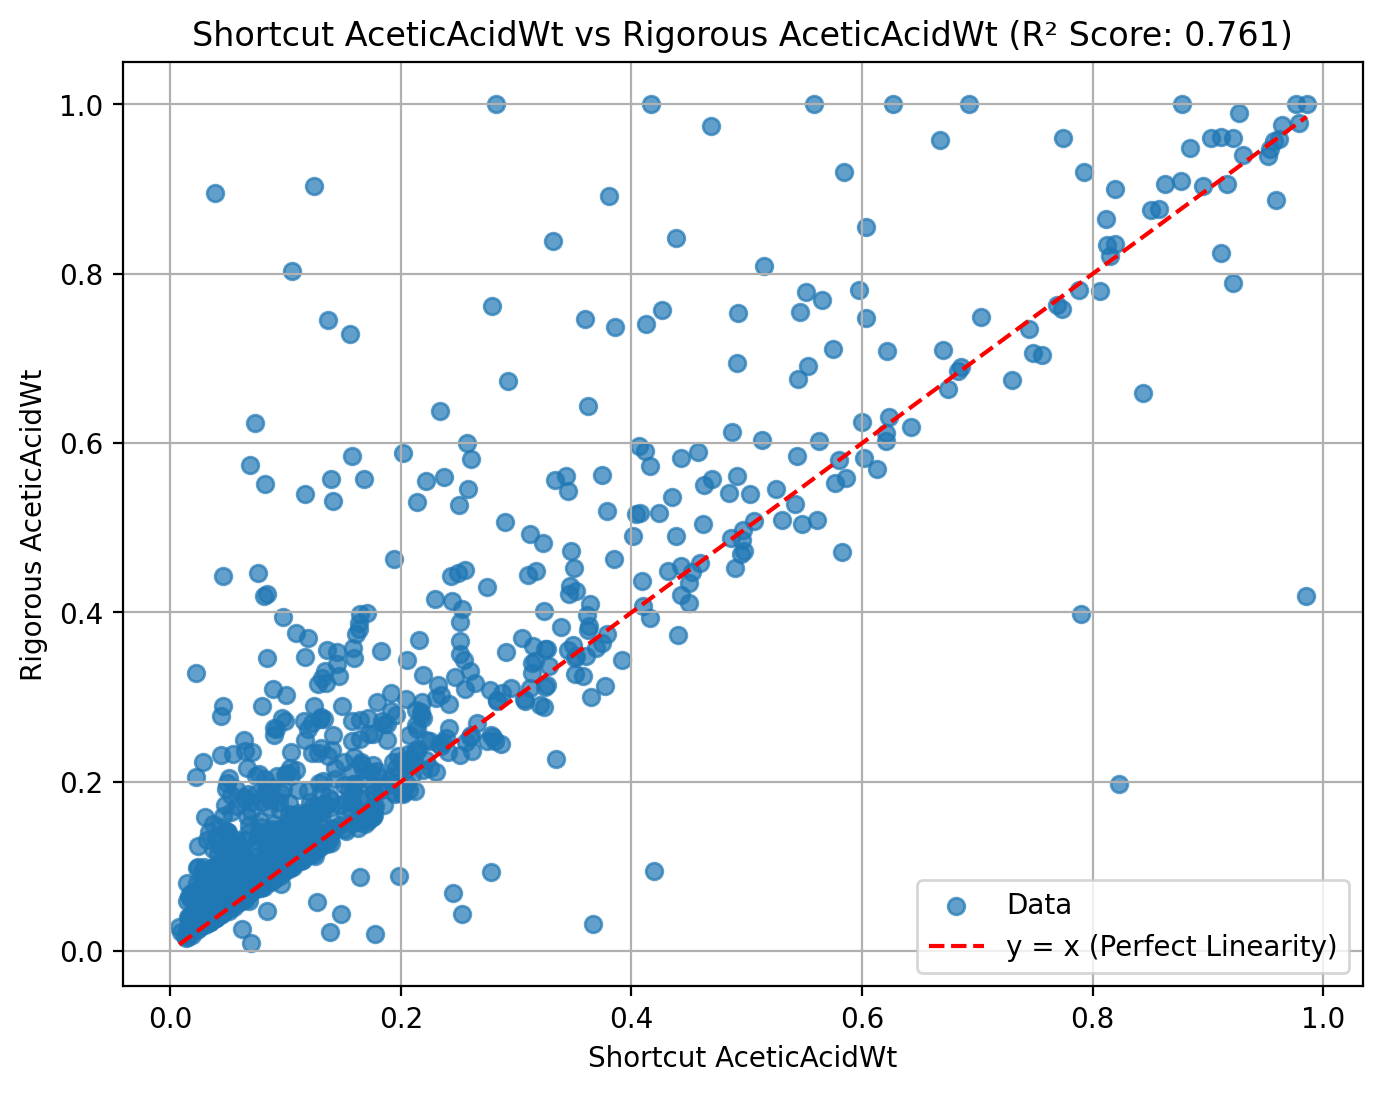

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filter out invalid or NaN results for CAPEX
valid_results = results_df.dropna(subset=['Shortcut_AceticAcidWt', 'Rigorous_AceticAcidWt'])
valid_results = valid_results[(valid_results['Shortcut_AceticAcidWt'] > 0) & (valid_results['Rigorous_AceticAcidWt'] > 0) &
                                (valid_results['Shortcut_AceticAcidWt'] < 1) & (valid_results['Rigorous_AceticAcidWt'] < 1)]

# Scatter plot for CAPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_AceticAcidWt'], valid_results['Rigorous_AceticAcidWt'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_AceticAcidWt'].min(), valid_results['Rigorous_AceticAcidWt'].min())
max_val = min(valid_results['Shortcut_AceticAcidWt'].max(), valid_results['Rigorous_AceticAcidWt'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")



# Calculate R² score to check linearity
X = valid_results[['Shortcut_AceticAcidWt']].values
y = valid_results['Rigorous_AceticAcidWt'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} (1.0이면 완전 선형, 0에 가까울수록 비선형)")

plt.xlabel('Shortcut AceticAcidWt')
plt.ylabel('Rigorous AceticAcidWt')
plt.title(f'Shortcut AceticAcidWt vs Rigorous AceticAcidWt (R² Score: {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()


# 경제 지표 시각화

R² Score: 0.8535 (1.0이면 완전 선형, 0에 가까울수록 비선형)


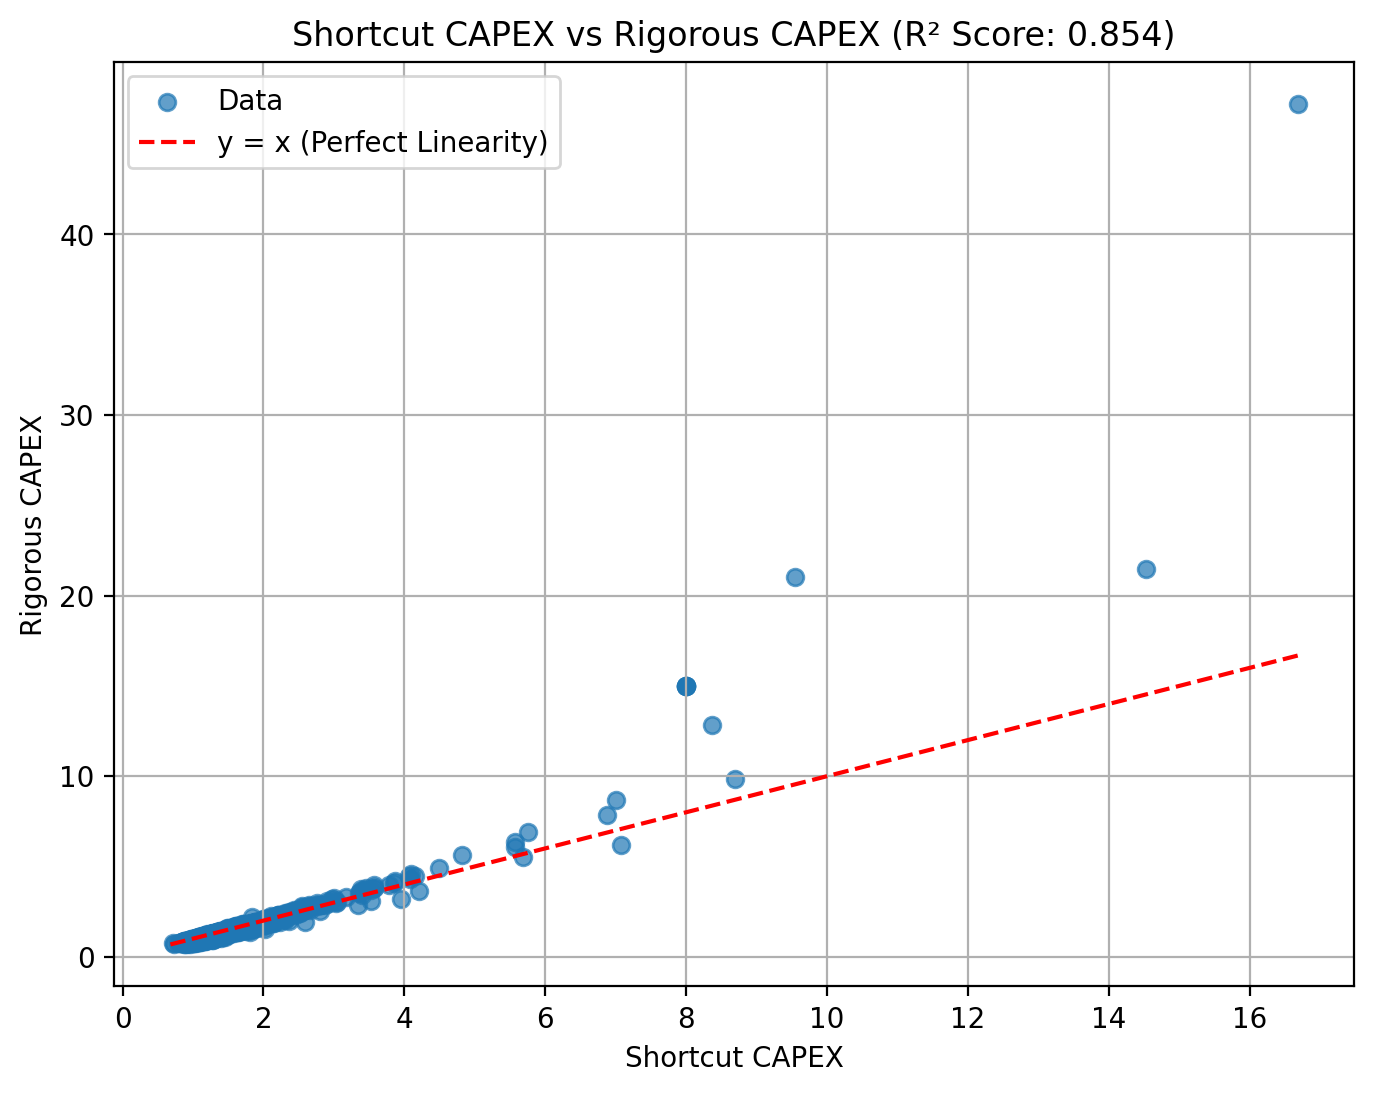

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filter out invalid or NaN results for CAPEX
valid_results = results_df.dropna(subset=['Shortcut_CAPEX', 'Rigorous_CAPEX'])
valid_results = valid_results[(valid_results['Shortcut_CAPEX'] > 0) & (valid_results['Rigorous_CAPEX'] > 0)]

# Scatter plot for CAPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_CAPEX'], valid_results['Rigorous_CAPEX'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_CAPEX'].min(), valid_results['Rigorous_CAPEX'].min())
max_val = min(valid_results['Shortcut_CAPEX'].max(), valid_results['Rigorous_CAPEX'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")



# Calculate R² score to check linearity
X = valid_results[['Shortcut_CAPEX']].values
y = valid_results['Rigorous_CAPEX'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} (1.0이면 완전 선형, 0에 가까울수록 비선형)")

plt.xlabel('Shortcut CAPEX')
plt.ylabel('Rigorous CAPEX')
plt.title(f'Shortcut CAPEX vs Rigorous CAPEX (R² Score: {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()


R² Score: 0.9225 (1.0이면 완전 선형, 0에 가까울수록 비선형)


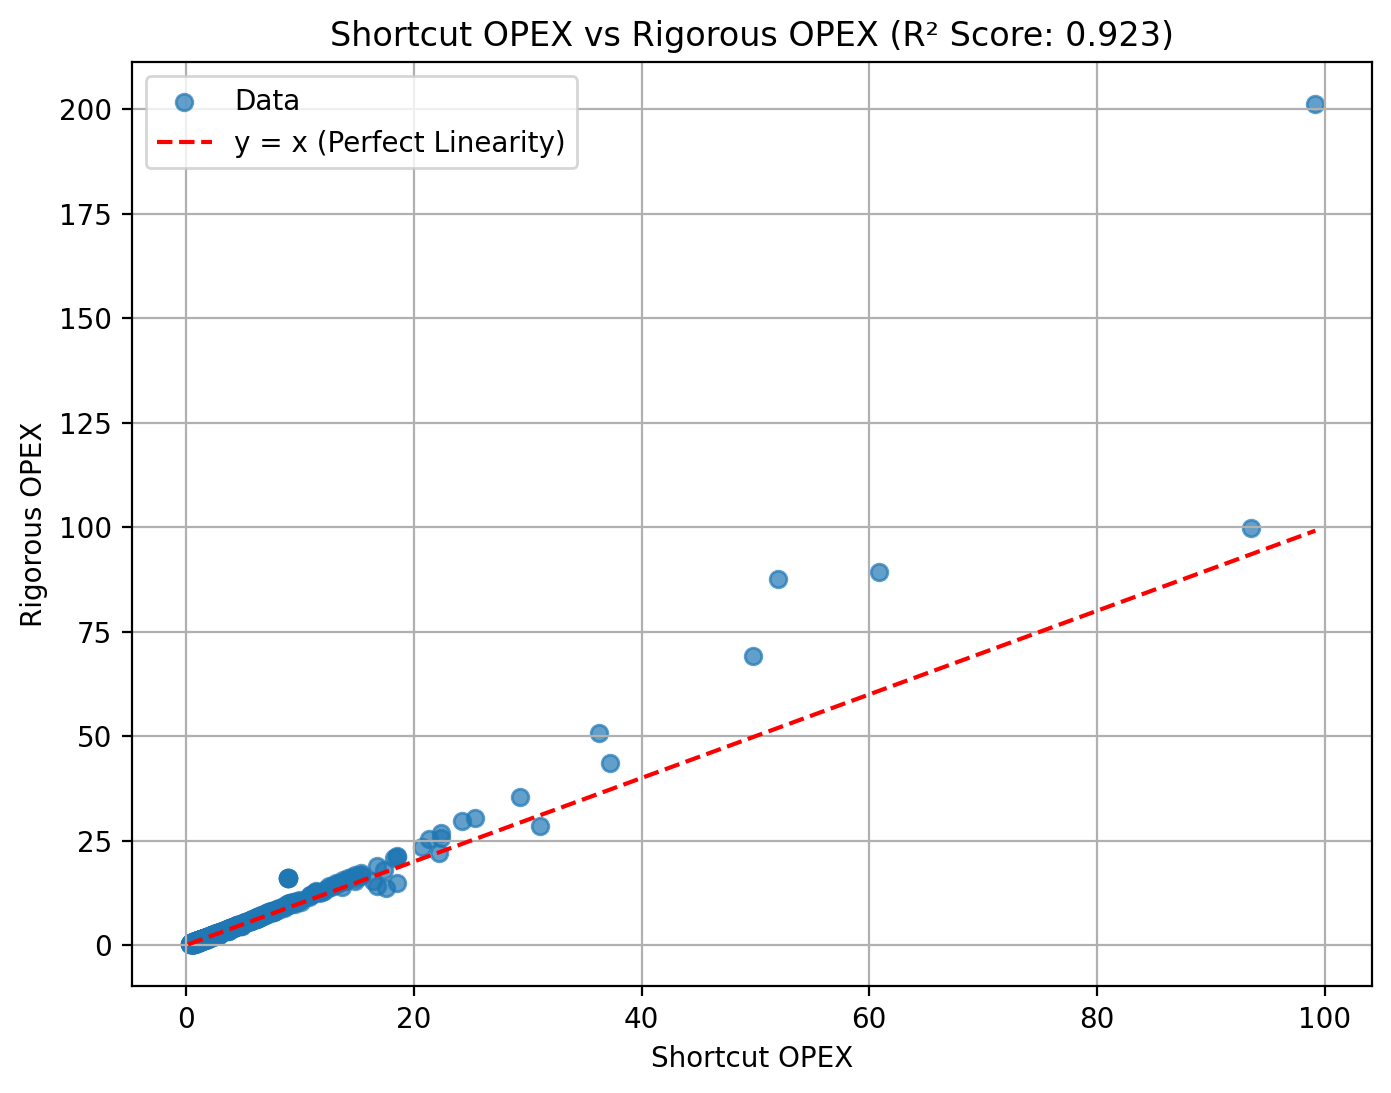

In [39]:
# Filter out invalid or NaN results
valid_results = results_df.dropna(subset=['Shortcut_OPEX', 'Rigorous_OPEX'])
valid_results = valid_results[(results_df['Shortcut_OPEX'] > 0) & (results_df['Rigorous_OPEX'] > 0)]

# Scatter plot for CAPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_OPEX'], valid_results['Rigorous_OPEX'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_OPEX'].min(), valid_results['Rigorous_OPEX'].min())
max_val = min(valid_results['Shortcut_OPEX'].max(), valid_results['Rigorous_OPEX'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")



# Calculate R² score to check linearity
X = valid_results[['Shortcut_OPEX']].values
y = valid_results['Rigorous_OPEX'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} (1.0이면 완전 선형, 0에 가까울수록 비선형)")

plt.xlabel('Shortcut OPEX')
plt.ylabel('Rigorous OPEX')
plt.title(f'Shortcut OPEX vs Rigorous OPEX (R² Score: {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
valid_results

,Stages,_Lr1,_Hr1,_Lr2,_Hr2,...,Shortcut_NumberStages,Shortcut_FeedStage,Rigorous_CAPEX,Rigorous_OPEX,Rigorous_AceticAcidWt
1,0,1,2,3,4,...,13,14,15,16,17
3,27,0.937,0.298,0.487,0.419,...,10,5,1.2,0.687,0.331
4,0,1,2,3,4,...,13,14,15,16,17
5,13,0.842,0.151,0.568,0.176,...,5,3,1.01,0.836,0.125
6,0,1,2,3,4,...,13,14,15,16,17
...,...,...,...,...,...,...,...,...,...,...,...
1727,48,0.688,0.866,0.514,0.517,...,0,0,0,0,0
1729,15,0.965,0.476,0.508,0.934,...,15,8,1.44,1.21,0.582
1732,20,0.634,0.94,0.509,0.576,...,7,6,1.46,1.97,0.103
1734,47,0.73,0.53,0.105,0.891,...,8,5,1.24,0.779,0.126


R² Score: 0.9404 )


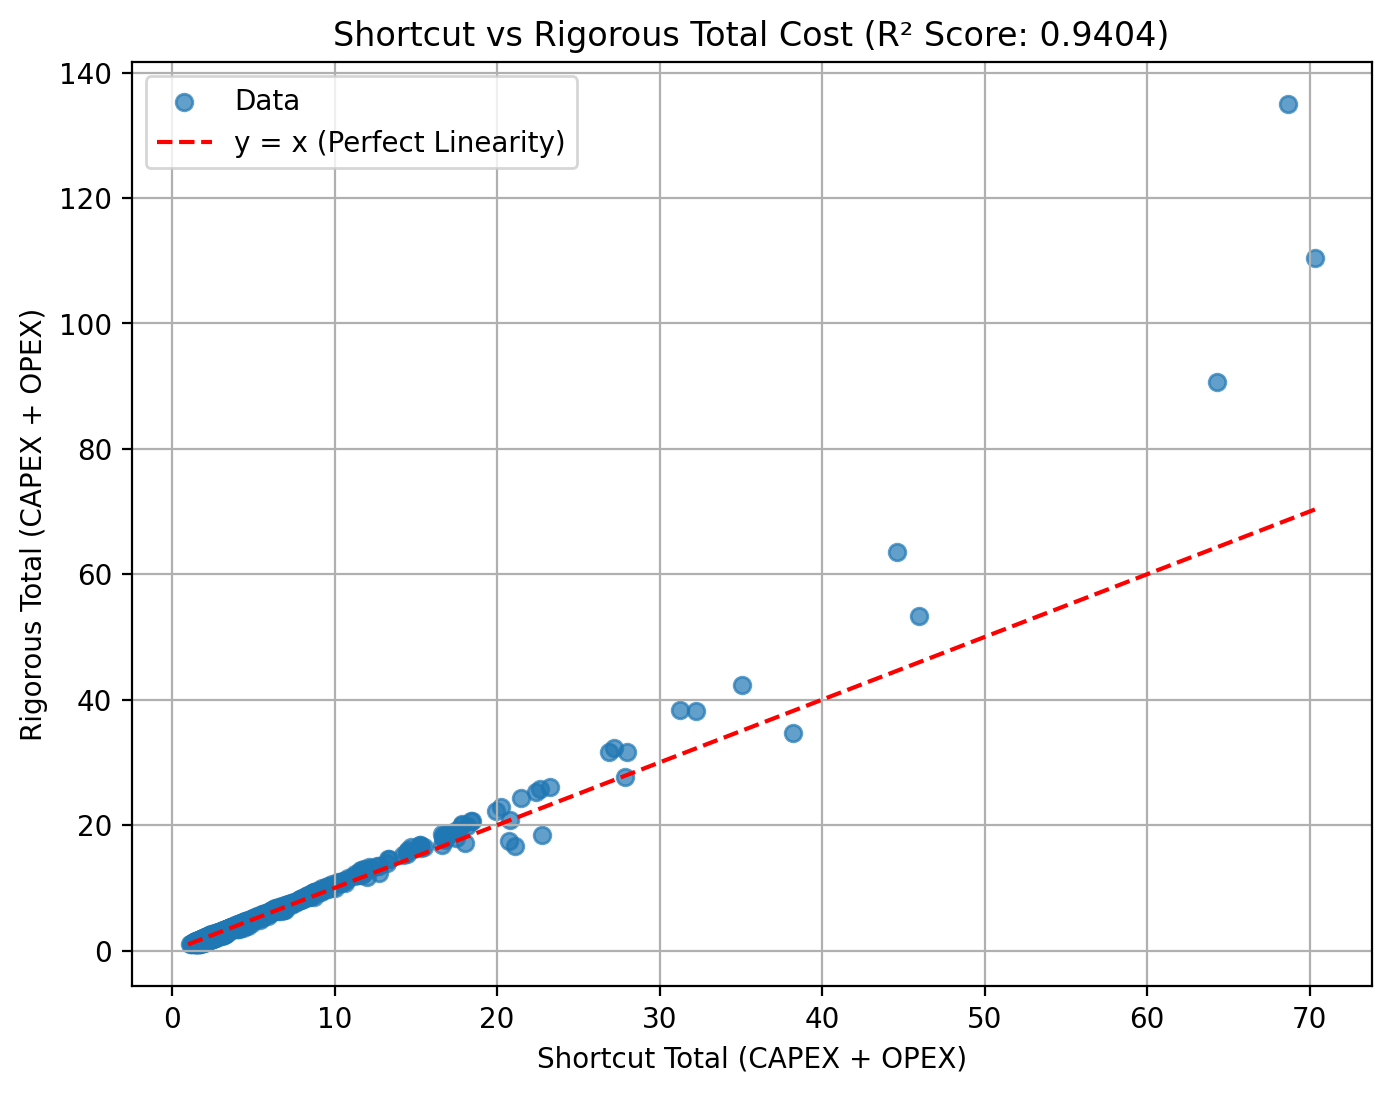

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filter out invalid or NaN results for CAPEX and OPEX
valid_results = results_df.dropna(subset=['Shortcut_CAPEX', 'Rigorous_CAPEX', 'Shortcut_OPEX', 'Rigorous_OPEX'])
valid_results = valid_results[
    (valid_results['Shortcut_CAPEX'] > 0) & (valid_results['Rigorous_CAPEX'] > 0) &
    (valid_results['Shortcut_OPEX'] > 0) & (valid_results['Rigorous_OPEX'] > 0) &
    (valid_results['Stages'] > 0) 
]

# Compute the total cost (CAPEX + OPEX)
valid_results['Shortcut_Total'] = valid_results['Shortcut_CAPEX'] + valid_results['Shortcut_OPEX']
valid_results['Rigorous_Total'] = valid_results['Rigorous_CAPEX'] + valid_results['Rigorous_OPEX']

# Scatter plot for Total CAPEX + OPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_Total'], valid_results['Rigorous_Total'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_Total'].min(), valid_results['Rigorous_Total'].min())
max_val = min(valid_results['Shortcut_Total'].max(), valid_results['Rigorous_Total'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")


# Calculate R² score to check linearity
X = valid_results[['Shortcut_Total']].values
y = valid_results['Rigorous_Total'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} )")

plt.xlabel('Shortcut Total (CAPEX + OPEX)')
plt.ylabel('Rigorous Total (CAPEX + OPEX)')
plt.title(f'Shortcut vs Rigorous Total Cost (R² Score: {r2:.4f})')
plt.legend()
plt.grid(True)
plt.show()
